In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
from statistics import mean

print (time.ctime())

Mon Oct 19 11:46:53 2020


In [2]:
# file1 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_visEq_1s_W0028_F03-200228-095644-1.csv"
file1 ="/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1.csv"
print (file1, time.ctime())

# data1=np.loadtxt(file1, dtype= float, delimiter=",", usecols = (0,1,2,3,4))
# data1 = np.genfromtxt(file1, delimiter=",", skip_header=True)[:, 1:]
data1 = pd.read_csv(file1)
print(pd.read_csv(file1, nrows=5))
print(time.ctime())
# #print data
# y1   = data1.iloc[:, 0]
# x1   = data1.iloc[:, 1]
# t1   = data1.iloc[:, 2]
# a1   = data1.iloc[:, 3]
# A1   = data1.iloc[:, 4]

# for i in range(0,20):
#     print (i, x1[i],y1[i],t1[i],a1[i],A1[i])
    
# print (len(t1), time.ctime())

# file2 = "/home/imaginglab/Data/TPX3/CHIP0/Test/8x8Grid_SettingsEq_1s_W0028_F03-200228-100050-1.csv"
file2 = "/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1_cent.csv"
print (file2, time.ctime())

# data2=np.loadtxt(file2, dtype= float, delimiter=",", usecols = (0,1,2,3,4))
# data2 = np.genfromtxt(file2, delimiter=",", skip_header=True)[:, 1:]
data2 =pd.read_csv(file2)
print(pd.read_csv(file2, nrows=5))
print(time.ctime())
# #print data
# y2  = data2.iloc[:, 0]
# x2  = data2.iloc[:, 1]
# t2  = data2.iloc[:, 2]
# a2  = data2.iloc[:, 3]
# A2  = data2.iloc[:, 4]

# for i in range(0,20):
#     print (i, x2[i],y2[i],t2[i],a2[i],A2[i])
    
# print (len(t2), time.ctime())

/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1.csv Mon Oct 19 11:46:53 2020
   #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
0   154   106  157891256832       1025            4975         NaN
1   154   107  157891256832       1600            4975         NaN
2   155   106  157891257088        375            4975         NaN
3   155   107  157891257344        275            4975         NaN
4   154   105  157891257344        600            4975         NaN
Mon Oct 19 11:46:53 2020
/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1_cent.csv Mon Oct 19 11:46:53 2020
   #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  Unnamed: 6
0   154   106  157891256832       1025            4975          8         NaN
1   153    68  157891257344       1225            2750          5         NaN
2   174   107  157891257600        825            1500          3         NaN
3   184   107  157891257600       10

In [3]:
data1.shape, data2.shape

((1742891, 6), (667559, 7))

In [4]:
# # file1 ="/QuantumRouter/AOD8212020/AOM_64_10kHz_ext_W0028_H07-140105-025044-1.csv"
# GridX1min = 146
# GridX1max = 191
# GridY1min = 82
# GridY1max = 127

# # file1 ="/QuantumRouter/AOD9282020/AOD_10s_blnkext_10kHz_10Dty_3.3Vpp_W0057_H07-140212-034958-1_cent.csv"
# GridX1min = 30
# GridX1max = 75
# GridY1min = 185
# GridY1max = 230

# file1 ="/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1_cent.csv"
GridX1min = 67
GridX1max = 109
GridY1min = 151
GridY1max = 193

# # file2 = "/QuantumRouter/AOD8212020/AOM_64n_10kHz_ext_W0028_H07-140105-025447-1.csv"
# GridX2min = 62
# GridX2max = 107
# GridY2min = 161
# GridY2max = 206

# # file2 = "/QuantumRouter/AOD9282020/AOD_10s_blnkext_10kHz_10Dty_3.3Vpp_W0057_H07-140212-034958-1.csv"
# GridX2min = 30
# GridX2max = 75
# GridY2min = 185
# GridY2max = 230

# file1 ="/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1.csv"
GridX2min = 67
GridX2max = 109
GridY2min = 151
GridY2max = 193

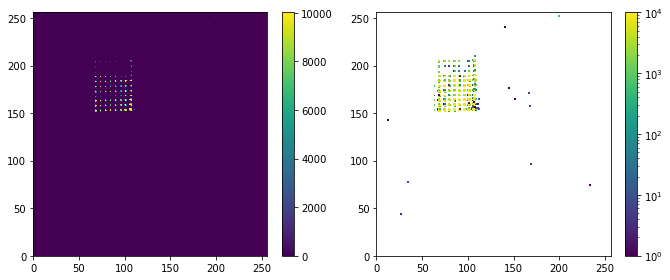

In [5]:
#File 1 grid
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()

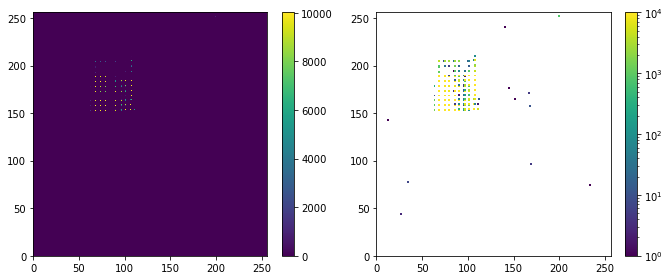

In [6]:
#File 2 grid
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data2['#Row'], data2['#Col'], bins = 256, range = [(0, 256), (0, 256)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(data2['#Row'], data2['#Col'], bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)
fig.tight_layout()
plt.show()

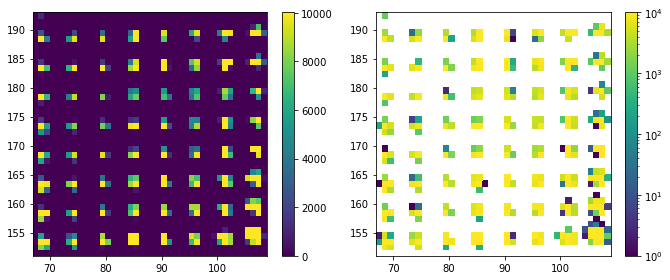

In [7]:
#File 1 grid

# GridX1min = 145
# GridX1max = 180
# GridY1min = 80
# GridY1max = 125

# GridX1min = 60
# GridX1max = 105
# GridY1min = 155
# GridY1max = 198

# file1 ="/QuantumRouter/AOD8252020/AOD_blnkext_10kHz_20Dty_10sW0028_H07-140109-221335-1.csv"
# GridX1min = 100
# GridX1max = 150
# GridY1min = 110
# GridY1max = 160

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()
# fig.savefig('fullgrid_8212020_025044-1_cent.png')

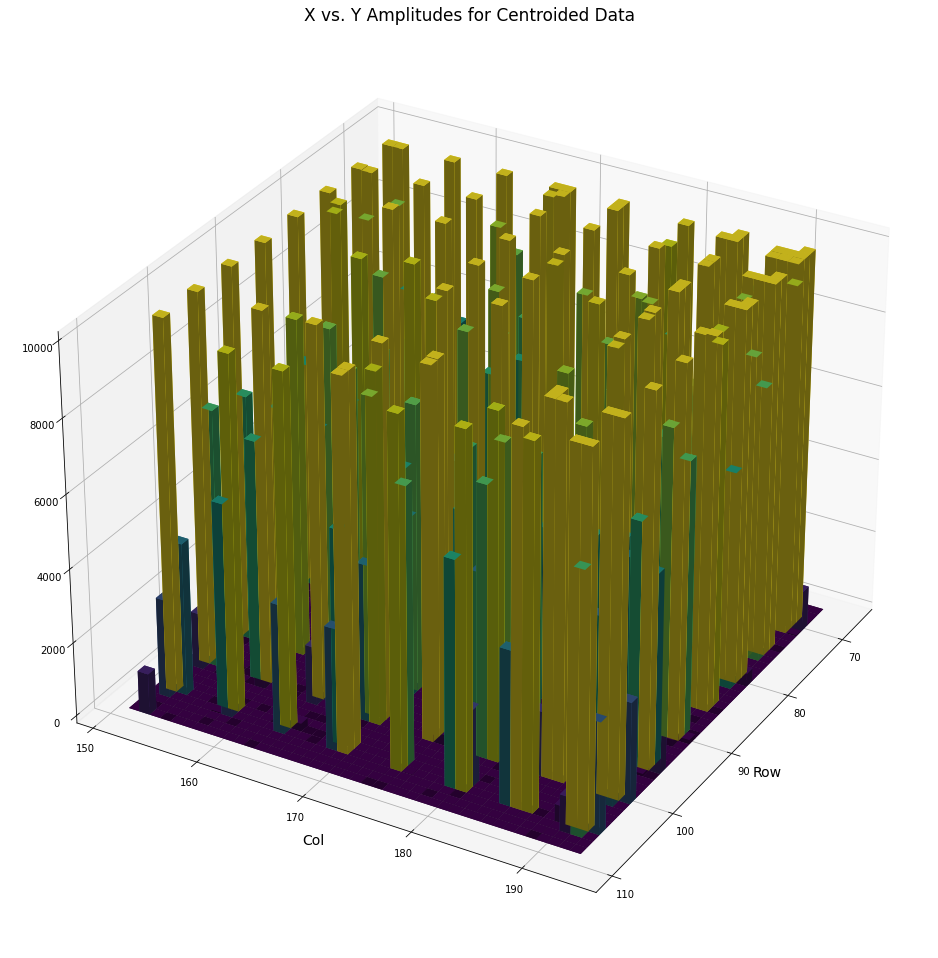

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [8]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
fig = plt.figure(figsize=(25,17))
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
# xpos = xpos.ravel()
# ypos = ypos.ravel()
# zpos = 0
xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

# Construct arrays with the dimensions for the 16 bars.
# dx = dy = 0.5 * np.ones_like(zpos)
# dz = hist.ravel()
dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('viridis') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 


ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.title("X vs. Y Amplitudes for Centroided Data",fontsize = 17)
plt.xlabel("Row", fontsize = 14)
plt.ylabel("Col", fontsize = 14)
plt.savefig("3d_XY_Centroid_1012020_114131-1_cent",  bbox_inches='tight')
for angle in range(30, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

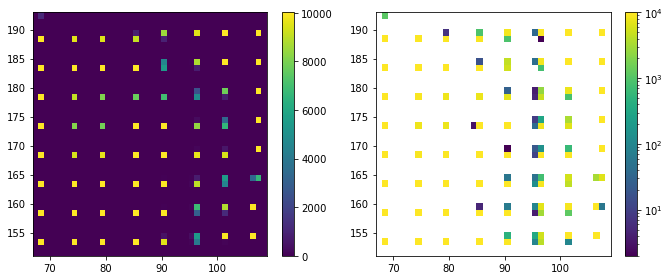

In [9]:
#File 2 grid

# GridX2min = 62
# GridX2max = 107
# GridY2min = 161
# GridY2max = 206

# GridX2min = 60
# GridX2max = 105
# GridY2min = 155
# GridY2max = 198

# file2 = "/QuantumRouter/AOD8212020/AOM_64_10kHz_ext_W0028_H07-140105-025044-1.csv"
# GridX2min = 145
# GridX2max = 180
# GridY2min = 80
# GridY2max = 125

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data2['#Row'], data2['#Col'], bins = GridX2max-GridX2min, range = [(GridX2min, GridX2max), (GridY2min, GridY2max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(data2['#Row'], data2['#Col'], bins = GridX2max-GridX2min, range = [(GridX2min, GridX2max), (GridY2min, GridY2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()
# fig.savefig('fullgrid_8212020_025447-1_cent.png')

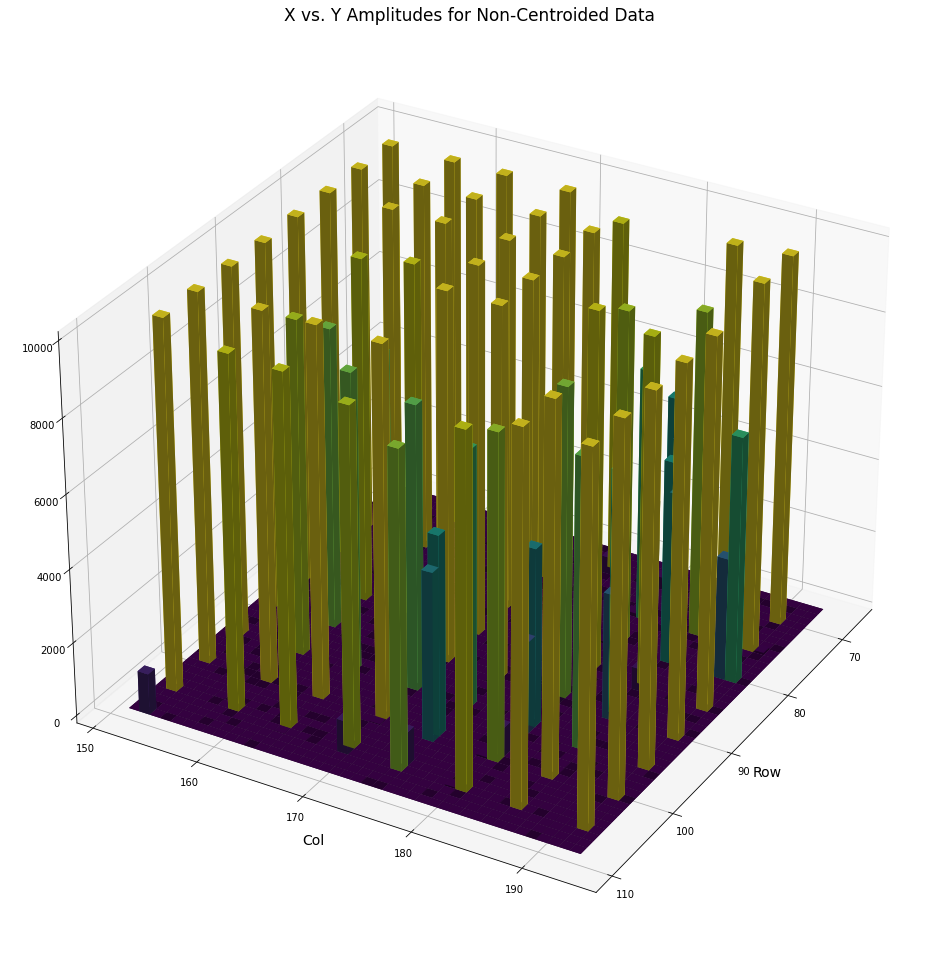

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [10]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
fig = plt.figure(figsize=(25,17))
ax = fig.add_subplot(111, projection='3d')
hist, xedges, yedges = np.histogram2d(data2['#Row'], data2['#Col'], bins = GridX2max-GridX2min, range = [(GridX2min, GridX2max), (GridY2min, GridY2max)])

# Construct arrays for the anchor positions of the 16 bars.
xpos, ypos = np.meshgrid(xedges[:-1]+xedges[1:], yedges[:-1]+yedges[1:])
# xpos = xpos.ravel()
# ypos = ypos.ravel()
# zpos = 0
xpos = xpos.flatten()/2.
ypos = ypos.flatten()/2.
zpos = np.zeros_like (xpos)

# Construct arrays with the dimensions for the 16 bars.
# dx = dy = 0.5 * np.ones_like(zpos)
# dz = hist.ravel()
dx = xedges [1] - xedges [0]
dy = yedges [1] - yedges [0]
dz = hist.flatten()

cmap = cm.get_cmap('viridis') # Get desired colormap - you can change this!
max_height = np.max(dz)   # get range of colorbars so we can normalize
min_height = np.min(dz)
# scale each z to [0,1], and get their rgb values
rgba = [cmap((k-min_height)/max_height) for k in dz] 


ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color=rgba, zsort='average')
plt.title("X vs. Y Amplitudes for Non-Centroided Data", fontsize=17)
plt.xlabel("Row", fontsize=14)
plt.ylabel("Col", fontsize=14)
plt.savefig("3d_XY_Centroid_1012020_114131-1",  bbox_inches='tight')
for angle in range(30, 360):
    ax.view_init(30, angle)
    plt.draw()
    plt.pause(.001)

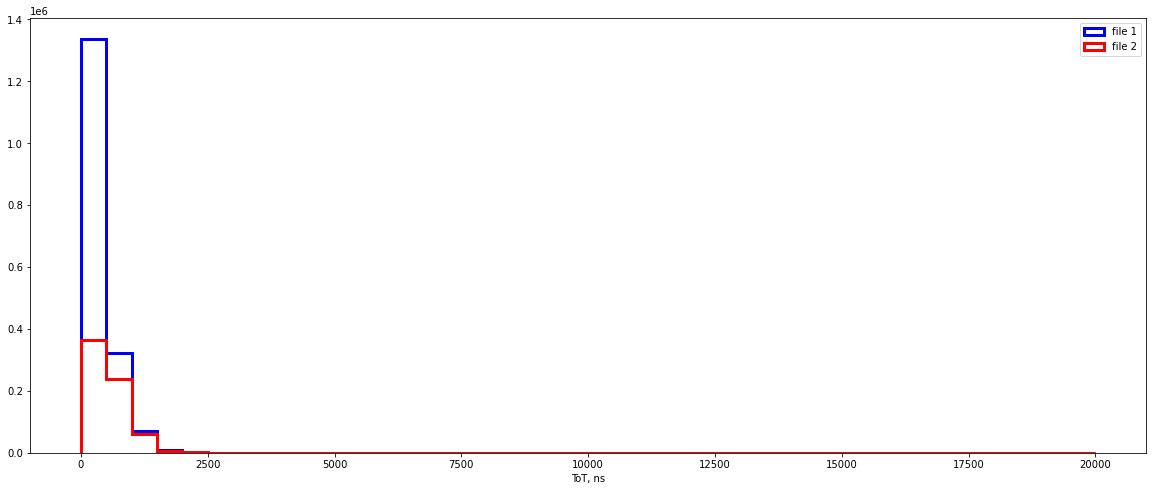

In [11]:
fig, ax1 = plt.subplots(ncols=1, figsize=(20, 8))

nbins = 40

plt.hist(data1['#ToT[arb]'], bins= nbins, range = [0, 20000], lw=3, histtype='step', label = 'file 1', color = 'blue')
plt.hist(data2['#ToT[arb]'], bins= nbins, range = [0, 20000], lw=3, histtype='step', label = 'file 2', color = 'red')

plt.xlabel('ToT, ns')
plt.legend()
plt.show()
# fig.savefig('TOT_025044-1_cent_vs_025447-1_cent_8212020.png')

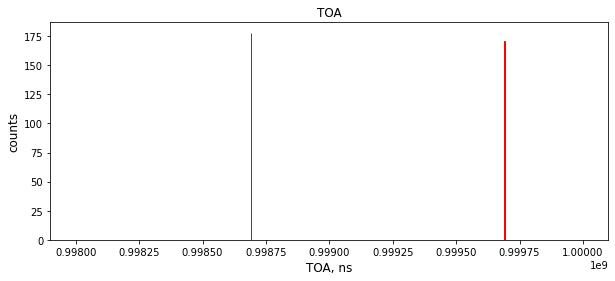

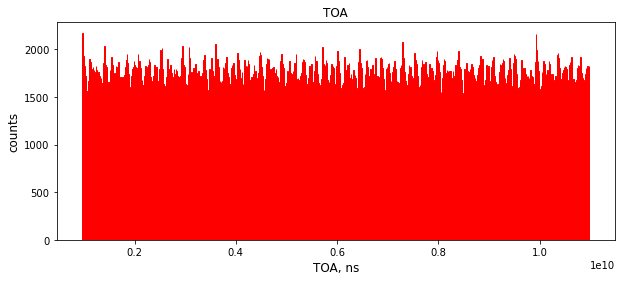

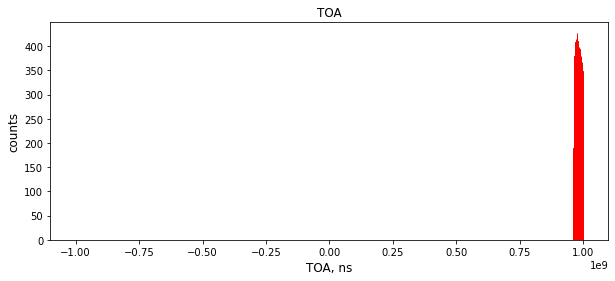

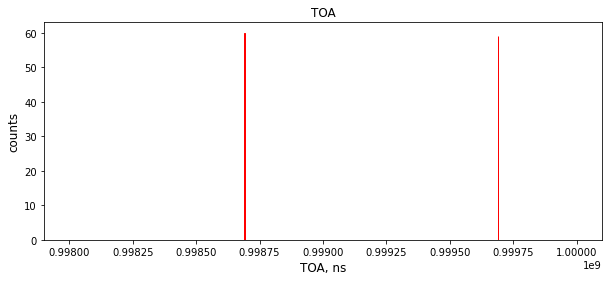

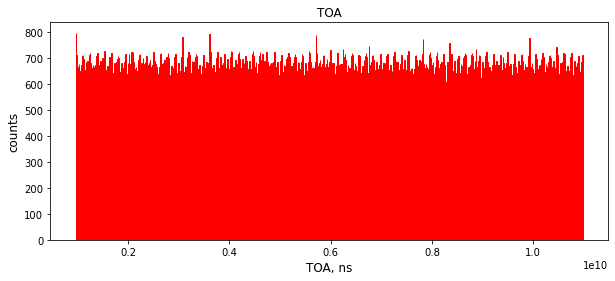

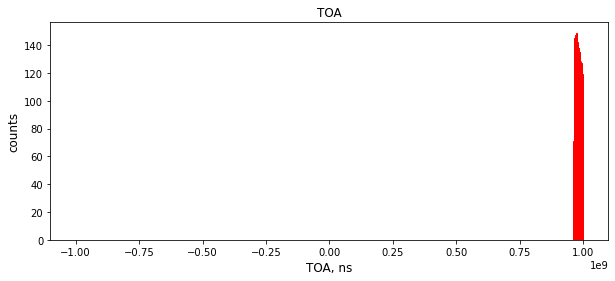

In [12]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
(n, bins, patches) = plt.hist(data1['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
# plt.xticks(bins)
plt.show()
# fig.savefig('TOA_256x256_8212020_025044-1_cent.png')


fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
(n, bins, patches) = plt.hist(data1['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
# plt.xticks(bins)
plt.show()

# Extinction Ratio


#fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(tt/4096.*25., bins = 100, color = 'r', ec = 'k')
#plt.title("TOA", fontsize = 12) # change the title
#plt.xlabel('TOA, ns',fontsize = 12)
#plt.ylabel('counts',fontsize = 12)
#plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
plt.hist(data1['#ToA']/4096.*25., bins = 1000, range = (-1.E+9, 1.E+9), color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(data2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_256x256_8212020_025447-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(data2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

#fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(tt/4096.*25., bins = 100, color = 'r', ec = 'k')
#plt.title("TOA", fontsize = 12) # change the title
#plt.xlabel('TOA, ns',fontsize = 12)
#plt.ylabel('counts',fontsize = 12)
#plt.show()

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
#plt.hist(t/4096.*25., bins = 10, range = (0.5E+9, 1.5E+9), color = 'r', ec = 'k')
plt.hist(data2['#ToA']/4096.*25., bins = 1000, range = (-1.E+9, 1.E+9), color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()


'Mon Oct 19 11:47:58 2020'

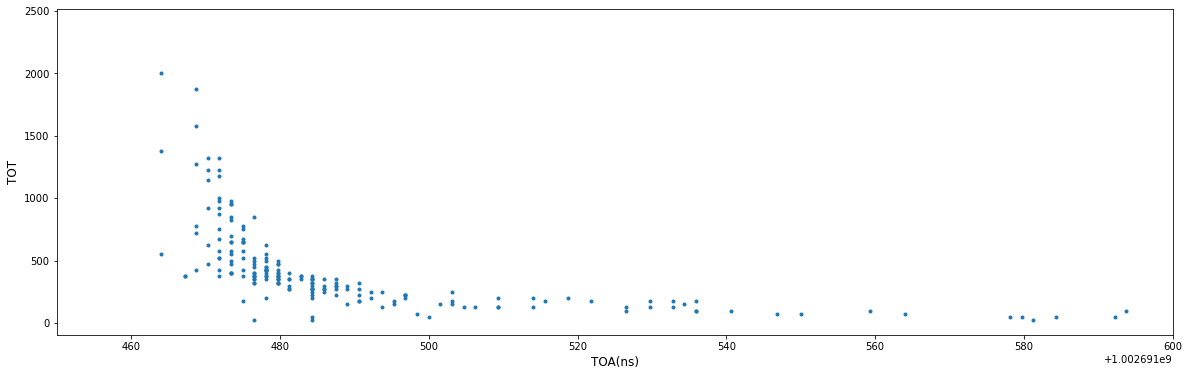

In [13]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(data1['#ToA']/4096.*25.,data1['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
# plt.xlim(0.75e10, 0.9e10)
plt.xlim(1.002691450e9, 1.002691600e9)
# plt.savefig('TOTvsTOA_256x256_8212020_025044-1_cent.png', bbox_inches='tight')
time.ctime()

'Mon Oct 19 13:01:13 2020'

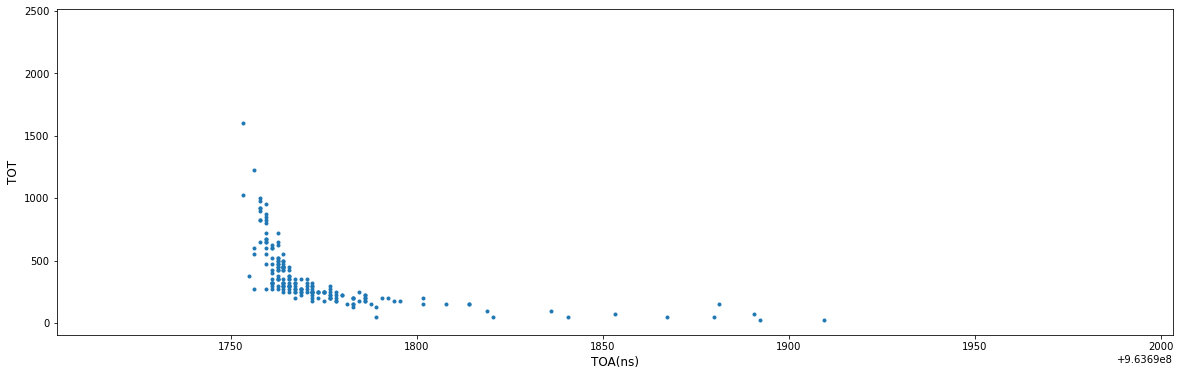

In [644]:
# r1 = t1[len(t1)//2:]/4096*25
# f1 = a1[len(a1)//2:]
plt.rcParams["figure.figsize"] = (20,6)
#len(t) = 8550085 
#
#plt.scatter(r,f)
plt.plot(data1['#ToA']/4096.*25.,data1['#ToT[arb]'], '.')
#plt.plot(r, f, 'xb-')
#plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOA(ns)',fontsize = 12)
plt.ylabel('TOT',fontsize = 12)
plt.xlim(963691753.125-50, 963691753.125+250)
# plt.xlim(1e9, 1.03e9)
# plt.savefig('TOTvsTOA_256x256_8212020_025447-1_cent.png', bbox_inches='tight')
time.ctime()

In [15]:
data1['#ToA'].min()/4096.*25., '(ns)', 'pulse window end:', 963691753.125+10, '(ns)', 'next pulse window:', 963691753.125+1000000, '(ns)'

(963691753.125,
 '(ns)',
 'pulse window end:',
 963691763.125,
 '(ns)',
 'next pulse window:',
 964691753.125,
 '(ns)')

In [16]:
def min_max(data, grid_x_min, grid_x_max, grid_y_min, grid_y_max):
    """Returns DataFrame filtering values less than min or greater than max for two columns"""
    x_cond = (data['#Row'] <grid_x_min) | (data['#Row'] > grid_x_max)
    y_cond = (data['#Col'] < grid_y_min) | (data['#Col'] > grid_y_max)
    new_data = data.drop(data[x_cond | y_cond].index)
    return new_data

grid1_df = min_max(data1, GridX1min, GridX1max, GridY1min, GridY1max)

print(grid1_df.shape, type(grid1_df.iloc[0,0]), type(grid1_df.iloc[1,1]), time.ctime())
print(grid1_df.iloc[:3])

grid2_df = min_max(data2, GridX2min, GridX2max, GridY2min, GridY2max)

print(grid2_df.shape, type(grid2_df.iloc[0,0]), type(grid2_df.iloc[1,1]), time.ctime())
print(grid2_df.iloc[:3])

(1681028, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:47:59 2020
   #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
0   154   106  157891256832       1025            4975         NaN
1   154   107  157891256832       1600            4975         NaN
2   155   106  157891257088        375            4975         NaN
(621196, 7) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:47:59 2020
   #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  #Centroid  Unnamed: 6
0   154   106  157891256832       1025            4975          8         NaN
1   153    68  157891257344       1225            2750          5         NaN
2   174   107  157891257600        825            1500          3         NaN


In [17]:
ToAmin = data1['#ToA'].min()
ToAmax = ((ToAmin/4096.*25.)+10)*4096./25.
grid1_pulse1_df = grid1_df.drop(grid1_df[(grid1_df['#ToA'] < ToAmin) | (grid1_df['#ToA'] > ToAmax)].index)

print(grid1_pulse1_df.shape, type(grid1_pulse1_df.iloc[0,0]), grid1_pulse1_df.iloc[:1])

(62, 6) <class 'numpy.int64'>    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
0   154   106  157891256832       1025            4975         NaN


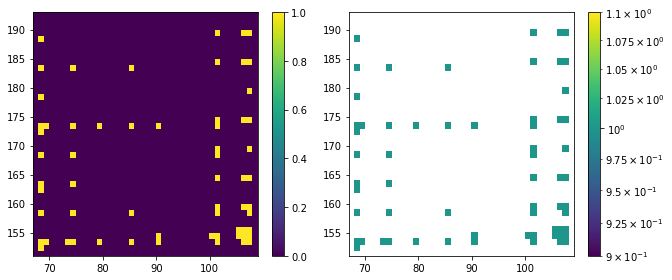

In [18]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')

h = ax0.hist2d(grid1_pulse1_df['#Row'], grid1_pulse1_df['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(grid1_pulse1_df['#Row'], grid1_pulse1_df['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()
fig.savefig('fullgrid_frame1.png', bbox_inches='tight')

In [19]:
ToAmin = (data1['#ToA'].min()+(1000000*4096./25.))
ToAmax = ((ToAmin/4096.*25.)+10)*4096./25.
grid1_pulse2_df = grid1_df.drop(grid1_df[(grid1_df['#ToA'] < ToAmin) | (grid1_df['#ToA'] > ToAmax)].index)

print(grid1_pulse2_df.shape, type(grid1_pulse2_df.iloc[0,0]), grid1_pulse2_df.iloc[:1])

(86, 6) <class 'numpy.int64'>      #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
196   155   105  158055097344        250            5000         NaN


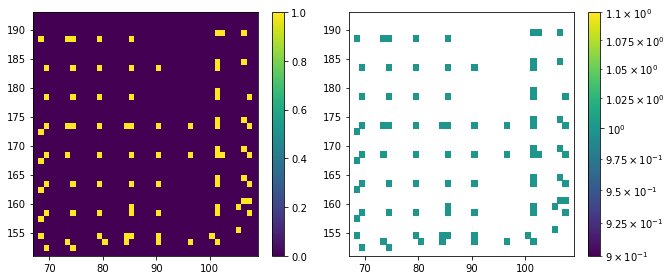

In [20]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')

h = ax0.hist2d(grid1_pulse2_df['#Row'], grid1_pulse2_df['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(grid1_pulse2_df['#Row'], grid1_pulse2_df['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()
fig.savefig('fullgrid_frame2.png', bbox_inches='tight')

In [21]:
ToAmin = (data1['#ToA'].min()+(2000000*4096./25.))
ToAmax = ((ToAmin/4096.*25.)+10)*4096./25.
grid1_pulse3_df = grid1_df.drop(grid1_df[(grid1_df['#ToA'] < ToAmin) | (grid1_df['#ToA'] > ToAmax)].index)

print(grid1_pulse3_df.shape, type(grid1_pulse3_df.iloc[0,0]), grid1_pulse3_df.iloc[:1])

(54, 6) <class 'numpy.int64'>      #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
398   152    74  158218937088        275            1825         NaN


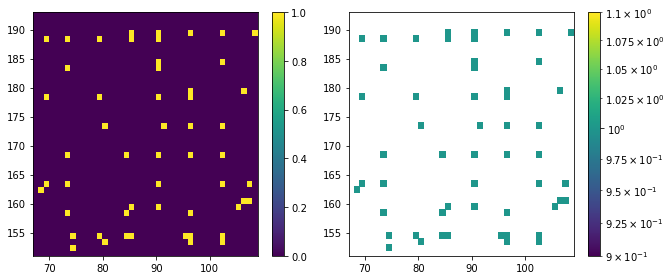

In [22]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')

h = ax0.hist2d(grid1_pulse3_df['#Row'], grid1_pulse3_df['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(grid1_pulse3_df['#Row'], grid1_pulse3_df['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()
fig.savefig('fullgrid_frame3.png', bbox_inches='tight')

In [23]:
ToAmin = (data1['#ToA'].min()+(3000000*4096./25.))
ToAmax = ((ToAmin/4096.*25.)+10)*4096./25.
grid1_pulse4_df = grid1_df.drop(grid1_df[(grid1_df['#ToA'] < ToAmin) | (grid1_df['#ToA'] > ToAmax)].index)

print(grid1_pulse4_df.shape, type(grid1_pulse4_df.iloc[0,0]), grid1_pulse4_df.iloc[:1])

(24, 6) <class 'numpy.int64'>      #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
585   172    69  158382777600         75            1875         NaN


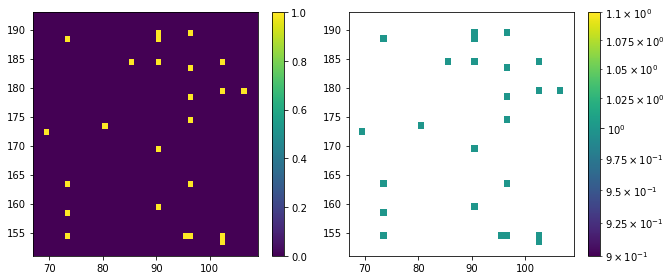

In [24]:
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4), facecolor='w')

h = ax0.hist2d(grid1_pulse4_df['#Row'], grid1_pulse4_df['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])
fig.colorbar(h[3], ax = ax0)

h = ax1.hist2d(grid1_pulse4_df['#Row'], grid1_pulse4_df['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

fig.tight_layout()
plt.show()
fig.savefig('fullgrid_frame4.png', bbox_inches='tight')

In [25]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9)*4096./25.
grid1_1450_1600_df = grid1_df.drop(grid1_df[(grid1_df['#ToA'] < ToAmin) | (grid1_df['#ToA'] > ToAmax)].index)

print(grid1_1450_1600_df.shape, type(grid1_1450_1600_df.iloc[0,0]), grid1_1450_1600_df.iloc[:1])

(190, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7599   154   106  164280969472       1375            6650         NaN


In [26]:
1.002691600e9-1.002691450e9

150.0

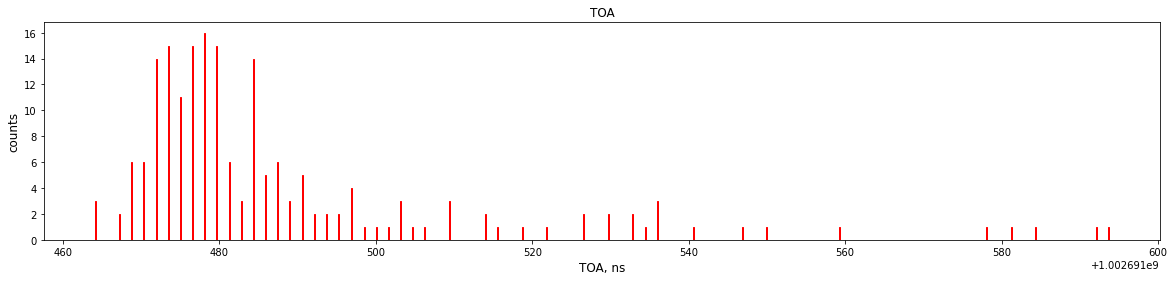

In [27]:
fig, ax0 = plt.subplots(ncols=1, figsize=(20, 4))
(n, bins, patches) = plt.hist(grid1_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
# plt.xticks(bins[:20], rotation='vertical')
plt.show()

In [28]:
#Define column segregations

C1min = GridX1min; C1max = C1min + 5;
C2min = C1max + 1; C2max = C2min + 4;
C3min = C2max + 1; C3max = C3min + 4;
C4min = C3max + 1; C4max = C4min + 5;
C5min = C4max + 1; C5max = C5min + 5;
C6min = C5max + 1; C6max = C6min + 5;
C7min = C6max + 1; C7max = C7min + 5;
C8min = C7max + 1; C8max = C8min + 5;
C7min = C7min-3; C7max = C7max-3;
C8min = C8min-3; C8max = C8max-3; 

#Defime Row segregations

R1min = GridY1min; R1max = R1min + 5;
R2min = R1max + 1; R2max = R2min + 4;
R3min = R2max + 1; R3max = R3min + 4;
R4min = R3max + 1; R4max = R4min + 5;
R5min = R4max + 1; R5max = R5min + 5;
R6min = R5max + 1; R6max = R6min + 5;
R7min = R6max + 1; R7max = R7min + 4;
R8min = R7max + 1; R8max = R8min + 5;
R5min = R5min-3; R5max = R5max-3;
R6min = R6min-3; R6max = R6max-3;
R7min = R7min-3; R7max = R7max-3;
R8min = R8min-3; R8max = R8max-3;

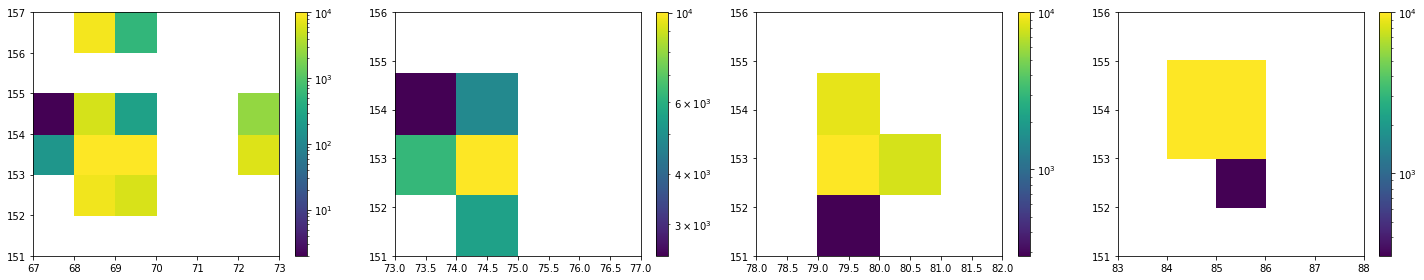

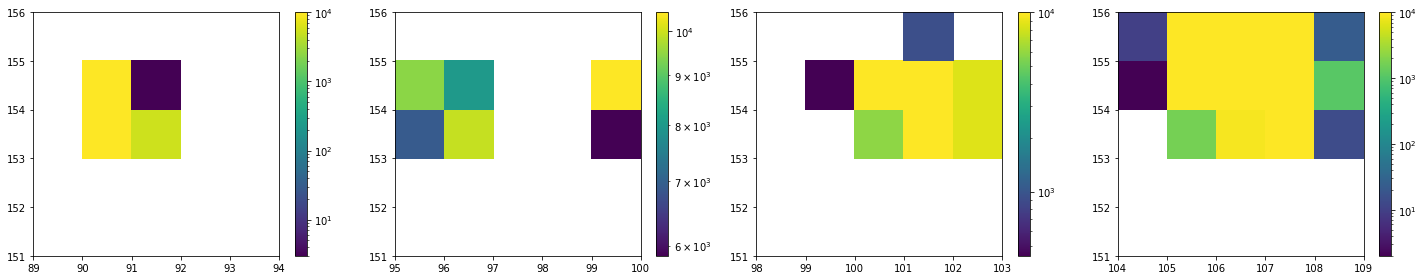

In [29]:
# Display Row 1
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = [C1max+1-C1min, R1max+1-R1min], range = [(C1min, C1max+1), (R1min, R1max+1)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R1min, R1max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

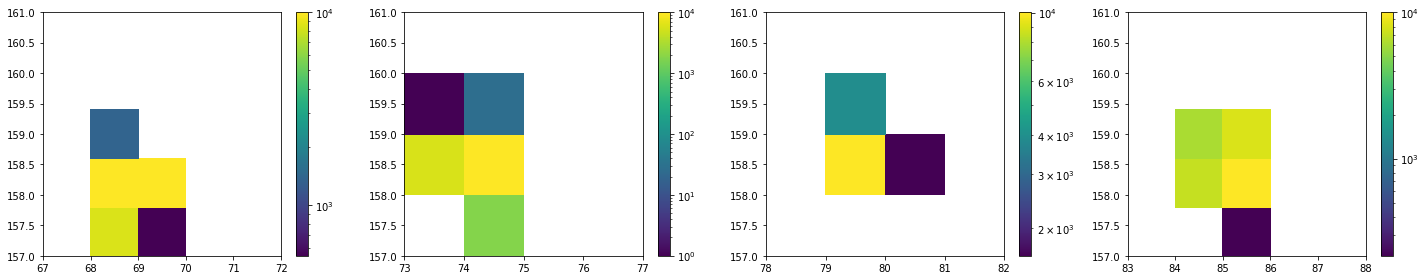

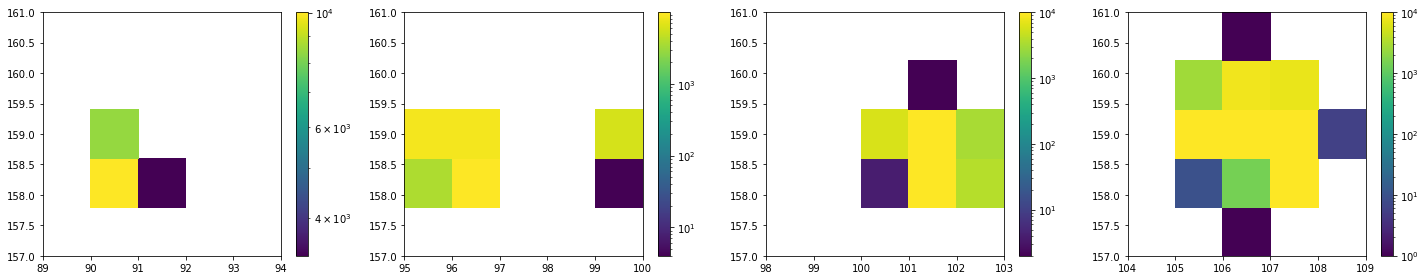

In [30]:
#Display Row 2

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R2min, R2max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

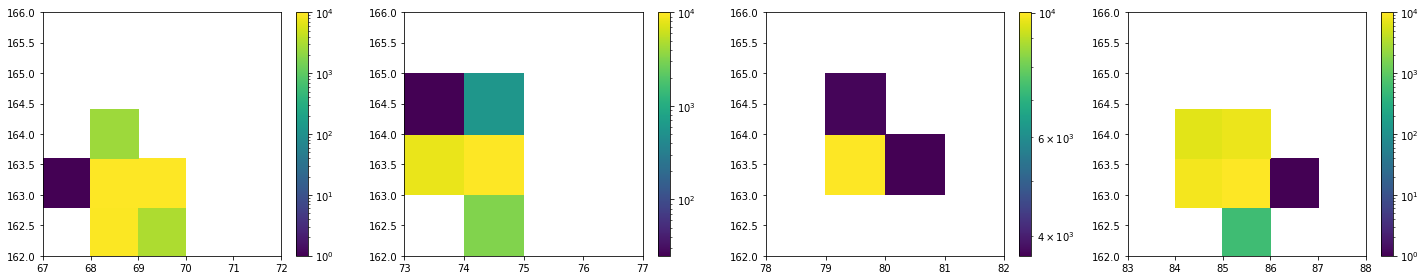

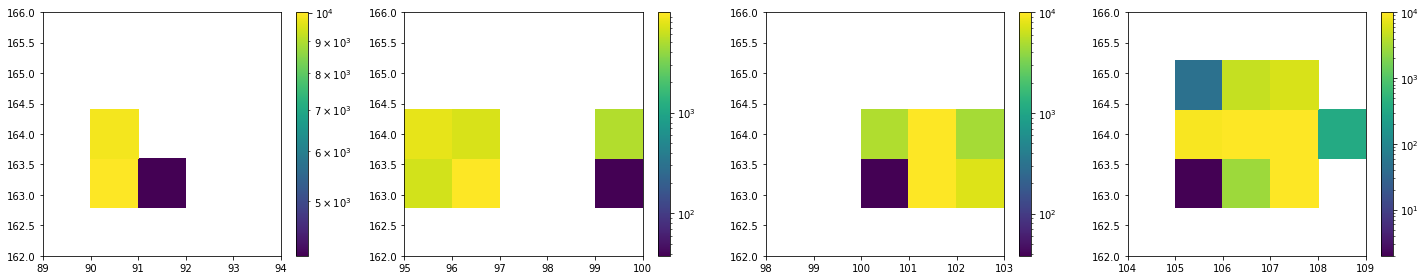

In [31]:
#Display Row 3

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R3min, R3max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

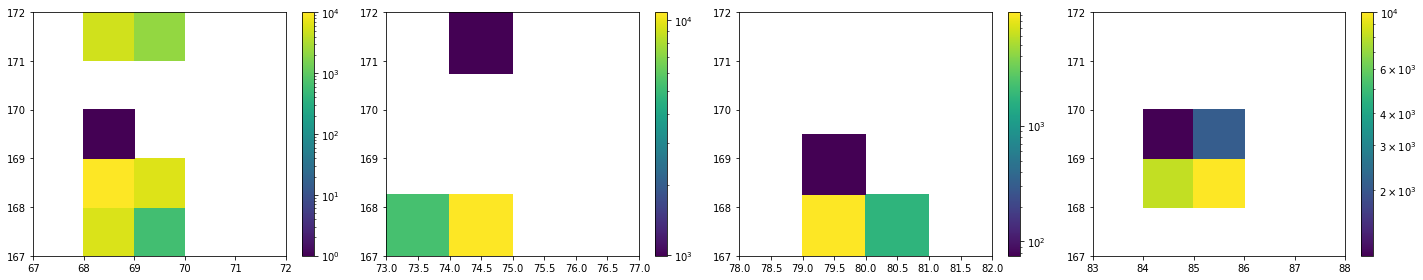

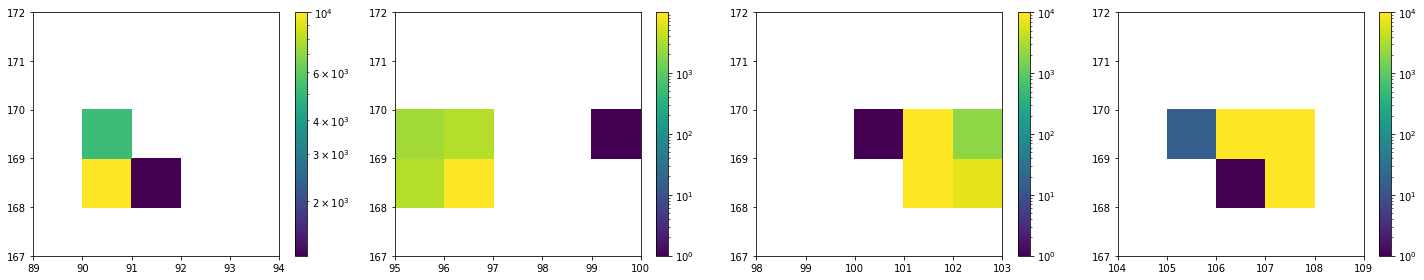

In [32]:
#Display Row 4

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R4min, R4max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

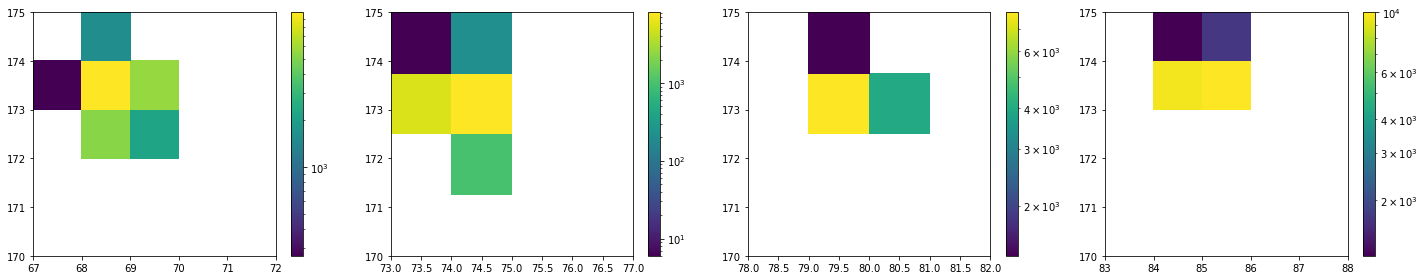

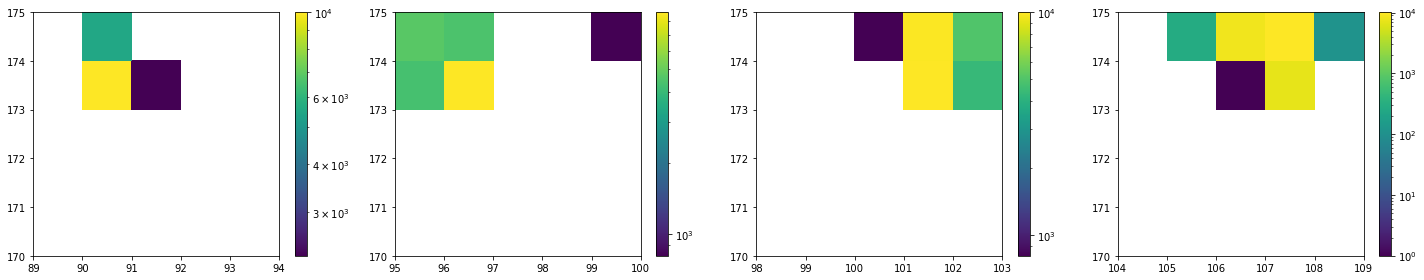

In [33]:
#Display Row 5

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R5min, R5max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

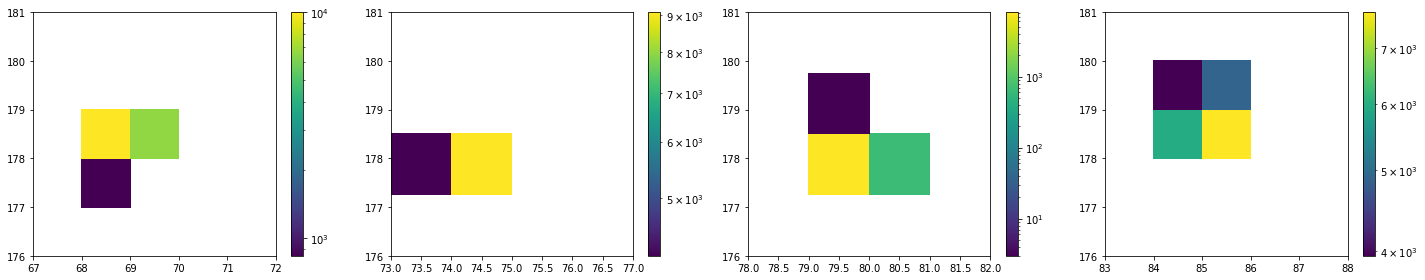

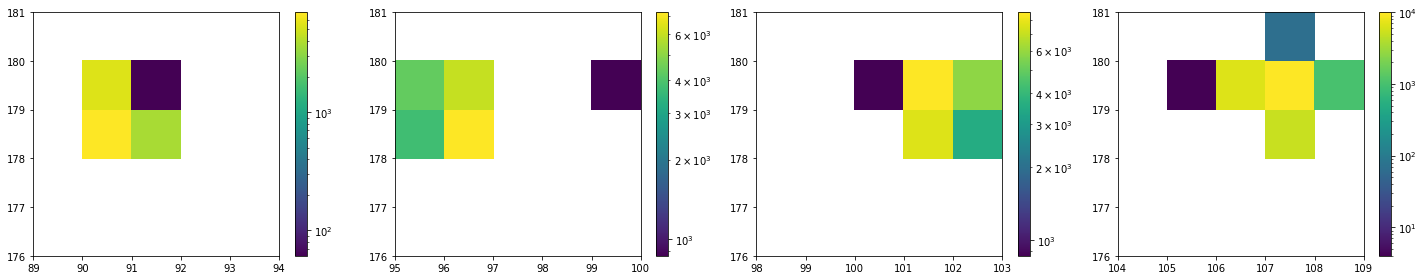

In [34]:
#Display Row 6

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R6min, R6max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

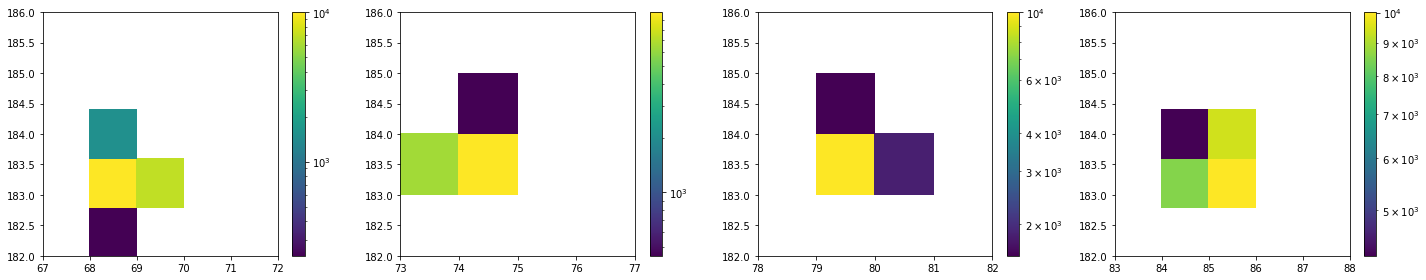

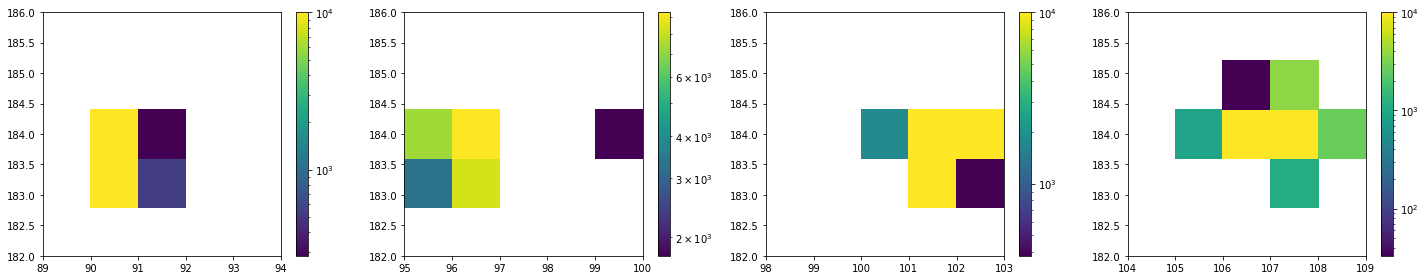

In [35]:
#Display Row 7

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R7min, R7max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

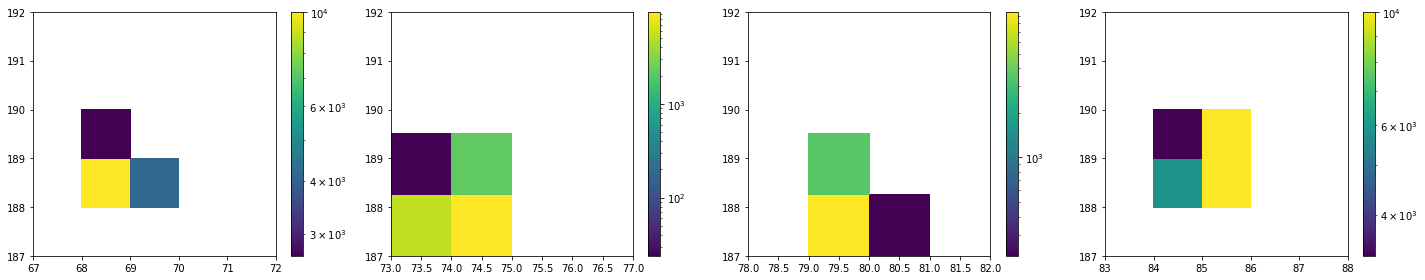

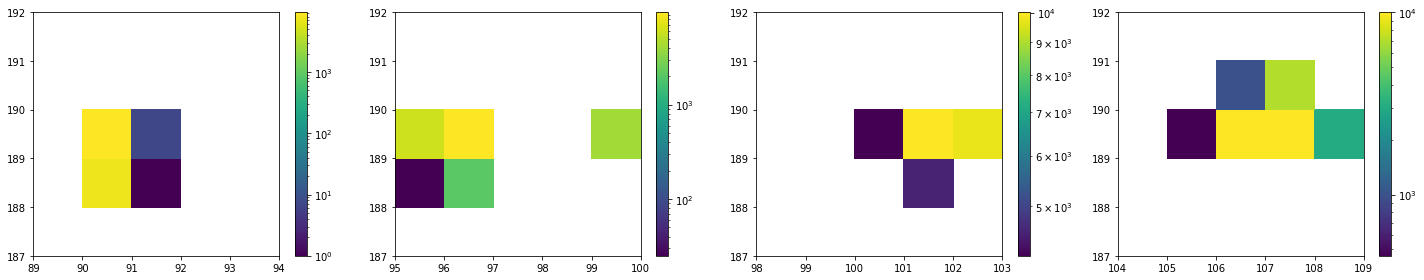

In [36]:
#Display Row 8

fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax1.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C1max-C1min, range = [(C1min, C1max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax1)

h = ax2.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C2max-C2min, range = [(C2min, C2max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax2)

h = ax3.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C3max-C3min, range = [(C3min, C3max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax3)

h = ax4.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C4max-C4min, range = [(C4min, C4max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax4)

fig.tight_layout()
plt.show()

fig, (ax5, ax6, ax7, ax8) = plt.subplots(ncols=4, figsize=(20, 4))

h = ax5.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C5max-C5min, range = [(C5min, C5max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax5)

h = ax6.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C6max-C6min, range = [(C6min, C6max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax6)

h = ax7.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C7max-C7min, range = [(C7min, C7max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax7)

h = ax8.hist2d(grid1_df['#Row'], grid1_df['#Col'], bins = C8max-C8min, range = [(C8min, C8max), (R8min, R8max)], norm=mpl.colors.LogNorm())
fig.colorbar(h[3], ax = ax8)

fig.tight_layout()
plt.show()

In [37]:
Pt1_R1_df = min_max(grid1_df, C1min, C1max, R1min, R1max)
# Pt1_R1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt1_R1_df.shape, type(Pt1_R1_df.iloc[0,0]), type(Pt1_R1_df.iloc[1,1]), time.ctime())
print(Pt1_R1_df.iloc[:3])

(40567, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:28 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
8    153    68  157891257344       1225            2750         NaN
9    153    69  157891257856        600            2750         NaN
10   152    68  157891258368        375            2750         NaN


In [38]:
Pt2_R1_df = min_max(grid1_df, C2min, C2max, R1min, R1max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt2_R1_df.shape, type(Pt2_R1_df.iloc[0,0]), type(Pt2_R1_df.iloc[1,1]), time.ctime())
print(Pt2_R1_df.iloc[:3])

(29159, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:28 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
33   153    74  157891257600        925            1700         NaN
34   153    73  157891258112        325            1700         NaN
35   152    74  157891259904        250            1700         NaN


In [39]:
Pt3_R1_df = min_max(grid1_df, C3min, C3max, R1min, R1max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt3_R1_df.shape, type(Pt3_R1_df.iloc[0,0]), type(Pt3_R1_df.iloc[1,1]), time.ctime())
print(Pt3_R1_df.iloc[:3])

(27022, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:29 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37   153    79  157891257856        725            1250         NaN
38   154    79  157891259136        275            1250         NaN
39   153    80  157891259904        250            1250         NaN


In [40]:
Pt4_R1_df = min_max(grid1_df, C4min, C4max, R1min, R1max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt4_R1_df.shape, type(Pt4_R1_df.iloc[0,0]), type(Pt4_R1_df.iloc[1,1]), time.ctime())
print(Pt4_R1_df.iloc[:3])

(40305, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:29 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
58   153    85  157891257856        875            1825         NaN
59   153    84  157891258880        325            1825         NaN
60   154    85  157891258880        375            1825         NaN


In [41]:
Pt5_R1_df = min_max(grid1_df, C5min, C5max, R1min, R1max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt5_R1_df.shape, type(Pt5_R1_df.iloc[0,0]), type(Pt5_R1_df.iloc[1,1]), time.ctime())
print(Pt5_R1_df.iloc[:3])

(25388, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:29 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
87   153    90  157891258368        475            1025         NaN
88   154    90  157891258368        350            1025         NaN
89   153    91  157891260672        200            1025         NaN


In [42]:
Pt6_R1_df = min_max(grid1_df, C6min, C6max, R1min, R1max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt6_R1_df.shape, type(Pt6_R1_df.iloc[0,0]), type(Pt6_R1_df.iloc[1,1]), time.ctime())
print(Pt6_R1_df.iloc[:3])

(50599, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:30 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
70    154   100  157891258112        325            2175         NaN
71    153   100  157891260928        175            2175         NaN
160   154    96  157891263488        175             650         NaN


In [43]:
Pt7_R1_df = min_max(grid1_df, C7min, C7max, R1min, R1max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt7_R1_df.shape, type(Pt7_R1_df.iloc[0,0]), type(Pt7_R1_df.iloc[1,1]), time.ctime())
print(Pt7_R1_df.iloc[:3])

(54483, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:30 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
68   154   101  157891257856        675            2175         NaN
69   153   101  157891258112        525            2175         NaN
70   154   100  157891258112        325            2175         NaN


In [44]:
Pt8_R1_df = min_max(grid1_df, C8min, C8max, R1min, R1max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt8_R1_df.shape, type(Pt8_R1_df.iloc[0,0]), type(Pt8_R1_df.iloc[1,1]), time.ctime())
print(Pt8_R1_df.iloc[:3])

(82118, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:31 2020
   #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
0   154   106  157891256832       1025            4975         NaN
1   154   107  157891256832       1600            4975         NaN
2   155   106  157891257088        375            4975         NaN


In [45]:
Pt1_R2_df = min_max(grid1_df, C1min, C1max, R2min, R2max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt1_R2_df.shape, type(Pt1_R2_df.iloc[0,0]), type(Pt1_R2_df.iloc[1,1]), time.ctime())
print(Pt1_R2_df.iloc[:3])

(30469, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:31 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
26   158    68  157891257600        925            1575         NaN
27   158    69  157891258624        325            1575         NaN
28   157    68  157891258880        300            1575         NaN


In [46]:
Pt2_R2_df = min_max(grid1_df, C2min, C2max, R2min, R2max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt2_R2_df.shape, type(Pt2_R2_df.iloc[0,0]), type(Pt2_R2_df.iloc[1,1]), time.ctime())
print(Pt2_R2_df.iloc[:3])

(17579, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:31 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
109   158    74  157891258368        625            1100         NaN
110   157    74  157891261952        250            1100         NaN
111   158    73  157891262208        225            1100         NaN


In [47]:
Pt3_R2_df = min_max(grid1_df, C3min, C3max, R2min, R2max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt3_R2_df.shape, type(Pt3_R2_df.iloc[0,0]), type(Pt3_R2_df.iloc[1,1]), time.ctime())
print(Pt3_R2_df.iloc[:3])

(15598, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:32 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
126   158    79  157891258624        500             500         NaN
324   158    79  158055097344        525             800         NaN
325   159    79  158055102464        125             800         NaN


In [48]:
Pt4_R2_df = min_max(grid1_df, C4min, C4max, R2min, R2max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt4_R2_df.shape, type(Pt4_R2_df.iloc[0,0]), type(Pt4_R2_df.iloc[1,1]), time.ctime())
print(Pt4_R2_df.iloc[:3])

(31714, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:32 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
106   158    85  157891258368        500             950         NaN
107   159    85  157891260416        250             950         NaN
108   158    84  157891261696        200             950         NaN


In [49]:
Pt5_R2_df = min_max(grid1_df, C5min, C5max, R2min, R2max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt5_R2_df.shape, type(Pt5_R2_df.iloc[0,0]), type(Pt5_R2_df.iloc[1,1]), time.ctime())
print(Pt5_R2_df.iloc[:3])

(21812, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:33 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
152   158    90  157891258880        375             725         NaN
153   159    90  157891259392        275             725         NaN
154   158    91  157891273216         75             725         NaN


In [50]:
Pt6_R2_df = min_max(grid1_df, C6min, C6max, R2min, R2max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt6_R2_df.shape, type(Pt6_R2_df.iloc[0,0]), type(Pt6_R2_df.iloc[1,1]), time.ctime())
print(Pt6_R2_df.iloc[:3])

(37290, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:33 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
172   158    96  157891259904        300             500         NaN
173   159    96  157891265792        150             500         NaN
174   159    95  157891267840         50             500         NaN


In [51]:
Pt7_R2_df = min_max(grid1_df, C7min, C7max, R2min, R2max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt7_R2_df.shape, type(Pt7_R2_df.iloc[0,0]), type(Pt7_R2_df.iloc[1,1]), time.ctime())
print(Pt7_R2_df.iloc[:3])

(33325, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:34 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
97   158   101  157891258368        475            1225         NaN
98   159   101  157891258368        425            1225         NaN
99   158   102  157891261696        150            1225         NaN


In [52]:
Pt8_R2_df = min_max(grid1_df, C8min, C8max, R2min, R2max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt8_R2_df.shape, type(Pt8_R2_df.iloc[0,0]), type(Pt8_R2_df.iloc[1,1]), time.ctime())
print(Pt8_R2_df.iloc[:3])

(59868, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:34 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
48   159   106  157891257856        550            2300         NaN
49   159   107  157891257856        850            2300         NaN
50   158   107  157891258112        325            2300         NaN


In [53]:
Pt1_R3_df = min_max(grid1_df, C1min, C1max, R3min, R3max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt1_R3_df.shape, type(Pt1_R3_df.iloc[0,0]), type(Pt1_R3_df.iloc[1,1]), time.ctime())
print(Pt1_R3_df.iloc[:3])

(34962, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:34 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
20   163    68  157891257600        650            1200         NaN
21   162    68  157891258368        275            1200         NaN
22   163    69  157891258624        275            1200         NaN


In [54]:
Pt2_R3_df = min_max(grid1_df, C2min, C2max, R3min, R3max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt2_R3_df.shape, type(Pt2_R3_df.iloc[0,0]), type(Pt2_R3_df.iloc[1,1]), time.ctime())
print(Pt2_R3_df.iloc[:3])

(22029, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:35 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
101   163    74  157891258368        525             750         NaN
102   163    73  157891261184        225             750         NaN
294   163    74  158055097088        525             725         NaN


In [55]:
Pt3_R3_df = min_max(grid1_df, C3min, C3max, R3min, R3max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt3_R3_df.shape, type(Pt3_R3_df.iloc[0,0]), type(Pt3_R3_df.iloc[1,1]), time.ctime())
print(Pt3_R3_df.iloc[:3])

(17440, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:35 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
123   163    79  157891258624        350             350         NaN
331   163    79  158055097600        350             350         NaN
509   163    79  158218936320        375             400         NaN


In [56]:
Pt4_R3_df = min_max(grid1_df, C4min, C4max, R3min, R3max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt4_R3_df.shape, type(Pt4_R3_df.iloc[0,0]), type(Pt4_R3_df.iloc[1,1]), time.ctime())
print(Pt4_R3_df.iloc[:3])

(33296, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:36 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
132   163    85  157891258624        450             650         NaN
133   163    84  157891261696        200             650         NaN
332   163    85  158055097600        400             525         NaN


In [57]:
Pt5_R3_df = min_max(grid1_df, C5min, C5max, R3min, R3max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt5_R3_df.shape, type(Pt5_R3_df.iloc[0,0]), type(Pt5_R3_df.iloc[1,1]), time.ctime())
print(Pt5_R3_df.iloc[:3])

(23973, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:36 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
166   163    90  157891259648        325             525         NaN
167   164    90  157891264768        200             525         NaN
359   163    90  158055098368        325             525         NaN


In [58]:
Pt6_R3_df = min_max(grid1_df, C6min, C6max, R3min, R3max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt6_R3_df.shape, type(Pt6_R3_df.iloc[0,0]), type(Pt6_R3_df.iloc[1,1]), time.ctime())
print(Pt6_R3_df.iloc[:3])

(37195, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:37 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
163   163    96  157891259648        275             275         NaN
368   163    96  158055099392        250             250         NaN
566   163    96  158218939392        250             250         NaN


In [59]:
Pt7_R3_df = min_max(grid1_df, C7min, C7max, R3min, R3max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt7_R3_df.shape, type(Pt7_R3_df.iloc[0,0]), type(Pt7_R3_df.iloc[1,1]), time.ctime())
print(Pt7_R3_df.iloc[:3])

(37463, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:37 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
77   163   101  157891258624        425            1075         NaN
78   164   101  157891258112        425            1075         NaN
79   163   102  157891259392        225            1075         NaN


In [60]:
Pt8_R3_df = min_max(grid1_df, C8min, C8max, R3min, R3max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt8_R3_df.shape, type(Pt8_R3_df.iloc[0,0]), type(Pt8_R3_df.iloc[1,1]), time.ctime())
print(Pt8_R3_df.iloc[:3])

(53188, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:38 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
44   164   107  157891257856        650            1300         NaN
45   164   106  157891258112        350            1300         NaN
46   163   107  157891258624        250            1300         NaN


In [61]:
Pt1_R4_df = min_max(grid1_df, C1min, C1max, R4min, R4max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt1_R4_df.shape, type(Pt1_R4_df.iloc[0,0]), type(Pt1_R4_df.iloc[1,1]), time.ctime())
print(Pt1_R4_df.iloc[:3])

(30133, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:38 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
23   168    68  157891257600        825            1400         NaN
24   167    68  157891258624        300            1400         NaN
25   168    69  157891258880        275            1400         NaN


In [62]:
Pt2_R4_df = min_max(grid1_df, C2min, C2max, R4min, R4max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt2_R4_df.shape, type(Pt2_R4_df.iloc[0,0]), type(Pt2_R4_df.iloc[1,1]), time.ctime())
print(Pt2_R4_df.iloc[:3])

(17203, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:38 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
85    168    74  157891258112        600             850         NaN
86    168    73  157891259136        250             850         NaN
241   168    74  158055096576        675            1025         NaN


In [63]:
Pt3_R4_df = min_max(grid1_df, C3min, C3max, R4min, R4max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt3_R4_df.shape, type(Pt3_R4_df.iloc[0,0]), type(Pt3_R4_df.iloc[1,1]), time.ctime())
print(Pt3_R4_df.iloc[:3])

(11429, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:39 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
127   168    79  157891258624        450             675         NaN
128   168    80  157891259904        225             675         NaN
269   168    79  158055096832        475             600         NaN


In [64]:
Pt4_R4_df = min_max(grid1_df, C4min, C4max, R4min, R4max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt4_R4_df.shape, type(Pt4_R4_df.iloc[0,0]), type(Pt4_R4_df.iloc[1,1]), time.ctime())
print(Pt4_R4_df.iloc[:3])

(21413, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:39 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
134   168    85  157891258624        550             750         NaN
135   168    84  157891263232        200             750         NaN
305   168    85  158055097088        600             825         NaN


In [65]:
Pt5_R4_df = min_max(grid1_df, C5min, C5max, R4min, R4max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt5_R4_df.shape, type(Pt5_R4_df.iloc[0,0]), type(Pt5_R4_df.iloc[1,1]), time.ctime())
print(Pt5_R4_df.iloc[:3])

(16432, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:40 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
140   168    90  157891258624        425             725         NaN
141   169    90  157891260928        175             725         NaN
142   168    91  157891261696        125             725         NaN


In [66]:
Pt6_R4_df = min_max(grid1_df, C6min, C6max, R4min, R4max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt6_R4_df.shape, type(Pt6_R4_df.iloc[0,0]), type(Pt6_R4_df.iloc[1,1]), time.ctime())
print(Pt6_R4_df.iloc[:3])

(19800, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:40 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
155   168    96  157891259136        300             300         NaN
350   168    96  158055098112        250             250         NaN
544   168    96  158218937344        275             275         NaN


In [67]:
Pt7_R4_df = min_max(grid1_df, C7min, C7max, R4min, R4max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt7_R4_df.shape, type(Pt7_R4_df.iloc[0,0]), type(Pt7_R4_df.iloc[1,1]), time.ctime())
print(Pt7_R4_df.iloc[:3])

(28978, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:41 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
119   168   101  157891258368        525            1175         NaN
120   169   101  157891258368        350            1175         NaN
121   168   102  157891259904        250            1175         NaN


In [68]:
Pt8_R4_df = min_max(grid1_df, C8min, C8max, R4min, R4max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt8_R4_df.shape, type(Pt8_R4_df.iloc[0,0]), type(Pt8_R4_df.iloc[1,1]), time.ctime())
print(Pt8_R4_df.iloc[:3])

(29682, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:41 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
74   169   107  157891257856        800            1450         NaN
75   168   107  157891258624        300            1450         NaN
76   169   106  157891258880        350            1450         NaN


In [69]:
Pt1_R5_df = min_max(grid1_df, C1min, C1max, R5min, R5max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt1_R5_df.shape, type(Pt1_R5_df.iloc[0,0]), type(Pt1_R5_df.iloc[1,1]), time.ctime())
print(Pt1_R5_df.iloc[:3])

(24878, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:41 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
30   173    68  157891257600        975            1575         NaN
31   172    68  157891258112        300            1575         NaN
32   173    69  157891258368        300            1575         NaN


In [70]:
Pt2_R5_df = min_max(grid1_df, C2min, C2max, R5min, R5max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt2_R5_df.shape, type(Pt2_R5_df.iloc[0,0]), type(Pt2_R5_df.iloc[1,1]), time.ctime())
print(Pt2_R5_df.iloc[:3])

(14787, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:42 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
62    173    74  157891257856        675             950         NaN
63    173    73  157891259136        275             950         NaN
277   173    74  158055096832        675             925         NaN


In [71]:
Pt3_R5_df = min_max(grid1_df, C3min, C3max, R5min, R5max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt3_R5_df.shape, type(Pt3_R5_df.iloc[0,0]), type(Pt3_R5_df.iloc[1,1]), time.ctime())
print(Pt3_R5_df.iloc[:3])

(13282, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:42 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
90    173    79  157891258368        450             600         NaN
91    173    80  157891277824        150             600         NaN
285   173    79  158055097088        500             675         NaN


In [72]:
Pt4_R5_df = min_max(grid1_df, C4min, C4max, R5min, R5max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt4_R5_df.shape, type(Pt4_R5_df.iloc[0,0]), type(Pt4_R5_df.iloc[1,1]), time.ctime())
print(Pt4_R5_df.iloc[:3])

(22663, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:43 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
83    173    85  157891258112        625             875         NaN
84    173    84  157891259136        250             875         NaN
275   173    85  158055096832        700             900         NaN


In [73]:
Pt5_R5_df = min_max(grid1_df, C5min, C5max, R5min, R5max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt5_R5_df.shape, type(Pt5_R5_df.iloc[0,0]), type(Pt5_R5_df.iloc[1,1]), time.ctime())
print(Pt5_R5_df.iloc[:3])

(17851, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:43 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
103   173    90  157891258368        450             950         NaN
104   174    90  157891260160        250             950         NaN
105   173    91  157891260160        250             950         NaN


In [74]:
Pt6_R5_df = min_max(grid1_df, C6min, C6max, R5min, R5max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt6_R5_df.shape, type(Pt6_R5_df.iloc[0,0]), type(Pt6_R5_df.iloc[1,1]), time.ctime())
print(Pt6_R5_df.iloc[:3])

(23054, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:44 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
164   173    96  157891259648        350             450         NaN
165   174    96  157891267584        100             450         NaN
356   173    96  158055098368        300             425         NaN


In [75]:
Pt7_R5_df = min_max(grid1_df, C7min, C7max, R5min, R5max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt7_R5_df.shape, type(Pt7_R5_df.iloc[0,0]), type(Pt7_R5_df.iloc[1,1]), time.ctime())
print(Pt7_R5_df.iloc[:3])

(30161, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:44 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
40   173   101  157891258112        600            1500         NaN
41   174   101  157891257856        475            1500         NaN
42   173   102  157891259648        250            1500         NaN


In [76]:
Pt8_R5_df = min_max(grid1_df, C8min, C8max, R5min, R5max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt8_R5_df.shape, type(Pt8_R5_df.iloc[0,0]), type(Pt8_R5_df.iloc[1,1]), time.ctime())
print(Pt8_R5_df.iloc[:3])

(26261, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:44 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
13   174   107  157891257600        825            1500         NaN
14   174   106  157891258368        350            1500         NaN
15   173   107  157891258624        325            1500         NaN


In [77]:
Pt1_R6_df = min_max(grid1_df, C1min, C1max, R6min, R6max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt1_R6_df.shape, type(Pt1_R6_df.iloc[0,0]), type(Pt1_R6_df.iloc[1,1]), time.ctime())
print(Pt1_R6_df.iloc[:3])

(17510, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:45 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
64    178    68  157891257856        650             925         NaN
65    178    69  157891259392        275             925         NaN
244   178    68  158055096576        675            1000         NaN


In [78]:
Pt2_R6_df = min_max(grid1_df, C2min, C2max, R6min, R6max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt2_R6_df.shape, type(Pt2_R6_df.iloc[0,0]), type(Pt2_R6_df.iloc[1,1]), time.ctime())
print(Pt2_R6_df.iloc[:3])

(13247, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:45 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
136   178    74  157891258624        450             700         NaN
137   178    73  157891260160        250             700         NaN
334   178    74  158055097600        450             650         NaN


In [79]:
Pt3_R6_df = min_max(grid1_df, C3min, C3max, R6min, R6max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt3_R6_df.shape, type(Pt3_R6_df.iloc[0,0]), type(Pt3_R6_df.iloc[1,1]), time.ctime())
print(Pt3_R6_df.iloc[:3])

(8752, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:46 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
156   178    79  157891259136        350             350         NaN
341   178    79  158055097856        350             350         NaN
529   178    79  158218936832        300             300         NaN


In [80]:
Pt4_R6_df = min_max(grid1_df, C4min, C4max, R6min, R6max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt4_R6_df.shape, type(Pt4_R6_df.iloc[0,0]), type(Pt4_R6_df.iloc[1,1]), time.ctime())
print(Pt4_R6_df.iloc[:3])

(22543, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:46 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
147   178    85  157891258880        450             675         NaN
148   178    84  157891260928        225             675         NaN
320   178    85  158055097344        475             625         NaN


In [81]:
Pt5_R6_df = min_max(grid1_df, C5min, C5max, R6min, R6max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt5_R6_df.shape, type(Pt5_R6_df.iloc[0,0]), type(Pt5_R6_df.iloc[1,1]), time.ctime())
print(Pt5_R6_df.iloc[:3])

(16314, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:47 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
175   178    90  157891259904        300             450         NaN
176   179    90  157891261440        150             450         NaN
363   178    90  158055098624        275             350         NaN


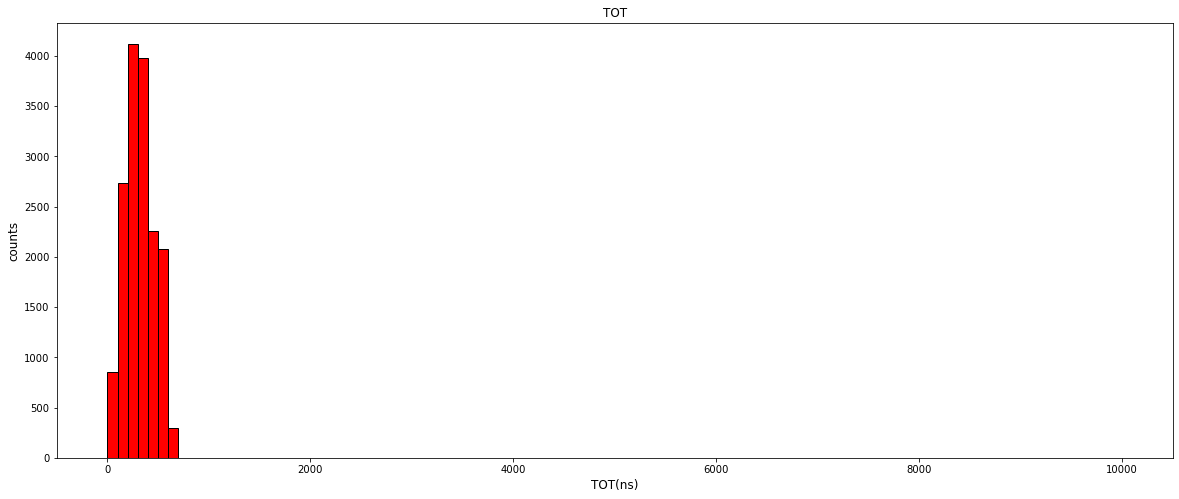

In [82]:
fig, ax1 = plt.subplots(ncols=1, figsize=(20, 8))

nbins = 100

# ax0.hist(a, bins = 100, range = (0, 2500), color = 'r', ec = 'k')
# plt.title("TOT", fontsize = 12) # change the title
# plt.xlabel('TOT(ns)',fontsize = 12)
# plt.ylabel('counts',fontsize = 12)

plt.hist(Pt5_R6_df['#ToT[arb]'], bins= nbins, range = [0, 10000], color = 'r', ec = 'k')
plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOT(ns)',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
# plt.hist(Pt1_df['#ToT[arb]'], bins= nbins, range = [0, 20000], lw=3, histtype='step', label = 'file 2', color = 'red')

# plt.xlabel('ToT, ns')
# plt.legend()
plt.show()
# fig.savefig('TOT_Pt1-1_025044-1_cent_8212020.png',  bbox_inches='tight')

In [83]:
Pt6_R6_df = min_max(grid1_df, C6min, C6max, R6min, R6max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt6_R6_df.shape, type(Pt6_R6_df.iloc[0,0]), type(Pt6_R6_df.iloc[1,1]), time.ctime())
print(Pt6_R6_df.iloc[:3])

(22317, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:47 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
170   178    96  157891259904        250             425         NaN
171   179    96  157891261952        175             425         NaN
361   178    96  158055098624        275             425         NaN


In [84]:
Pt7_R6_df = min_max(grid1_df, C7min, C7max, R6min, R6max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt7_R6_df.shape, type(Pt7_R6_df.iloc[0,0]), type(Pt7_R6_df.iloc[1,1]), time.ctime())
print(Pt7_R6_df.iloc[:3])

(26542, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:48 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
143   179   101  157891258880        350            1025         NaN
144   178   101  157891258624        450            1025         NaN
145   179   102  157891259904        200            1025         NaN


In [85]:
Pt8_R6_df = min_max(grid1_df, C8min, C8max, R6min, R6max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt8_R6_df.shape, type(Pt8_R6_df.iloc[0,0]), type(Pt8_R6_df.iloc[1,1]), time.ctime())
print(Pt8_R6_df.iloc[:3])

(22836, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:48 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
112   179   107  157891258368        725            1150         NaN
113   178   107  157891260416        175            1150         NaN
114   179   106  157891260416        250            1150         NaN


In [86]:
Pt1_R7_df = min_max(grid1_df, C1min, C1max, R7min, R7max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt1_R7_df.shape, type(Pt1_R7_df.iloc[0,0]), type(Pt1_R7_df.iloc[1,1]), time.ctime())
print(Pt1_R7_df.iloc[:3])

(18752, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:49 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
18    183    68  157891257600        900            1200         NaN
19    183    69  157891258624        300            1200         NaN
217   183    68  158055096320        925            1200         NaN


In [87]:
Pt2_R7_df = min_max(grid1_df, C2min, C2max, R7min, R7max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt2_R7_df.shape, type(Pt2_R7_df.iloc[0,0]), type(Pt2_R7_df.iloc[1,1]), time.ctime())
print(Pt2_R7_df.iloc[:3])

(16937, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:49 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
95    183    74  157891258368        650             900         NaN
96    183    73  157891259392        250             900         NaN
310   183    74  158055097344        650             925         NaN


In [88]:
Pt3_R7_df = min_max(grid1_df, C3min, C3max, R7min, R7max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt3_R7_df.shape, type(Pt3_R7_df.iloc[0,0]), type(Pt3_R7_df.iloc[1,1]), time.ctime())
print(Pt3_R7_df.iloc[:3])

(13425, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:50 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
124   183    79  157891258624        475             625         NaN
125   183    80  157891266816        150             625         NaN
330   183    79  158055097600        450             450         NaN


In [89]:
Pt4_R7_df = min_max(grid1_df, C4min, C4max, R7min, R7max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt4_R7_df.shape, type(Pt4_R7_df.iloc[0,0]), type(Pt4_R7_df.iloc[1,1]), time.ctime())
print(Pt4_R7_df.iloc[:3])

(32273, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:50 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
92   183    85  157891258368        500             900         NaN
93   184    85  157891260928        200             900         NaN
94   183    84  157891262208        200             900         NaN


In [90]:
Pt5_R7_df = min_max(grid1_df, C5min, C5max, R7min, R7max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt5_R7_df.shape, type(Pt5_R7_df.iloc[0,0]), type(Pt5_R7_df.iloc[1,1]), time.ctime())
print(Pt5_R7_df.iloc[:3])

(20821, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:51 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
168   183    90  157891259904        325             575         NaN
169   184    90  157891260672        250             575         NaN
339   183    90  158055097856        300             575         NaN


In [91]:
Pt6_R7_df = min_max(grid1_df, C6min, C6max, R7min, R7max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt6_R7_df.shape, type(Pt6_R7_df.iloc[0,0]), type(Pt6_R7_df.iloc[1,1]), time.ctime())
print(Pt6_R7_df.iloc[:3])

(30102, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:51 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
179   184    96  157891260160        200             600         NaN
180   183    96  157891260672        275             600         NaN
181   184    95  157891262720        125             600         NaN


In [92]:
Pt7_R7_df = min_max(grid1_df, C7min, C7max, R7min, R7max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt7_R7_df.shape, type(Pt7_R7_df.iloc[0,0]), type(Pt7_R7_df.iloc[1,1]), time.ctime())
print(Pt7_R7_df.iloc[:3])

(32195, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:51 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
80   184   101  157891258112        475            1025         NaN
81   183   101  157891259136        325            1025         NaN
82   184   102  157891260672        225            1025         NaN


In [93]:
Pt8_R7_df = min_max(grid1_df, C8min, C8max, R7min, R7max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt8_R7_df.shape, type(Pt8_R7_df.iloc[0,0]), type(Pt8_R7_df.iloc[1,1]), time.ctime())
print(Pt8_R7_df.iloc[:3])

(28606, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:52 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
16    184   107  157891257600       1000            1325         NaN
17    184   106  157891258112        325            1325         NaN
215   184   107  158055096320       1000            1325         NaN


In [94]:
Pt1_R8_df = min_max(grid1_df, C1min, C1max, R8min, R8max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt1_R8_df.shape, type(Pt1_R8_df.iloc[0,0]), type(Pt1_R8_df.iloc[1,1]), time.ctime())
print(Pt1_R8_df.iloc[:3])

(16818, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:52 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
66    188    68  157891257856        825            1025         NaN
67    188    69  157891261696        200            1025         NaN
279   188    68  158055096832        825            1075         NaN


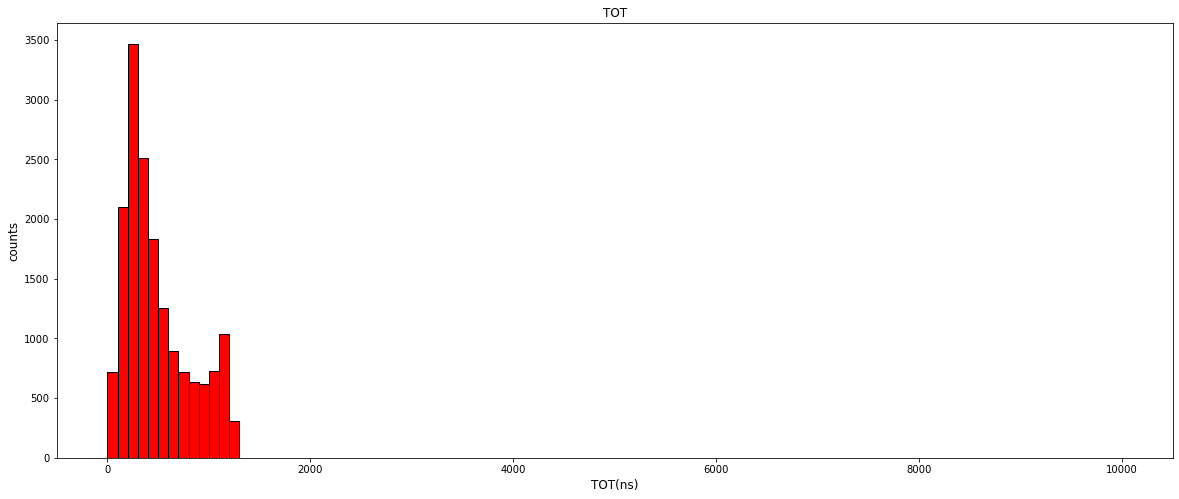

In [95]:
fig, ax1 = plt.subplots(ncols=1, figsize=(20, 8))

nbins = 100

# ax0.hist(a, bins = 100, range = (0, 2500), color = 'r', ec = 'k')
# plt.title("TOT", fontsize = 12) # change the title
# plt.xlabel('TOT(ns)',fontsize = 12)
# plt.ylabel('counts',fontsize = 12)

plt.hist(Pt1_R8_df['#ToT[arb]'], bins= nbins, range = [0, 10000], color = 'r', ec = 'k')
plt.title("TOT", fontsize = 12) # change the title
plt.xlabel('TOT(ns)',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
# plt.hist(Pt1_df['#ToT[arb]'], bins= nbins, range = [0, 20000], lw=3, histtype='step', label = 'file 2', color = 'red')

# plt.xlabel('ToT, ns')
# plt.legend()
plt.show()
# fig.savefig('TOT_Pt1-1_025044-1_cent_8212020.png',  bbox_inches='tight')

In [96]:
Pt2_R8_df = min_max(grid1_df, C2min, C2max, R8min, R8max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt2_R8_df.shape, type(Pt2_R8_df.iloc[0,0]), Pt2_R8_df.iloc[:1], time.ctime())
print()

(17369, 6) <class 'numpy.int64'>      #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
138   188    74  157891258624        450             700         NaN Mon Oct 19 11:48:53 2020



In [97]:
Pt3_R8_df = min_max(grid1_df, C3min, C3max, R8min, R8max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt3_R8_df.shape, type(Pt3_R8_df.iloc[0,0]), type(Pt3_R8_df.iloc[1,1]), time.ctime())
print(Pt3_R8_df.iloc[:3])

(13234, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:53 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
157   188    79  157891259136        325             325         NaN
342   188    79  158055097856        325             325         NaN
542   188    79  158218937088        300             450         NaN


In [98]:
Pt4_R8_df = min_max(grid1_df, C4min, C4max, R8min, R8max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt4_R8_df.shape, type(Pt4_R8_df.iloc[0,0]), type(Pt4_R8_df.iloc[1,1]), time.ctime())
print(Pt4_R8_df.iloc[:3])

(29148, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:54 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
149   188    85  157891258880        425             825         NaN
150   189    85  157891260672        225             825         NaN
151   188    84  157891262208        175             825         NaN


In [99]:
Pt5_R8_df = min_max(grid1_df, C5min, C5max, R8min, R8max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt5_R8_df.shape, type(Pt5_R8_df.iloc[0,0]), type(Pt5_R8_df.iloc[1,1]), time.ctime())
print(Pt5_R8_df.iloc[:3])

(16923, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:54 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
177   189    90  157891259904        275             500         NaN
178   188    90  157891261184        225             500         NaN
375   188    90  158055101184        250             475         NaN


In [100]:
Pt6_R8_df = min_max(grid1_df, C6min, C6max, R8min, R8max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt6_R8_df.shape, type(Pt6_R8_df.iloc[0,0]), type(Pt6_R8_df.iloc[1,1]), time.ctime())
print(Pt6_R8_df.iloc[:3])

(21985, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:55 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
118   189   100  157891266816        150             900         NaN
189   189    96  157891264768        150             150         NaN
315   189   100  158055104000        150            1000         NaN


In [101]:
Pt7_R8_df = min_max(grid1_df, C7min, C7max, R8min, R8max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt7_R8_df.shape, type(Pt7_R8_df.iloc[0,0]), type(Pt7_R8_df.iloc[1,1]), time.ctime())
print(Pt7_R8_df.iloc[:3])

(28513, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:55 2020
     #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
115   189   101  157891258368        425             900         NaN
116   189   102  157891259392        275             900         NaN
117   188   101  157891271168         50             900         NaN


In [102]:
Pt8_R8_df = min_max(grid1_df, C8min, C8max, R8min, R8max)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Pt8_R8_df.shape, type(Pt8_R8_df.iloc[0,0]), type(Pt8_R8_df.iloc[1,1]), time.ctime())
print(Pt8_R8_df.iloc[:3])

(31572, 6) <class 'numpy.int64'> <class 'numpy.int64'> Mon Oct 19 11:48:56 2020
    #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
54   189   107  157891257856        950            1700         NaN
55   189   106  157891258112        400            1700         NaN
56   190   107  157891262464        150            1700         NaN


In [103]:
ToA_all_array = []
ToAtotal_all_array = []
for j in range(1,9):
    for k in range(1,9):
        # Create TOT arrays
        globals()["Pt"+str(j)+"_R"+str(k)+"_TOA_array"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToA'].to_numpy())
#         globals()["Pt"+str(j)+"_R"+str(k)+"_TOTtotal_array"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy())
        ToA_all_array.append((globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToA'].to_numpy()))
#         ToAtotal_all_array.append((globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy()))

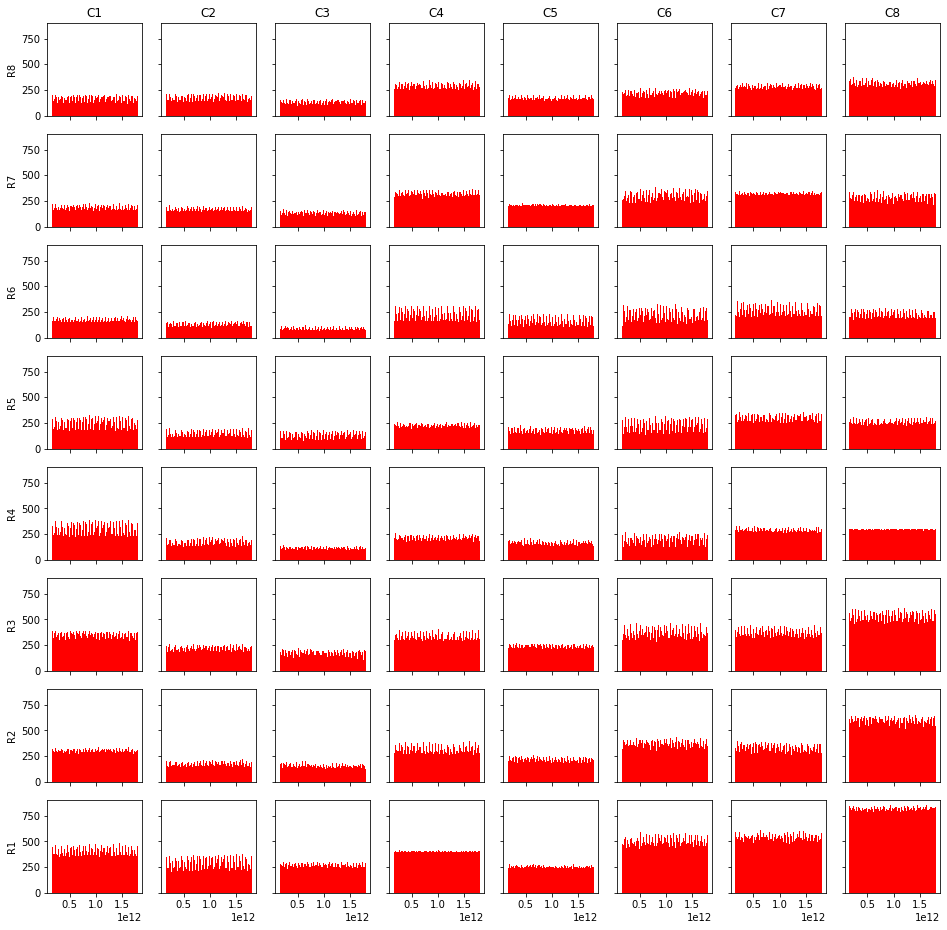

In [104]:
fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8), \
                  (ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16), \
                  (ax17, ax18, ax19, ax20, ax21, ax22, ax23, ax24), \
                  (ax25, ax26, ax27, ax28, ax29, ax30, ax31, ax32), \
                  (ax33, ax34, ax35, ax36, ax37, ax38, ax39, ax40), \
                  (ax41, ax42, ax43, ax44, ax45, ax46, ax47, ax48), \
                  (ax49, ax50, ax51, ax52, ax53, ax54, ax55, ax56), \
                  (ax57, ax58, ax59, ax60, ax61, ax62, ax63, ax64), \
                 )= plt.subplots(nrows = 8, ncols =8, figsize = (16, 16), sharex=True, sharey=True, facecolor='w')
for j in range(1,9):
    for k in range(1,9):
            globals()['ax'+str((64-(j*8))+k)].hist(globals()["Pt"+str(k)+"_R"+str(j)+"_TOA_array"], bins = 100, color='r')
#             print('R'+str(j),'C'+str(k),len(globals()["Pt"+str(k)+"_R"+str(j)+"_TOT_array"]))
            if j == 8: globals()['ax'+str((64-(j*8))+k)].set_title("C"+str(k)) 
            if k == 1: globals()['ax'+str((64-(j*8))+k)].set_ylabel("R"+str(j))
fig.savefig('ToA_64_full.png', bbox_inches='tight')

In [105]:
1.002691600e9-1.002691450e9

150.0

In [107]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt1_R1_ToA_1450_1600_df = Pt1_R1_df.drop(Pt1_R1_df[(Pt1_R1_df['#ToA'] < ToAmin) | (Pt1_R1_df['#ToA'] > ToAmax)].index)

print(Pt1_R1_ToA_1450_1600_df.shape, type(Pt1_R1_ToA_1450_1600_df.iloc[0,0]), Pt1_R1_ToA_1450_1600_df.iloc[:1])

(296, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7618   153    68  164280970240       1875            4100         NaN


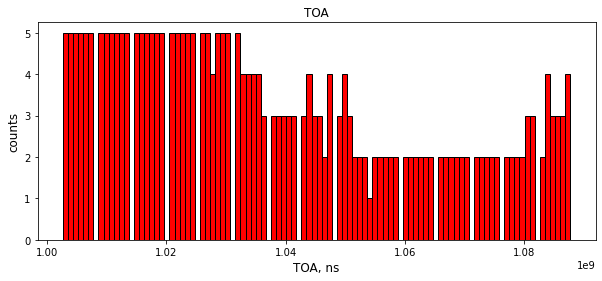

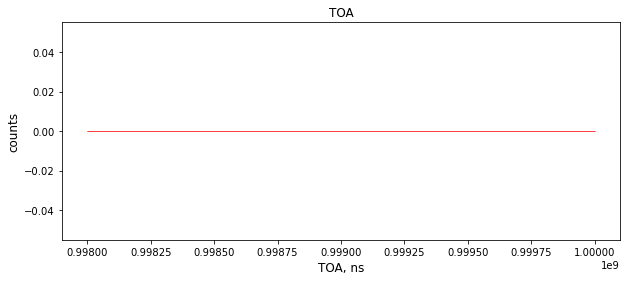

In [109]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R1_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R1_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

In [110]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt2_R1_ToA_1450_1600_df = Pt2_R1_df.drop(Pt2_R1_df[(Pt2_R1_df['#ToA'] < ToAmin) | (Pt2_R1_df['#ToA'] > ToAmax)].index)

print(Pt2_R1_ToA_1450_1600_df.shape, type(Pt2_R1_ToA_1450_1600_df.iloc[0,0]), Pt2_R1_ToA_1450_1600_df.iloc[:1])

(167, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7673   153    74  164280970752       1225            2275         NaN


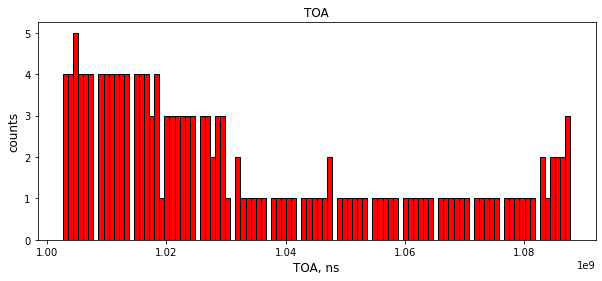

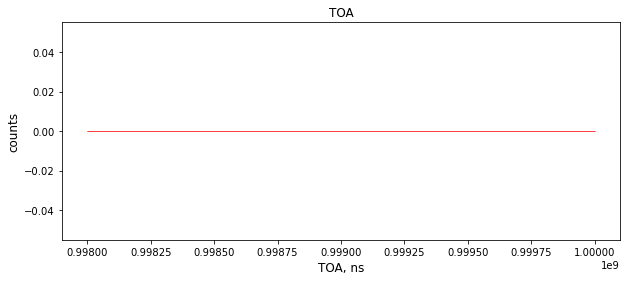

In [111]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R1_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R1_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [112]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt3_R1_ToA_1450_1600_df = Pt3_R1_df.drop(Pt3_R1_df[(Pt3_R1_df['#ToA'] < ToAmin) | (Pt3_R1_df['#ToA'] > ToAmax)].index)

print(Pt3_R1_ToA_1450_1600_df.shape, type(Pt3_R1_ToA_1450_1600_df.iloc[0,0]), Pt3_R1_ToA_1450_1600_df.iloc[:1])

(208, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7677   153    79  164280971008        950            1675         NaN


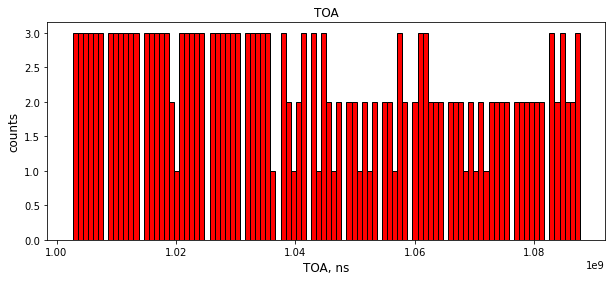

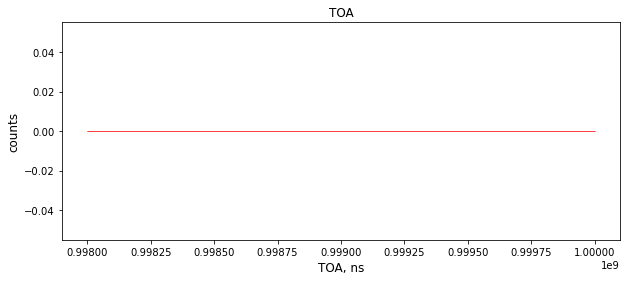

In [113]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R1_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R1_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [114]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt4_R1_ToA_1450_1600_df = Pt4_R1_df.drop(Pt4_R1_df[(Pt4_R1_df['#ToA'] < ToAmin) | (Pt4_R1_df['#ToA'] > ToAmax)].index)

print(Pt4_R1_ToA_1450_1600_df.shape, type(Pt4_R1_ToA_1450_1600_df.iloc[0,0]), Pt4_R1_ToA_1450_1600_df.iloc[:1])

(347, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7716   153    85  164280971264        775            1700         NaN


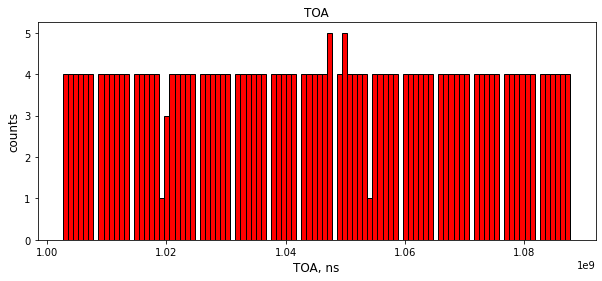

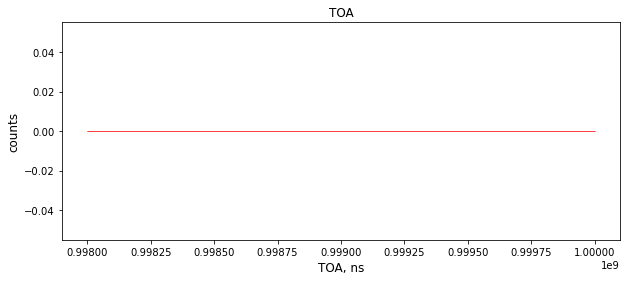

In [115]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R1_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R1_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [116]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt5_R1_ToA_1450_1600_df = Pt5_R1_df.drop(Pt5_R1_df[(Pt5_R1_df['#ToA'] < ToAmin) | (Pt5_R1_df['#ToA'] > ToAmax)].index)

print(Pt5_R1_ToA_1450_1600_df.shape, type(Pt5_R1_ToA_1450_1600_df.iloc[0,0]), Pt5_R1_ToA_1450_1600_df.iloc[:1])

(216, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7769   153    90  164280972288        400             725         NaN


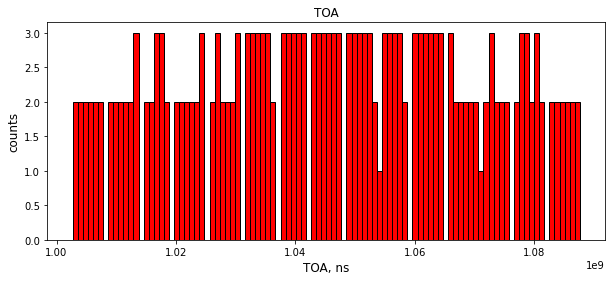

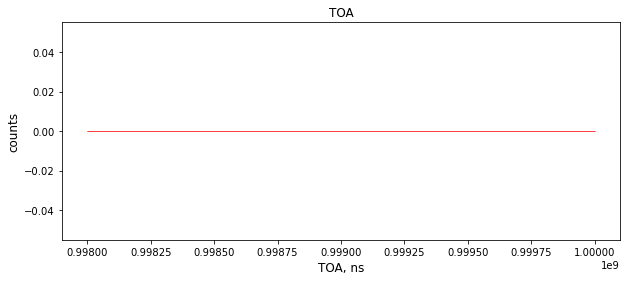

In [117]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R1_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R1_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [118]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt6_R1_ToA_1450_1600_df = Pt6_R1_df.drop(Pt6_R1_df[(Pt6_R1_df['#ToA'] < ToAmin) | (Pt6_R1_df['#ToA'] > ToAmax)].index)

print(Pt6_R1_ToA_1450_1600_df.shape, type(Pt6_R1_ToA_1450_1600_df.iloc[0,0]), Pt6_R1_ToA_1450_1600_df.iloc[:1])

(417, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7667   154   100  164280971520        400            2850         NaN


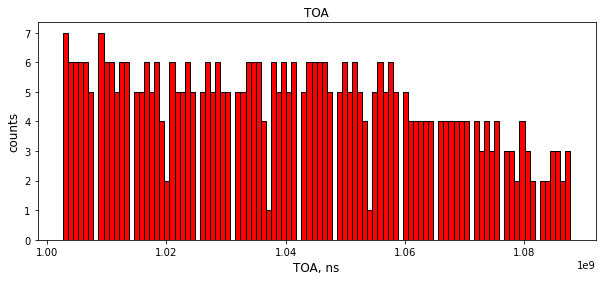

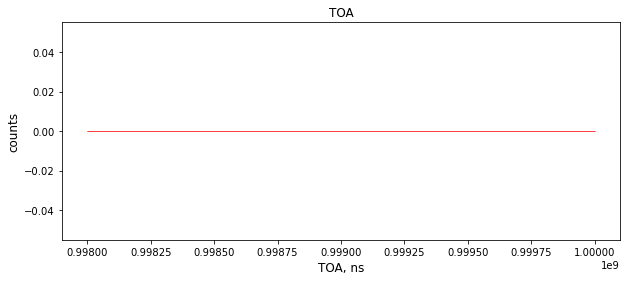

In [119]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R1_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R1_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [120]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt7_R1_ToA_1450_1600_df = Pt7_R1_df.drop(Pt7_R1_df[(Pt7_R1_df['#ToA'] < ToAmin) | (Pt7_R1_df['#ToA'] > ToAmax)].index)

print(Pt7_R1_ToA_1450_1600_df.shape, type(Pt7_R1_ToA_1450_1600_df.iloc[0,0]), Pt7_R1_ToA_1450_1600_df.iloc[:1])

(450, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7665   154   101  164280970752        750            2850         NaN


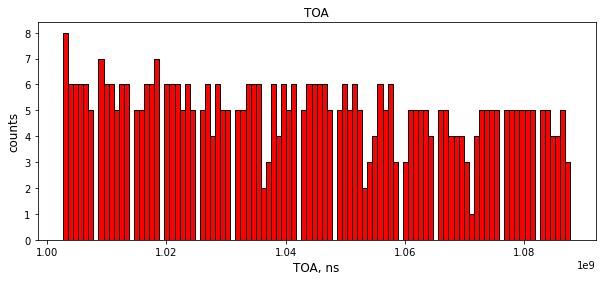

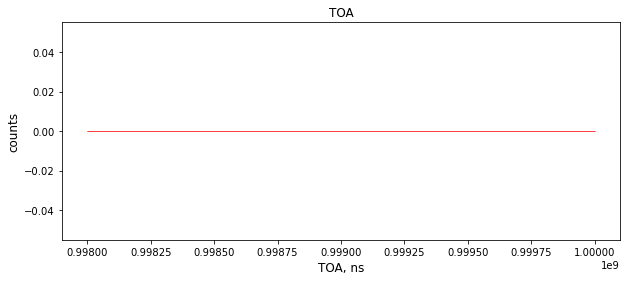

In [121]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R1_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R1_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [122]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt8_R1_ToA_1450_1600_df = Pt8_R1_df.drop(Pt8_R1_df[(Pt8_R1_df['#ToA'] < ToAmin) | (Pt8_R1_df['#ToA'] > ToAmax)].index)

print(Pt8_R1_ToA_1450_1600_df.shape, type(Pt8_R1_ToA_1450_1600_df.iloc[0,0]), Pt8_R1_ToA_1450_1600_df.iloc[:1])

(687, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7599   154   106  164280969472       1375            6650         NaN


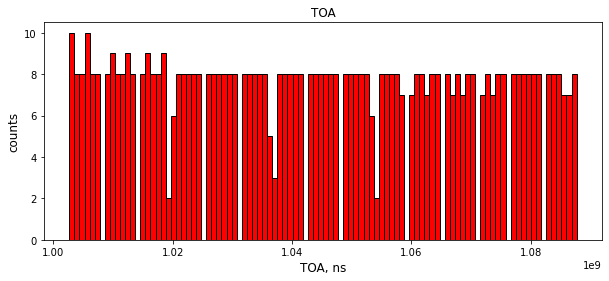

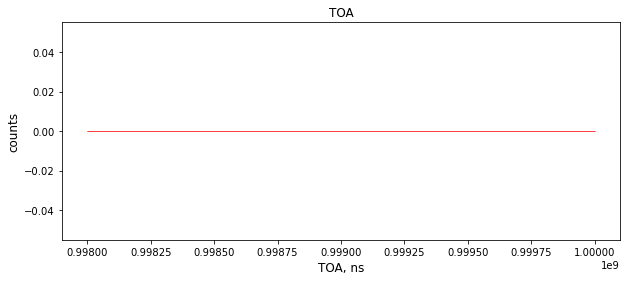

In [123]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R1_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R1_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [124]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt1_R2_ToA_1450_1600_df = Pt1_R2_df.drop(Pt1_R2_df[(Pt1_R2_df['#ToA'] < ToAmin) | (Pt1_R2_df['#ToA'] > ToAmax)].index)

print(Pt1_R2_ToA_1450_1600_df.shape, type(Pt1_R2_ToA_1450_1600_df.iloc[0,0]), Pt1_R2_ToA_1450_1600_df.iloc[:1])

(231, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7648   158    68  164280970752       1000            1850         NaN


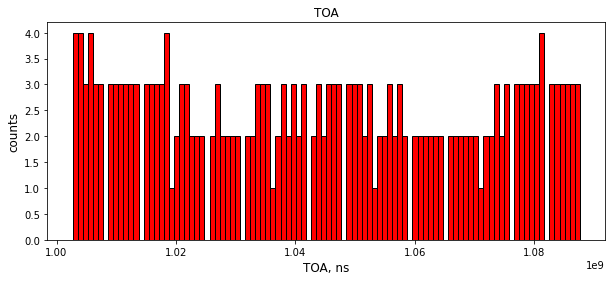

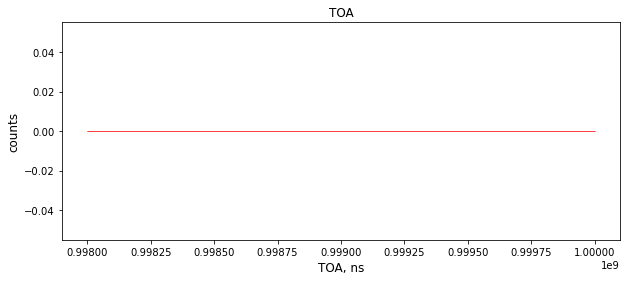

In [125]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R2_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R2_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [126]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt2_R2_ToA_1450_1600_df = Pt2_R2_df.drop(Pt2_R2_df[(Pt2_R2_df['#ToA'] < ToAmin) | (Pt2_R2_df['#ToA'] > ToAmax)].index)

print(Pt2_R2_ToA_1450_1600_df.shape, type(Pt2_R2_ToA_1450_1600_df.iloc[0,0]), Pt2_R2_ToA_1450_1600_df.iloc[:1])

(109, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7754   158    74  164280971776        550             900         NaN


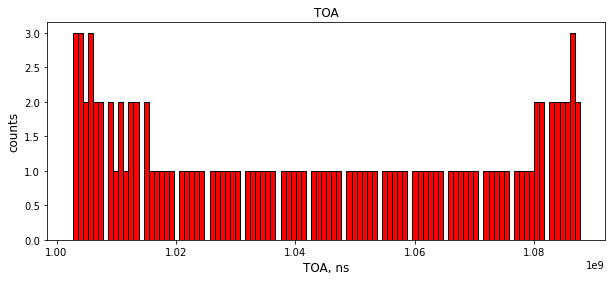

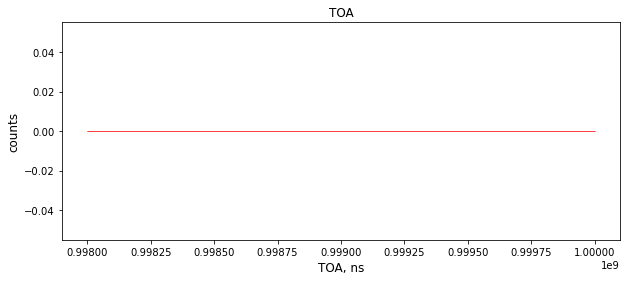

In [127]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R2_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R2_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [128]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt3_R2_ToA_1450_1600_df = Pt3_R2_df.drop(Pt3_R2_df[(Pt3_R2_df['#ToA'] < ToAmin) | (Pt3_R2_df['#ToA'] > ToAmax)].index)

print(Pt3_R2_ToA_1450_1600_df.shape, type(Pt3_R2_ToA_1450_1600_df.iloc[0,0]), Pt3_R2_ToA_1450_1600_df.iloc[:1])

(118, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7758   158    79  164280972032        500             500         NaN


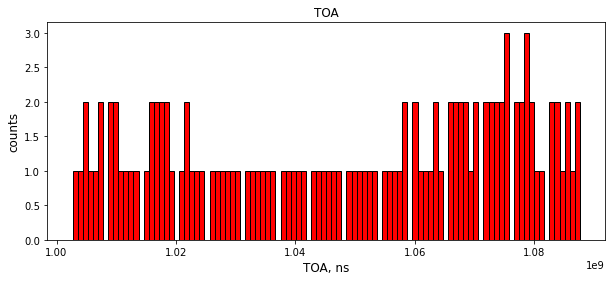

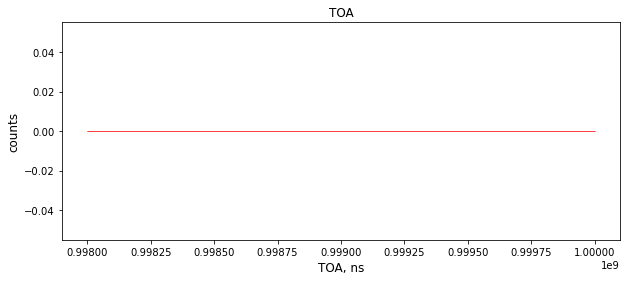

In [129]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R2_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R2_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [130]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt4_R2_ToA_1450_1600_df = Pt4_R2_df.drop(Pt4_R2_df[(Pt4_R2_df['#ToA'] < ToAmin) | (Pt4_R2_df['#ToA'] > ToAmax)].index)

print(Pt4_R2_ToA_1450_1600_df.shape, type(Pt4_R2_ToA_1450_1600_df.iloc[0,0]), Pt4_R2_ToA_1450_1600_df.iloc[:1])

(312, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7780   158    85  164280973056        350             350         NaN


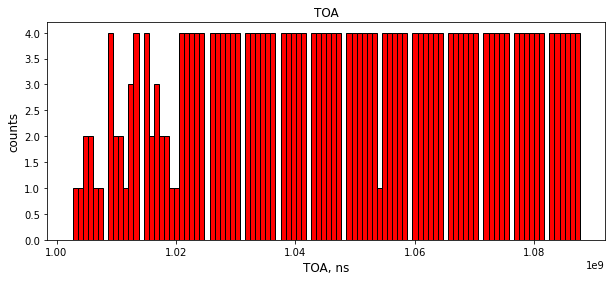

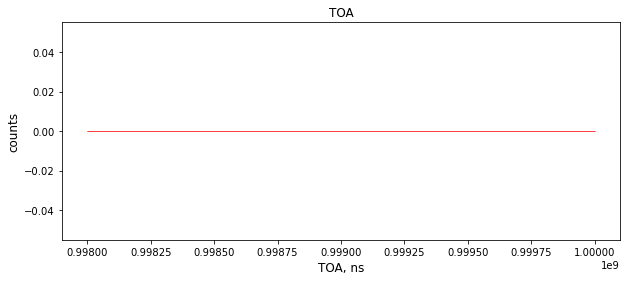

In [131]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R2_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R2_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [132]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt5_R2_ToA_1450_1600_df = Pt5_R2_df.drop(Pt5_R2_df[(Pt5_R2_df['#ToA'] < ToAmin) | (Pt5_R2_df['#ToA'] > ToAmax)].index)

print(Pt5_R2_ToA_1450_1600_df.shape, type(Pt5_R2_ToA_1450_1600_df.iloc[0,0]), Pt5_R2_ToA_1450_1600_df.iloc[:1])

(212, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7787   158    90  164280975872        250             250         NaN


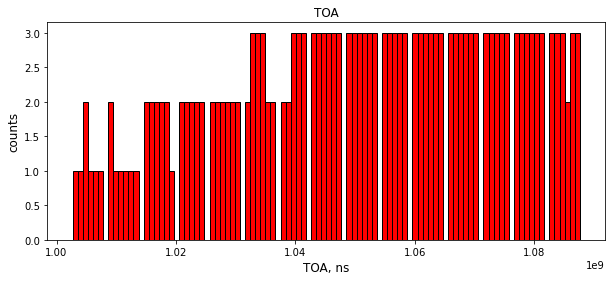

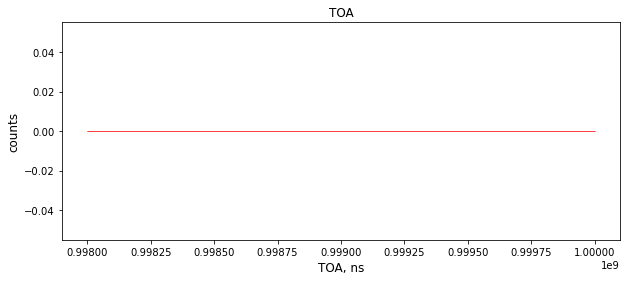

In [133]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R2_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R2_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [134]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt6_R2_ToA_1450_1600_df = Pt6_R2_df.drop(Pt6_R2_df[(Pt6_R2_df['#ToA'] < ToAmin) | (Pt6_R2_df['#ToA'] > ToAmax)].index)

print(Pt6_R2_ToA_1450_1600_df.shape, type(Pt6_R2_ToA_1450_1600_df.iloc[0,0]), Pt6_R2_ToA_1450_1600_df.iloc[:1])

(340, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7745   159   100  164280974592        150            1100         NaN


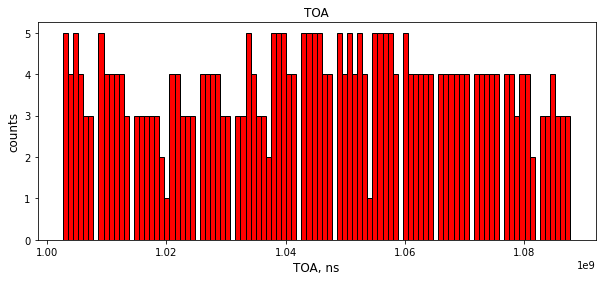

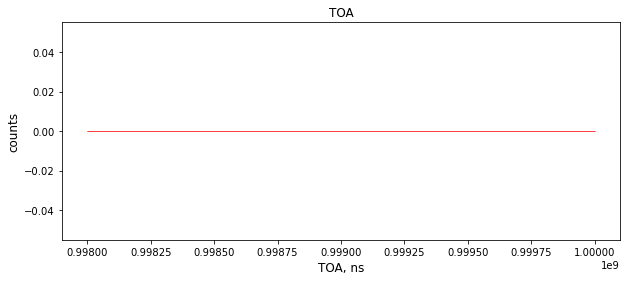

In [135]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R2_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R2_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [136]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt7_R2_ToA_1450_1600_df = Pt7_R2_df.drop(Pt7_R2_df[(Pt7_R2_df['#ToA'] < ToAmin) | (Pt7_R2_df['#ToA'] > ToAmax)].index)

print(Pt7_R2_ToA_1450_1600_df.shape, type(Pt7_R2_ToA_1450_1600_df.iloc[0,0]), Pt7_R2_ToA_1450_1600_df.iloc[:1])

(320, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7743   159   101  164280971776        450            1100         NaN


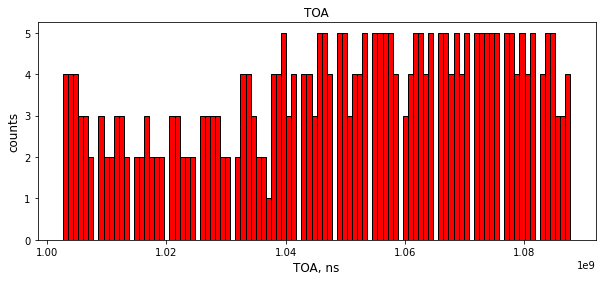

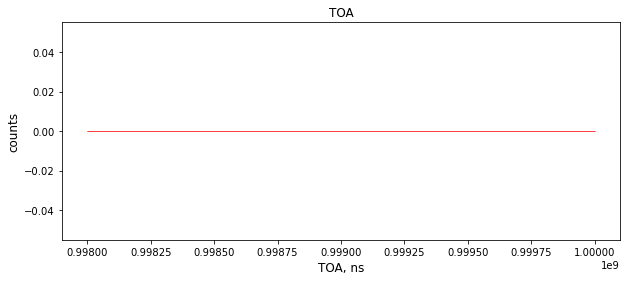

In [137]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R2_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R2_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [138]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt8_R2_ToA_1450_1600_df = Pt8_R2_df.drop(Pt8_R2_df[(Pt8_R2_df['#ToA'] < ToAmin) | (Pt8_R2_df['#ToA'] > ToAmax)].index)

print(Pt8_R2_ToA_1450_1600_df.shape, type(Pt8_R2_ToA_1450_1600_df.iloc[0,0]), Pt8_R2_ToA_1450_1600_df.iloc[:1])

(545, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7656   159   106  164280971264        525            2175         NaN


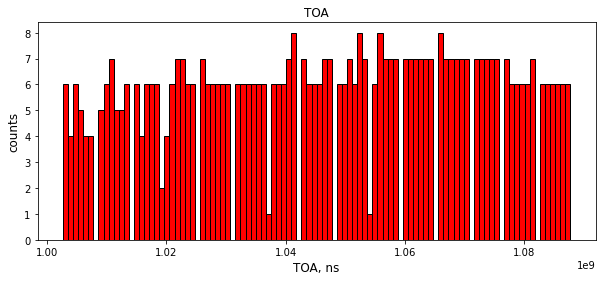

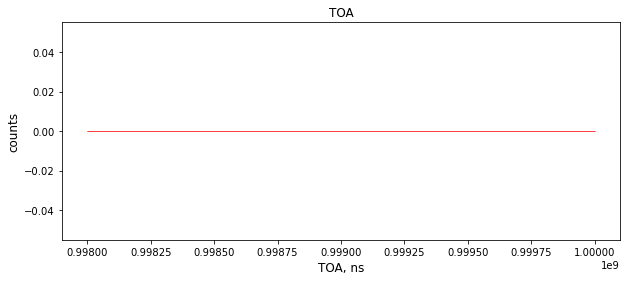

In [139]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R2_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R2_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [140]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt1_R3_ToA_1450_1600_df = Pt1_R3_df.drop(Pt1_R3_df[(Pt1_R3_df['#ToA'] < ToAmin) | (Pt1_R3_df['#ToA'] > ToAmax)].index)

print(Pt1_R3_ToA_1450_1600_df.shape, type(Pt1_R3_ToA_1450_1600_df.iloc[0,0]), Pt1_R3_ToA_1450_1600_df.iloc[:1])

(292, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7609   163    68  164280970240       1275            2750         NaN


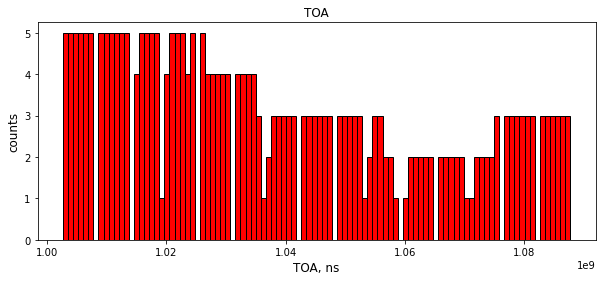

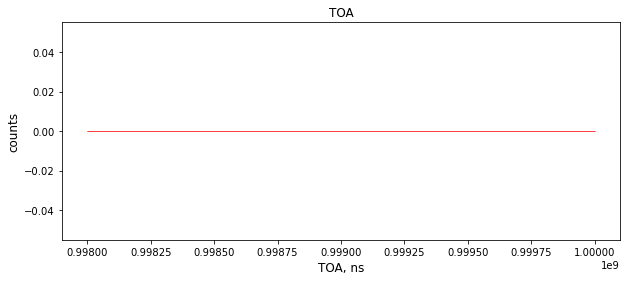

In [141]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R3_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R3_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [142]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt2_R3_ToA_1450_1600_df = Pt2_R3_df.drop(Pt2_R3_df[(Pt2_R3_df['#ToA'] < ToAmin) | (Pt2_R3_df['#ToA'] > ToAmax)].index)

print(Pt2_R3_ToA_1450_1600_df.shape, type(Pt2_R3_ToA_1450_1600_df.iloc[0,0]), Pt2_R3_ToA_1450_1600_df.iloc[:1])

(170, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7684   163    74  164280971008        825            1500         NaN


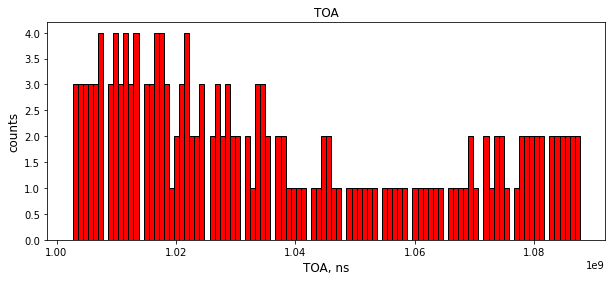

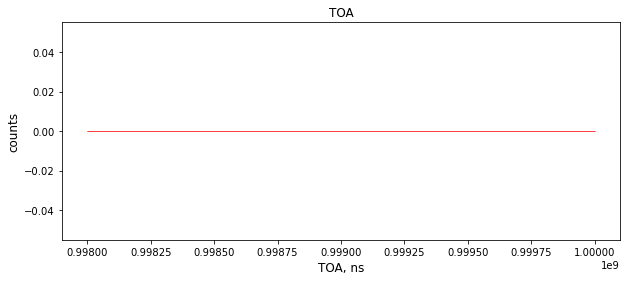

In [143]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R3_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R3_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [144]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt3_R3_ToA_1450_1600_df = Pt3_R3_df.drop(Pt3_R3_df[(Pt3_R3_df['#ToA'] < ToAmin) | (Pt3_R3_df['#ToA'] > ToAmax)].index)

print(Pt3_R3_ToA_1450_1600_df.shape, type(Pt3_R3_ToA_1450_1600_df.iloc[0,0]), Pt3_R3_ToA_1450_1600_df.iloc[:1])

(166, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7711   163    79  164280971264        675            1075         NaN


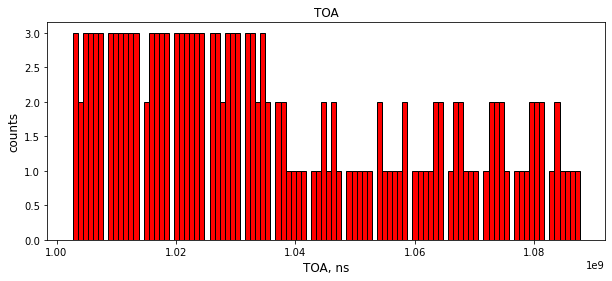

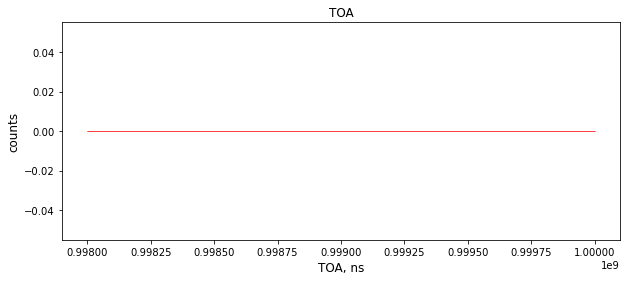

In [145]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R3_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R3_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [146]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt4_R3_ToA_1450_1600_df = Pt4_R3_df.drop(Pt4_R3_df[(Pt4_R3_df['#ToA'] < ToAmin) | (Pt4_R3_df['#ToA'] > ToAmax)].index)

print(Pt4_R3_ToA_1450_1600_df.shape, type(Pt4_R3_ToA_1450_1600_df.iloc[0,0]), Pt4_R3_ToA_1450_1600_df.iloc[:1])

(348, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7747   163    85  164280971776        500             875         NaN


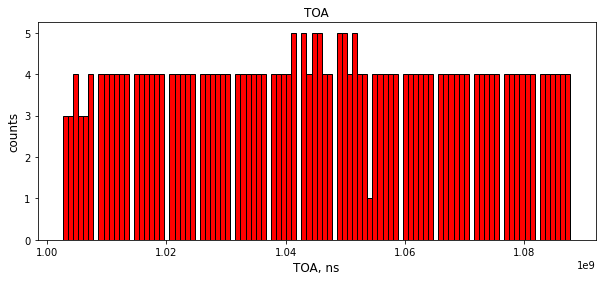

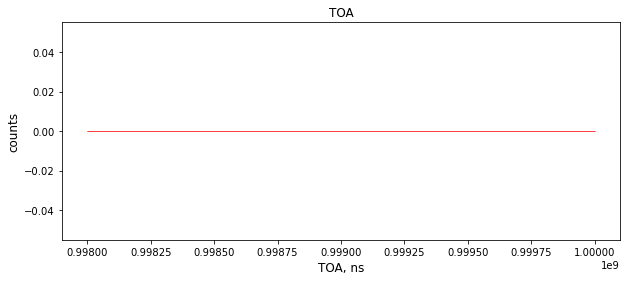

In [147]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R3_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R3_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [148]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt5_R3_ToA_1450_1600_df = Pt5_R3_df.drop(Pt5_R3_df[(Pt5_R3_df['#ToA'] < ToAmin) | (Pt5_R3_df['#ToA'] > ToAmax)].index)

print(Pt5_R3_ToA_1450_1600_df.shape, type(Pt5_R3_ToA_1450_1600_df.iloc[0,0]), Pt5_R3_ToA_1450_1600_df.iloc[:1])

(233, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7774   163    90  164280972800        350             525         NaN


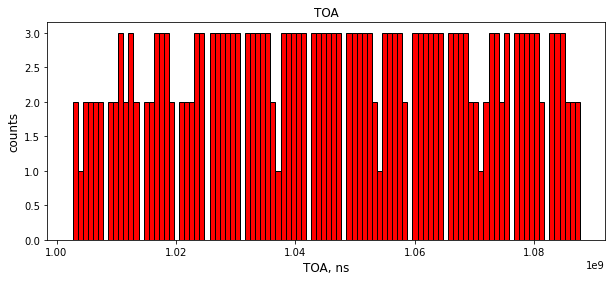

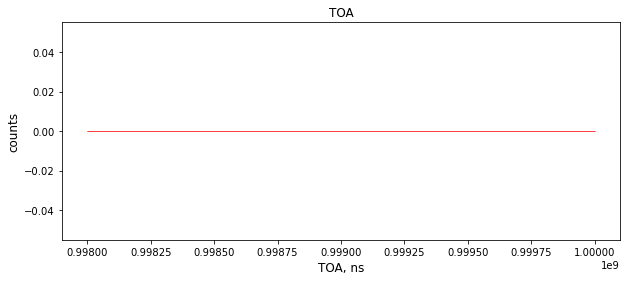

In [149]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R3_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R3_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [150]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt6_R3_ToA_1450_1600_df = Pt6_R3_df.drop(Pt6_R3_df[(Pt6_R3_df['#ToA'] < ToAmin) | (Pt6_R3_df['#ToA'] > ToAmax)].index)

print(Pt6_R3_ToA_1450_1600_df.shape, type(Pt6_R3_ToA_1450_1600_df.iloc[0,0]), Pt6_R3_ToA_1450_1600_df.iloc[:1])

(357, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7683   164   100  164280974336        125            1475         NaN


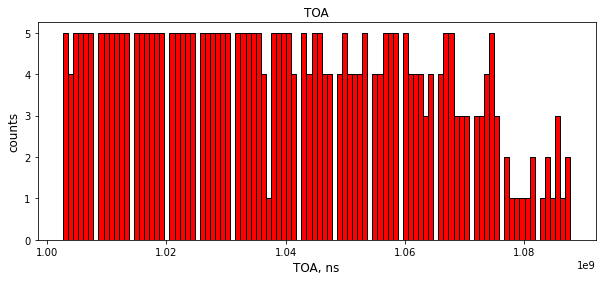

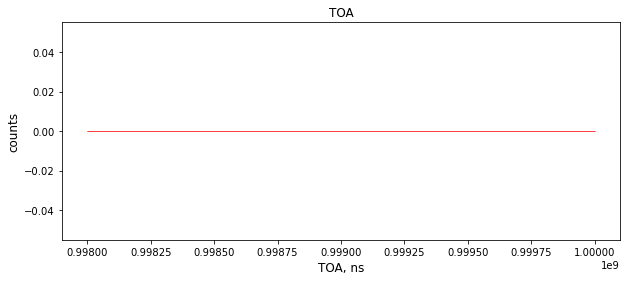

In [151]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R3_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R3_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [152]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt7_R3_ToA_1450_1600_df = Pt7_R3_df.drop(Pt7_R3_df[(Pt7_R3_df['#ToA'] < ToAmin) | (Pt7_R3_df['#ToA'] > ToAmax)].index)

print(Pt7_R3_ToA_1450_1600_df.shape, type(Pt7_R3_ToA_1450_1600_df.iloc[0,0]), Pt7_R3_ToA_1450_1600_df.iloc[:1])

(377, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7680   163   101  164280971008        575            1475         NaN


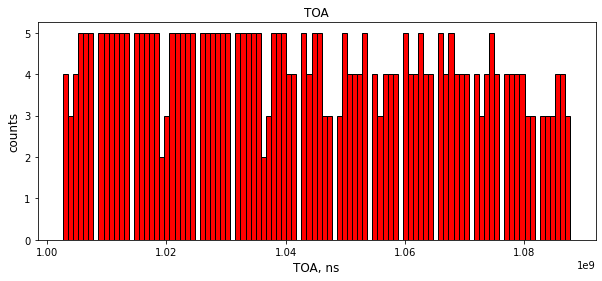

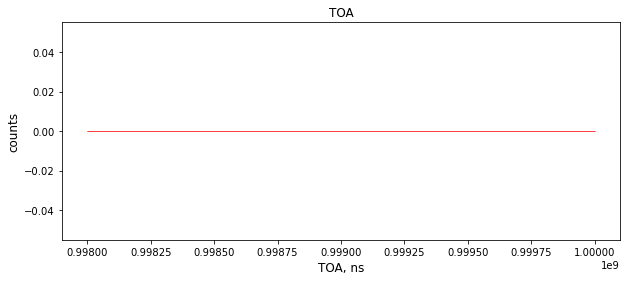

In [153]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R3_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R3_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [154]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt8_R3_ToA_1450_1600_df = Pt8_R3_df.drop(Pt8_R3_df[(Pt8_R3_df['#ToA'] < ToAmin) | (Pt8_R3_df['#ToA'] > ToAmax)].index)

print(Pt8_R3_ToA_1450_1600_df.shape, type(Pt8_R3_ToA_1450_1600_df.iloc[0,0]), Pt8_R3_ToA_1450_1600_df.iloc[:1])

(524, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7626   164   107  164280970496       1150            2800         NaN


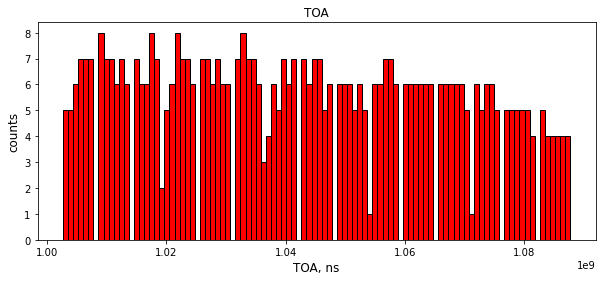

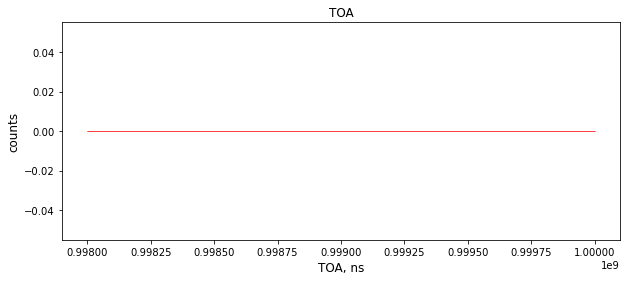

In [155]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R3_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R3_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [156]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt1_R4_ToA_1450_1600_df = Pt1_R4_df.drop(Pt1_R4_df[(Pt1_R4_df['#ToA'] < ToAmin) | (Pt1_R4_df['#ToA'] > ToAmax)].index)

print(Pt1_R4_ToA_1450_1600_df.shape, type(Pt1_R4_ToA_1450_1600_df.iloc[0,0]), Pt1_R4_ToA_1450_1600_df.iloc[:1])

(172, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7615   172    68  164280970752        525            2800         NaN


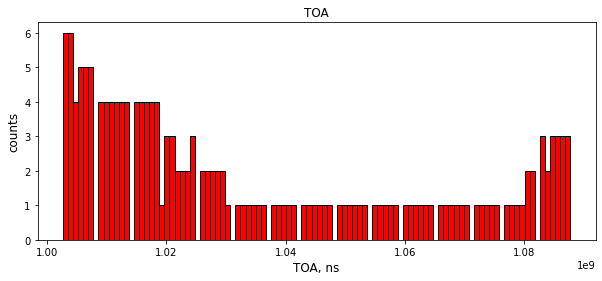

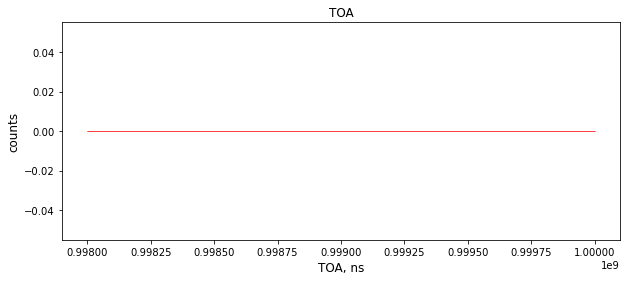

In [157]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R4_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R4_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [158]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt2_R4_ToA_1450_1600_df = Pt2_R4_df.drop(Pt2_R4_df[(Pt2_R4_df['#ToA'] < ToAmin) | (Pt2_R4_df['#ToA'] > ToAmax)].index)

print(Pt2_R4_ToA_1450_1600_df.shape, type(Pt2_R4_ToA_1450_1600_df.iloc[0,0]))
print( Pt2_R4_ToA_1450_1600_df.iloc[:1])

(98, 6) <class 'numpy.int64'>
      #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7664   172    74  164280976384        125            1500         NaN


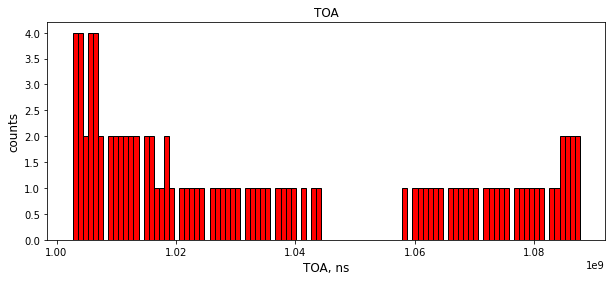

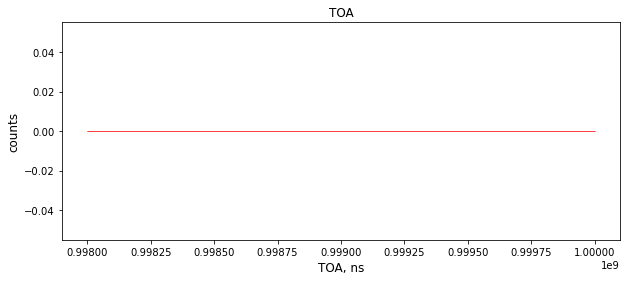

In [159]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R4_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R4_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [160]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt3_R4_ToA_1450_1600_df = Pt3_R4_df.drop(Pt3_R4_df[(Pt3_R4_df['#ToA'] < ToAmin) | (Pt3_R4_df['#ToA'] > ToAmax)].index)

print(Pt3_R4_ToA_1450_1600_df.shape, type(Pt3_R4_ToA_1450_1600_df.iloc[0,0]), Pt3_R4_ToA_1450_1600_df.iloc[:1])

(75, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7741   168    79  164280971776        525             700         NaN


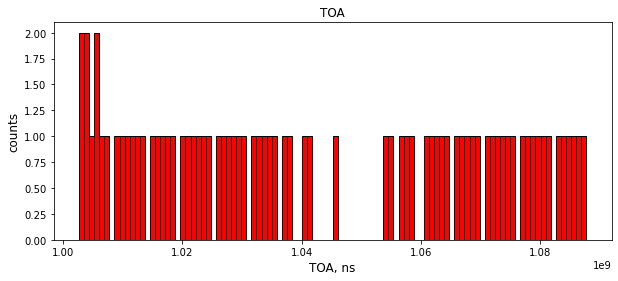

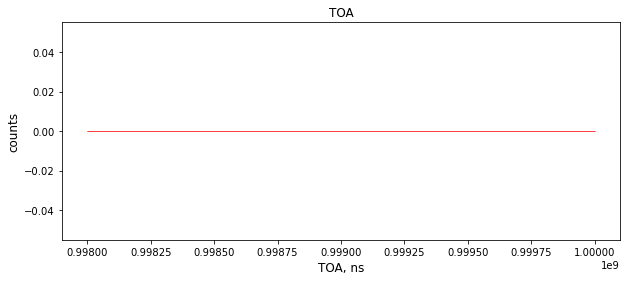

In [161]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R4_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R4_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [162]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt4_R4_ToA_1450_1600_df = Pt4_R4_df.drop(Pt4_R4_df[(Pt4_R4_df['#ToA'] < ToAmin) | (Pt4_R4_df['#ToA'] > ToAmax)].index)

print(Pt4_R4_ToA_1450_1600_df.shape, type(Pt4_R4_ToA_1450_1600_df.iloc[0,0]), Pt4_R4_ToA_1450_1600_df.iloc[:1])

(196, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7757   168    85  164280972032        475             475         NaN


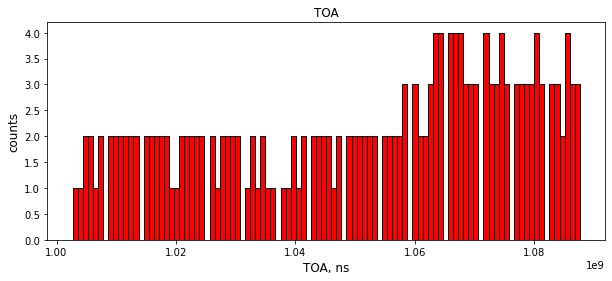

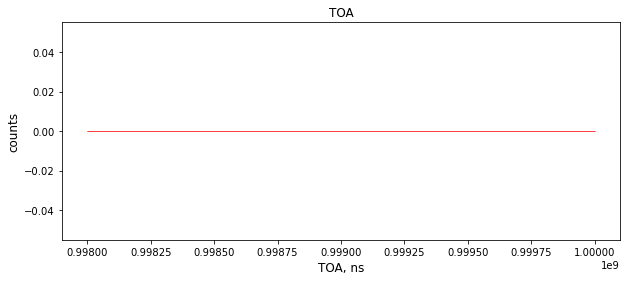

In [163]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R4_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R4_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [164]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt5_R4_ToA_1450_1600_df = Pt5_R4_df.drop(Pt5_R4_df[(Pt5_R4_df['#ToA'] < ToAmin) | (Pt5_R4_df['#ToA'] > ToAmax)].index)

print(Pt5_R4_ToA_1450_1600_df.shape, type(Pt5_R4_ToA_1450_1600_df.iloc[0,0]), Pt5_R4_ToA_1450_1600_df.iloc[:1])

(128, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7783   168    90  164280973568        300             300         NaN


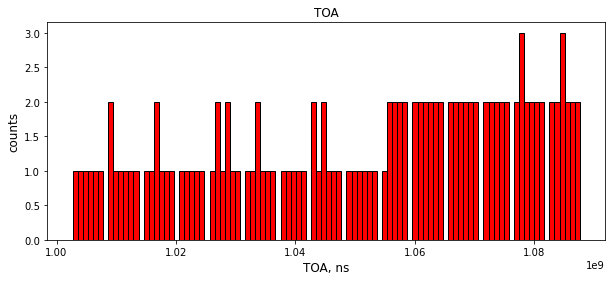

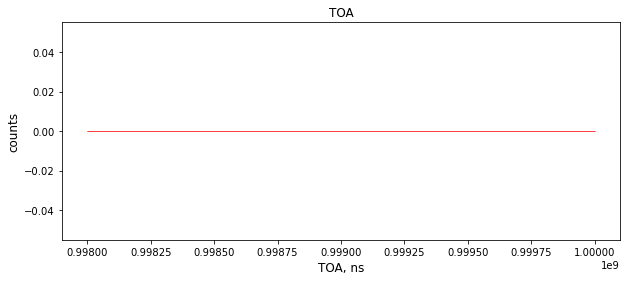

In [165]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R4_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R4_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [166]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt6_R4_ToA_1450_1600_df = Pt6_R4_df.drop(Pt6_R4_df[(Pt6_R4_df['#ToA'] < ToAmin) | (Pt6_R4_df['#ToA'] > ToAmax)].index)

print(Pt6_R4_ToA_1450_1600_df.shape, type(Pt6_R4_ToA_1450_1600_df.iloc[0,0]), Pt6_R4_ToA_1450_1600_df.iloc[:1])

(143, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7750   168    96  164280971776        450            1100         NaN


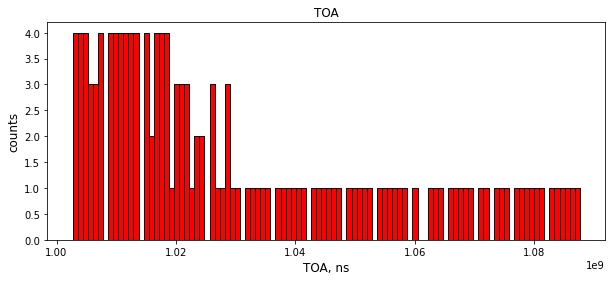

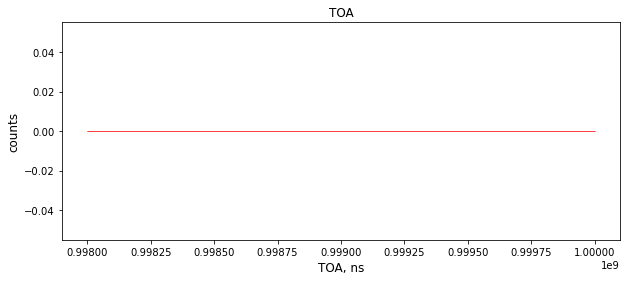

In [167]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R4_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R4_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [168]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt7_R4_ToA_1450_1600_df = Pt7_R4_df.drop(Pt7_R4_df[(Pt7_R4_df['#ToA'] < ToAmin) | (Pt7_R4_df['#ToA'] > ToAmax)].index)

print(Pt7_R4_ToA_1450_1600_df.shape, type(Pt7_R4_ToA_1450_1600_df.iloc[0,0]), Pt7_R4_ToA_1450_1600_df.iloc[:1])

(225, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7729   168   101  164280971520        525             900         NaN


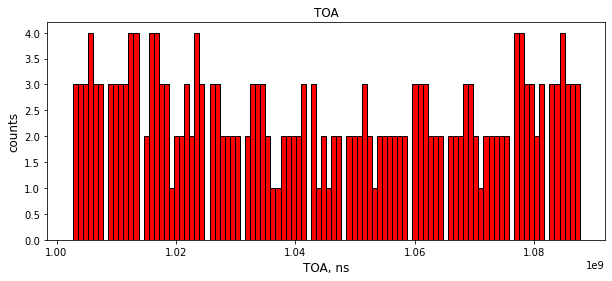

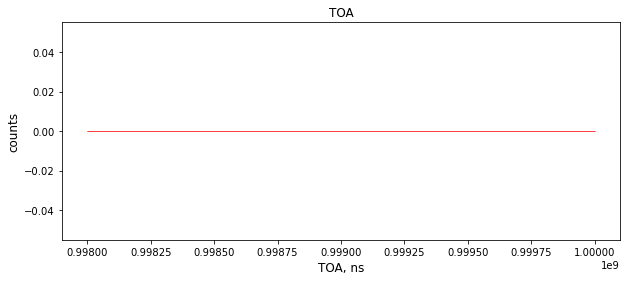

In [169]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R4_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R4_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [170]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt8_R4_ToA_1450_1600_df = Pt8_R4_df.drop(Pt8_R4_df[(Pt8_R4_df['#ToA'] < ToAmin) | (Pt8_R4_df['#ToA'] > ToAmax)].index)

print(Pt8_R4_ToA_1450_1600_df.shape, type(Pt8_R4_ToA_1450_1600_df.iloc[0,0]), Pt8_R4_ToA_1450_1600_df.iloc[:1])

(253, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7696   169   107  164280971008        950            1725         NaN


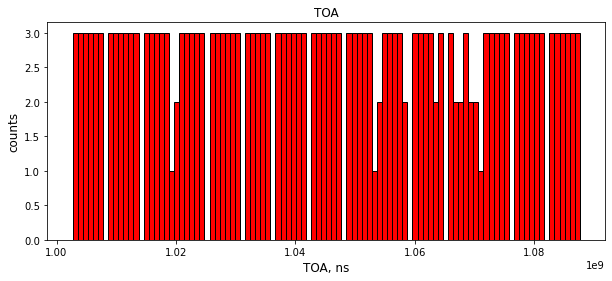

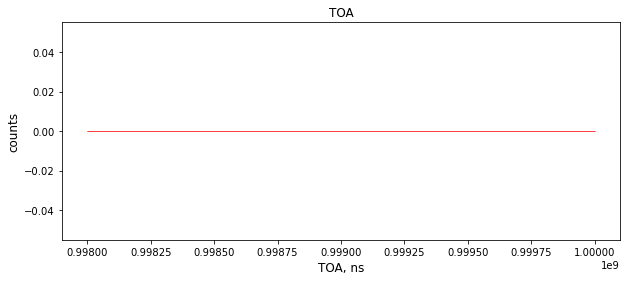

In [171]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R4_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R4_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [172]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt1_R5_ToA_1450_1600_df = Pt1_R5_df.drop(Pt1_R5_df[(Pt1_R5_df['#ToA'] < ToAmin) | (Pt1_R5_df['#ToA'] > ToAmax)].index)

print(Pt1_R5_ToA_1450_1600_df.shape, type(Pt1_R5_ToA_1450_1600_df.iloc[0,0]), Pt1_R5_ToA_1450_1600_df.iloc[:1])

(136, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7614   173    68  164280970240       1575            2800         NaN


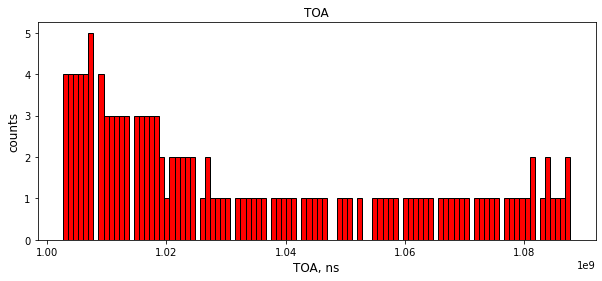

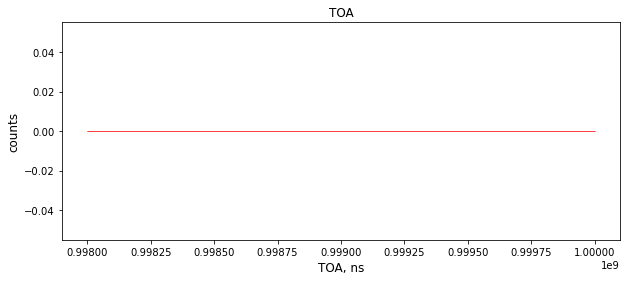

In [173]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R5_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R5_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [174]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt2_R5_ToA_1450_1600_df = Pt2_R5_df.drop(Pt2_R5_df[(Pt2_R5_df['#ToA'] < ToAmin) | (Pt2_R5_df['#ToA'] > ToAmax)].index)

print(Pt2_R5_ToA_1450_1600_df.shape, type(Pt2_R5_ToA_1450_1600_df.iloc[0,0]), Pt2_R5_ToA_1450_1600_df.iloc[:1])

(87, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7662   173    74  164280970752        975            1500         NaN


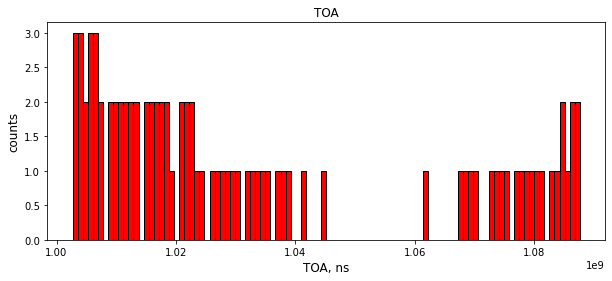

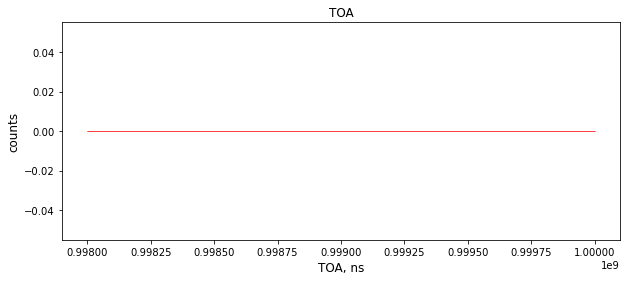

In [175]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R5_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R5_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [176]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt3_R5_ToA_1450_1600_df = Pt3_R5_df.drop(Pt3_R5_df[(Pt3_R5_df['#ToA'] < ToAmin) | (Pt3_R5_df['#ToA'] > ToAmax)].index)

print(Pt3_R5_ToA_1450_1600_df.shape, type(Pt3_R5_ToA_1450_1600_df.iloc[0,0]), Pt3_R5_ToA_1450_1600_df.iloc[:1])

(66, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7714   173    79  164280971264        650             900         NaN


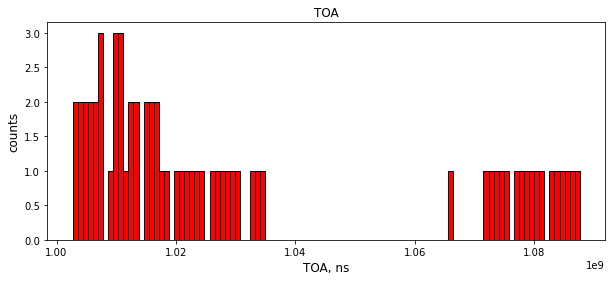

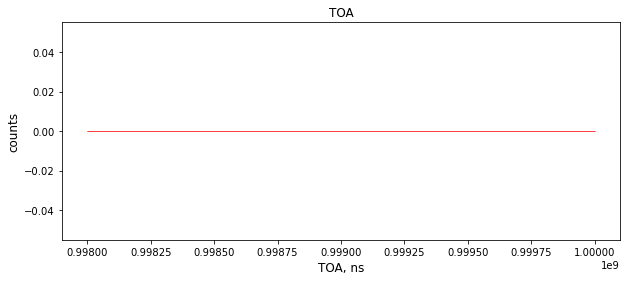

In [177]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R5_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R5_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [178]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt4_R5_ToA_1450_1600_df = Pt4_R5_df.drop(Pt4_R5_df[(Pt4_R5_df['#ToA'] < ToAmin) | (Pt4_R5_df['#ToA'] > ToAmax)].index)

print(Pt4_R5_ToA_1450_1600_df.shape, type(Pt4_R5_ToA_1450_1600_df.iloc[0,0]), Pt4_R5_ToA_1450_1600_df.iloc[:1])

(181, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7720   173    85  164280971264        650            1050         NaN


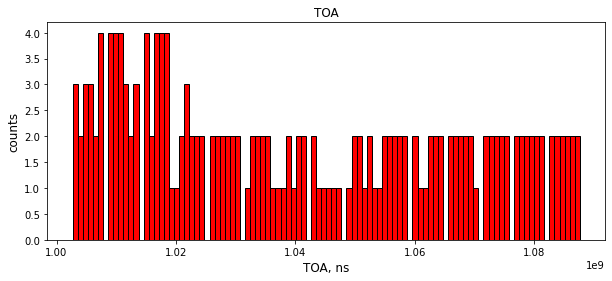

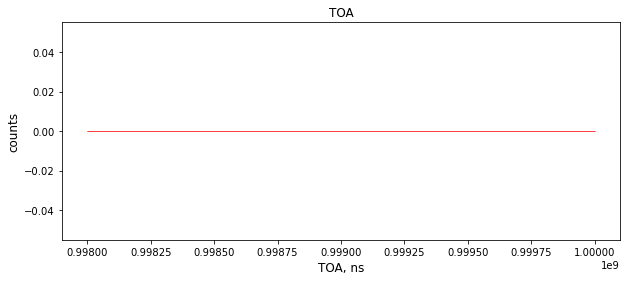

In [179]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R5_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R5_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [180]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt5_R5_ToA_1450_1600_df = Pt5_R5_df.drop(Pt5_R5_df[(Pt5_R5_df['#ToA'] < ToAmin) | (Pt5_R5_df['#ToA'] > ToAmax)].index)

print(Pt5_R5_ToA_1450_1600_df.shape, type(Pt5_R5_ToA_1450_1600_df.iloc[0,0]), Pt5_R5_ToA_1450_1600_df.iloc[:1])

(111, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7736   173    90  164280971776        425             625         NaN


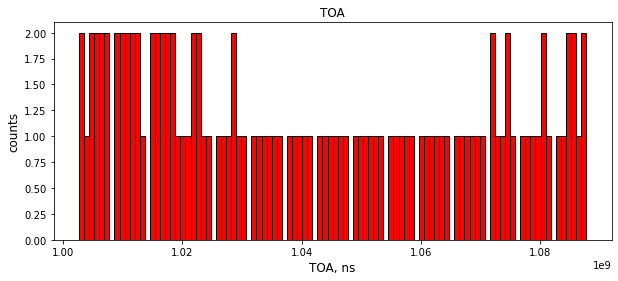

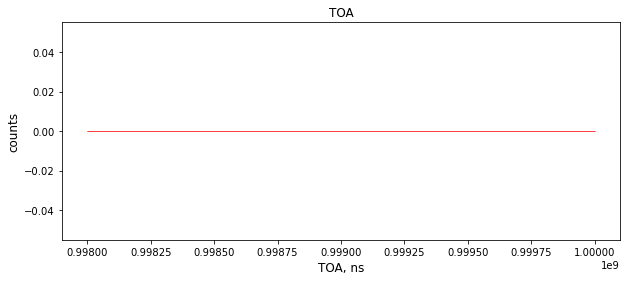

In [181]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R5_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R5_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [182]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt6_R5_ToA_1450_1600_df = Pt6_R5_df.drop(Pt6_R5_df[(Pt6_R5_df['#ToA'] < ToAmin) | (Pt6_R5_df['#ToA'] > ToAmax)].index)

print(Pt6_R5_ToA_1450_1600_df.shape, type(Pt6_R5_ToA_1450_1600_df.iloc[0,0]), Pt6_R5_ToA_1450_1600_df.iloc[:1])

(148, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7707   173    96  164280971264        750            1950         NaN


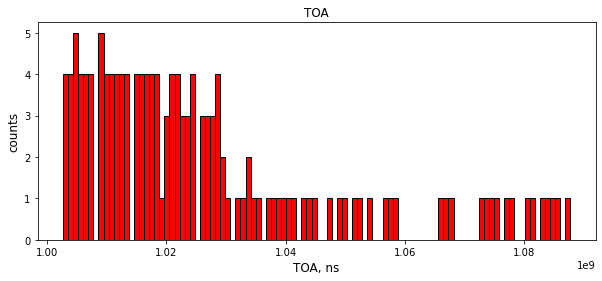

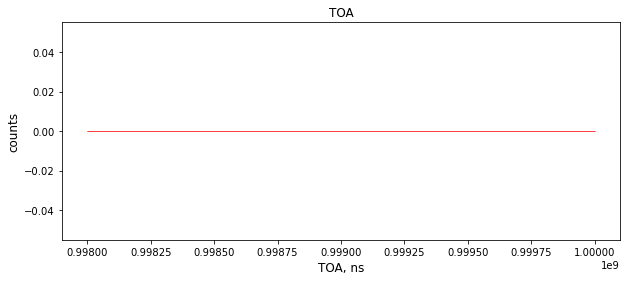

In [183]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R5_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R5_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [184]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt7_R5_ToA_1450_1600_df = Pt7_R5_df.drop(Pt7_R5_df[(Pt7_R5_df['#ToA'] < ToAmin) | (Pt7_R5_df['#ToA'] > ToAmax)].index)

print(Pt7_R5_ToA_1450_1600_df.shape, type(Pt7_R5_ToA_1450_1600_df.iloc[0,0]), Pt7_R5_ToA_1450_1600_df.iloc[:1])

(219, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7635   173   101  164280971008        850            2225         NaN


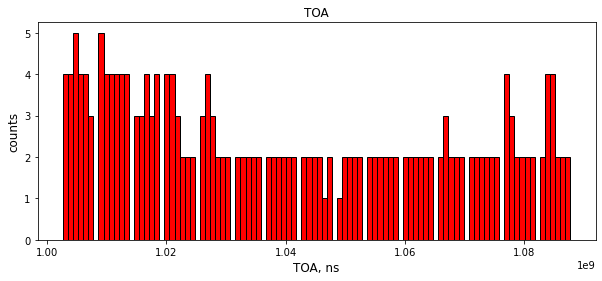

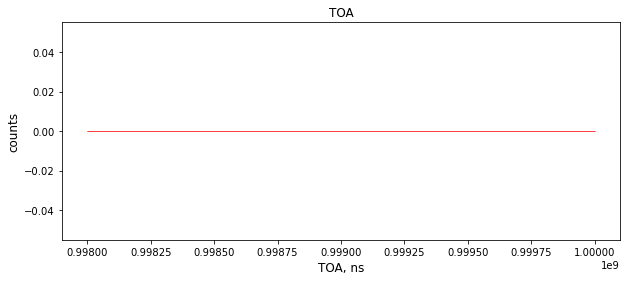

In [185]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R5_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R5_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [186]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt8_R5_ToA_1450_1600_df = Pt8_R5_df.drop(Pt8_R5_df[(Pt8_R5_df['#ToA'] < ToAmin) | (Pt8_R5_df['#ToA'] > ToAmax)].index)

print(Pt8_R5_ToA_1450_1600_df.shape, type(Pt8_R5_ToA_1450_1600_df.iloc[0,0]), Pt8_R5_ToA_1450_1600_df.iloc[:1])

(184, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7623   174   107  164280970496       1225            2100         NaN


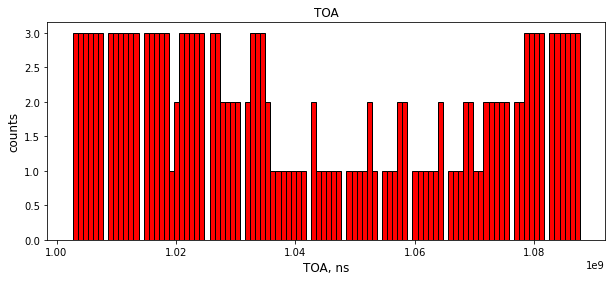

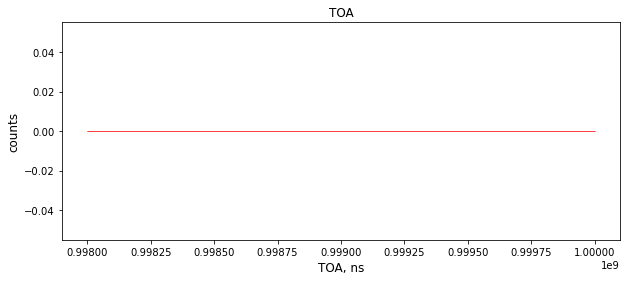

In [187]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R5_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R5_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [188]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt1_R6_ToA_1450_1600_df = Pt1_R6_df.drop(Pt1_R6_df[(Pt1_R6_df['#ToA'] < ToAmin) | (Pt1_R6_df['#ToA'] > ToAmax)].index)

print(Pt1_R6_ToA_1450_1600_df.shape, type(Pt1_R6_ToA_1450_1600_df.iloc[0,0]), Pt1_R6_ToA_1450_1600_df.iloc[:1])

(150, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7779   178    68  164280973056        300             300         NaN


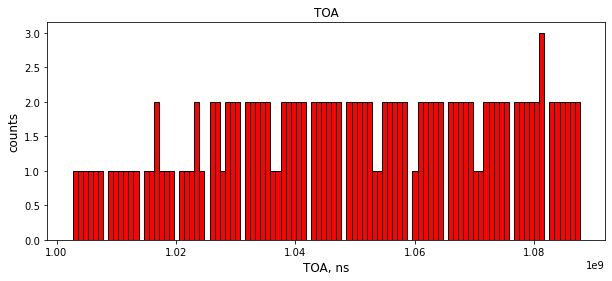

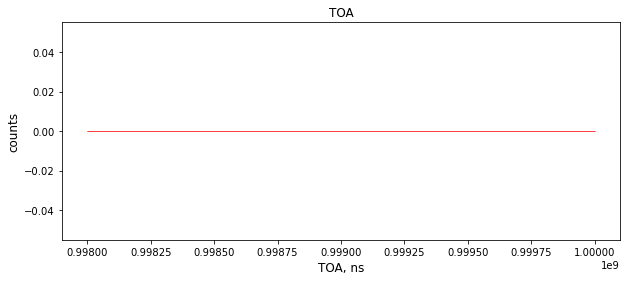

In [189]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R6_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R6_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot

In [190]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt2_R6_ToA_1450_1600_df = Pt2_R6_df.drop(Pt2_R6_df[(Pt2_R6_df['#ToA'] < ToAmin) | (Pt2_R6_df['#ToA'] > ToAmax)].index)

print(Pt2_R6_ToA_1450_1600_df.shape)
# , type(Pt2_R6_ToA_1450_1600_df.iloc[0,0]), Pt2_R6_ToA_1450_1600_df.iloc[:1]

(100, 6)


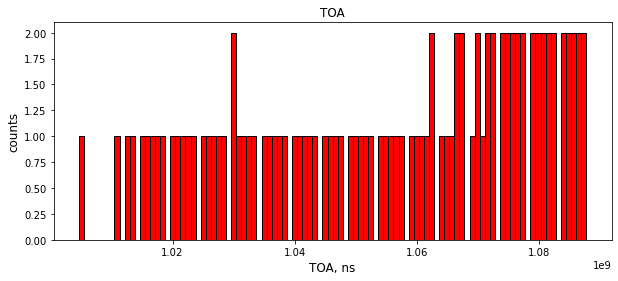

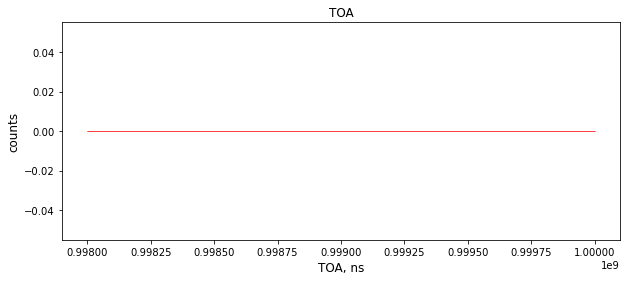

In [191]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R6_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R6_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [192]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt3_R6_ToA_1450_1600_df = Pt3_R6_df.drop(Pt3_R6_df[(Pt3_R6_df['#ToA'] < ToAmin) | (Pt3_R6_df['#ToA'] > ToAmax)].index)

print(Pt3_R6_ToA_1450_1600_df.shape, type(Pt3_R6_ToA_1450_1600_df.iloc[0,0]), Pt3_R6_ToA_1450_1600_df.iloc[:1])

(83, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7791   178    79  164280988672         25              25         NaN


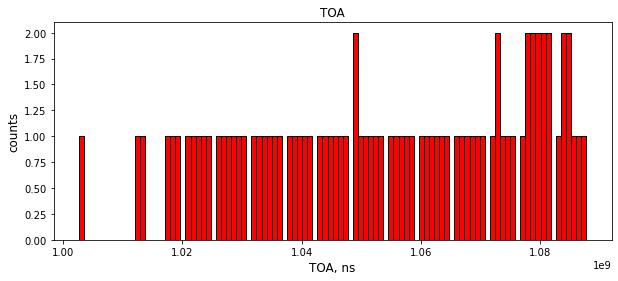

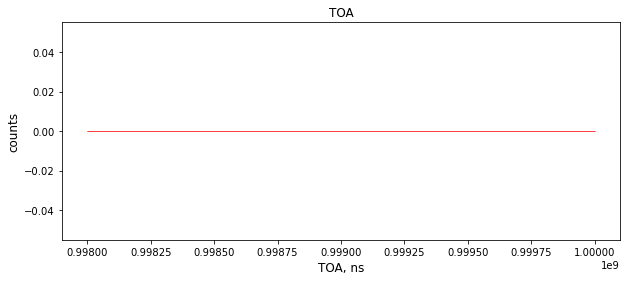

In [193]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R6_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R6_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot (second one)

In [194]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt4_R6_ToA_1450_1600_df = Pt4_R6_df.drop(Pt4_R6_df[(Pt4_R6_df['#ToA'] < ToAmin) | (Pt4_R6_df['#ToA'] > ToAmax)].index)

print(Pt4_R6_ToA_1450_1600_df.shape)

(244, 6)


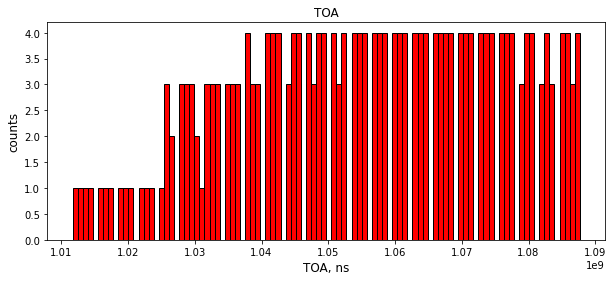

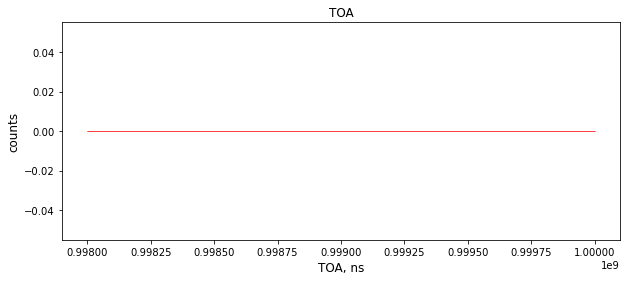

In [195]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R6_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R6_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot (third one)

In [196]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt5_R6_ToA_1450_1600_df = Pt5_R6_df.drop(Pt5_R6_df[(Pt5_R6_df['#ToA'] < ToAmin) | (Pt5_R6_df['#ToA'] > ToAmax)].index)

print(Pt5_R6_ToA_1450_1600_df.shape)

(176, 6)


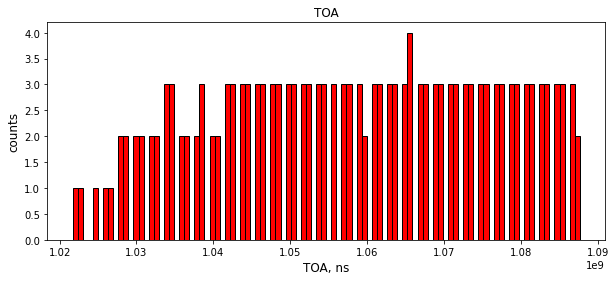

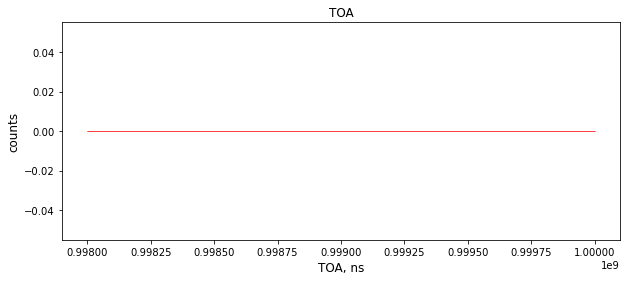

In [197]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R6_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R6_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot (fourth one)

In [198]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt6_R6_ToA_1450_1600_df = Pt6_R6_df.drop(Pt6_R6_df[(Pt6_R6_df['#ToA'] < ToAmin) | (Pt6_R6_df['#ToA'] > ToAmax)].index)

print(Pt6_R6_ToA_1450_1600_df.shape)

(237, 6)


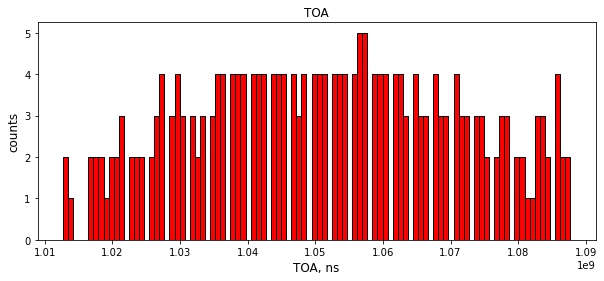

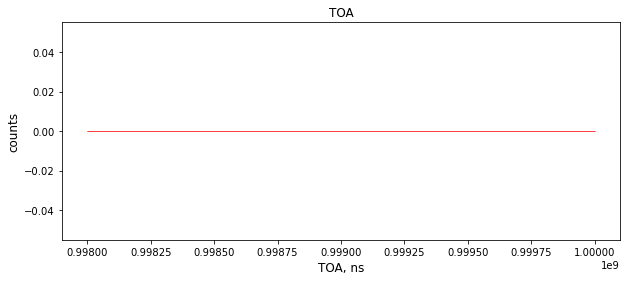

In [199]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R6_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R6_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot (fifth one)

In [200]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt7_R6_ToA_1450_1600_df = Pt7_R6_df.drop(Pt7_R6_df[(Pt7_R6_df['#ToA'] < ToAmin) | (Pt7_R6_df['#ToA'] > ToAmax)].index)

print(Pt7_R6_ToA_1450_1600_df.shape)

(255, 6)


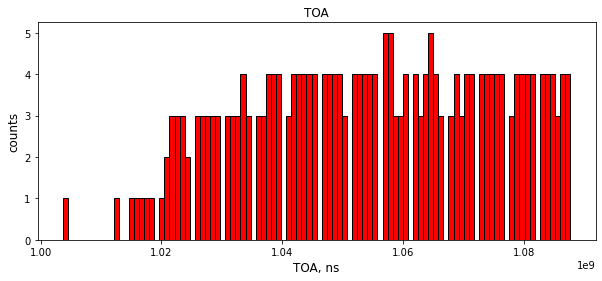

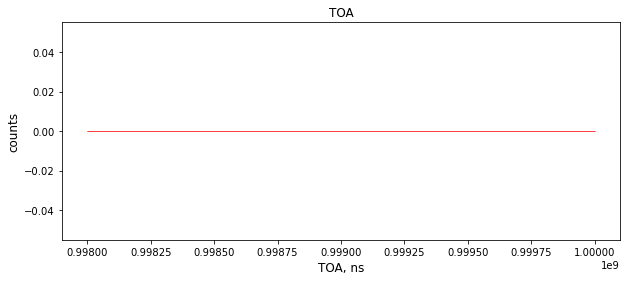

In [201]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R6_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R6_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [202]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt8_R6_ToA_1450_1600_df = Pt8_R6_df.drop(Pt8_R6_df[(Pt8_R6_df['#ToA'] < ToAmin) | (Pt8_R6_df['#ToA'] > ToAmax)].index)

print(Pt8_R6_ToA_1450_1600_df.shape, type(Pt8_R6_ToA_1450_1600_df.iloc[0,0]), Pt8_R6_ToA_1450_1600_df.iloc[:1])

(227, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7786   179   107  164280974848        200             200         NaN


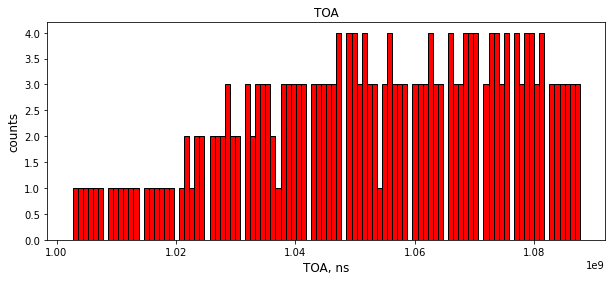

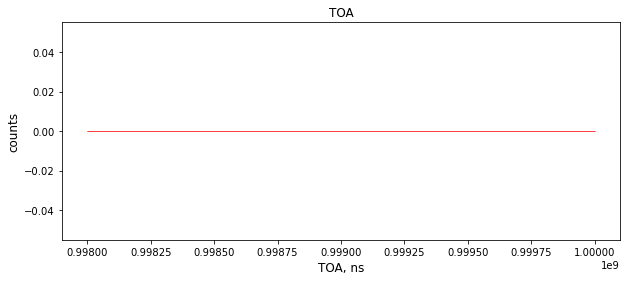

In [203]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R6_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R6_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [204]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt1_R7_ToA_1450_1600_df = Pt1_R7_df.drop(Pt1_R7_df[(Pt1_R7_df['#ToA'] < ToAmin) | (Pt1_R7_df['#ToA'] > ToAmax)].index)

print(Pt1_R7_ToA_1450_1600_df.shape, type(Pt1_R7_ToA_1450_1600_df.iloc[0,0]), Pt1_R7_ToA_1450_1600_df.iloc[:1])

(146, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7631   183    68  164280970496       1325            1850         NaN


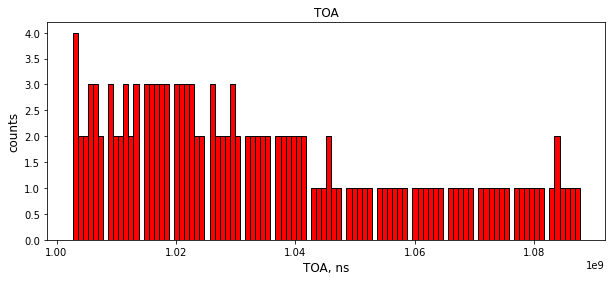

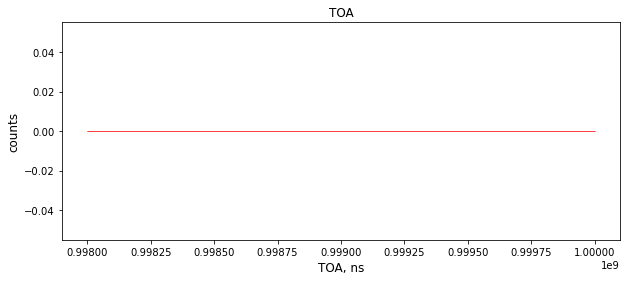

In [205]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R7_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R7_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [206]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt2_R7_ToA_1450_1600_df = Pt2_R7_df.drop(Pt2_R7_df[(Pt2_R7_df['#ToA'] < ToAmin) | (Pt2_R7_df['#ToA'] > ToAmax)].index)

print(Pt2_R7_ToA_1450_1600_df.shape, type(Pt2_R7_ToA_1450_1600_df.iloc[0,0]), Pt2_R7_ToA_1450_1600_df.iloc[:1])

(128, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7727   183    74  164280971520        850            1175         NaN


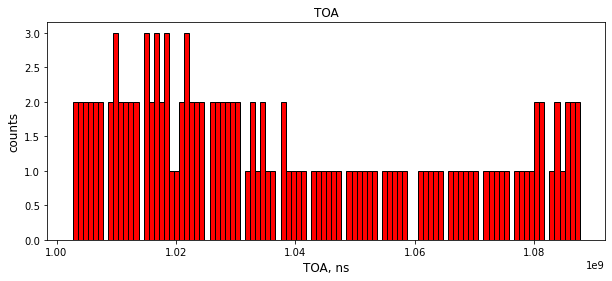

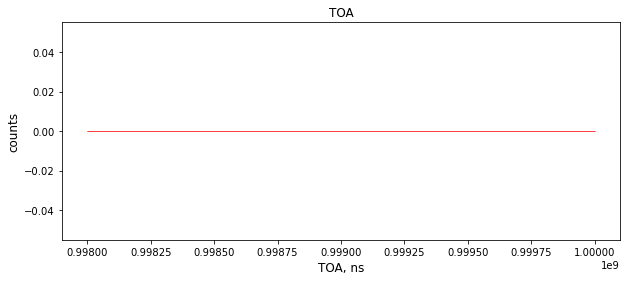

In [207]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R7_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R7_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [208]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt3_R7_ToA_1450_1600_df = Pt3_R7_df.drop(Pt3_R7_df[(Pt3_R7_df['#ToA'] < ToAmin) | (Pt3_R7_df['#ToA'] > ToAmax)].index)

print(Pt3_R7_ToA_1450_1600_df.shape, type(Pt3_R7_ToA_1450_1600_df.iloc[0,0]), Pt3_R7_ToA_1450_1600_df.iloc[:1])

(119, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7738   183    79  164280971776        625             800         NaN


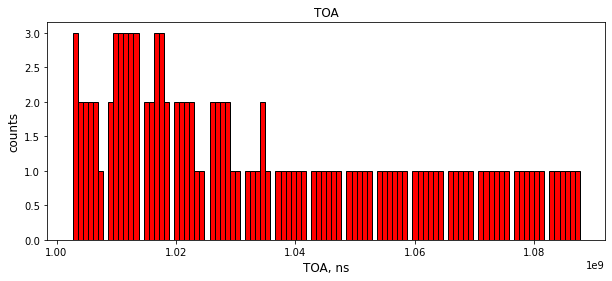

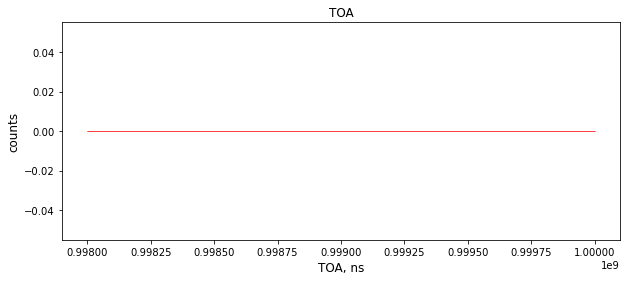

In [209]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R7_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R7_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [210]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt4_R7_ToA_1450_1600_df = Pt4_R7_df.drop(Pt4_R7_df[(Pt4_R7_df['#ToA'] < ToAmin) | (Pt4_R7_df['#ToA'] > ToAmax)].index)

print(Pt4_R7_ToA_1450_1600_df.shape, type(Pt4_R7_ToA_1450_1600_df.iloc[0,0]), Pt4_R7_ToA_1450_1600_df.iloc[:1])

(311, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7759   183    85  164280972032        425             825         NaN


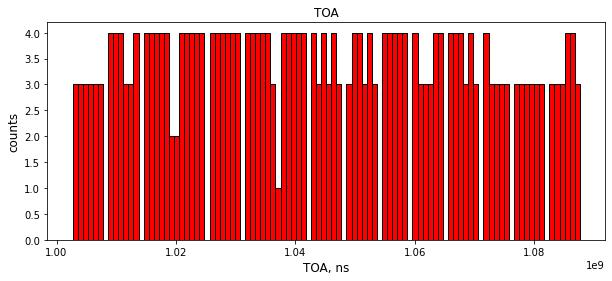

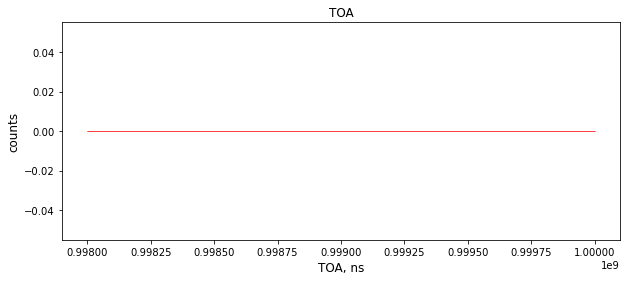

In [211]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R7_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R7_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [212]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt5_R7_ToA_1450_1600_df = Pt5_R7_df.drop(Pt5_R7_df[(Pt5_R7_df['#ToA'] < ToAmin) | (Pt5_R7_df['#ToA'] > ToAmax)].index)

print(Pt5_R7_ToA_1450_1600_df.shape, type(Pt5_R7_ToA_1450_1600_df.iloc[0,0]), Pt5_R7_ToA_1450_1600_df.iloc[:1])

(177, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7784   183    90  164280974080        250             425         NaN


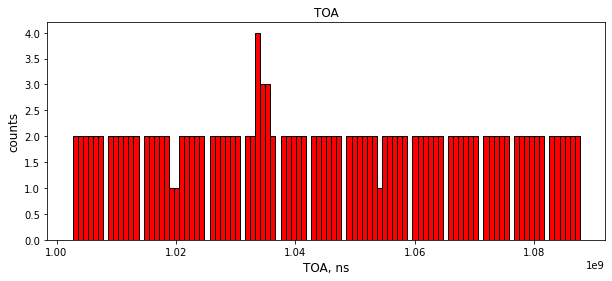

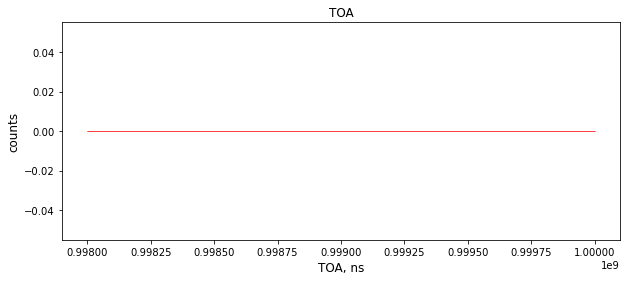

In [213]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R7_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R7_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [214]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt6_R7_ToA_1450_1600_df = Pt6_R7_df.drop(Pt6_R7_df[(Pt6_R7_df['#ToA'] < ToAmin) | (Pt6_R7_df['#ToA'] > ToAmax)].index)

print(Pt6_R7_ToA_1450_1600_df.shape, type(Pt6_R7_ToA_1450_1600_df.iloc[0,0]), Pt6_R7_ToA_1450_1600_df.iloc[:1])

(245, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7690   184   100  164280983552         75            1425         NaN


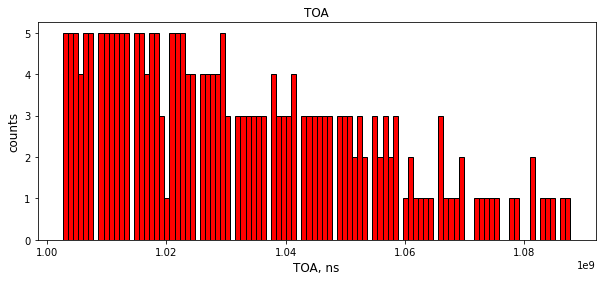

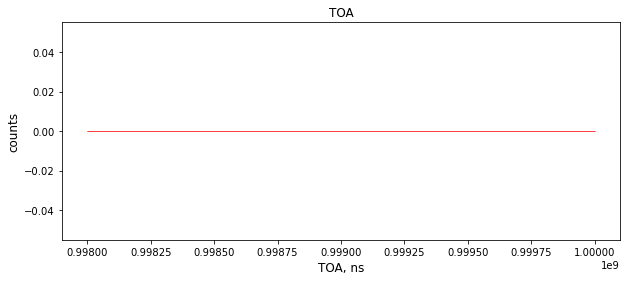

In [215]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R7_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R7_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [216]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt7_R7_ToA_1450_1600_df = Pt7_R7_df.drop(Pt7_R7_df[(Pt7_R7_df['#ToA'] < ToAmin) | (Pt7_R7_df['#ToA'] > ToAmax)].index)

print(Pt7_R7_ToA_1450_1600_df.shape, type(Pt7_R7_ToA_1450_1600_df.iloc[0,0]), Pt7_R7_ToA_1450_1600_df.iloc[:1])

(281, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7687   184   101  164280971008        650            1425         NaN


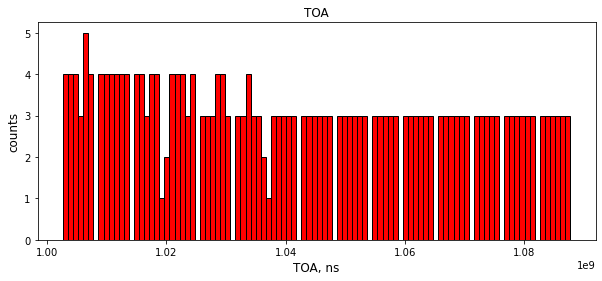

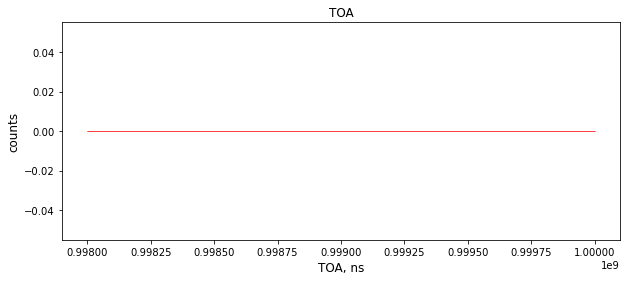

In [217]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R7_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R7_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [218]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt8_R7_ToA_1450_1600_df = Pt8_R7_df.drop(Pt8_R7_df[(Pt8_R7_df['#ToA'] < ToAmin) | (Pt8_R7_df['#ToA'] > ToAmax)].index)

print(Pt8_R7_ToA_1450_1600_df.shape, type(Pt8_R7_ToA_1450_1600_df.iloc[0,0]), Pt8_R7_ToA_1450_1600_df.iloc[:1])

(257, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7643   184   107  164280970752       1325            2125         NaN


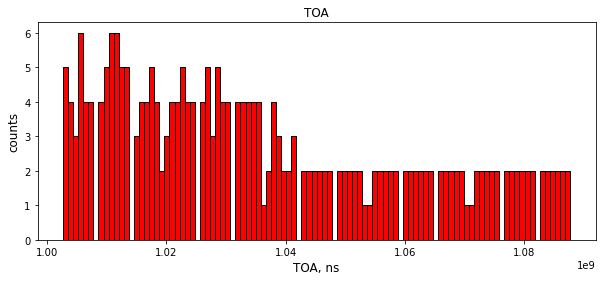

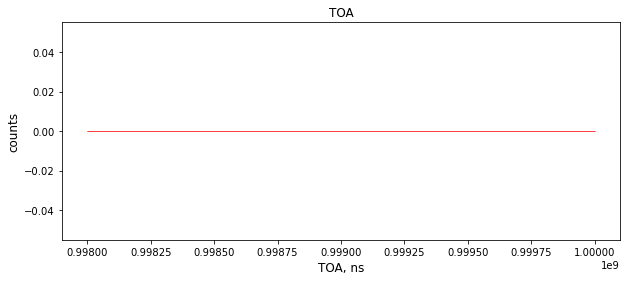

In [219]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R7_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R7_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [220]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt1_R8_ToA_1450_1600_df = Pt1_R8_df.drop(Pt1_R8_df[(Pt1_R8_df['#ToA'] < ToAmin) | (Pt1_R8_df['#ToA'] > ToAmax)].index)

print(Pt1_R8_ToA_1450_1600_df.shape, type(Pt1_R8_ToA_1450_1600_df.iloc[0,0]), Pt1_R8_ToA_1450_1600_df.iloc[:1])

(111, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7694   188    68  164280971008        975            1250         NaN


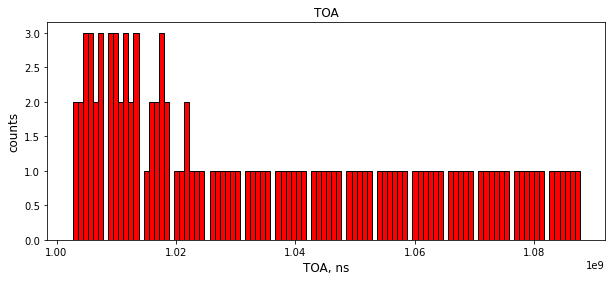

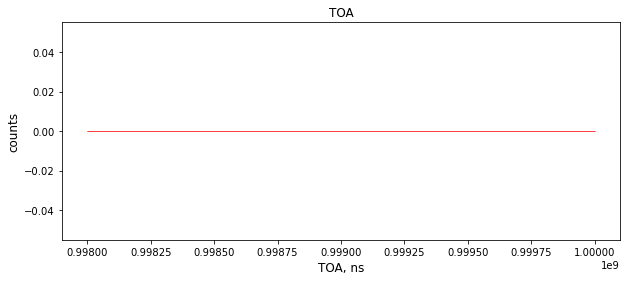

In [221]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R8_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R8_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [222]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt2_R8_ToA_1450_1600_df = Pt2_R8_df.drop(Pt2_R8_df[(Pt2_R8_df['#ToA'] < ToAmin) | (Pt2_R8_df['#ToA'] > ToAmax)].index)

print(Pt2_R8_ToA_1450_1600_df.shape, type(Pt2_R8_ToA_1450_1600_df.iloc[0,0]), Pt2_R8_ToA_1450_1600_df.iloc[:1])

(99, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7766   188    74  164280972032        475             900         NaN


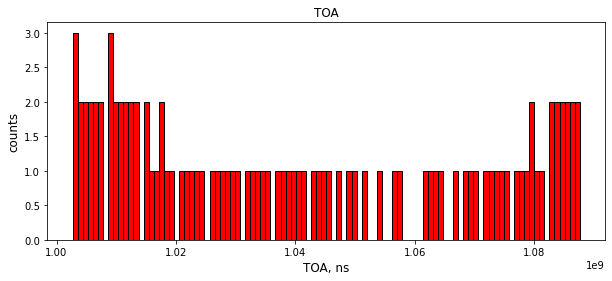

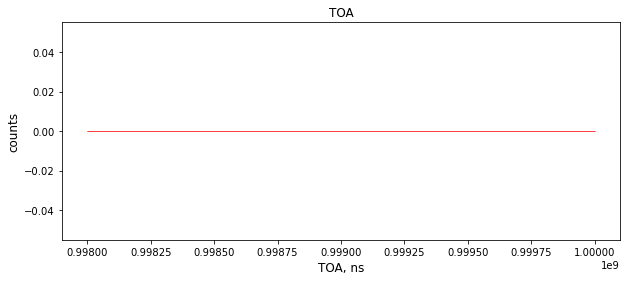

In [223]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R8_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R8_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [224]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt3_R8_ToA_1450_1600_df = Pt3_R8_df.drop(Pt3_R8_df[(Pt3_R8_df['#ToA'] < ToAmin) | (Pt3_R8_df['#ToA'] > ToAmax)].index)

print(Pt3_R8_ToA_1450_1600_df.shape, type(Pt3_R8_ToA_1450_1600_df.iloc[0,0]), Pt3_R8_ToA_1450_1600_df.iloc[:1])

(88, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7777   188    79  164280972800        375             500         NaN


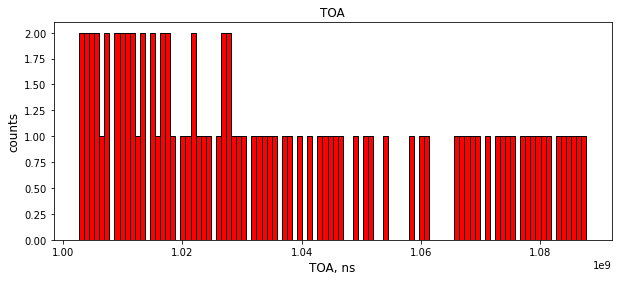

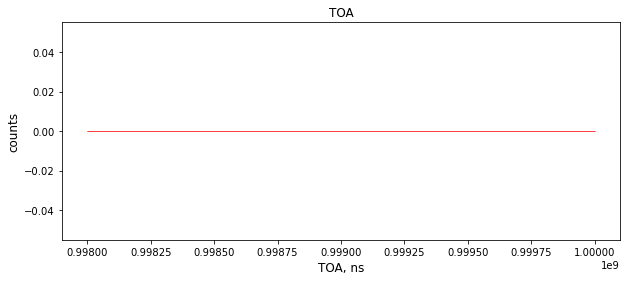

In [225]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R8_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R8_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [226]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt4_R8_ToA_1450_1600_df = Pt4_R8_df.drop(Pt4_R8_df[(Pt4_R8_df['#ToA'] < ToAmin) | (Pt4_R8_df['#ToA'] > ToAmax)].index)

print(Pt4_R8_ToA_1450_1600_df.shape, type(Pt4_R8_ToA_1450_1600_df.iloc[0,0]), Pt4_R8_ToA_1450_1600_df.iloc[:1])

(264, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7781   188    85  164280973312        300             500         NaN


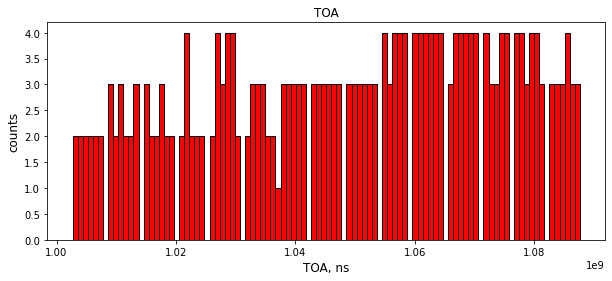

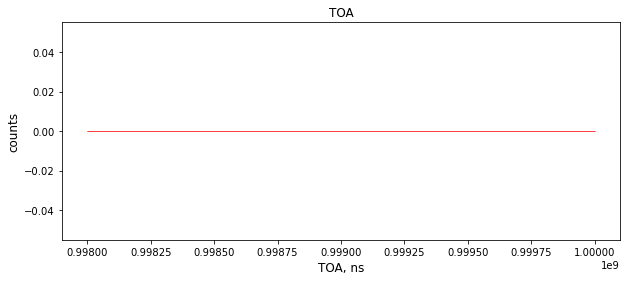

In [227]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R8_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R8_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [228]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt5_R8_ToA_1450_1600_df = Pt5_R8_df.drop(Pt5_R8_df[(Pt5_R8_df['#ToA'] < ToAmin) | (Pt5_R8_df['#ToA'] > ToAmax)].index)

print(Pt5_R8_ToA_1450_1600_df.shape, type(Pt5_R8_ToA_1450_1600_df.iloc[0,0]), Pt5_R8_ToA_1450_1600_df.iloc[:1])

(136, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7788   189    90  164280980224        175             175         NaN


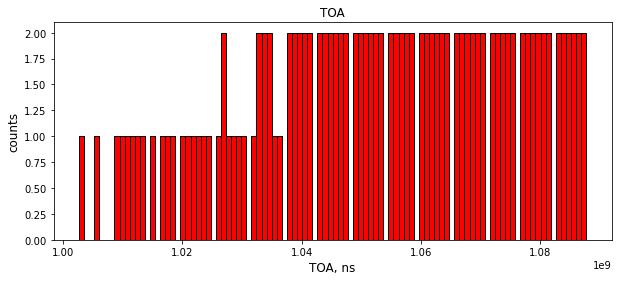

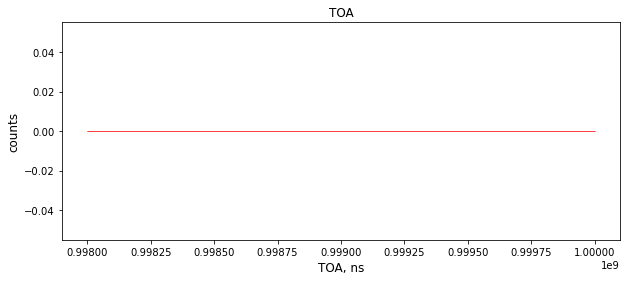

In [229]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R8_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R8_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [230]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt6_R8_ToA_1450_1600_df = Pt6_R8_df.drop(Pt6_R8_df[(Pt6_R8_df['#ToA'] < ToAmin) | (Pt6_R8_df['#ToA'] > ToAmax)].index)

print(Pt6_R8_ToA_1450_1600_df.shape, type(Pt6_R8_ToA_1450_1600_df.iloc[0,0]), Pt6_R8_ToA_1450_1600_df.iloc[:1])

(137, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7726   189   100  164280977664        125             975         NaN


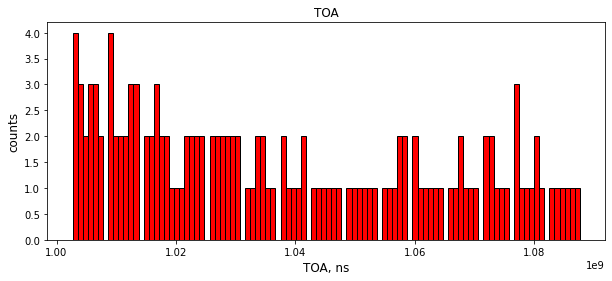

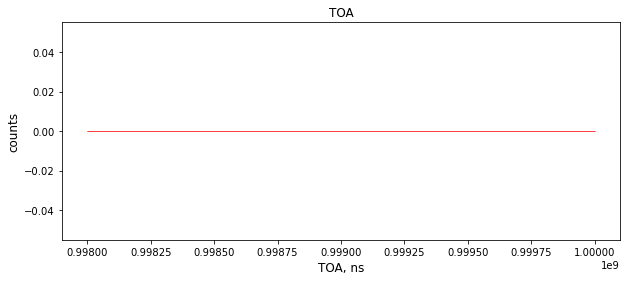

In [231]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R8_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R8_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [232]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt7_R8_ToA_1450_1600_df = Pt7_R8_df.drop(Pt7_R8_df[(Pt7_R8_df['#ToA'] < ToAmin) | (Pt7_R8_df['#ToA'] > ToAmax)].index)

print(Pt7_R8_ToA_1450_1600_df.shape, type(Pt7_R8_ToA_1450_1600_df.iloc[0,0]), Pt7_R8_ToA_1450_1600_df.iloc[:1])

(196, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7723   189   101  164280971520        475             975         NaN


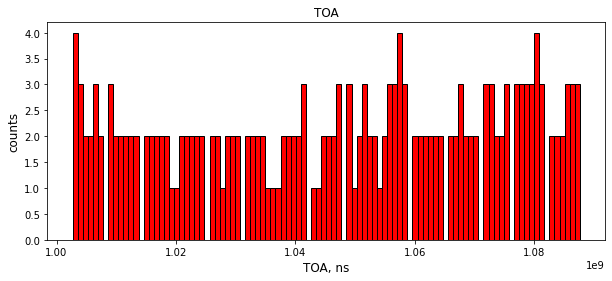

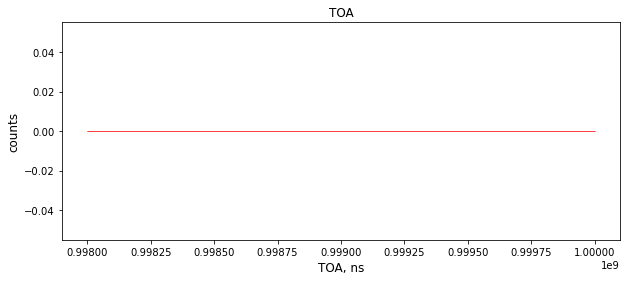

In [233]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R8_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R8_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [234]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
Pt8_R8_ToA_1450_1600_df = Pt8_R8_df.drop(Pt8_R8_df[(Pt8_R8_df['#ToA'] < ToAmin) | (Pt8_R8_df['#ToA'] > ToAmax)].index)

print(Pt8_R8_ToA_1450_1600_df.shape, type(Pt8_R8_ToA_1450_1600_df.iloc[0,0]), Pt8_R8_ToA_1450_1600_df.iloc[:1])

(239, 6) <class 'numpy.int64'>       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
7639   189   107  164280970752       1175            1900         NaN


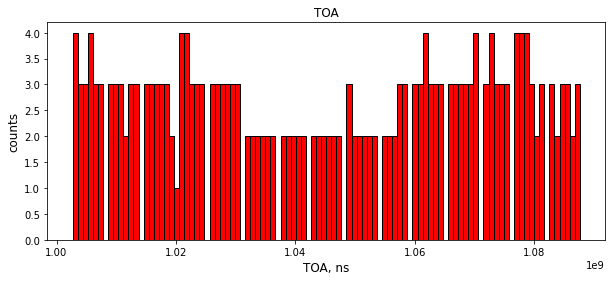

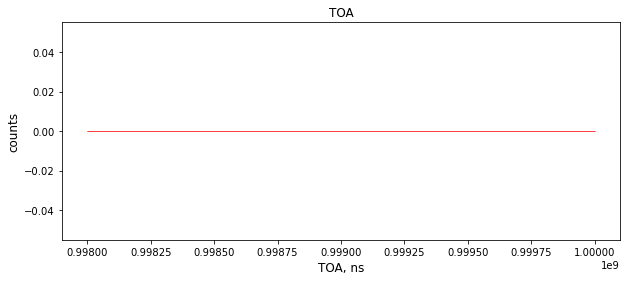

In [235]:
ToAmin = (1.002691450e9)*4096./25.
ToAmax = (1.002691600e9+(1000000*5*17))*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R8_ToA_1450_1600_df['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R8_ToA_1450_1600_df['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [236]:
ToA_all_array_100 = []
ToAtotal_all_array_100 = []
for j in range(1,9):
    for k in range(1,9):
        # Create TOT arrays
        globals()["Pt"+str(j)+"_R"+str(k)+"_TOA_array_100"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_ToA_1450_1600_df"]['#ToA'].to_numpy())
#         globals()["Pt"+str(j)+"_R"+str(k)+"_TOTtotal_array"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy())
        ToA_all_array_100.append((globals()["Pt"+str(j)+"_R"+str(k)+"_ToA_1450_1600_df"]['#ToA'].to_numpy()))
#         ToAtotal_all_array.append((globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy()))

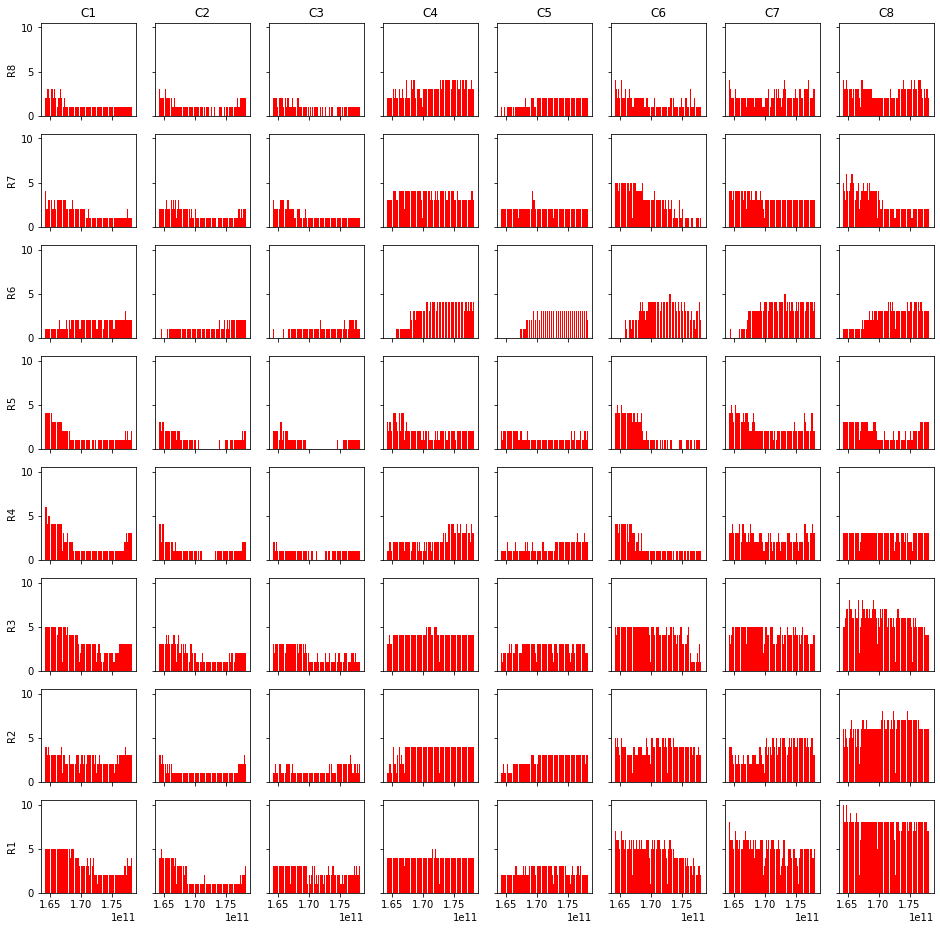

In [237]:
fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8), \
                  (ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16), \
                  (ax17, ax18, ax19, ax20, ax21, ax22, ax23, ax24), \
                  (ax25, ax26, ax27, ax28, ax29, ax30, ax31, ax32), \
                  (ax33, ax34, ax35, ax36, ax37, ax38, ax39, ax40), \
                  (ax41, ax42, ax43, ax44, ax45, ax46, ax47, ax48), \
                  (ax49, ax50, ax51, ax52, ax53, ax54, ax55, ax56), \
                  (ax57, ax58, ax59, ax60, ax61, ax62, ax63, ax64), \
                 )= plt.subplots(nrows = 8, ncols =8, figsize = (16, 16), sharex=True, sharey=True, facecolor='w')
for j in range(1,9):
    for k in range(1,9):
            globals()['ax'+str((64-(j*8))+k)].hist(globals()["Pt"+str(k)+"_R"+str(j)+"_TOA_array_100"], bins = 100, color='r')
#             print('R'+str(j),'C'+str(k),len(globals()["Pt"+str(k)+"_R"+str(j)+"_TOT_array"]))
            if j == 8: globals()['ax'+str((64-(j*8))+k)].set_title("C"+str(k)) 
            if k == 1: globals()['ax'+str((64-(j*8))+k)].set_ylabel("R"+str(j))
fig.savefig('100_1.png', bbox_inches='tight')

In [238]:
ToT_all_array_100 = []
ToTtotal_all_array_100 = []
for j in range(1,9):
    for k in range(1,9):
        # Create TOT arrays
        globals()["Pt"+str(j)+"_R"+str(k)+"_TOT_array_100"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_ToA_1450_1600_df"]['#ToT[arb]'].to_numpy())
#         globals()["Pt"+str(j)+"_R"+str(k)+"_TOTtotal_array"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy())
        ToA_all_array_100.append((globals()["Pt"+str(j)+"_R"+str(k)+"_ToA_1450_1600_df"]['#ToT[arb]'].to_numpy()))
#         ToAtotal_all_array.append((globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy()))

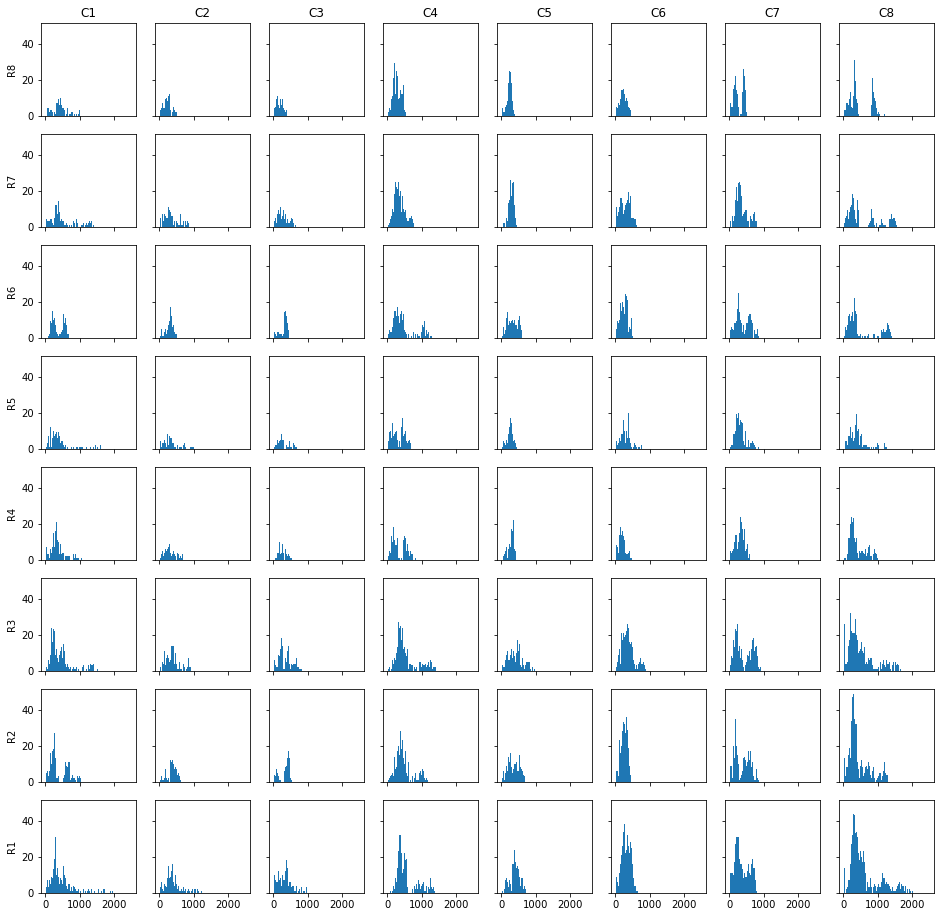

In [641]:
fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8), \
                  (ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16), \
                  (ax17, ax18, ax19, ax20, ax21, ax22, ax23, ax24), \
                  (ax25, ax26, ax27, ax28, ax29, ax30, ax31, ax32), \
                  (ax33, ax34, ax35, ax36, ax37, ax38, ax39, ax40), \
                  (ax41, ax42, ax43, ax44, ax45, ax46, ax47, ax48), \
                  (ax49, ax50, ax51, ax52, ax53, ax54, ax55, ax56), \
                  (ax57, ax58, ax59, ax60, ax61, ax62, ax63, ax64), \
                 )= plt.subplots(nrows = 8, ncols =8, figsize = (16, 16), sharex=True, sharey=True, facecolor='w')
for j in range(1,9):
    for k in range(1,9):
            globals()['ax'+str((64-(j*8))+k)].hist(globals()["Pt"+str(k)+"_R"+str(j)+"_TOT_array_100"], bins = 100, range=(0,2500))
#             print('R'+str(j),'C'+str(k),len(globals()["Pt"+str(k)+"_R"+str(j)+"_TOT_array"]))
            if j == 8: globals()['ax'+str((64-(j*8))+k)].set_title("C"+str(k)) 
            if k == 1: globals()['ax'+str((64-(j*8))+k)].set_ylabel("R"+str(j))
fig.savefig('ToT_100_1.png', bbox_inches='tight')

In [240]:
(1.002691600e9+(1000000*5*17))-(1.002691450e9), 85000150.0*4096./25.

(85000150.0, 13926424576.0)

In [241]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt1_R1_ToA_1450_1600_df_2 = Pt1_R1_df.drop(Pt1_R1_df[(Pt1_R1_df['#ToA'] < ToAmin) | (Pt1_R1_df['#ToA'] > ToAmax)].index)

print(Pt1_R1_ToA_1450_1600_df_2.shape, type(Pt1_R1_ToA_1450_1600_df_2.iloc[0,0]), Pt1_R1_ToA_1450_1600_df_2.iloc[:1])

(413, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21949   153    68  178371108096        675            1300         NaN


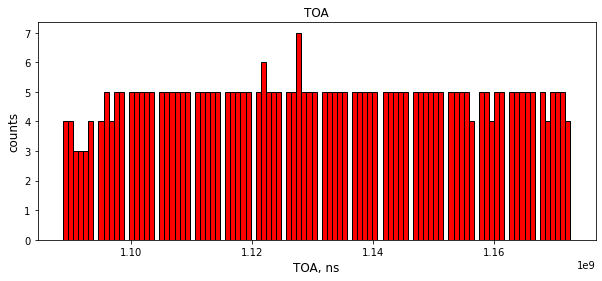

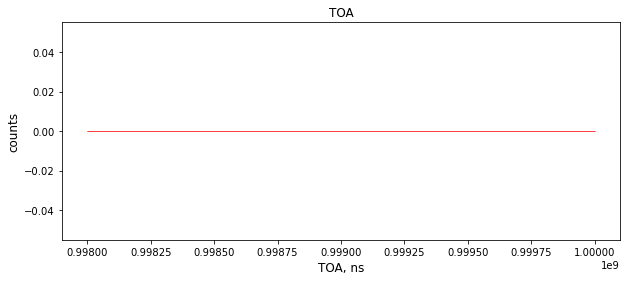

In [242]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R1_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R1_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

In [243]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt2_R1_ToA_1450_1600_df_2 = Pt2_R1_df.drop(Pt2_R1_df[(Pt2_R1_df['#ToA'] < ToAmin) | (Pt2_R1_df['#ToA'] > ToAmax)].index)

print(Pt2_R1_ToA_1450_1600_df_2.shape, type(Pt2_R1_ToA_1450_1600_df_2.iloc[0,0]), Pt2_R1_ToA_1450_1600_df_2.iloc[:1])

(344, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21991   153    74  178371108608        500             800         NaN


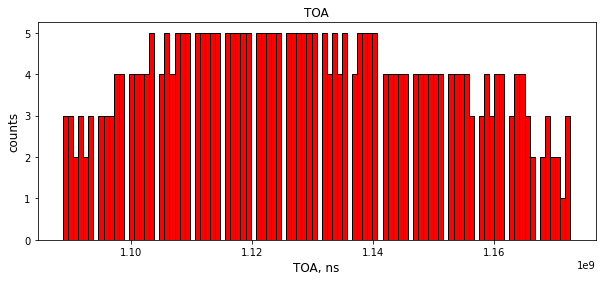

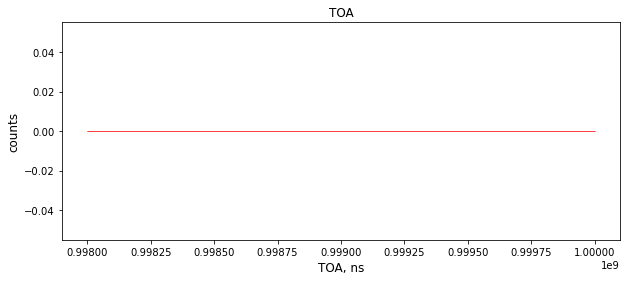

In [244]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R1_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R1_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [245]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt3_R1_ToA_1450_1600_df_2 = Pt3_R1_df.drop(Pt3_R1_df[(Pt3_R1_df['#ToA'] < ToAmin) | (Pt3_R1_df['#ToA'] > ToAmax)].index)

print(Pt3_R1_ToA_1450_1600_df_2.shape, type(Pt3_R1_ToA_1450_1600_df_2.iloc[0,0]), Pt3_R1_ToA_1450_1600_df_2.iloc[:1])

(261, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22002   153    79  178371108864        425             575         NaN


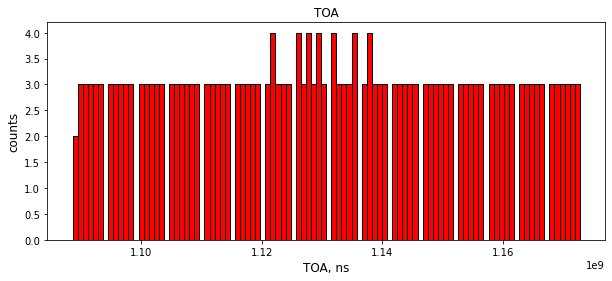

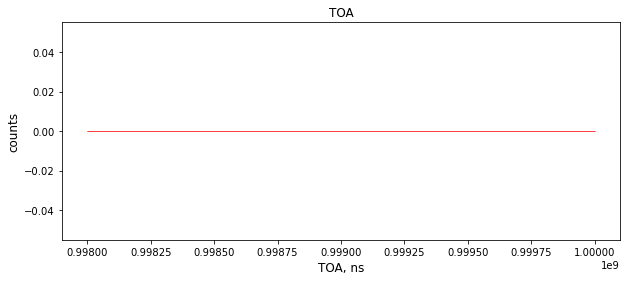

In [246]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R1_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R1_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [247]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt4_R1_ToA_1450_1600_df_2 = Pt4_R1_df.drop(Pt4_R1_df[(Pt4_R1_df['#ToA'] < ToAmin) | (Pt4_R1_df['#ToA'] > ToAmax)].index)

print(Pt4_R1_ToA_1450_1600_df_2.shape, type(Pt4_R1_ToA_1450_1600_df_2.iloc[0,0]), Pt4_R1_ToA_1450_1600_df_2.iloc[:1])

(339, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21927   153    85  178371108096        800            1675         NaN


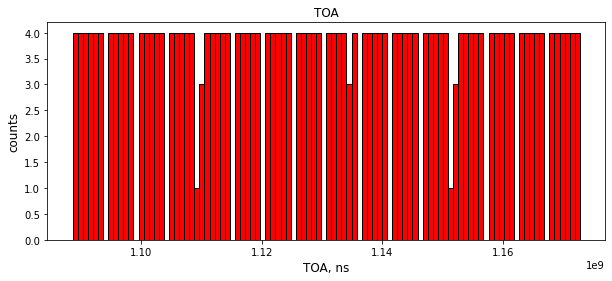

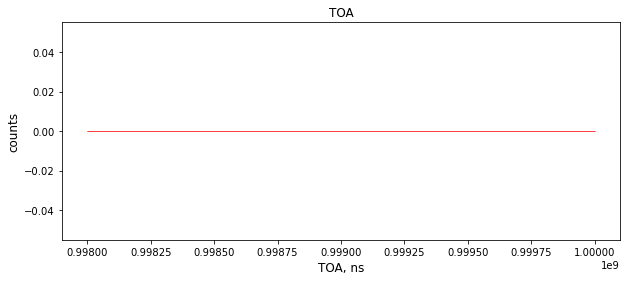

In [248]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R1_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R1_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [249]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt5_R1_ToA_1450_1600_df_2 = Pt5_R1_df.drop(Pt5_R1_df[(Pt5_R1_df['#ToA'] < ToAmin) | (Pt5_R1_df['#ToA'] > ToAmax)].index)

print(Pt5_R1_ToA_1450_1600_df_2.shape, type(Pt5_R1_ToA_1450_1600_df_2.iloc[0,0]), Pt5_R1_ToA_1450_1600_df_2.iloc[:1])

(209, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21969   153    90  178371108608        375             700         NaN


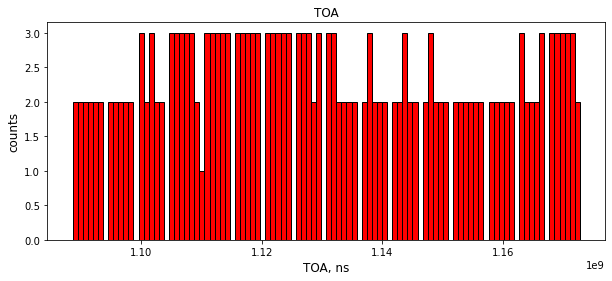

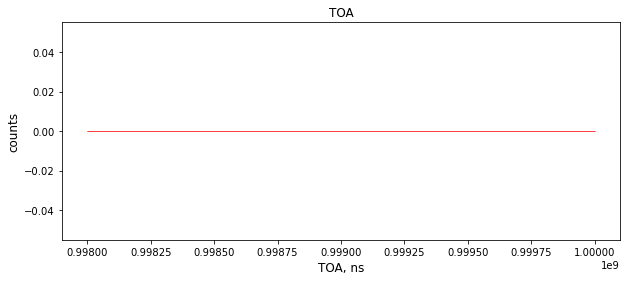

In [250]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R1_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R1_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [251]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt6_R1_ToA_1450_1600_df_2 = Pt6_R1_df.drop(Pt6_R1_df[(Pt6_R1_df['#ToA'] < ToAmin) | (Pt6_R1_df['#ToA'] > ToAmax)].index)

print(Pt6_R1_ToA_1450_1600_df_2.shape, type(Pt6_R1_ToA_1450_1600_df_2.iloc[0,0]), Pt6_R1_ToA_1450_1600_df_2.iloc[:1])

(450, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21903   154   100  178371111680        225            1175         NaN


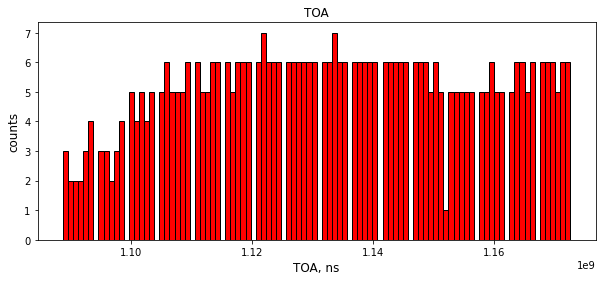

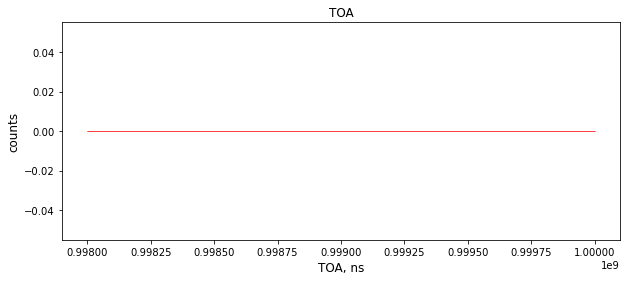

In [252]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R1_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R1_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [253]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt7_R1_ToA_1450_1600_df_2 = Pt7_R1_df.drop(Pt7_R1_df[(Pt7_R1_df['#ToA'] < ToAmin) | (Pt7_R1_df['#ToA'] > ToAmax)].index)

print(Pt7_R1_ToA_1450_1600_df_2.shape, type(Pt7_R1_ToA_1450_1600_df_2.iloc[0,0]), Pt7_R1_ToA_1450_1600_df_2.iloc[:1])

(484, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21901   154   101  178371107840        525            1175         NaN


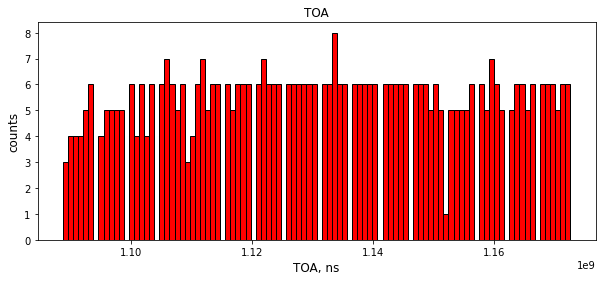

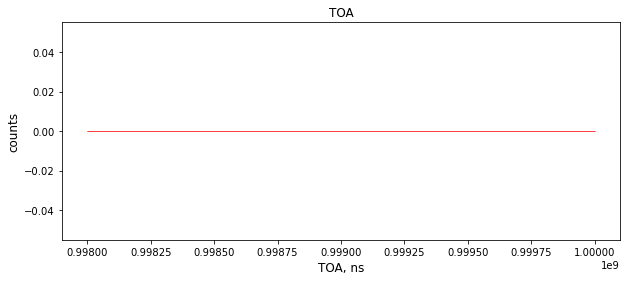

In [254]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R1_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R1_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [255]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt8_R1_ToA_1450_1600_df_2 = Pt8_R1_df.drop(Pt8_R1_df[(Pt8_R1_df['#ToA'] < ToAmin) | (Pt8_R1_df['#ToA'] > ToAmax)].index)

print(Pt8_R1_ToA_1450_1600_df_2.shape, type(Pt8_R1_ToA_1450_1600_df_2.iloc[0,0]), Pt8_R1_ToA_1450_1600_df_2.iloc[:1])

(714, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21891   154   106  178371107328        825            3700         NaN


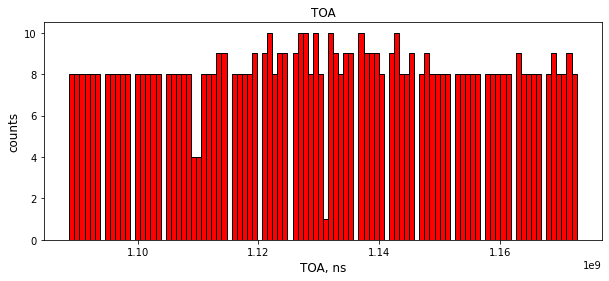

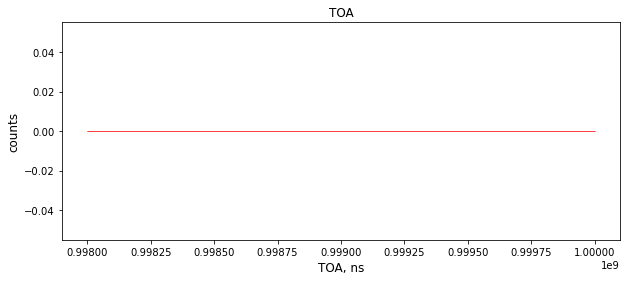

In [256]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R1_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R1_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [257]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt1_R2_ToA_1450_1600_df_2 = Pt1_R2_df.drop(Pt1_R2_df[(Pt1_R2_df['#ToA'] < ToAmin) | (Pt1_R2_df['#ToA'] > ToAmax)].index)

print(Pt1_R2_ToA_1450_1600_df_2.shape, type(Pt1_R2_ToA_1450_1600_df_2.iloc[0,0]), Pt1_R2_ToA_1450_1600_df_2.iloc[:1])

(282, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21931   158    68  178371108096        775            1325         NaN


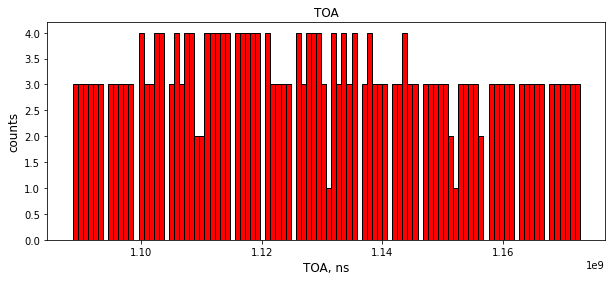

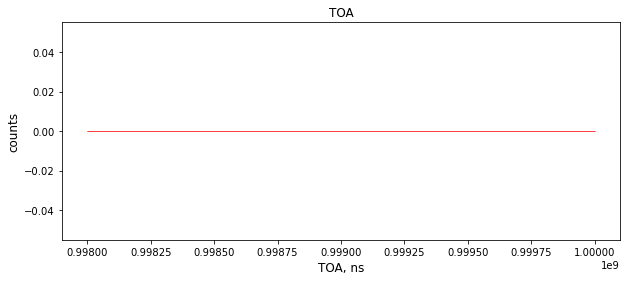

In [258]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R2_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R2_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [259]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt2_R2_ToA_1450_1600_df_2 = Pt2_R2_df.drop(Pt2_R2_df[(Pt2_R2_df['#ToA'] < ToAmin) | (Pt2_R2_df['#ToA'] > ToAmax)].index)

print(Pt2_R2_ToA_1450_1600_df_2.shape, type(Pt2_R2_ToA_1450_1600_df_2.iloc[0,0]), Pt2_R2_ToA_1450_1600_df_2.iloc[:1])

(175, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21994   158    74  178371108608        500             650         NaN


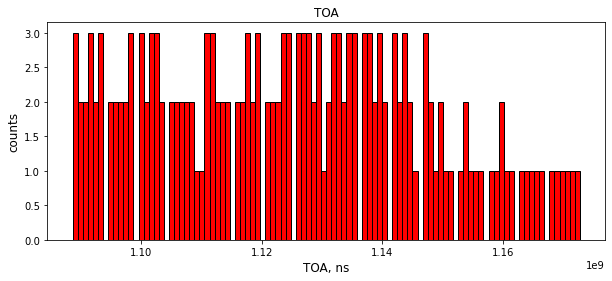

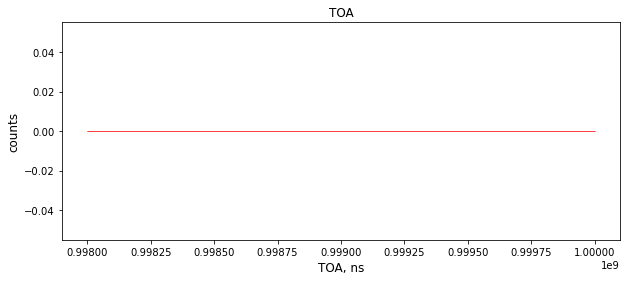

In [260]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R2_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R2_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [261]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt3_R2_ToA_1450_1600_df_2 = Pt3_R2_df.drop(Pt3_R2_df[(Pt3_R2_df['#ToA'] < ToAmin) | (Pt3_R2_df['#ToA'] > ToAmax)].index)

print(Pt3_R2_ToA_1450_1600_df_2.shape, type(Pt3_R2_ToA_1450_1600_df_2.iloc[0,0]), Pt3_R2_ToA_1450_1600_df_2.iloc[:1])

(134, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22000   158    79  178371108864        475             475         NaN


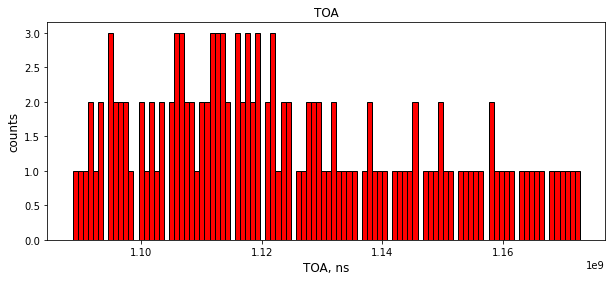

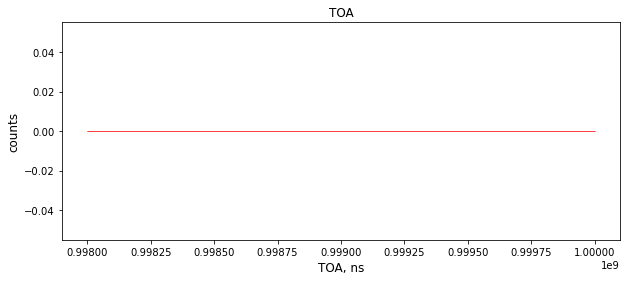

In [262]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R2_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R2_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [263]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt4_R2_ToA_1450_1600_df_2 = Pt4_R2_df.drop(Pt4_R2_df[(Pt4_R2_df['#ToA'] < ToAmin) | (Pt4_R2_df['#ToA'] > ToAmax)].index)

print(Pt4_R2_ToA_1450_1600_df_2.shape, type(Pt4_R2_ToA_1450_1600_df_2.iloc[0,0]), Pt4_R2_ToA_1450_1600_df_2.iloc[:1])

(224, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21914   158    85  178371107840        750            1675         NaN


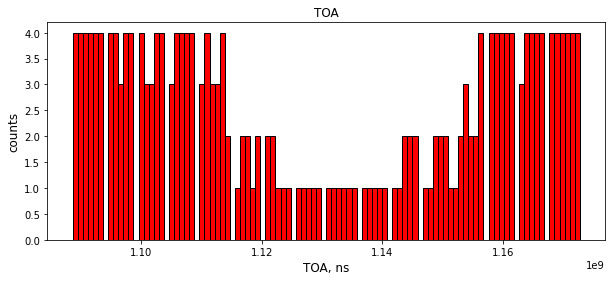

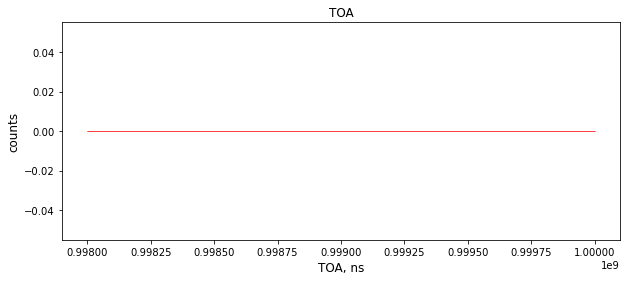

In [264]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R2_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R2_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [265]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt5_R2_ToA_1450_1600_df_2 = Pt5_R2_df.drop(Pt5_R2_df[(Pt5_R2_df['#ToA'] < ToAmin) | (Pt5_R2_df['#ToA'] > ToAmax)].index)

print(Pt5_R2_ToA_1450_1600_df_2.shape, type(Pt5_R2_ToA_1450_1600_df_2.iloc[0,0]), Pt5_R2_ToA_1450_1600_df_2.iloc[:1])

(152, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22008   158    90  178371108864        400             800         NaN


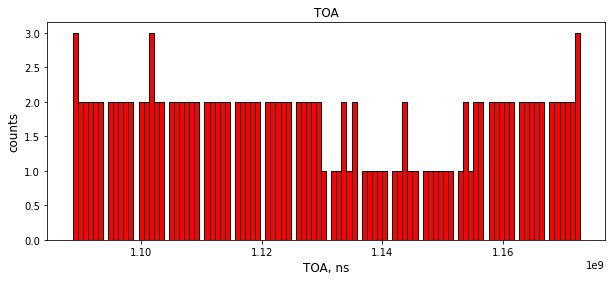

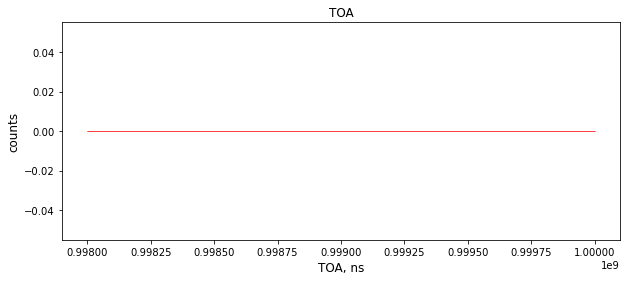

In [266]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R2_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R2_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [267]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt6_R2_ToA_1450_1600_df_2 = Pt6_R2_df.drop(Pt6_R2_df[(Pt6_R2_df['#ToA'] < ToAmin) | (Pt6_R2_df['#ToA'] > ToAmax)].index)

print(Pt6_R2_ToA_1450_1600_df_2.shape, type(Pt6_R2_ToA_1450_1600_df_2.iloc[0,0]), Pt6_R2_ToA_1450_1600_df_2.iloc[:1])

(265, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21922   159   100  178371112192        200            1250         NaN


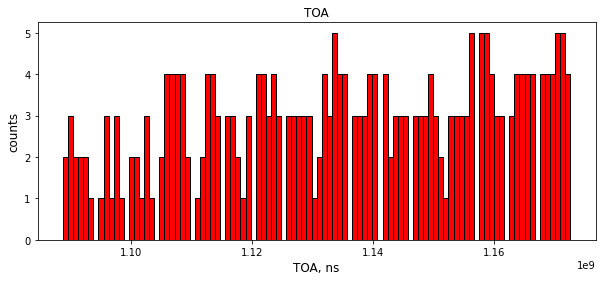

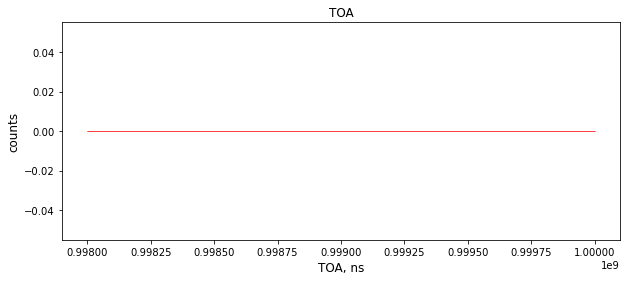

In [268]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R2_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R2_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [269]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt7_R2_ToA_1450_1600_df_2 = Pt7_R2_df.drop(Pt7_R2_df[(Pt7_R2_df['#ToA'] < ToAmin) | (Pt7_R2_df['#ToA'] > ToAmax)].index)

print(Pt7_R2_ToA_1450_1600_df_2.shape, type(Pt7_R2_ToA_1450_1600_df_2.iloc[0,0]), Pt7_R2_ToA_1450_1600_df_2.iloc[:1])

(220, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21920   159   101  178371108096        550            1250         NaN


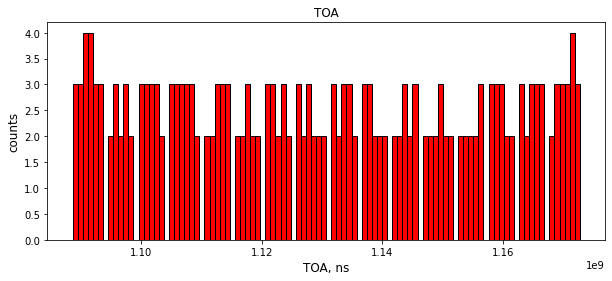

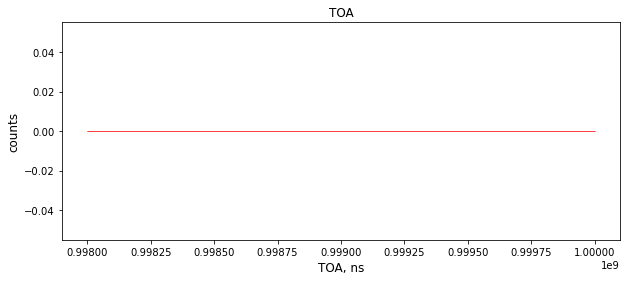

In [270]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R2_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R2_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [271]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt8_R2_ToA_1450_1600_df_2 = Pt8_R2_df.drop(Pt8_R2_df[(Pt8_R2_df['#ToA'] < ToAmin) | (Pt8_R2_df['#ToA'] > ToAmax)].index)

print(Pt8_R2_ToA_1450_1600_df_2.shape, type(Pt8_R2_ToA_1450_1600_df_2.iloc[0,0]), Pt8_R2_ToA_1450_1600_df_2.iloc[:1])

(464, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21908   159   106  178371107840        600            2525         NaN


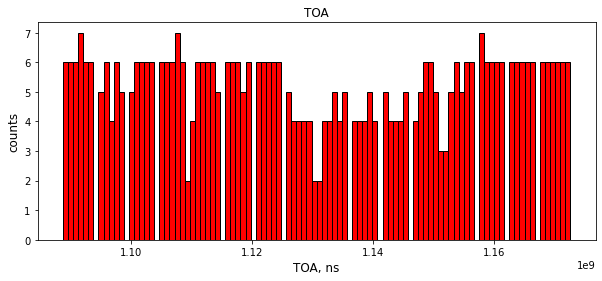

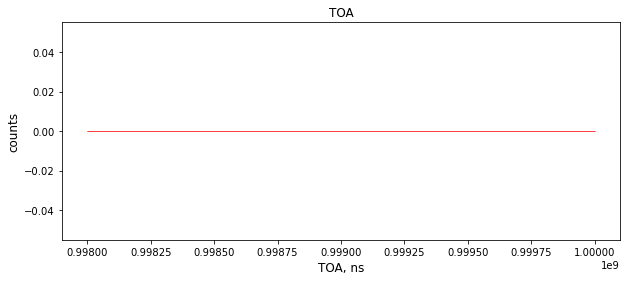

In [272]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R2_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R2_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [273]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt1_R3_ToA_1450_1600_df_2 = Pt1_R3_df.drop(Pt1_R3_df[(Pt1_R3_df['#ToA'] < ToAmin) | (Pt1_R3_df['#ToA'] > ToAmax)].index)

print(Pt1_R3_ToA_1450_1600_df_2.shape, type(Pt1_R3_ToA_1450_1600_df_2.iloc[0,0]), Pt1_R3_ToA_1450_1600_df_2.iloc[:1])

(337, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21934   163    68  178371108096        625            1125         NaN


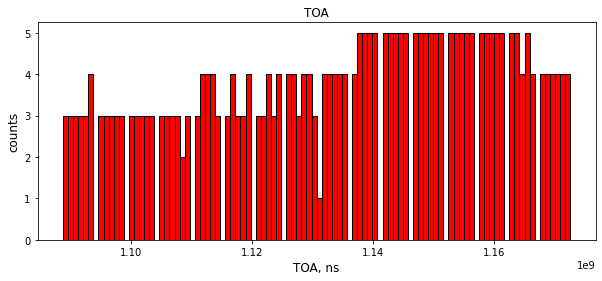

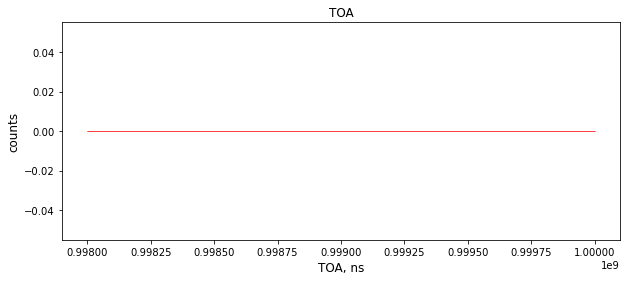

In [274]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R3_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R3_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [275]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt2_R3_ToA_1450_1600_df_2 = Pt2_R3_df.drop(Pt2_R3_df[(Pt2_R3_df['#ToA'] < ToAmin) | (Pt2_R3_df['#ToA'] > ToAmax)].index)

print(Pt2_R3_ToA_1450_1600_df_2.shape, type(Pt2_R3_ToA_1450_1600_df_2.iloc[0,0]), Pt2_R3_ToA_1450_1600_df_2.iloc[:1])

(225, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21984   163    74  178371108608        500             750         NaN


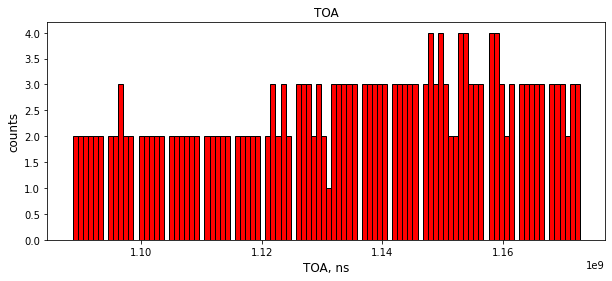

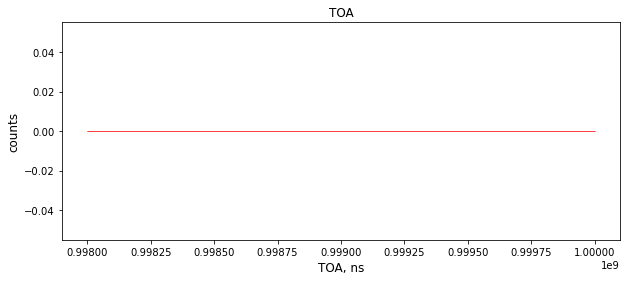

In [276]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R3_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R3_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [277]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt3_R3_ToA_1450_1600_df_2 = Pt3_R3_df.drop(Pt3_R3_df[(Pt3_R3_df['#ToA'] < ToAmin) | (Pt3_R3_df['#ToA'] > ToAmax)].index)

print(Pt3_R3_ToA_1450_1600_df_2.shape, type(Pt3_R3_ToA_1450_1600_df_2.iloc[0,0]), Pt3_R3_ToA_1450_1600_df_2.iloc[:1])

(166, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22017   163    79  178371109120        400             450         NaN


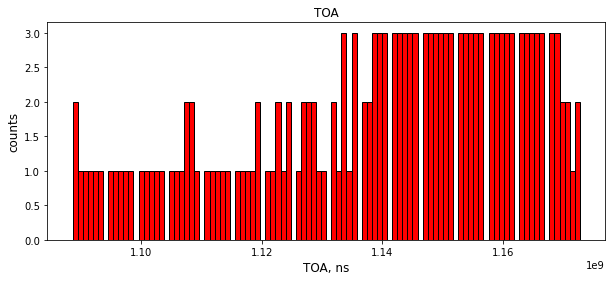

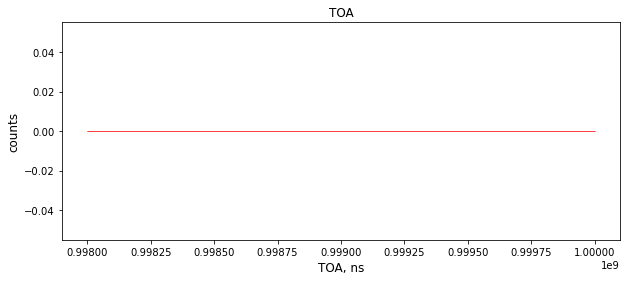

In [278]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R3_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R3_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [279]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt4_R3_ToA_1450_1600_df_2 = Pt4_R3_df.drop(Pt4_R3_df[(Pt4_R3_df['#ToA'] < ToAmin) | (Pt4_R3_df['#ToA'] > ToAmax)].index)

print(Pt4_R3_ToA_1450_1600_df_2.shape, type(Pt4_R3_ToA_1450_1600_df_2.iloc[0,0]), Pt4_R3_ToA_1450_1600_df_2.iloc[:1])

(239, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21923   163    85  178371108096        775            1425         NaN


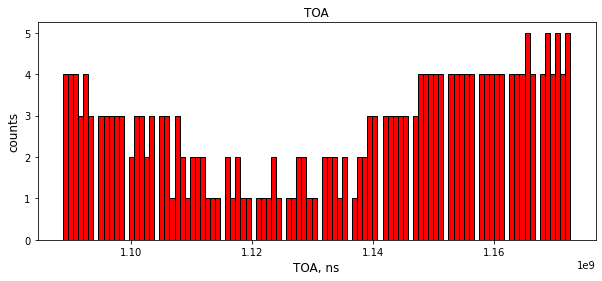

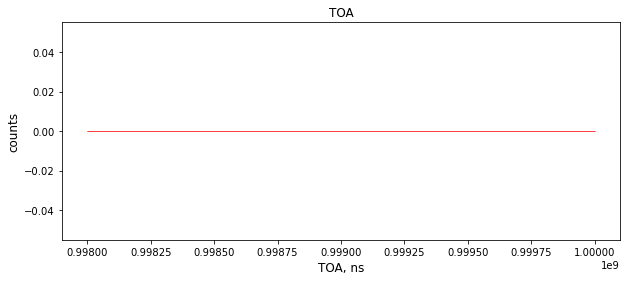

In [280]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R3_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R3_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [281]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt5_R3_ToA_1450_1600_df_2 = Pt5_R3_df.drop(Pt5_R3_df[(Pt5_R3_df['#ToA'] < ToAmin) | (Pt5_R3_df['#ToA'] > ToAmax)].index)

print(Pt5_R3_ToA_1450_1600_df_2.shape, type(Pt5_R3_ToA_1450_1600_df_2.iloc[0,0]), Pt5_R3_ToA_1450_1600_df_2.iloc[:1])

(182, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21971   163    90  178371108608        475             775         NaN


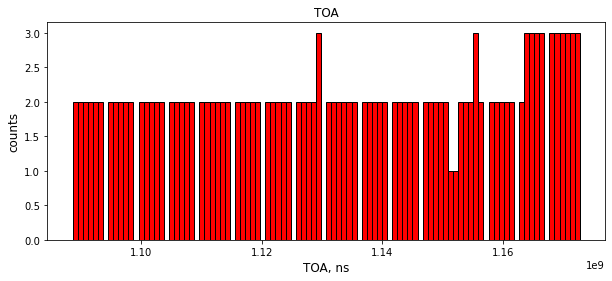

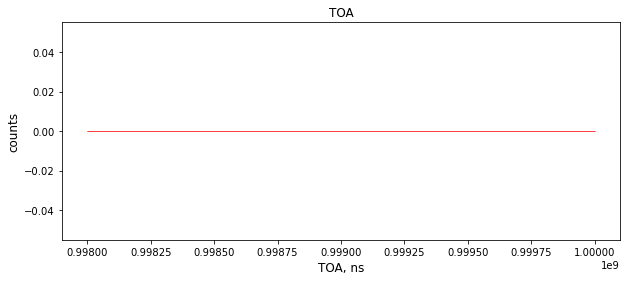

In [282]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R3_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R3_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [283]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt6_R3_ToA_1450_1600_df_2 = Pt6_R3_df.drop(Pt6_R3_df[(Pt6_R3_df['#ToA'] < ToAmin) | (Pt6_R3_df['#ToA'] > ToAmax)].index)

print(Pt6_R3_ToA_1450_1600_df_2.shape, type(Pt6_R3_ToA_1450_1600_df_2.iloc[0,0]), Pt6_R3_ToA_1450_1600_df_2.iloc[:1])

(277, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22051   163    96  178371114496        175             200         NaN


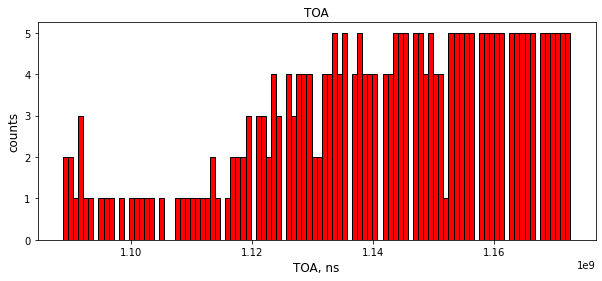

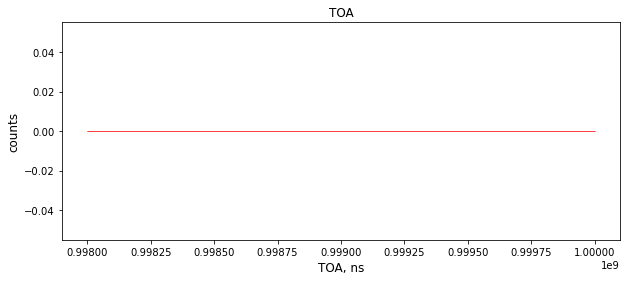

In [284]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R3_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R3_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [285]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt7_R3_ToA_1450_1600_df_2 = Pt7_R3_df.drop(Pt7_R3_df[(Pt7_R3_df['#ToA'] < ToAmin) | (Pt7_R3_df['#ToA'] > ToAmax)].index)

print(Pt7_R3_ToA_1450_1600_df_2.shape, type(Pt7_R3_ToA_1450_1600_df_2.iloc[0,0]), Pt7_R3_ToA_1450_1600_df_2.iloc[:1])

(282, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21953   163   101  178371108864        475             925         NaN


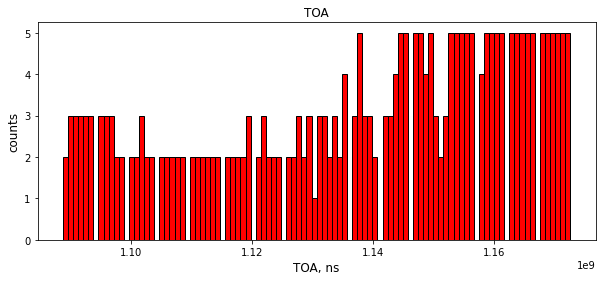

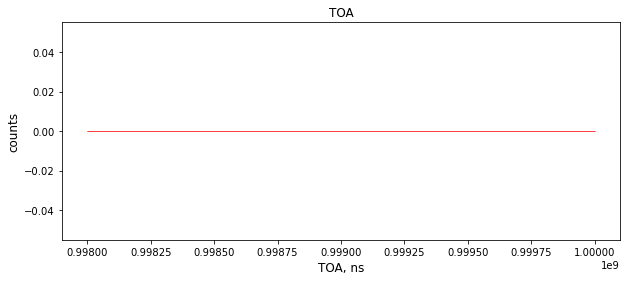

In [286]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R3_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R3_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [287]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt8_R3_ToA_1450_1600_df_2 = Pt8_R3_df.drop(Pt8_R3_df[(Pt8_R3_df['#ToA'] < ToAmin) | (Pt8_R3_df['#ToA'] > ToAmax)].index)

print(Pt8_R3_ToA_1450_1600_df_2.shape, type(Pt8_R3_ToA_1450_1600_df_2.iloc[0,0]), Pt8_R3_ToA_1450_1600_df_2.iloc[:1])

(419, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21904   164   107  178371107840        850            1925         NaN


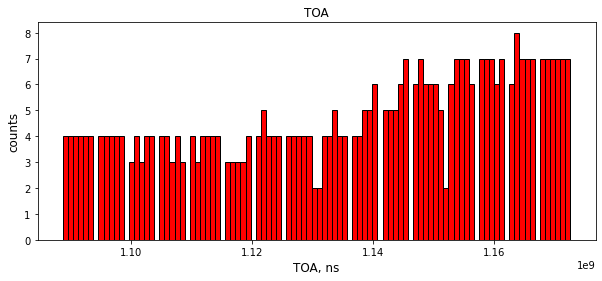

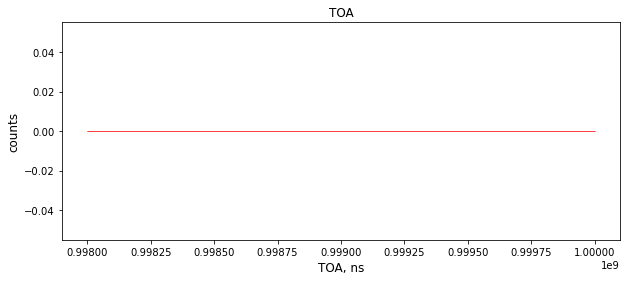

In [288]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R3_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R3_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [289]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt1_R4_ToA_1450_1600_df_2 = Pt1_R4_df.drop(Pt1_R4_df[(Pt1_R4_df['#ToA'] < ToAmin) | (Pt1_R4_df['#ToA'] > ToAmax)].index)

print(Pt1_R4_ToA_1450_1600_df_2.shape, type(Pt1_R4_ToA_1450_1600_df_2.iloc[0,0]), Pt1_R4_ToA_1450_1600_df_2.iloc[:1])

(356, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21964   168    68  178371108352        575             925         NaN


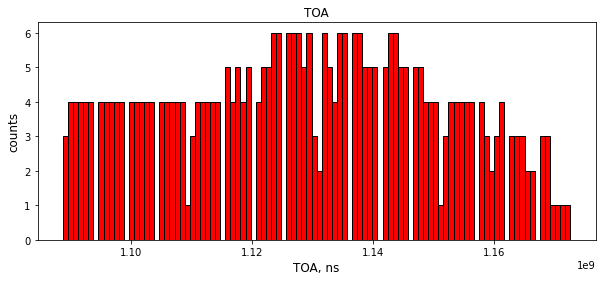

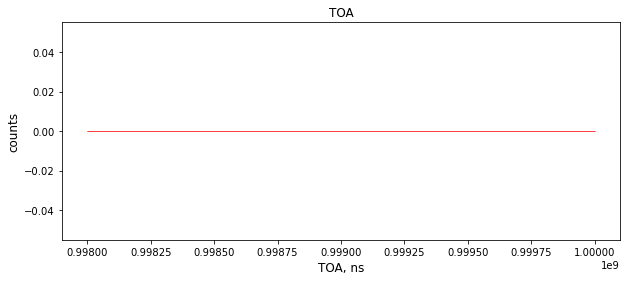

In [290]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R4_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R4_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [291]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt2_R4_ToA_1450_1600_df_2 = Pt2_R4_df.drop(Pt2_R4_df[(Pt2_R4_df['#ToA'] < ToAmin) | (Pt2_R4_df['#ToA'] > ToAmax)].index)

print(Pt2_R4_ToA_1450_1600_df_2.shape, type(Pt2_R4_ToA_1450_1600_df_2.iloc[0,0]))
print( Pt2_R4_ToA_1450_1600_df_2.iloc[:1])

(189, 6) <class 'numpy.int64'>
       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22019   168    74  178371109120        425             500         NaN


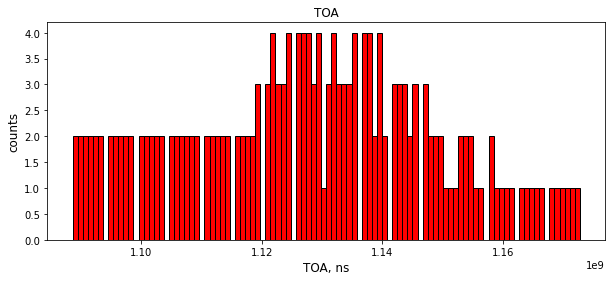

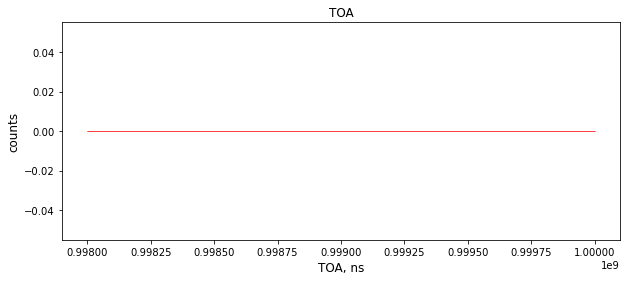

In [292]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R4_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R4_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [293]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt3_R4_ToA_1450_1600_df_2 = Pt3_R4_df.drop(Pt3_R4_df[(Pt3_R4_df['#ToA'] < ToAmin) | (Pt3_R4_df['#ToA'] > ToAmax)].index)

print(Pt3_R4_ToA_1450_1600_df_2.shape, type(Pt3_R4_ToA_1450_1600_df_2.iloc[0,0]), Pt3_R4_ToA_1450_1600_df_2.iloc[:1])

(114, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22016   168    79  178371109120        375             375         NaN


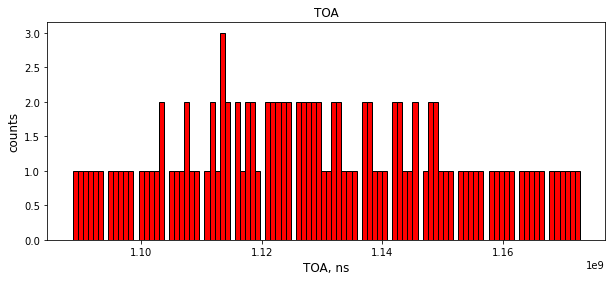

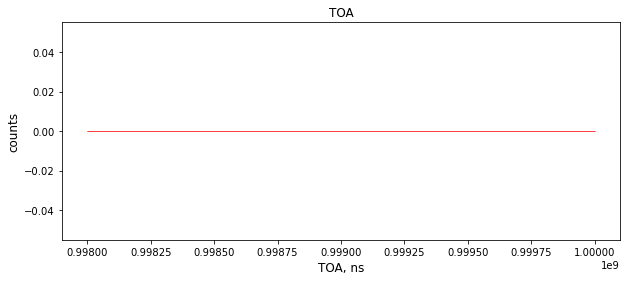

In [294]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R4_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R4_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [295]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt4_R4_ToA_1450_1600_df_2 = Pt4_R4_df.drop(Pt4_R4_df[(Pt4_R4_df['#ToA'] < ToAmin) | (Pt4_R4_df['#ToA'] > ToAmax)].index)

print(Pt4_R4_ToA_1450_1600_df_2.shape, type(Pt4_R4_ToA_1450_1600_df_2.iloc[0,0]), Pt4_R4_ToA_1450_1600_df_2.iloc[:1])

(146, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21946   168    85  178371108096        725            1075         NaN


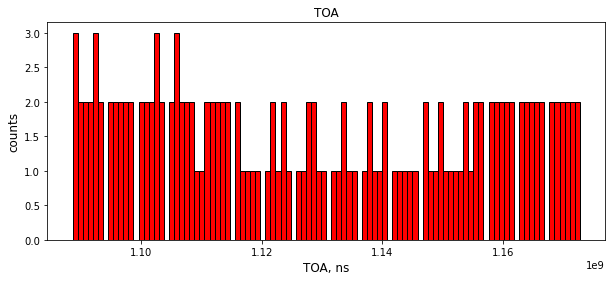

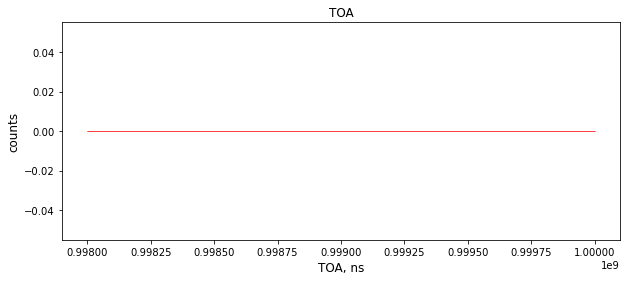

In [296]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R4_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R4_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [297]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt5_R4_ToA_1450_1600_df_2 = Pt5_R4_df.drop(Pt5_R4_df[(Pt5_R4_df['#ToA'] < ToAmin) | (Pt5_R4_df['#ToA'] > ToAmax)].index)

print(Pt5_R4_ToA_1450_1600_df_2.shape, type(Pt5_R4_ToA_1450_1600_df_2.iloc[0,0]), Pt5_R4_ToA_1450_1600_df_2.iloc[:1])

(141, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22021   168    90  178371109376        375             550         NaN


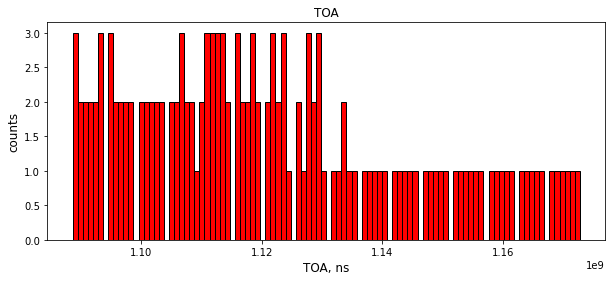

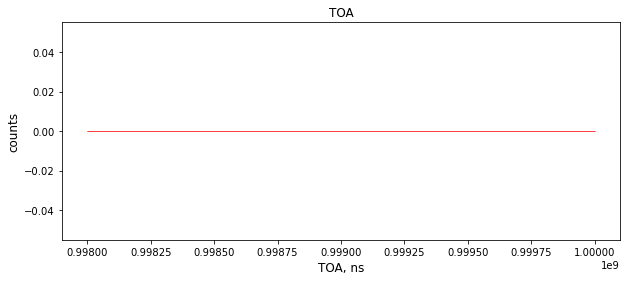

In [298]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R4_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R4_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [299]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt6_R4_ToA_1450_1600_df_2 = Pt6_R4_df.drop(Pt6_R4_df[(Pt6_R4_df['#ToA'] < ToAmin) | (Pt6_R4_df['#ToA'] > ToAmax)].index)

print(Pt6_R4_ToA_1450_1600_df_2.shape, type(Pt6_R4_ToA_1450_1600_df_2.iloc[0,0]), Pt6_R4_ToA_1450_1600_df_2.iloc[:1])

(235, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22048   168    96  178371112448        175             175         NaN


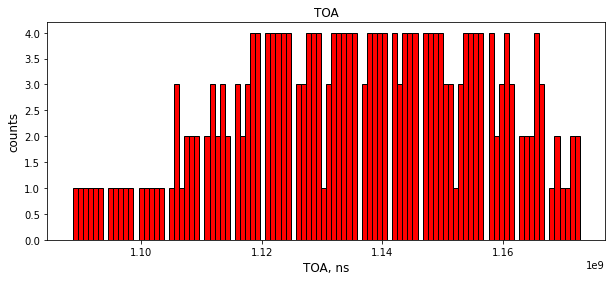

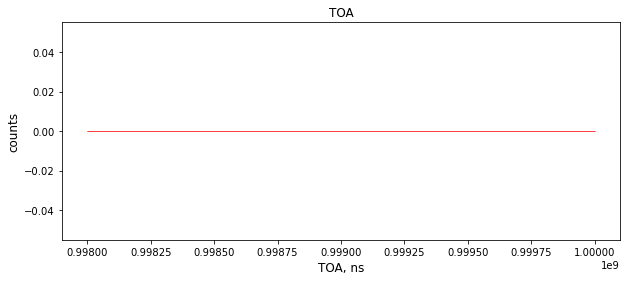

In [300]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R4_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R4_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [301]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt7_R4_ToA_1450_1600_df_2 = Pt7_R4_df.drop(Pt7_R4_df[(Pt7_R4_df['#ToA'] < ToAmin) | (Pt7_R4_df['#ToA'] > ToAmax)].index)

print(Pt7_R4_ToA_1450_1600_df_2.shape, type(Pt7_R4_ToA_1450_1600_df_2.iloc[0,0]), Pt7_R4_ToA_1450_1600_df_2.iloc[:1])

(286, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21997   168   101  178371108608        550            1075         NaN


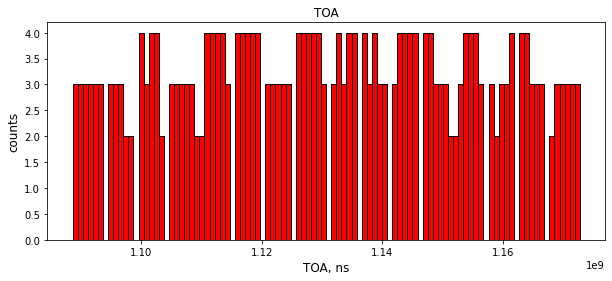

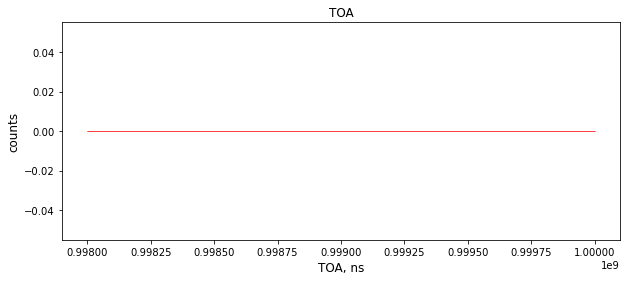

In [302]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R4_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R4_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [303]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt8_R4_ToA_1450_1600_df_2 = Pt8_R4_df.drop(Pt8_R4_df[(Pt8_R4_df['#ToA'] < ToAmin) | (Pt8_R4_df['#ToA'] > ToAmax)].index)

print(Pt8_R4_ToA_1450_1600_df_2.shape, type(Pt8_R4_ToA_1450_1600_df_2.iloc[0,0]), Pt8_R4_ToA_1450_1600_df_2.iloc[:1])

(255, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21937   169   107  178371108096        775            1375         NaN


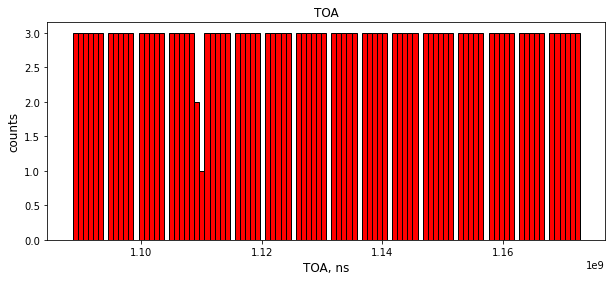

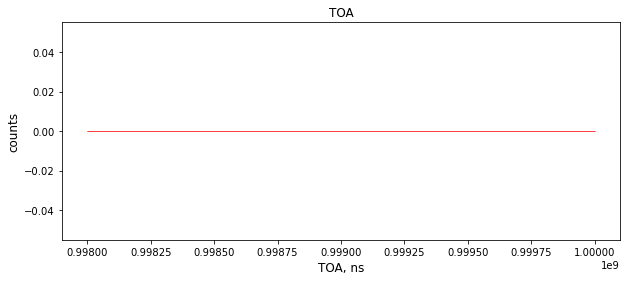

In [304]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R4_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R4_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [305]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt1_R5_ToA_1450_1600_df_2 = Pt1_R5_df.drop(Pt1_R5_df[(Pt1_R5_df['#ToA'] < ToAmin) | (Pt1_R5_df['#ToA'] > ToAmax)].index)

print(Pt1_R5_ToA_1450_1600_df_2.shape, type(Pt1_R5_ToA_1450_1600_df_2.iloc[0,0]), Pt1_R5_ToA_1450_1600_df_2.iloc[:1])

(287, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21986   173    68  178371108608        500             625         NaN


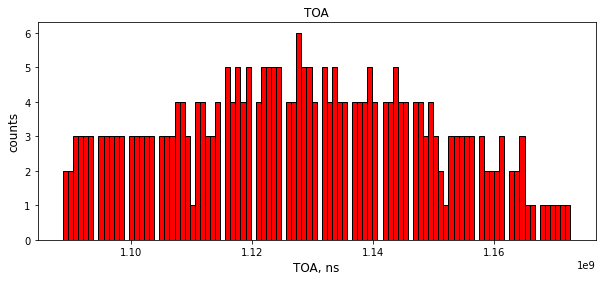

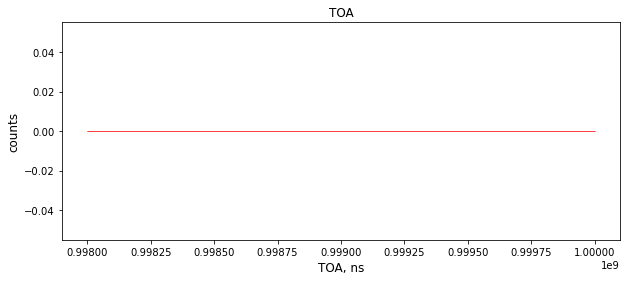

In [306]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R5_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R5_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [307]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt2_R5_ToA_1450_1600_df_2 = Pt2_R5_df.drop(Pt2_R5_df[(Pt2_R5_df['#ToA'] < ToAmin) | (Pt2_R5_df['#ToA'] > ToAmax)].index)

print(Pt2_R5_ToA_1450_1600_df_2.shape, type(Pt2_R5_ToA_1450_1600_df_2.iloc[0,0]), Pt2_R5_ToA_1450_1600_df_2.iloc[:1])

(175, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22032   173    74  178371109632        325             525         NaN


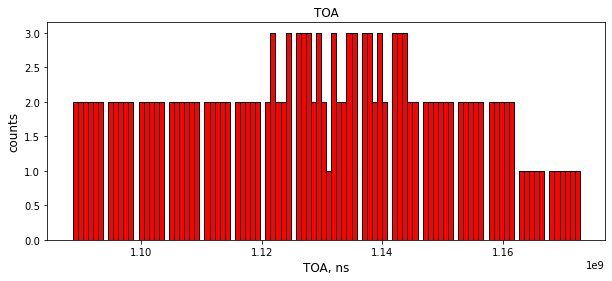

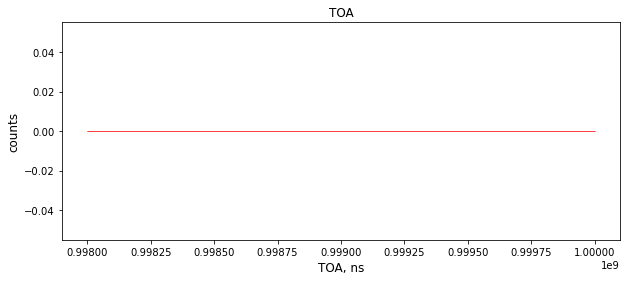

In [308]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R5_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R5_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [309]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt3_R5_ToA_1450_1600_df_2 = Pt3_R5_df.drop(Pt3_R5_df[(Pt3_R5_df['#ToA'] < ToAmin) | (Pt3_R5_df['#ToA'] > ToAmax)].index)

print(Pt3_R5_ToA_1450_1600_df_2.shape, type(Pt3_R5_ToA_1450_1600_df_2.iloc[0,0]), Pt3_R5_ToA_1450_1600_df_2.iloc[:1])

(164, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22026   173    79  178371109632        325             325         NaN


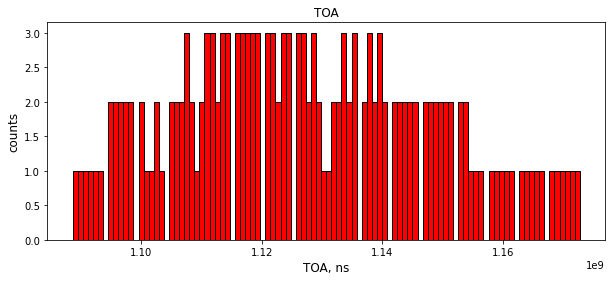

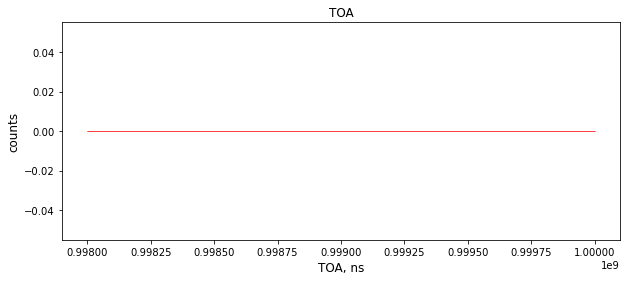

In [310]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R5_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R5_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [311]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt4_R5_ToA_1450_1600_df_2 = Pt4_R5_df.drop(Pt4_R5_df[(Pt4_R5_df['#ToA'] < ToAmin) | (Pt4_R5_df['#ToA'] > ToAmax)].index)

print(Pt4_R5_ToA_1450_1600_df_2.shape, type(Pt4_R5_ToA_1450_1600_df_2.iloc[0,0]), Pt4_R5_ToA_1450_1600_df_2.iloc[:1])

(213, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21962   173    85  178371108352        550             825         NaN


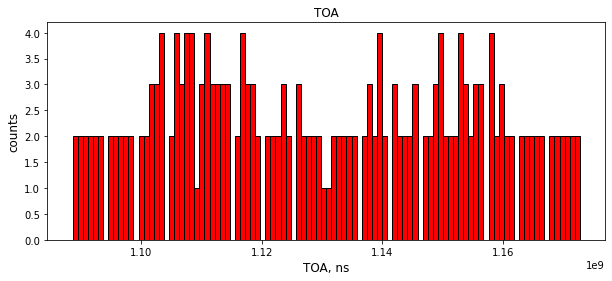

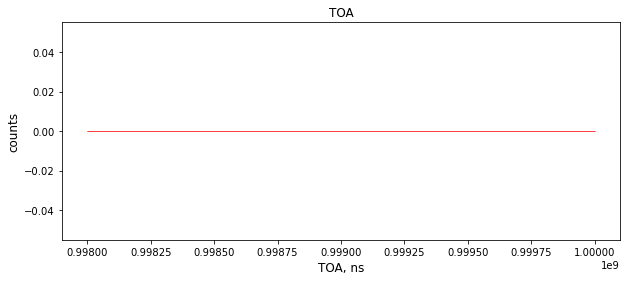

In [312]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R5_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R5_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [313]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt5_R5_ToA_1450_1600_df_2 = Pt5_R5_df.drop(Pt5_R5_df[(Pt5_R5_df['#ToA'] < ToAmin) | (Pt5_R5_df['#ToA'] > ToAmax)].index)

print(Pt5_R5_ToA_1450_1600_df_2.shape, type(Pt5_R5_ToA_1450_1600_df_2.iloc[0,0]), Pt5_R5_ToA_1450_1600_df_2.iloc[:1])

(192, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22024   173    90  178371109632        350             425         NaN


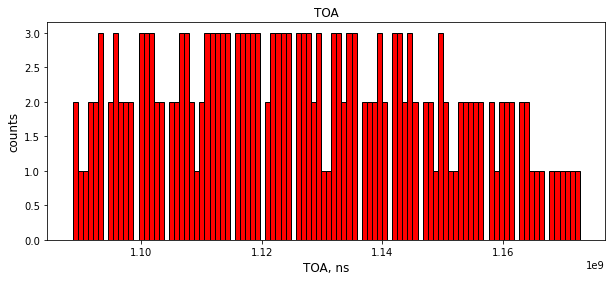

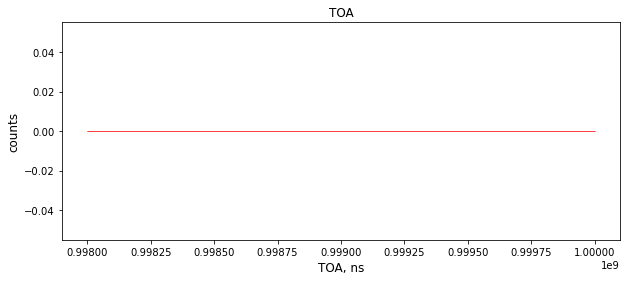

In [314]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R5_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R5_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [315]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt6_R5_ToA_1450_1600_df_2 = Pt6_R5_df.drop(Pt6_R5_df[(Pt6_R5_df['#ToA'] < ToAmin) | (Pt6_R5_df['#ToA'] > ToAmax)].index)

print(Pt6_R5_ToA_1450_1600_df_2.shape, type(Pt6_R5_ToA_1450_1600_df_2.iloc[0,0]), Pt6_R5_ToA_1450_1600_df_2.iloc[:1])

(278, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22047   173    96  178371112192        250             250         NaN


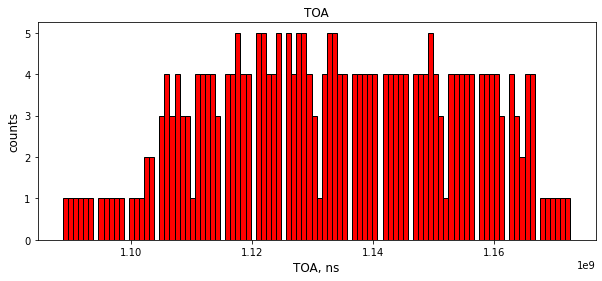

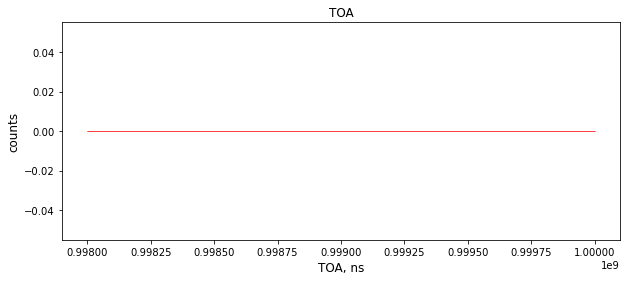

In [316]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R5_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R5_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [317]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt7_R5_ToA_1450_1600_df_2 = Pt7_R5_df.drop(Pt7_R5_df[(Pt7_R5_df['#ToA'] < ToAmin) | (Pt7_R5_df['#ToA'] > ToAmax)].index)

print(Pt7_R5_ToA_1450_1600_df_2.shape, type(Pt7_R5_ToA_1450_1600_df_2.iloc[0,0]), Pt7_R5_ToA_1450_1600_df_2.iloc[:1])

(303, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22014   173   101  178371109120        375             725         NaN


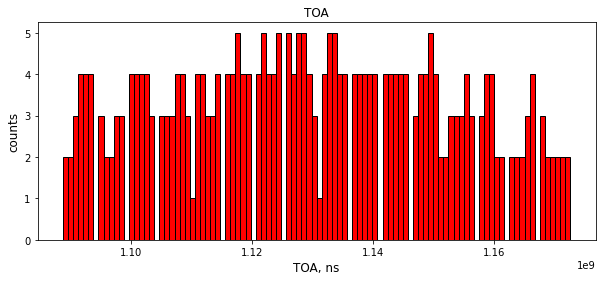

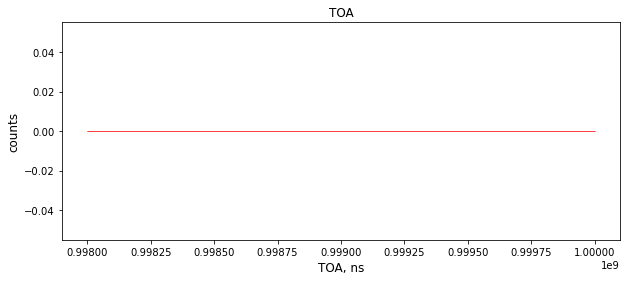

In [318]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R5_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R5_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [319]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt8_R5_ToA_1450_1600_df_2 = Pt8_R5_df.drop(Pt8_R5_df[(Pt8_R5_df['#ToA'] < ToAmin) | (Pt8_R5_df['#ToA'] > ToAmax)].index)

print(Pt8_R5_ToA_1450_1600_df_2.shape, type(Pt8_R5_ToA_1450_1600_df_2.iloc[0,0]), Pt8_R5_ToA_1450_1600_df_2.iloc[:1])

(265, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21955   174   107  178371108352        575            1025         NaN


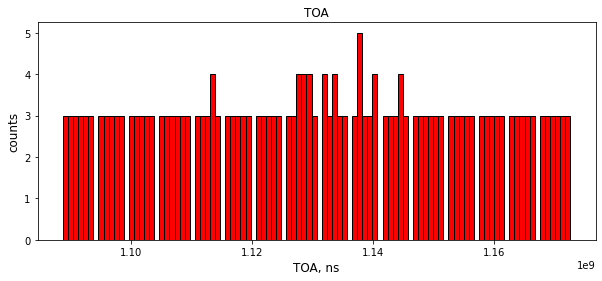

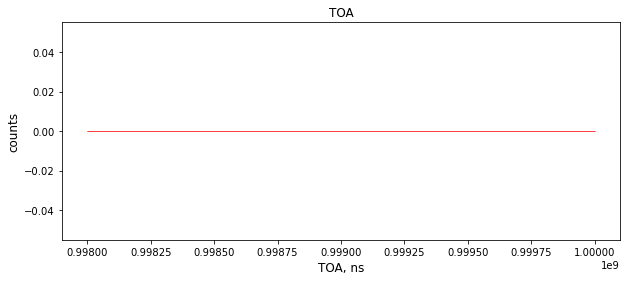

In [320]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R5_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R5_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [321]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt1_R6_ToA_1450_1600_df_2 = Pt1_R6_df.drop(Pt1_R6_df[(Pt1_R6_df['#ToA'] < ToAmin) | (Pt1_R6_df['#ToA'] > ToAmax)].index)

print(Pt1_R6_ToA_1450_1600_df_2.shape, type(Pt1_R6_ToA_1450_1600_df_2.iloc[0,0]), Pt1_R6_ToA_1450_1600_df_2.iloc[:1])

(136, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21967   178    68  178371108352        700             975         NaN


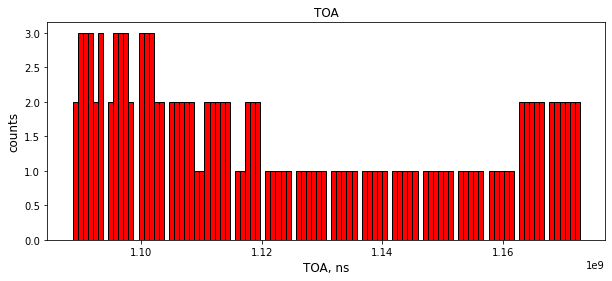

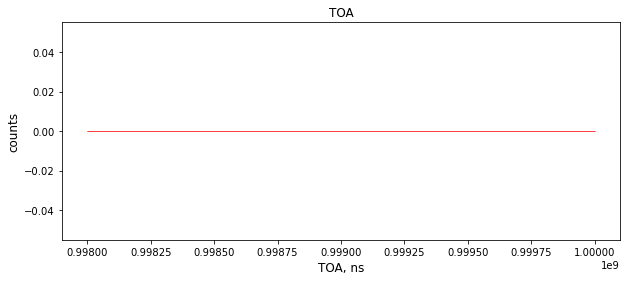

In [322]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R6_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R6_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot

In [323]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt2_R6_ToA_1450_1600_df_2 = Pt2_R6_df.drop(Pt2_R6_df[(Pt2_R6_df['#ToA'] < ToAmin) | (Pt2_R6_df['#ToA'] > ToAmax)].index)

print(Pt2_R6_ToA_1450_1600_df_2.shape)
# , type(Pt2_R6_ToA_1450_1600_df_2.iloc[0,0]), Pt2_R6_ToA_1450_1600_df_2.iloc[:1]

(107, 6)


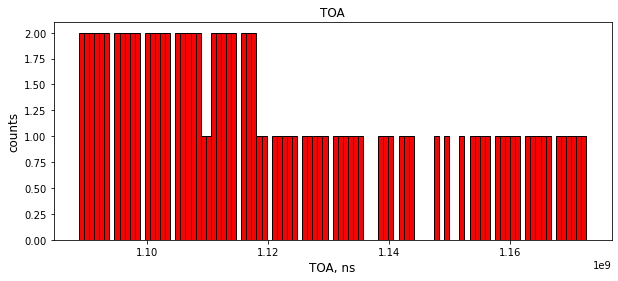

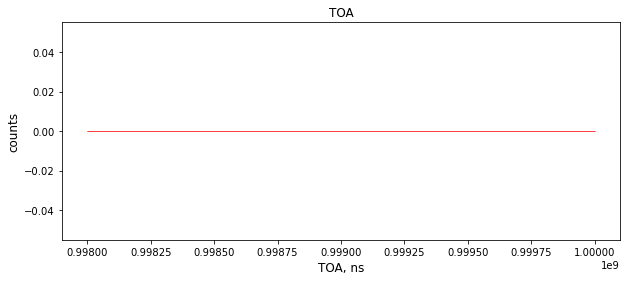

In [324]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R6_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R6_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [325]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt3_R6_ToA_1450_1600_df_2 = Pt3_R6_df.drop(Pt3_R6_df[(Pt3_R6_df['#ToA'] < ToAmin) | (Pt3_R6_df['#ToA'] > ToAmax)].index)

print(Pt3_R6_ToA_1450_1600_df_2.shape, type(Pt3_R6_ToA_1450_1600_df_2.iloc[0,0]), Pt3_R6_ToA_1450_1600_df_2.iloc[:1])

(57, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22001   178    79  178371108864        425             425         NaN


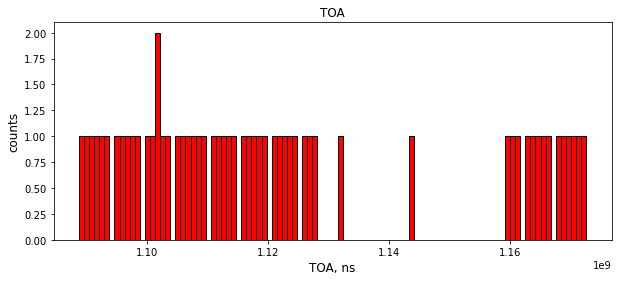

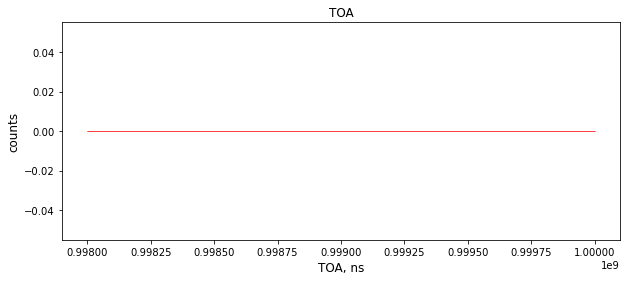

In [326]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R6_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R6_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot (second one)

In [327]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt4_R6_ToA_1450_1600_df_2 = Pt4_R6_df.drop(Pt4_R6_df[(Pt4_R6_df['#ToA'] < ToAmin) | (Pt4_R6_df['#ToA'] > ToAmax)].index)

print(Pt4_R6_ToA_1450_1600_df_2.shape)

(93, 6)


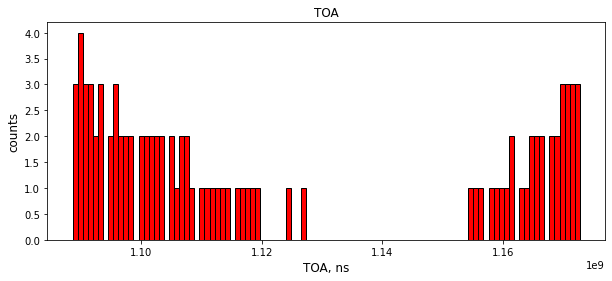

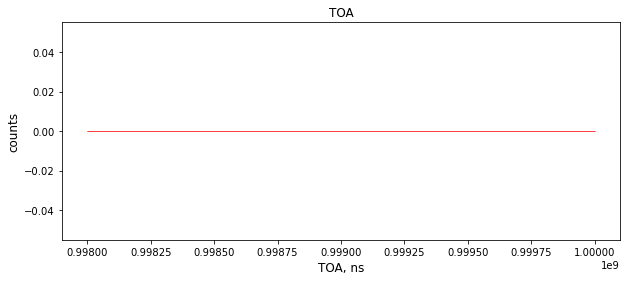

In [328]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R6_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R6_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot (third one)

In [329]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt5_R6_ToA_1450_1600_df_2 = Pt5_R6_df.drop(Pt5_R6_df[(Pt5_R6_df['#ToA'] < ToAmin) | (Pt5_R6_df['#ToA'] > ToAmax)].index)

print(Pt5_R6_ToA_1450_1600_df_2.shape)

(76, 6)


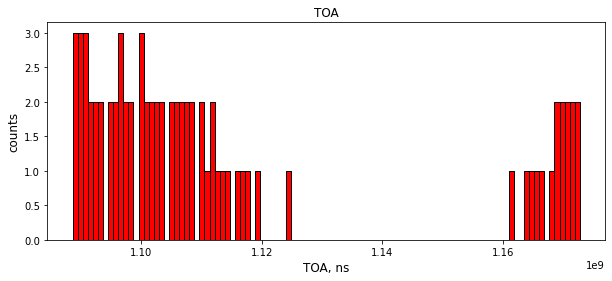

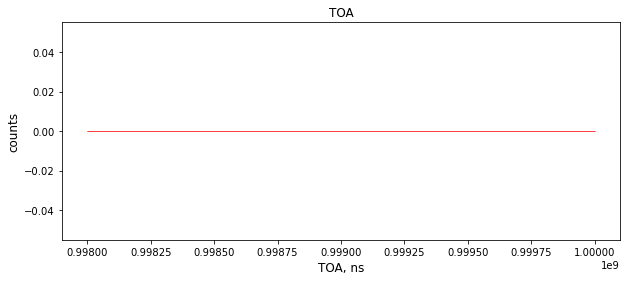

In [330]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R6_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R6_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot (fourth one)

In [331]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt6_R6_ToA_1450_1600_df_2 = Pt6_R6_df.drop(Pt6_R6_df[(Pt6_R6_df['#ToA'] < ToAmin) | (Pt6_R6_df['#ToA'] > ToAmax)].index)

print(Pt6_R6_ToA_1450_1600_df_2.shape)

(77, 6)


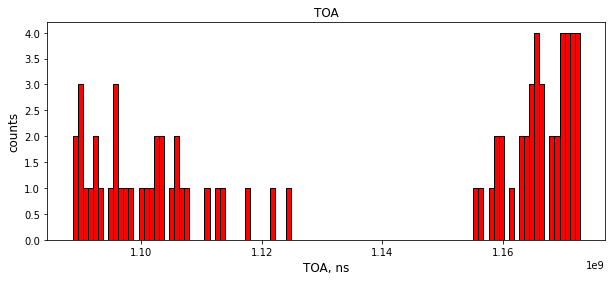

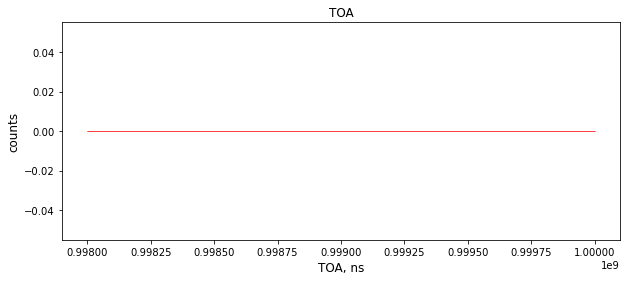

In [332]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R6_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R6_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot (fifth one)

In [333]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt7_R6_ToA_1450_1600_df_2 = Pt7_R6_df.drop(Pt7_R6_df[(Pt7_R6_df['#ToA'] < ToAmin) | (Pt7_R6_df['#ToA'] > ToAmax)].index)

print(Pt7_R6_ToA_1450_1600_df_2.shape)

(151, 6)


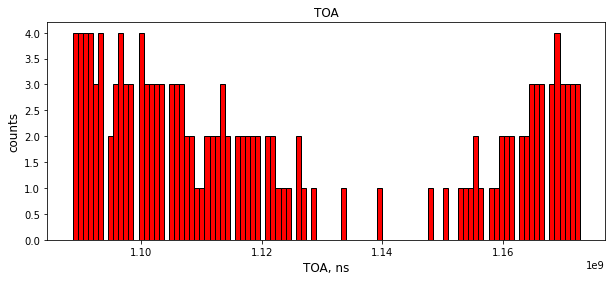

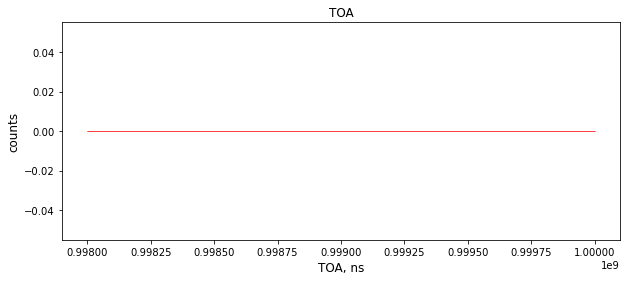

In [334]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R6_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R6_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [335]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt8_R6_ToA_1450_1600_df_2 = Pt8_R6_df.drop(Pt8_R6_df[(Pt8_R6_df['#ToA'] < ToAmin) | (Pt8_R6_df['#ToA'] > ToAmax)].index)

print(Pt8_R6_ToA_1450_1600_df_2.shape, type(Pt8_R6_ToA_1450_1600_df_2.iloc[0,0]), Pt8_R6_ToA_1450_1600_df_2.iloc[:1])

(139, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21940   179   107  178371108096       1025            1550         NaN


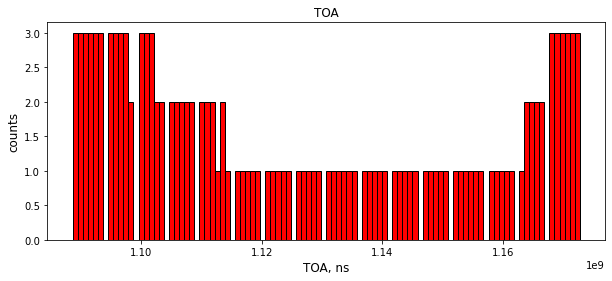

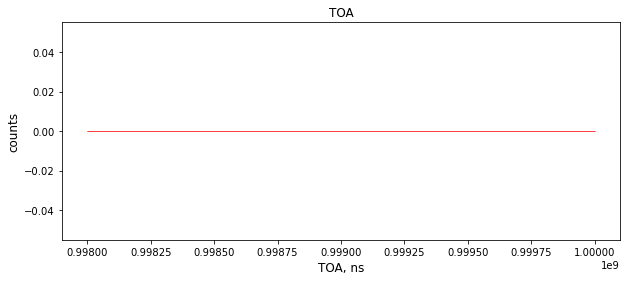

In [336]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R6_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R6_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [337]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt1_R7_ToA_1450_1600_df_2 = Pt1_R7_df.drop(Pt1_R7_df[(Pt1_R7_df['#ToA'] < ToAmin) | (Pt1_R7_df['#ToA'] > ToAmax)].index)

print(Pt1_R7_ToA_1450_1600_df_2.shape, type(Pt1_R7_ToA_1450_1600_df_2.iloc[0,0]), Pt1_R7_ToA_1450_1600_df_2.iloc[:1])

(197, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21982   183    68  178371108608        525             650         NaN


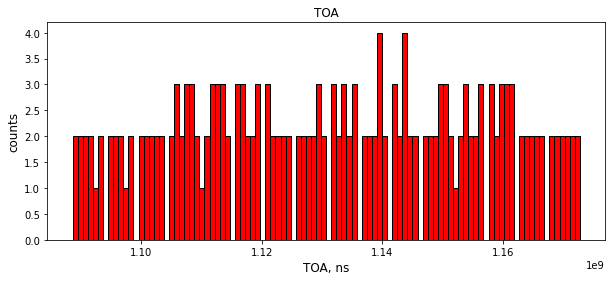

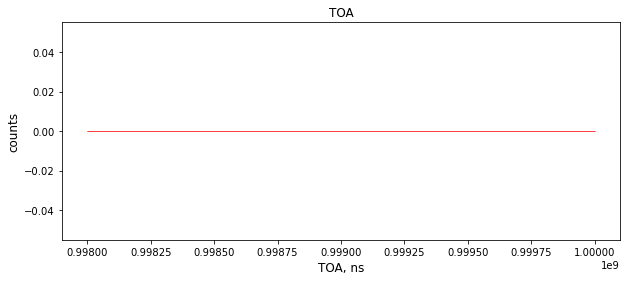

In [338]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R7_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R7_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [339]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt2_R7_ToA_1450_1600_df_2 = Pt2_R7_df.drop(Pt2_R7_df[(Pt2_R7_df['#ToA'] < ToAmin) | (Pt2_R7_df['#ToA'] > ToAmax)].index)

print(Pt2_R7_ToA_1450_1600_df_2.shape, type(Pt2_R7_ToA_1450_1600_df_2.iloc[0,0]), Pt2_R7_ToA_1450_1600_df_2.iloc[:1])

(176, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22030   183    74  178371109632        375             475         NaN


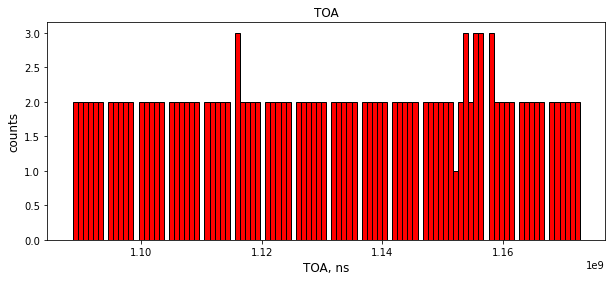

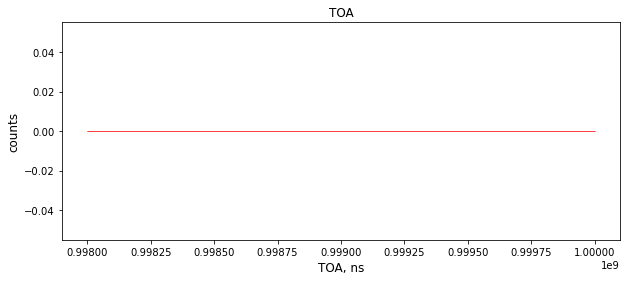

In [340]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R7_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R7_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [341]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt3_R7_ToA_1450_1600_df_2 = Pt3_R7_df.drop(Pt3_R7_df[(Pt3_R7_df['#ToA'] < ToAmin) | (Pt3_R7_df['#ToA'] > ToAmax)].index)

print(Pt3_R7_ToA_1450_1600_df_2.shape, type(Pt3_R7_ToA_1450_1600_df_2.iloc[0,0]), Pt3_R7_ToA_1450_1600_df_2.iloc[:1])

(140, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22038   183    79  178371110400        275             275         NaN


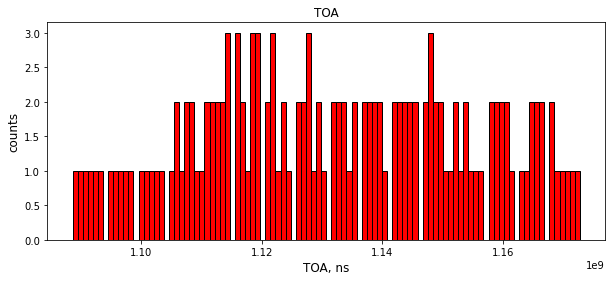

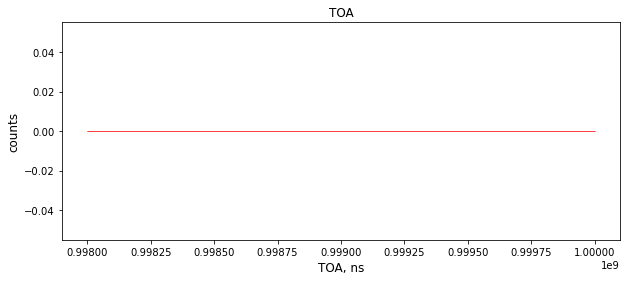

In [342]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R7_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R7_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [343]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt4_R7_ToA_1450_1600_df_2 = Pt4_R7_df.drop(Pt4_R7_df[(Pt4_R7_df['#ToA'] < ToAmin) | (Pt4_R7_df['#ToA'] > ToAmax)].index)

print(Pt4_R7_ToA_1450_1600_df_2.shape, type(Pt4_R7_ToA_1450_1600_df_2.iloc[0,0]), Pt4_R7_ToA_1450_1600_df_2.iloc[:1])

(244, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21976   183    85  178371108608        425             900         NaN


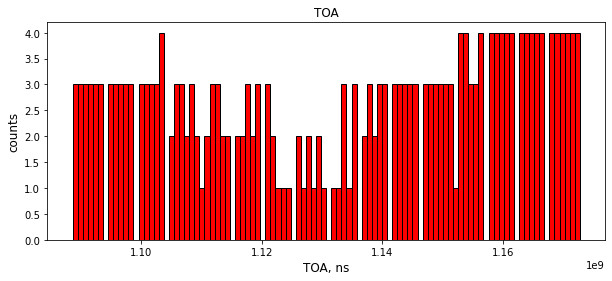

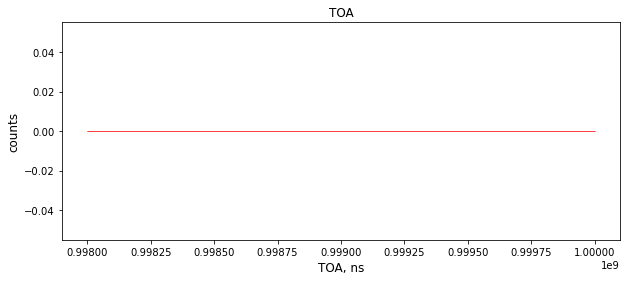

In [344]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R7_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R7_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [345]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt5_R7_ToA_1450_1600_df_2 = Pt5_R7_df.drop(Pt5_R7_df[(Pt5_R7_df['#ToA'] < ToAmin) | (Pt5_R7_df['#ToA'] > ToAmax)].index)

print(Pt5_R7_ToA_1450_1600_df_2.shape, type(Pt5_R7_ToA_1450_1600_df_2.iloc[0,0]), Pt5_R7_ToA_1450_1600_df_2.iloc[:1])

(170, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22034   183    90  178371110144        275             425         NaN


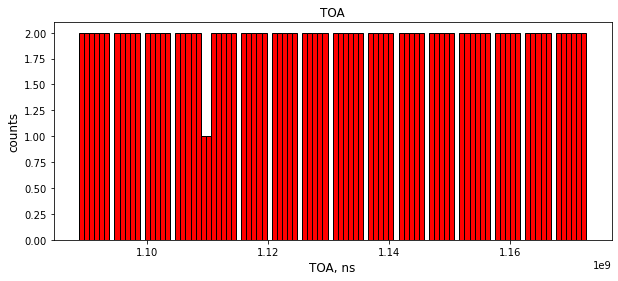

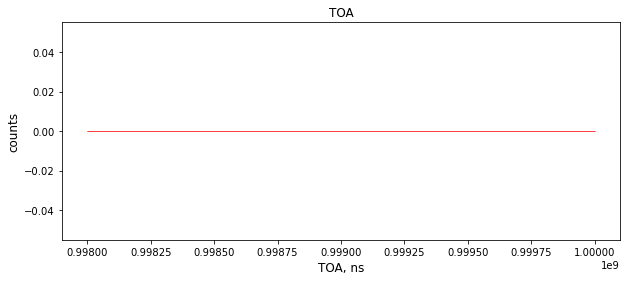

In [346]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R7_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R7_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [347]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt6_R7_ToA_1450_1600_df_2 = Pt6_R7_df.drop(Pt6_R7_df[(Pt6_R7_df['#ToA'] < ToAmin) | (Pt6_R7_df['#ToA'] > ToAmax)].index)

print(Pt6_R7_ToA_1450_1600_df_2.shape, type(Pt6_R7_ToA_1450_1600_df_2.iloc[0,0]), Pt6_R7_ToA_1450_1600_df_2.iloc[:1])

(275, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22053   183    96  178371119872        150             150         NaN


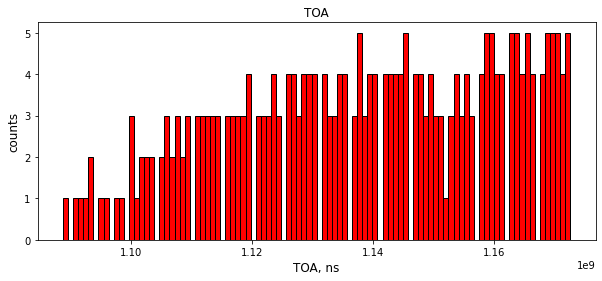

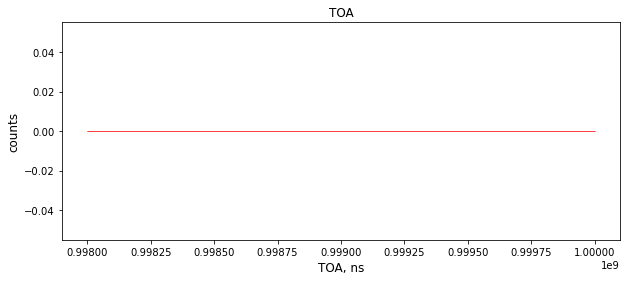

In [348]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R7_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R7_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [349]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt7_R7_ToA_1450_1600_df_2 = Pt7_R7_df.drop(Pt7_R7_df[(Pt7_R7_df['#ToA'] < ToAmin) | (Pt7_R7_df['#ToA'] > ToAmax)].index)

print(Pt7_R7_ToA_1450_1600_df_2.shape, type(Pt7_R7_ToA_1450_1600_df_2.iloc[0,0]), Pt7_R7_ToA_1450_1600_df_2.iloc[:1])

(275, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21973   184   101  178371108608        425            1000         NaN


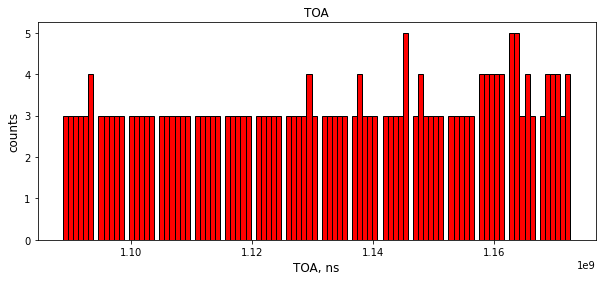

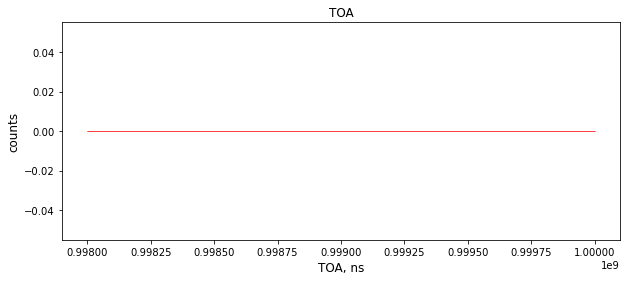

In [350]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R7_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R7_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [351]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt8_R7_ToA_1450_1600_df_2 = Pt8_R7_df.drop(Pt8_R7_df[(Pt8_R7_df['#ToA'] < ToAmin) | (Pt8_R7_df['#ToA'] > ToAmax)].index)

print(Pt8_R7_ToA_1450_1600_df_2.shape, type(Pt8_R7_ToA_1450_1600_df_2.iloc[0,0]), Pt8_R7_ToA_1450_1600_df_2.iloc[:1])

(279, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21899   184   107  178371107584        850            1150         NaN


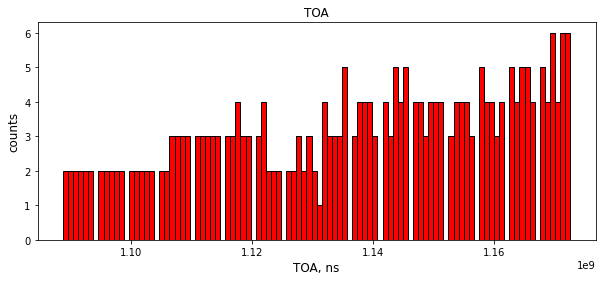

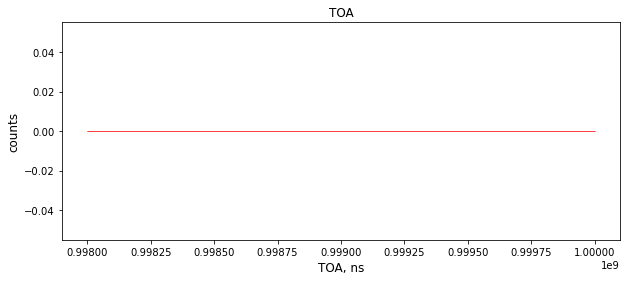

In [352]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R7_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R7_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [353]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt1_R8_ToA_1450_1600_df_2 = Pt1_R8_df.drop(Pt1_R8_df[(Pt1_R8_df['#ToA'] < ToAmin) | (Pt1_R8_df['#ToA'] > ToAmax)].index)

print(Pt1_R8_ToA_1450_1600_df_2.shape, type(Pt1_R8_ToA_1450_1600_df_2.iloc[0,0]), Pt1_R8_ToA_1450_1600_df_2.iloc[:1])

(187, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22006   188    68  178371108864        475             600         NaN


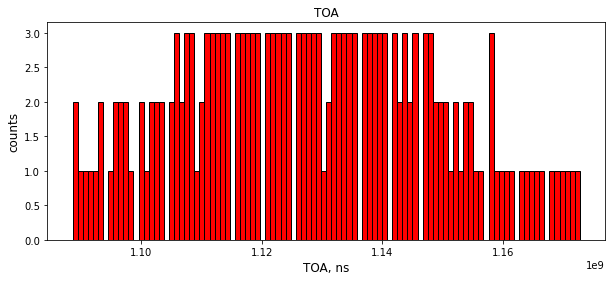

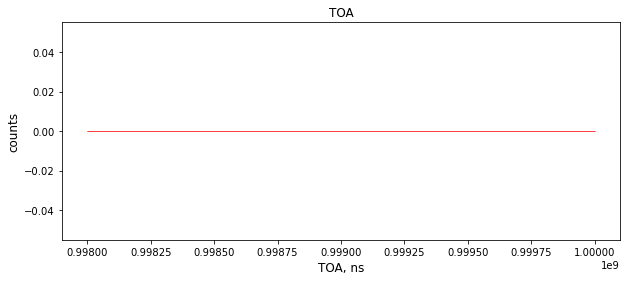

In [354]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R8_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R8_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [355]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt2_R8_ToA_1450_1600_df_2 = Pt2_R8_df.drop(Pt2_R8_df[(Pt2_R8_df['#ToA'] < ToAmin) | (Pt2_R8_df['#ToA'] > ToAmax)].index)

print(Pt2_R8_ToA_1450_1600_df_2.shape, type(Pt2_R8_ToA_1450_1600_df_2.iloc[0,0]), Pt2_R8_ToA_1450_1600_df_2.iloc[:1])

(189, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22036   188    74  178371110144        275             325         NaN


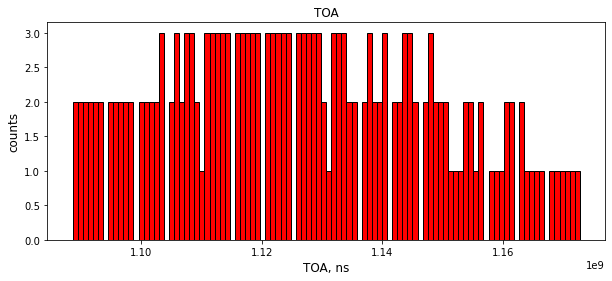

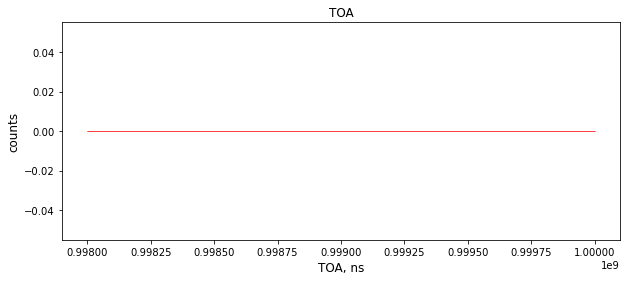

In [356]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R8_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R8_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [357]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt3_R8_ToA_1450_1600_df_2 = Pt3_R8_df.drop(Pt3_R8_df[(Pt3_R8_df['#ToA'] < ToAmin) | (Pt3_R8_df['#ToA'] > ToAmax)].index)

print(Pt3_R8_ToA_1450_1600_df_2.shape, type(Pt3_R8_ToA_1450_1600_df_2.iloc[0,0]), Pt3_R8_ToA_1450_1600_df_2.iloc[:1])

(135, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22041   188    79  178371110656        225             225         NaN


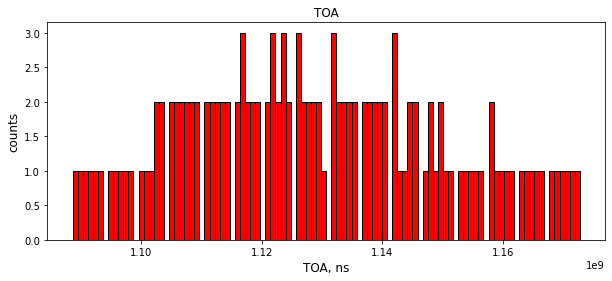

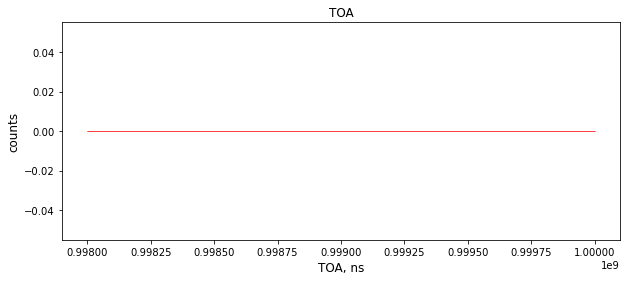

In [358]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R8_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R8_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [359]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt4_R8_ToA_1450_1600_df_2 = Pt4_R8_df.drop(Pt4_R8_df[(Pt4_R8_df['#ToA'] < ToAmin) | (Pt4_R8_df['#ToA'] > ToAmax)].index)

print(Pt4_R8_ToA_1450_1600_df_2.shape, type(Pt4_R8_ToA_1450_1600_df_2.iloc[0,0]), Pt4_R8_ToA_1450_1600_df_2.iloc[:1])

(197, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21988   188    85  178371108608        400             800         NaN


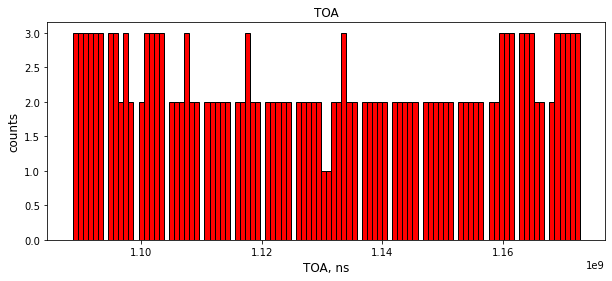

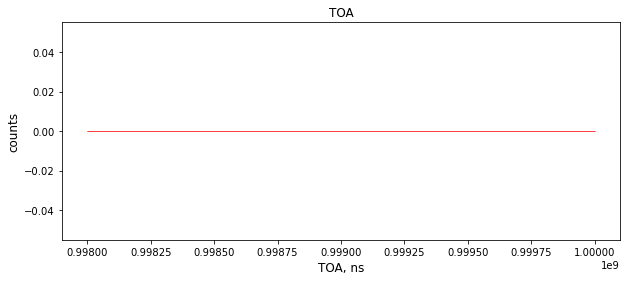

In [360]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R8_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R8_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [361]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt5_R8_ToA_1450_1600_df_2 = Pt5_R8_df.drop(Pt5_R8_df[(Pt5_R8_df['#ToA'] < ToAmin) | (Pt5_R8_df['#ToA'] > ToAmax)].index)

print(Pt5_R8_ToA_1450_1600_df_2.shape, type(Pt5_R8_ToA_1450_1600_df_2.iloc[0,0]), Pt5_R8_ToA_1450_1600_df_2.iloc[:1])

(135, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22044   189    90  178371111680        225             450         NaN


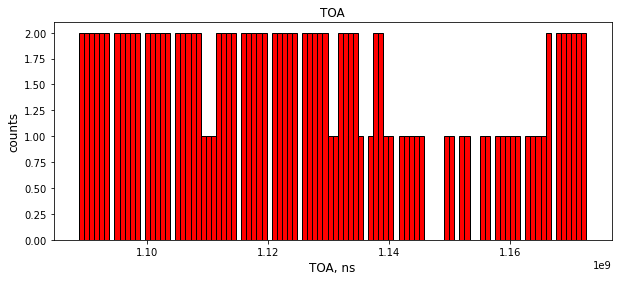

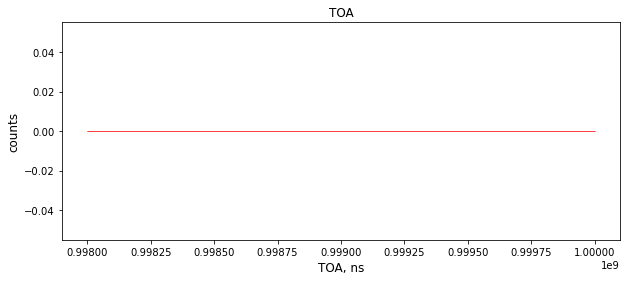

In [362]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R8_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R8_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [363]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt6_R8_ToA_1450_1600_df_2 = Pt6_R8_df.drop(Pt6_R8_df[(Pt6_R8_df['#ToA'] < ToAmin) | (Pt6_R8_df['#ToA'] > ToAmax)].index)

print(Pt6_R8_ToA_1450_1600_df_2.shape, type(Pt6_R8_ToA_1450_1600_df_2.iloc[0,0]), Pt6_R8_ToA_1450_1600_df_2.iloc[:1])

(216, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
22057   189    96  178371129088         25              25         NaN


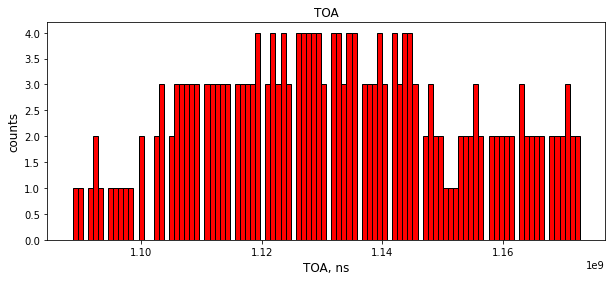

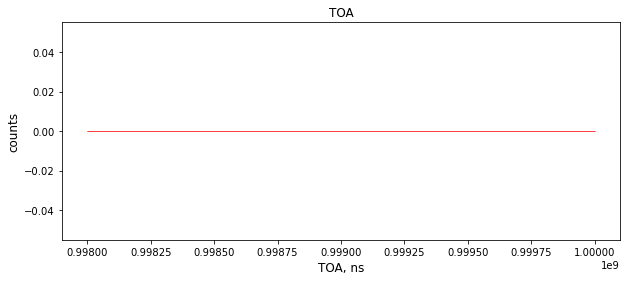

In [364]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R8_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R8_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [365]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt7_R8_ToA_1450_1600_df_2 = Pt7_R8_df.drop(Pt7_R8_df[(Pt7_R8_df['#ToA'] < ToAmin) | (Pt7_R8_df['#ToA'] > ToAmax)].index)

print(Pt7_R8_ToA_1450_1600_df_2.shape, type(Pt7_R8_ToA_1450_1600_df_2.iloc[0,0]), Pt7_R8_ToA_1450_1600_df_2.iloc[:1])

(250, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21979   189   101  178371108608        375             675         NaN


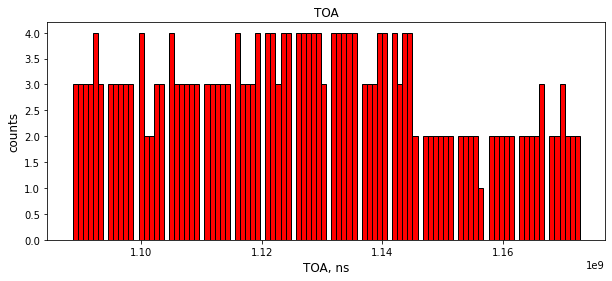

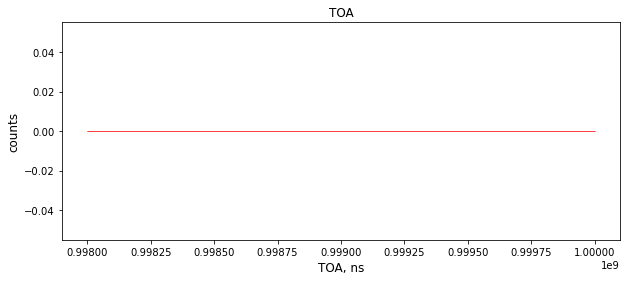

In [366]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R8_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R8_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [367]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
Pt8_R8_ToA_1450_1600_df_2 = Pt8_R8_df.drop(Pt8_R8_df[(Pt8_R8_df['#ToA'] < ToAmin) | (Pt8_R8_df['#ToA'] > ToAmax)].index)

print(Pt8_R8_ToA_1450_1600_df_2.shape, type(Pt8_R8_ToA_1450_1600_df_2.iloc[0,0]), Pt8_R8_ToA_1450_1600_df_2.iloc[:1])

(300, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
21918   189   107  178371108096        900            1250         NaN


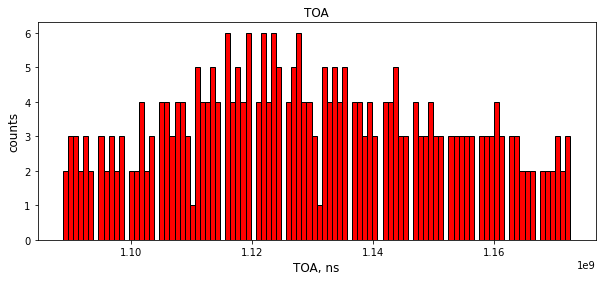

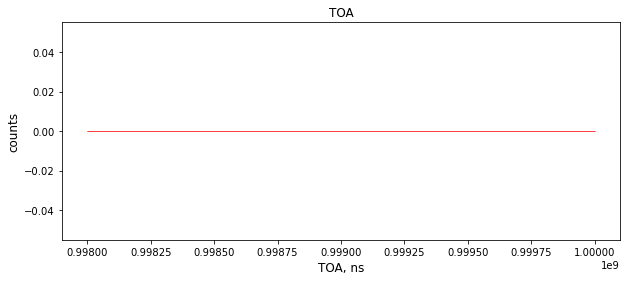

In [368]:
ToAmin = (1.002691600e9+(1000000*5*17))*4096./25.
ToAmax = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R8_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_2s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R8_ToA_1450_1600_df_2['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_20pks_Pt1-1_8212020_025044-1_cent.png')

In [369]:
ToA_all_array_100_2 = []
ToAtotal_all_array_100_2 = []
for j in range(1,9):
    for k in range(1,9):
        # Create TOT arrays
        globals()["Pt"+str(j)+"_R"+str(k)+"_TOA_array_100_2"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_ToA_1450_1600_df_2"]['#ToA'].to_numpy())
#         globals()["Pt"+str(j)+"_R"+str(k)+"_TOTtotal_array"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy())
        ToA_all_array_100_2.append((globals()["Pt"+str(j)+"_R"+str(k)+"_ToA_1450_1600_df_2"]['#ToA'].to_numpy()))
#         ToAtotal_all_array.append((globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy()))

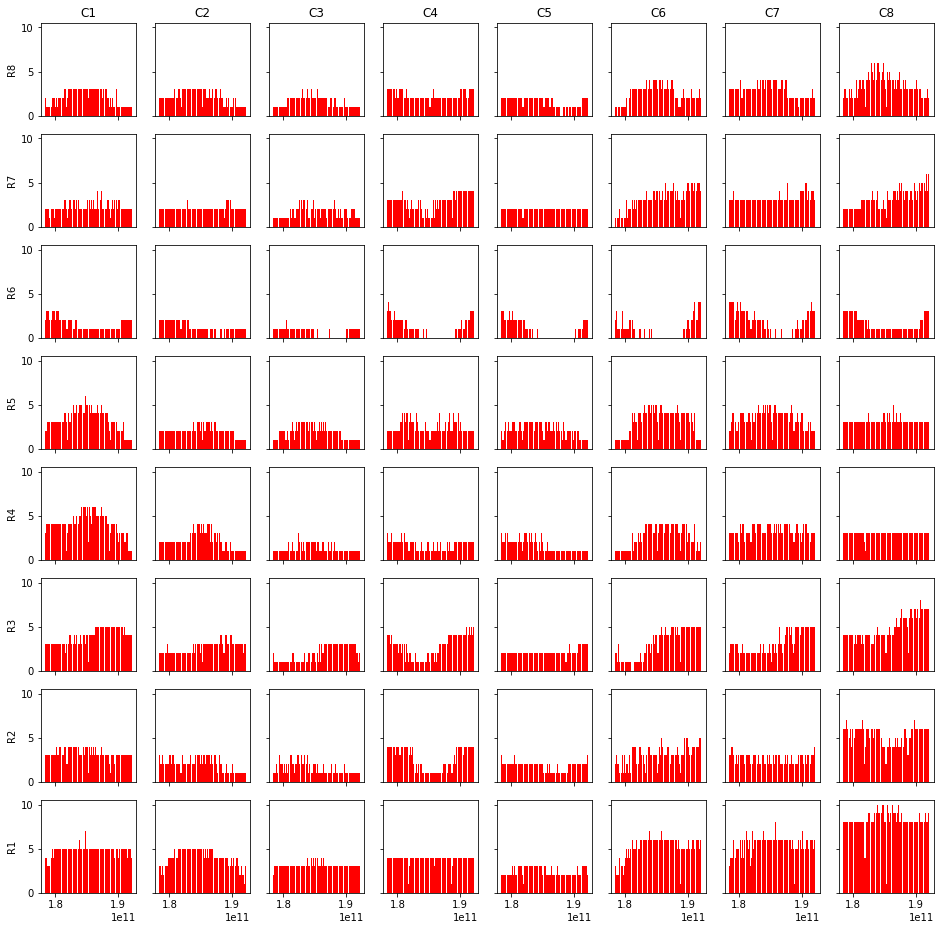

In [370]:
fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8), \
                  (ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16), \
                  (ax17, ax18, ax19, ax20, ax21, ax22, ax23, ax24), \
                  (ax25, ax26, ax27, ax28, ax29, ax30, ax31, ax32), \
                  (ax33, ax34, ax35, ax36, ax37, ax38, ax39, ax40), \
                  (ax41, ax42, ax43, ax44, ax45, ax46, ax47, ax48), \
                  (ax49, ax50, ax51, ax52, ax53, ax54, ax55, ax56), \
                  (ax57, ax58, ax59, ax60, ax61, ax62, ax63, ax64), \
                 )= plt.subplots(nrows = 8, ncols =8, figsize = (16, 16), sharex=True, sharey=True, facecolor='w')
for j in range(1,9):
    for k in range(1,9):
            globals()['ax'+str((64-(j*8))+k)].hist(globals()["Pt"+str(k)+"_R"+str(j)+"_TOA_array_100_2"], bins = 100, color='r')
#             print('R'+str(j),'C'+str(k),len(globals()["Pt"+str(k)+"_R"+str(j)+"_TOT_array"]))
            if j == 8: globals()['ax'+str((64-(j*8))+k)].set_title("C"+str(k)) 
            if k == 1: globals()['ax'+str((64-(j*8))+k)].set_ylabel("R"+str(j)) 
fig.savefig('100_2.png', bbox_inches='tight')

In [371]:
ToT_all_array_100_2 = []
ToTtotal_all_array_100_2 = []
for j in range(1,9):
    for k in range(1,9):
        # Create TOT arrays
        globals()["Pt"+str(j)+"_R"+str(k)+"_TOT_array_100_2"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_ToA_1450_1600_df_2"]['#ToT[arb]'].to_numpy())
#         globals()["Pt"+str(j)+"_R"+str(k)+"_TOTtotal_array"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy())
        ToA_all_array_100.append((globals()["Pt"+str(j)+"_R"+str(k)+"_ToA_1450_1600_df_2"]['#ToT[arb]'].to_numpy()))
#         ToAtotal_all_array.append((globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy()))

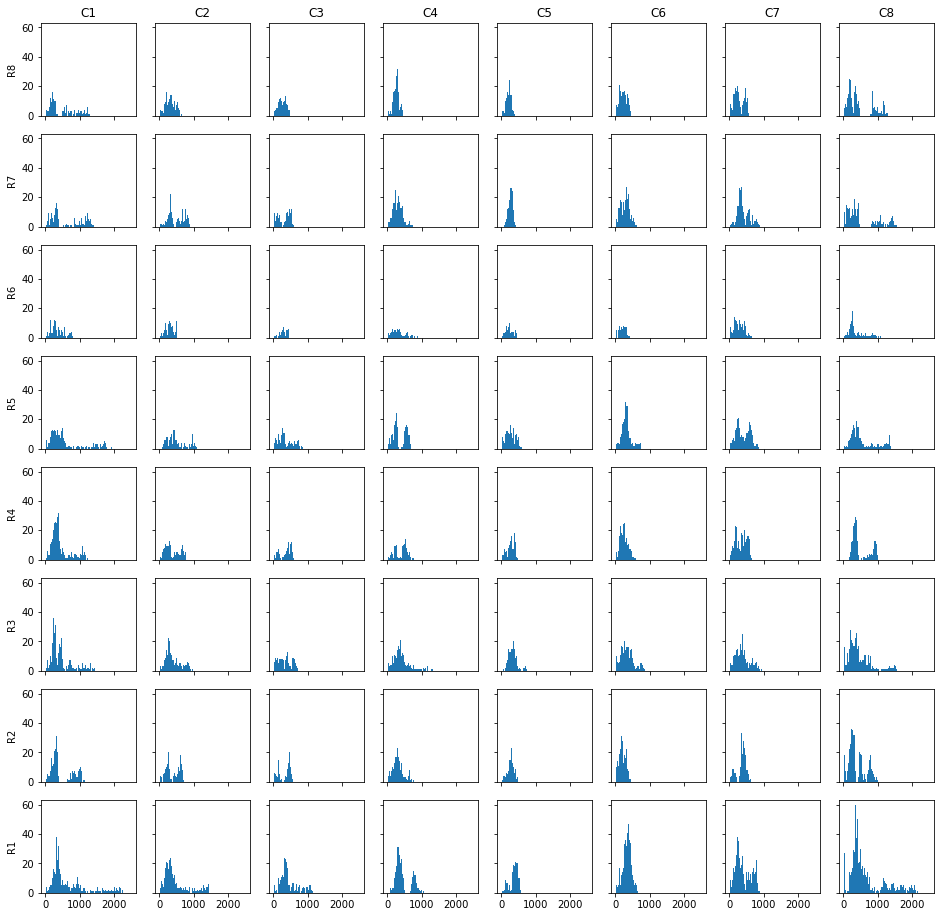

In [640]:
fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8), \
                  (ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16), \
                  (ax17, ax18, ax19, ax20, ax21, ax22, ax23, ax24), \
                  (ax25, ax26, ax27, ax28, ax29, ax30, ax31, ax32), \
                  (ax33, ax34, ax35, ax36, ax37, ax38, ax39, ax40), \
                  (ax41, ax42, ax43, ax44, ax45, ax46, ax47, ax48), \
                  (ax49, ax50, ax51, ax52, ax53, ax54, ax55, ax56), \
                  (ax57, ax58, ax59, ax60, ax61, ax62, ax63, ax64), \
                 )= plt.subplots(nrows = 8, ncols =8, figsize = (16, 16), sharex=True, sharey=True, facecolor='w')
for j in range(1,9):
    for k in range(1,9):
            globals()['ax'+str((64-(j*8))+k)].hist(globals()["Pt"+str(k)+"_R"+str(j)+"_TOT_array_100_2"], bins = 100, range=(0,2500))
#             print('R'+str(j),'C'+str(k),len(globals()["Pt"+str(k)+"_R"+str(j)+"_TOT_array"]))
            if j == 8: globals()['ax'+str((64-(j*8))+k)].set_title("C"+str(k)) 
            if k == 1: globals()['ax'+str((64-(j*8))+k)].set_ylabel("R"+str(j))
fig.savefig('ToT_100_2.png', bbox_inches='tight')

In [373]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt1_R1_ToA_1450_1600_df_3 = Pt1_R1_df.drop(Pt1_R1_df[(Pt1_R1_df['#ToA'] < ToAmin) | (Pt1_R1_df['#ToA'] > ToAmax)].index)

print(Pt1_R1_ToA_1450_1600_df_3.shape, type(Pt1_R1_ToA_1450_1600_df_3.iloc[0,0]), Pt1_R1_ToA_1450_1600_df_3.iloc[:1])

(303, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37210   153    68  192297405696        900            1775         NaN


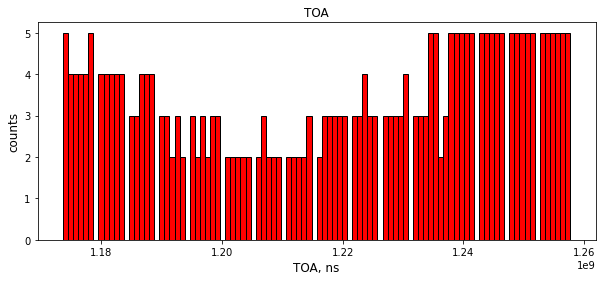

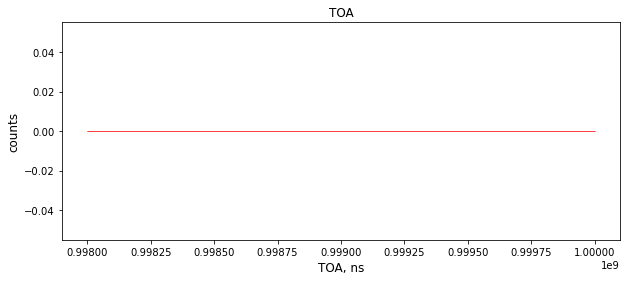

In [374]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R1_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R1_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

In [375]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt2_R1_ToA_1450_1600_df_3 = Pt2_R1_df.drop(Pt2_R1_df[(Pt2_R1_df['#ToA'] < ToAmin) | (Pt2_R1_df['#ToA'] > ToAmax)].index)

print(Pt2_R1_ToA_1450_1600_df_3.shape, type(Pt2_R1_ToA_1450_1600_df_3.iloc[0,0]), Pt2_R1_ToA_1450_1600_df_3.iloc[:1])

(189, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37269   153    74  192297406464        525             525         NaN


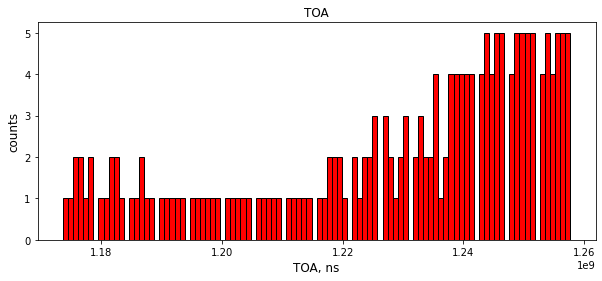

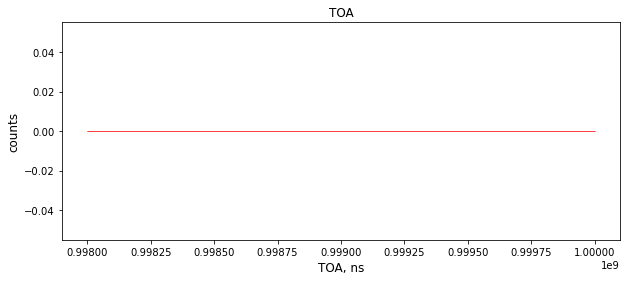

In [376]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R1_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R1_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [377]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt3_R1_ToA_1450_1600_df_3 = Pt3_R1_df.drop(Pt3_R1_df[(Pt3_R1_df['#ToA'] < ToAmin) | (Pt3_R1_df['#ToA'] > ToAmax)].index)

print(Pt3_R1_ToA_1450_1600_df_3.shape, type(Pt3_R1_ToA_1450_1600_df_3.iloc[0,0]), Pt3_R1_ToA_1450_1600_df_3.iloc[:1])

(230, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37265   153    79  192297406464        550             900         NaN


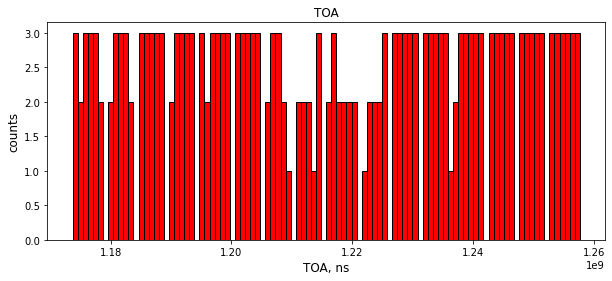

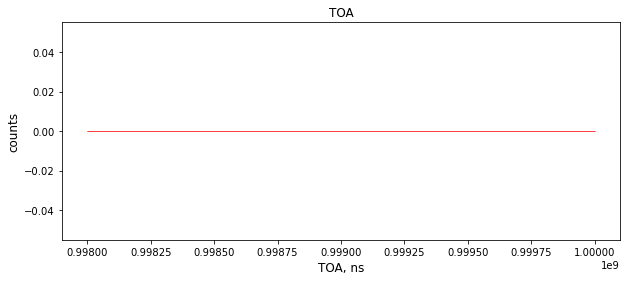

In [378]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R1_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R1_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [379]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt4_R1_ToA_1450_1600_df_3 = Pt4_R1_df.drop(Pt4_R1_df[(Pt4_R1_df['#ToA'] < ToAmin) | (Pt4_R1_df['#ToA'] > ToAmax)].index)

print(Pt4_R1_ToA_1450_1600_df_3.shape, type(Pt4_R1_ToA_1450_1600_df_3.iloc[0,0]), Pt4_R1_ToA_1450_1600_df_3.iloc[:1])

(347, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37162   153    85  192297405184       1125            2400         NaN


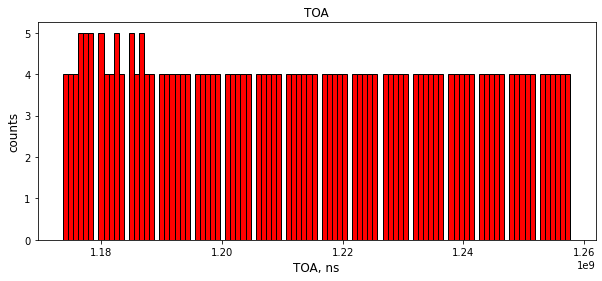

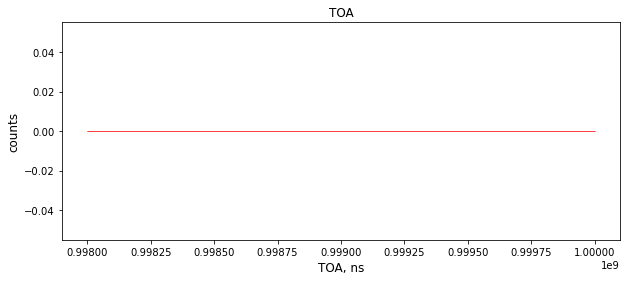

In [380]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R1_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R1_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [381]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt5_R1_ToA_1450_1600_df_3 = Pt5_R1_df.drop(Pt5_R1_df[(Pt5_R1_df['#ToA'] < ToAmin) | (Pt5_R1_df['#ToA'] > ToAmax)].index)

print(Pt5_R1_ToA_1450_1600_df_3.shape, type(Pt5_R1_ToA_1450_1600_df_3.iloc[0,0]), Pt5_R1_ToA_1450_1600_df_3.iloc[:1])

(239, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37246   153    90  192297406208        575            1125         NaN


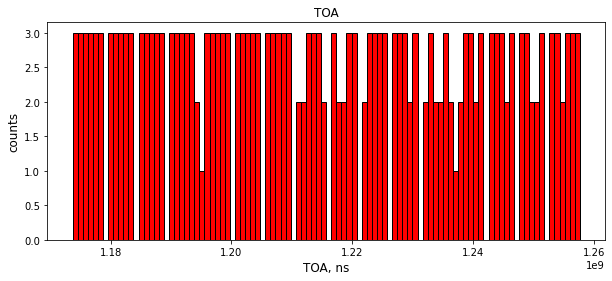

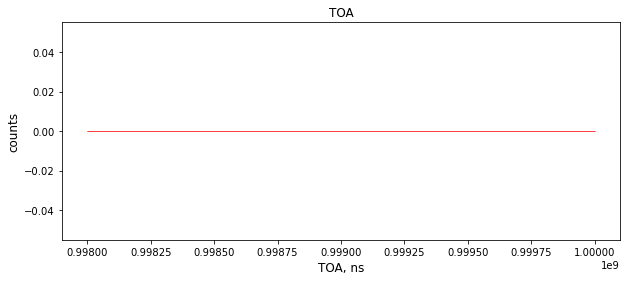

In [382]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R1_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R1_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [383]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt6_R1_ToA_1450_1600_df_3 = Pt6_R1_df.drop(Pt6_R1_df[(Pt6_R1_df['#ToA'] < ToAmin) | (Pt6_R1_df['#ToA'] > ToAmax)].index)

print(Pt6_R1_ToA_1450_1600_df_3.shape, type(Pt6_R1_ToA_1450_1600_df_3.iloc[0,0]), Pt6_R1_ToA_1450_1600_df_3.iloc[:1])

(377, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37195   154   100  192297405952        300            2275         NaN


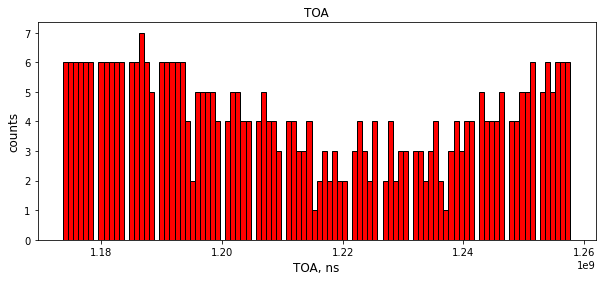

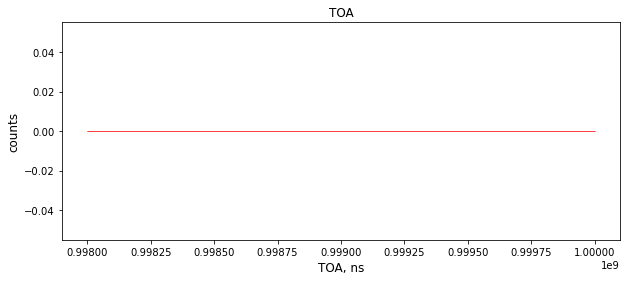

In [384]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R1_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R1_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [385]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt7_R1_ToA_1450_1600_df_3 = Pt7_R1_df.drop(Pt7_R1_df[(Pt7_R1_df['#ToA'] < ToAmin) | (Pt7_R1_df['#ToA'] > ToAmax)].index)

print(Pt7_R1_ToA_1450_1600_df_3.shape, type(Pt7_R1_ToA_1450_1600_df_3.iloc[0,0]), Pt7_R1_ToA_1450_1600_df_3.iloc[:1])

(431, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37194   154   101  192297405440        700            2275         NaN


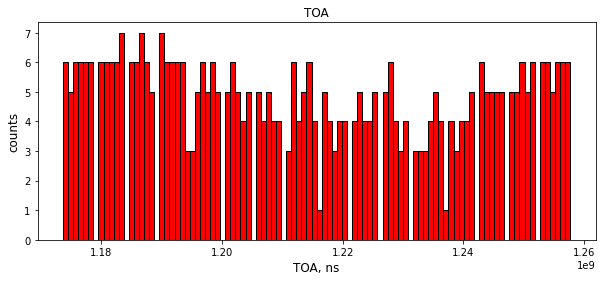

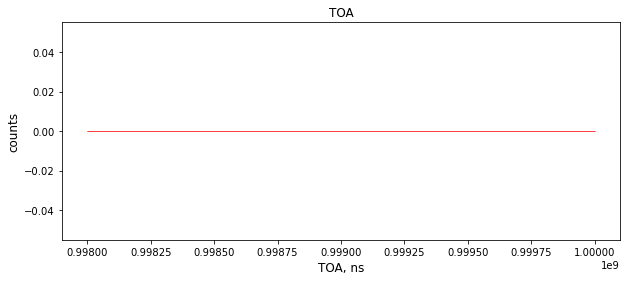

In [386]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R1_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R1_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [387]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt8_R1_ToA_1450_1600_df_3 = Pt8_R1_df.drop(Pt8_R1_df[(Pt8_R1_df['#ToA'] < ToAmin) | (Pt8_R1_df['#ToA'] > ToAmax)].index)

print(Pt8_R1_ToA_1450_1600_df_3.shape, type(Pt8_R1_ToA_1450_1600_df_3.iloc[0,0]), Pt8_R1_ToA_1450_1600_df_3.iloc[:1])

(682, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37154   154   106  192297404928       1175            5400         NaN


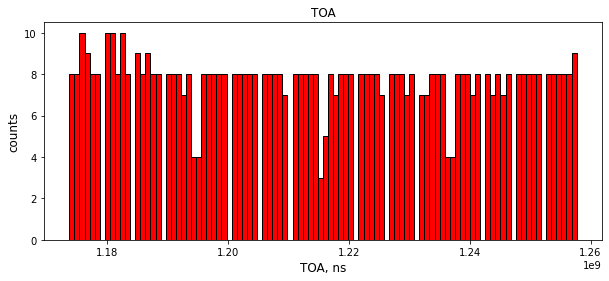

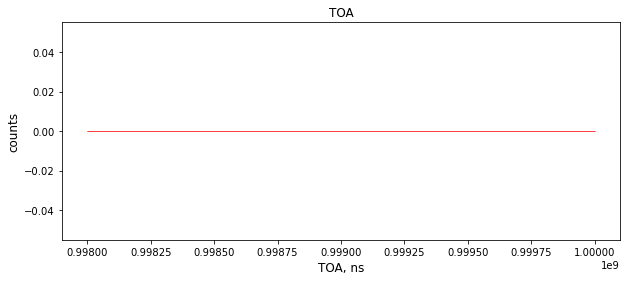

In [388]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R1_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R1_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [389]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt1_R2_ToA_1450_1600_df_3 = Pt1_R2_df.drop(Pt1_R2_df[(Pt1_R2_df['#ToA'] < ToAmin) | (Pt1_R2_df['#ToA'] > ToAmax)].index)

print(Pt1_R2_ToA_1450_1600_df_3.shape, type(Pt1_R2_ToA_1450_1600_df_3.iloc[0,0]), Pt1_R2_ToA_1450_1600_df_3.iloc[:1])

(250, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37232   158    68  192297405952        700            1075         NaN


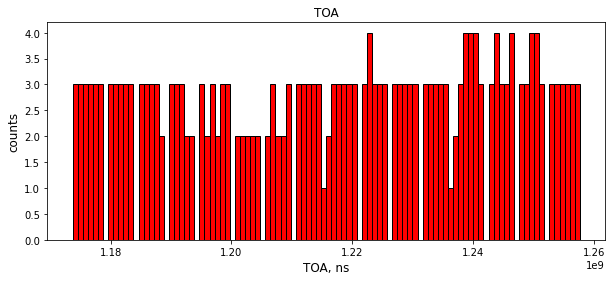

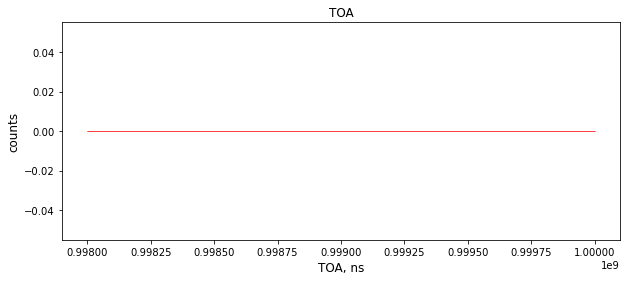

In [390]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R2_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R2_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [391]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt2_R2_ToA_1450_1600_df_3 = Pt2_R2_df.drop(Pt2_R2_df[(Pt2_R2_df['#ToA'] < ToAmin) | (Pt2_R2_df['#ToA'] > ToAmax)].index)

print(Pt2_R2_ToA_1450_1600_df_3.shape, type(Pt2_R2_ToA_1450_1600_df_3.iloc[0,0]), Pt2_R2_ToA_1450_1600_df_3.iloc[:1])

(132, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37311   158    74  192297407488        350             350         NaN


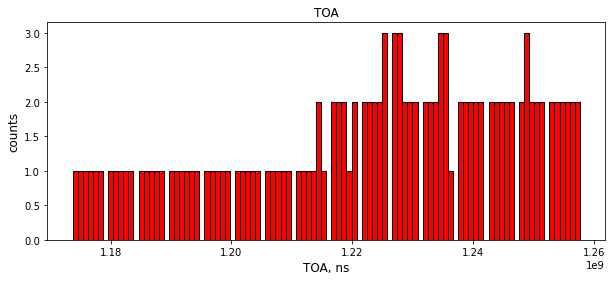

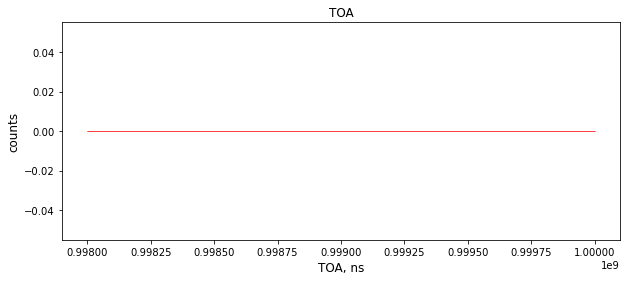

In [392]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R2_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R2_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [393]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt3_R2_ToA_1450_1600_df_3 = Pt3_R2_df.drop(Pt3_R2_df[(Pt3_R2_df['#ToA'] < ToAmin) | (Pt3_R2_df['#ToA'] > ToAmax)].index)

print(Pt3_R2_ToA_1450_1600_df_3.shape, type(Pt3_R2_ToA_1450_1600_df_3.iloc[0,0]), Pt3_R2_ToA_1450_1600_df_3.iloc[:1])

(167, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37306   158    79  192297407232        400             400         NaN


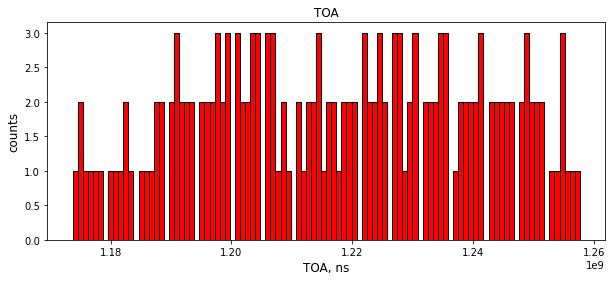

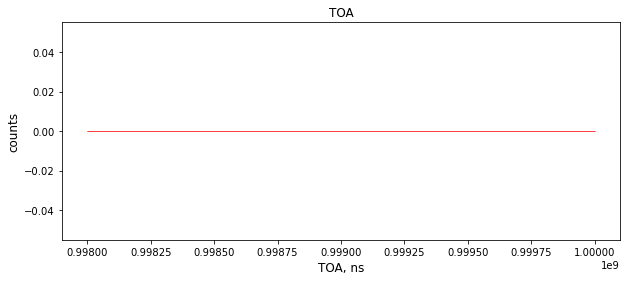

In [394]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R2_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R2_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [395]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt4_R2_ToA_1450_1600_df_3 = Pt4_R2_df.drop(Pt4_R2_df[(Pt4_R2_df['#ToA'] < ToAmin) | (Pt4_R2_df['#ToA'] > ToAmax)].index)

print(Pt4_R2_ToA_1450_1600_df_3.shape, type(Pt4_R2_ToA_1450_1600_df_3.iloc[0,0]), Pt4_R2_ToA_1450_1600_df_3.iloc[:1])

(316, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37235   158    85  192297405952        675            1625         NaN


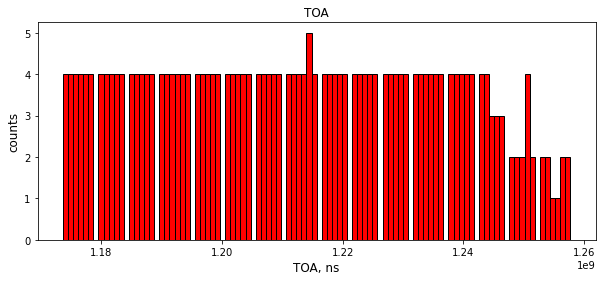

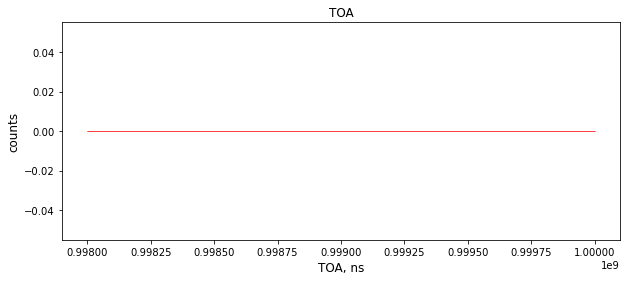

In [396]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R2_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R2_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [397]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt5_R2_ToA_1450_1600_df_3 = Pt5_R2_df.drop(Pt5_R2_df[(Pt5_R2_df['#ToA'] < ToAmin) | (Pt5_R2_df['#ToA'] > ToAmax)].index)

print(Pt5_R2_ToA_1450_1600_df_3.shape, type(Pt5_R2_ToA_1450_1600_df_3.iloc[0,0]), Pt5_R2_ToA_1450_1600_df_3.iloc[:1])

(221, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37300   158    90  192297406976        425             750         NaN


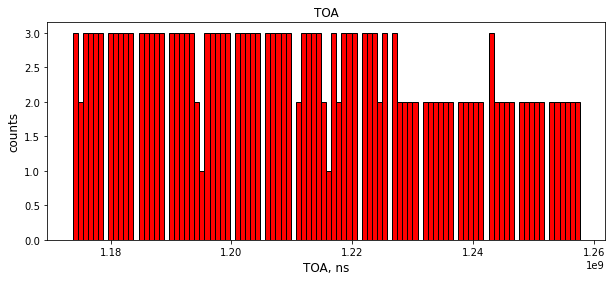

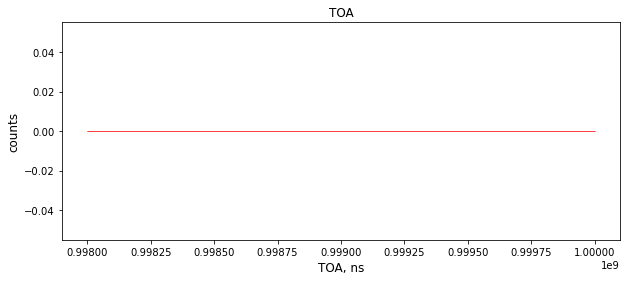

In [398]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R2_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R2_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [399]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt6_R2_ToA_1450_1600_df_3 = Pt6_R2_df.drop(Pt6_R2_df[(Pt6_R2_df['#ToA'] < ToAmin) | (Pt6_R2_df['#ToA'] > ToAmax)].index)

print(Pt6_R2_ToA_1450_1600_df_3.shape, type(Pt6_R2_ToA_1450_1600_df_3.iloc[0,0]), Pt6_R2_ToA_1450_1600_df_3.iloc[:1])

(350, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37245   159   100  192297408512        175            1100         NaN


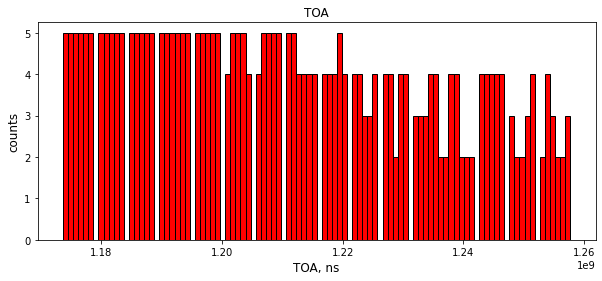

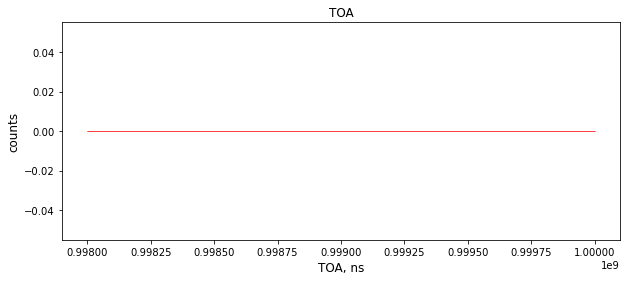

In [400]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R2_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R2_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [401]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt7_R2_ToA_1450_1600_df_3 = Pt7_R2_df.drop(Pt7_R2_df[(Pt7_R2_df['#ToA'] < ToAmin) | (Pt7_R2_df['#ToA'] > ToAmax)].index)

print(Pt7_R2_ToA_1450_1600_df_3.shape, type(Pt7_R2_ToA_1450_1600_df_3.iloc[0,0]), Pt7_R2_ToA_1450_1600_df_3.iloc[:1])

(360, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37243   159   101  192297406208        500            1100         NaN


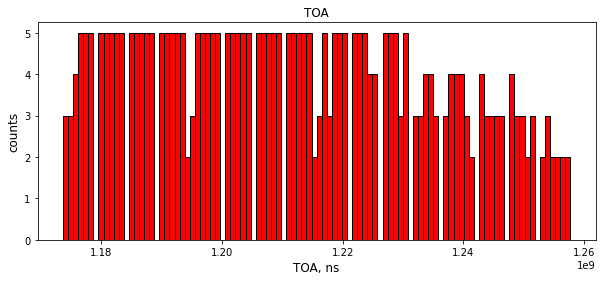

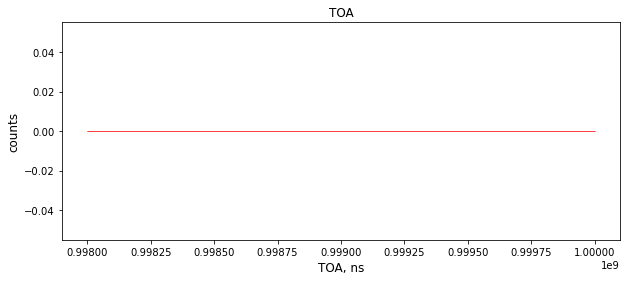

In [402]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R2_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R2_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [403]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt8_R2_ToA_1450_1600_df_3 = Pt8_R2_df.drop(Pt8_R2_df[(Pt8_R2_df['#ToA'] < ToAmin) | (Pt8_R2_df['#ToA'] > ToAmax)].index)

print(Pt8_R2_ToA_1450_1600_df_3.shape, type(Pt8_R2_ToA_1450_1600_df_3.iloc[0,0]), Pt8_R2_ToA_1450_1600_df_3.iloc[:1])

(560, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37183   159   106  192297405440        625            2675         NaN


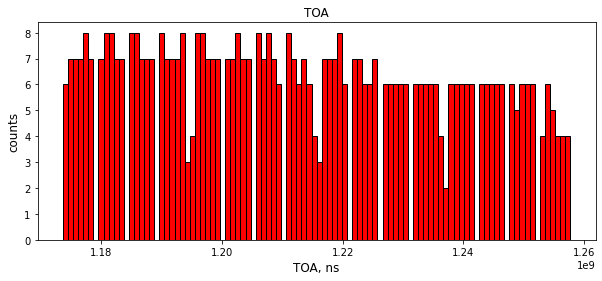

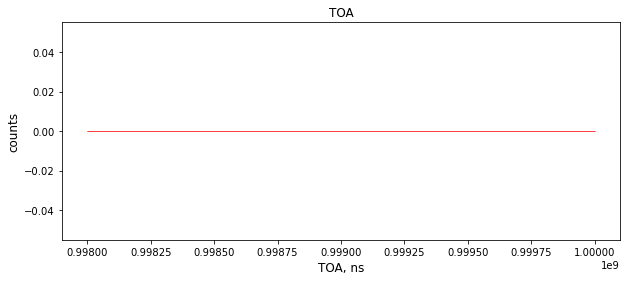

In [404]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R2_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R2_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [405]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt1_R3_ToA_1450_1600_df_3 = Pt1_R3_df.drop(Pt1_R3_df[(Pt1_R3_df['#ToA'] < ToAmin) | (Pt1_R3_df['#ToA'] > ToAmax)].index)

print(Pt1_R3_ToA_1450_1600_df_3.shape, type(Pt1_R3_ToA_1450_1600_df_3.iloc[0,0]), Pt1_R3_ToA_1450_1600_df_3.iloc[:1])

(260, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37200   163    68  192297405440        925            1725         NaN


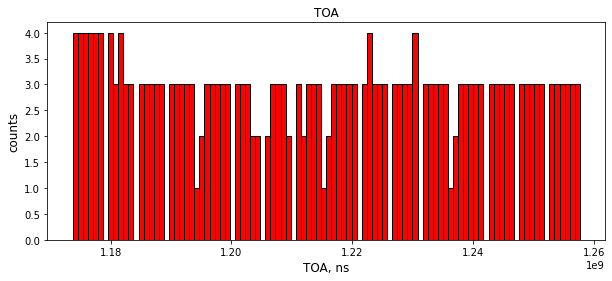

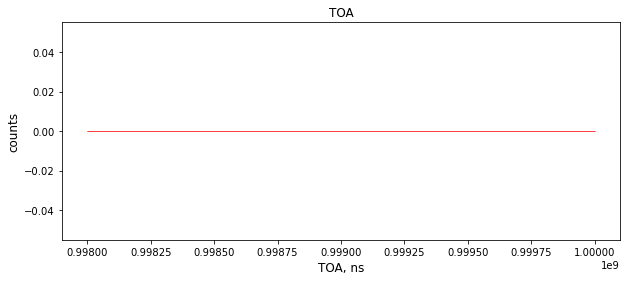

In [406]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R3_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R3_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [407]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt2_R3_ToA_1450_1600_df_3 = Pt2_R3_df.drop(Pt2_R3_df[(Pt2_R3_df['#ToA'] < ToAmin) | (Pt2_R3_df['#ToA'] > ToAmax)].index)

print(Pt2_R3_ToA_1450_1600_df_3.shape, type(Pt2_R3_ToA_1450_1600_df_3.iloc[0,0]), Pt2_R3_ToA_1450_1600_df_3.iloc[:1])

(148, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37252   163    74  192297406208        600            1025         NaN


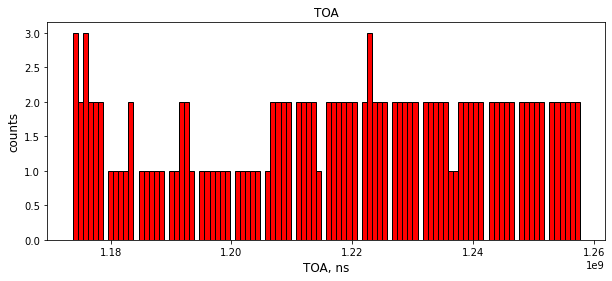

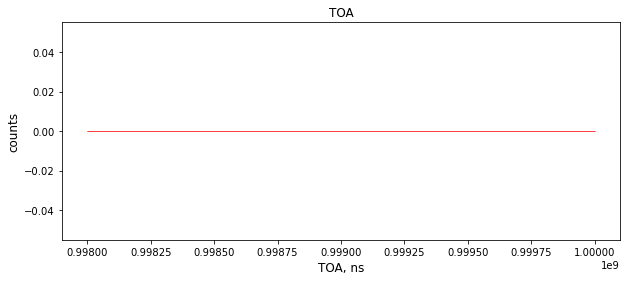

In [408]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R3_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R3_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [409]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt3_R3_ToA_1450_1600_df_3 = Pt3_R3_df.drop(Pt3_R3_df[(Pt3_R3_df['#ToA'] < ToAmin) | (Pt3_R3_df['#ToA'] > ToAmax)].index)

print(Pt3_R3_ToA_1450_1600_df_3.shape, type(Pt3_R3_ToA_1450_1600_df_3.iloc[0,0]), Pt3_R3_ToA_1450_1600_df_3.iloc[:1])

(121, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37277   163    79  192297406720        500             650         NaN


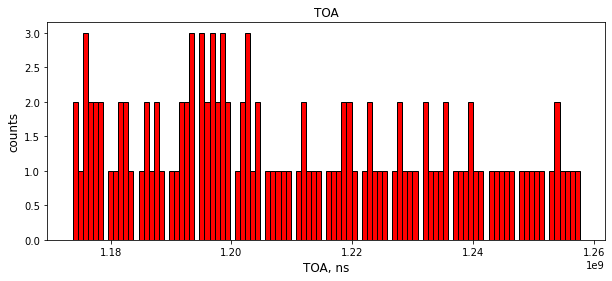

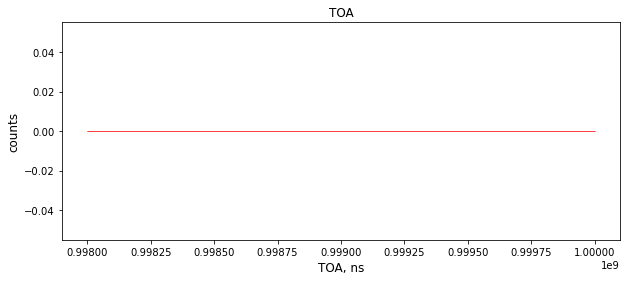

In [410]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R3_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R3_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [411]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt4_R3_ToA_1450_1600_df_3 = Pt4_R3_df.drop(Pt4_R3_df[(Pt4_R3_df['#ToA'] < ToAmin) | (Pt4_R3_df['#ToA'] > ToAmax)].index)

print(Pt4_R3_ToA_1450_1600_df_3.shape, type(Pt4_R3_ToA_1450_1600_df_3.iloc[0,0]), Pt4_R3_ToA_1450_1600_df_3.iloc[:1])

(306, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37178   163    85  192297405184       1200            2750         NaN


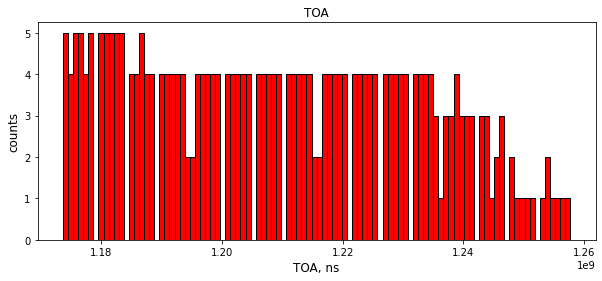

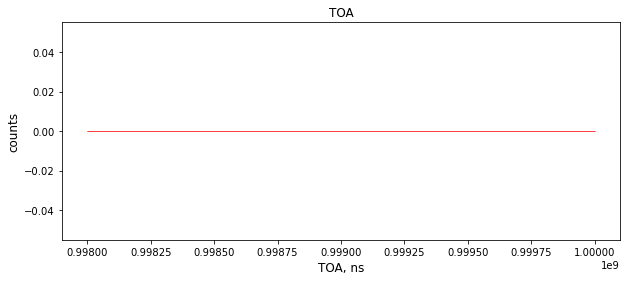

In [412]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R3_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R3_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [413]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt5_R3_ToA_1450_1600_df_3 = Pt5_R3_df.drop(Pt5_R3_df[(Pt5_R3_df['#ToA'] < ToAmin) | (Pt5_R3_df['#ToA'] > ToAmax)].index)

print(Pt5_R3_ToA_1450_1600_df_3.shape, type(Pt5_R3_ToA_1450_1600_df_3.iloc[0,0]), Pt5_R3_ToA_1450_1600_df_3.iloc[:1])

(217, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37229   163    90  192297405952        775            1475         NaN


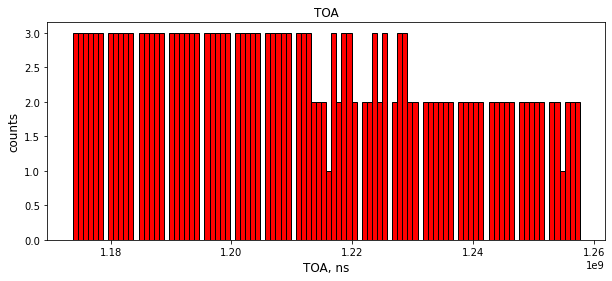

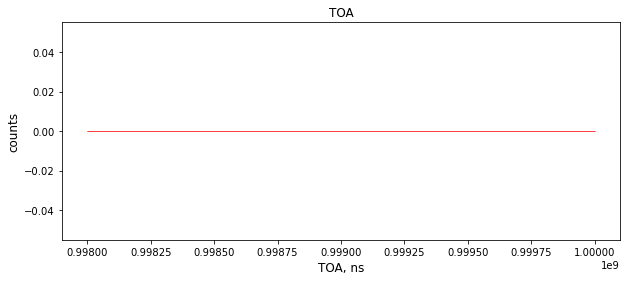

In [414]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R3_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R3_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [415]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt6_R3_ToA_1450_1600_df_3 = Pt6_R3_df.drop(Pt6_R3_df[(Pt6_R3_df['#ToA'] < ToAmin) | (Pt6_R3_df['#ToA'] > ToAmax)].index)

print(Pt6_R3_ToA_1450_1600_df_3.shape, type(Pt6_R3_ToA_1450_1600_df_3.iloc[0,0]), Pt6_R3_ToA_1450_1600_df_3.iloc[:1])

(301, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37193   164   100  192297411072        175            2450         NaN


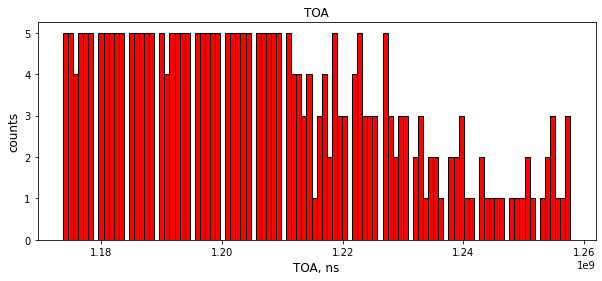

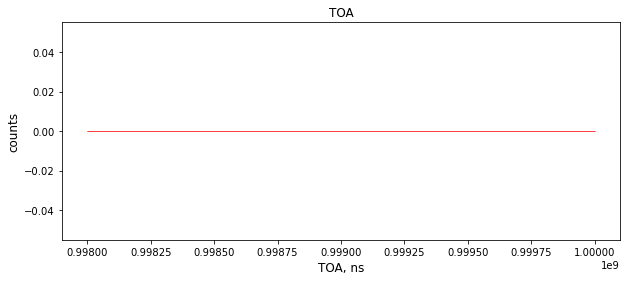

In [416]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R3_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R3_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [417]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt7_R3_ToA_1450_1600_df_3 = Pt7_R3_df.drop(Pt7_R3_df[(Pt7_R3_df['#ToA'] < ToAmin) | (Pt7_R3_df['#ToA'] > ToAmax)].index)

print(Pt7_R3_ToA_1450_1600_df_3.shape, type(Pt7_R3_ToA_1450_1600_df_3.iloc[0,0]), Pt7_R3_ToA_1450_1600_df_3.iloc[:1])

(316, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37189   163   101  192297405440        875            2450         NaN


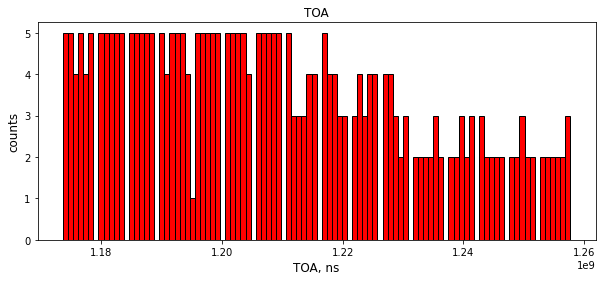

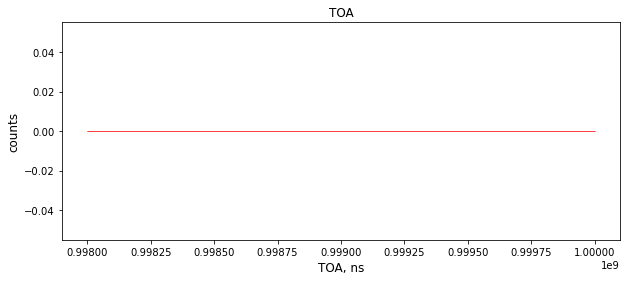

In [418]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R3_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R3_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [419]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt8_R3_ToA_1450_1600_df_3 = Pt8_R3_df.drop(Pt8_R3_df[(Pt8_R3_df['#ToA'] < ToAmin) | (Pt8_R3_df['#ToA'] > ToAmax)].index)

print(Pt8_R3_ToA_1450_1600_df_3.shape, type(Pt8_R3_ToA_1450_1600_df_3.iloc[0,0]), Pt8_R3_ToA_1450_1600_df_3.iloc[:1])

(432, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37171   164   106  192297405184        775            3750         NaN


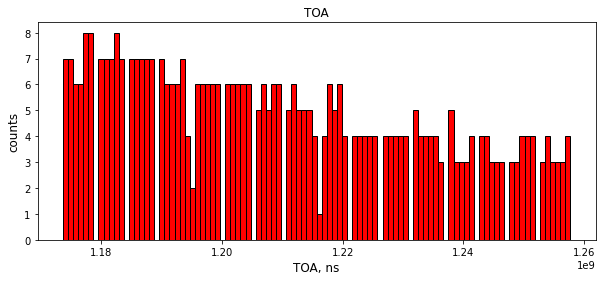

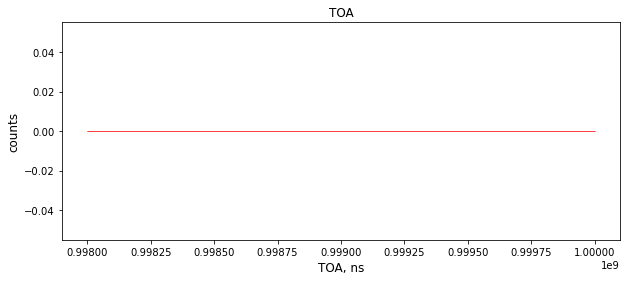

In [420]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R3_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R3_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [421]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt1_R4_ToA_1450_1600_df_3 = Pt1_R4_df.drop(Pt1_R4_df[(Pt1_R4_df['#ToA'] < ToAmin) | (Pt1_R4_df['#ToA'] > ToAmax)].index)

print(Pt1_R4_ToA_1450_1600_df_3.shape, type(Pt1_R4_ToA_1450_1600_df_3.iloc[0,0]), Pt1_R4_ToA_1450_1600_df_3.iloc[:1])

(197, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37292   168    68  192297406976        375             375         NaN


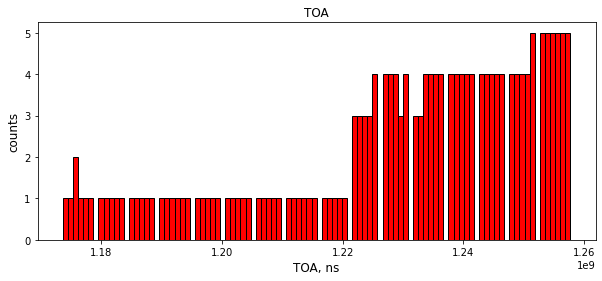

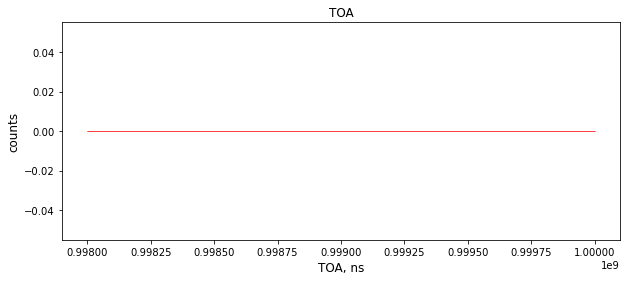

In [422]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R4_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R4_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [423]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt2_R4_ToA_1450_1600_df_3 = Pt2_R4_df.drop(Pt2_R4_df[(Pt2_R4_df['#ToA'] < ToAmin) | (Pt2_R4_df['#ToA'] > ToAmax)].index)

print(Pt2_R4_ToA_1450_1600_df_3.shape, type(Pt2_R4_ToA_1450_1600_df_3.iloc[0,0]))
print( Pt2_R4_ToA_1450_1600_df_3.iloc[:1])

(120, 6) <class 'numpy.int64'>
       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37324   168    74  192297409024        275             275         NaN


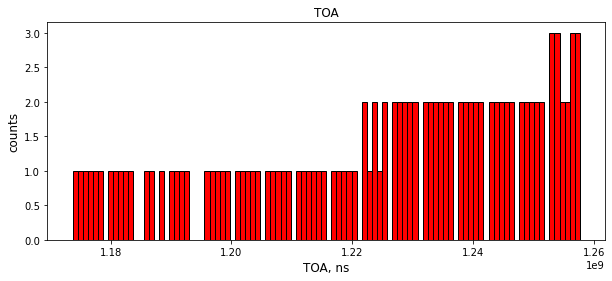

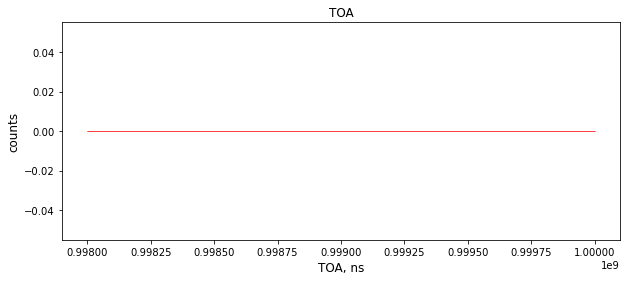

In [424]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R4_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R4_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [425]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt3_R4_ToA_1450_1600_df_3 = Pt3_R4_df.drop(Pt3_R4_df[(Pt3_R4_df['#ToA'] < ToAmin) | (Pt3_R4_df['#ToA'] > ToAmax)].index)

print(Pt3_R4_ToA_1450_1600_df_3.shape, type(Pt3_R4_ToA_1450_1600_df_3.iloc[0,0]), Pt3_R4_ToA_1450_1600_df_3.iloc[:1])

(92, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37326   168    79  192297409280        200             200         NaN


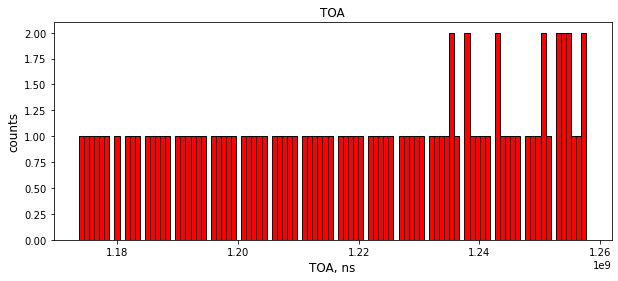

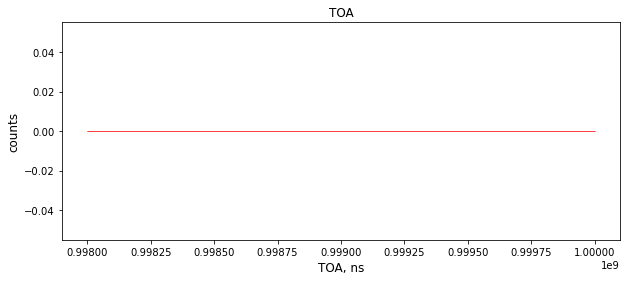

In [426]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R4_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R4_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [427]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt4_R4_ToA_1450_1600_df_3 = Pt4_R4_df.drop(Pt4_R4_df[(Pt4_R4_df['#ToA'] < ToAmin) | (Pt4_R4_df['#ToA'] > ToAmax)].index)

print(Pt4_R4_ToA_1450_1600_df_3.shape, type(Pt4_R4_ToA_1450_1600_df_3.iloc[0,0]), Pt4_R4_ToA_1450_1600_df_3.iloc[:1])

(230, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37281   168    85  192297406720        525             650         NaN


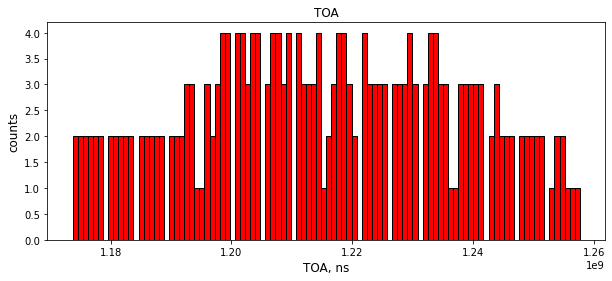

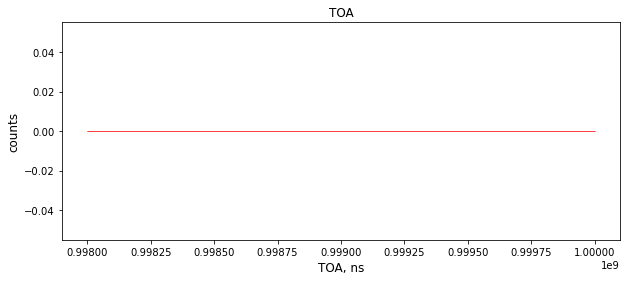

In [428]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R4_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R4_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [429]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt5_R4_ToA_1450_1600_df_3 = Pt5_R4_df.drop(Pt5_R4_df[(Pt5_R4_df['#ToA'] < ToAmin) | (Pt5_R4_df['#ToA'] > ToAmax)].index)

print(Pt5_R4_ToA_1450_1600_df_3.shape, type(Pt5_R4_ToA_1450_1600_df_3.iloc[0,0]), Pt5_R4_ToA_1450_1600_df_3.iloc[:1])

(170, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37319   168    90  192297408256        275             275         NaN


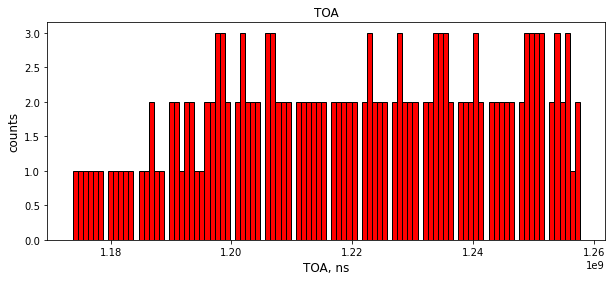

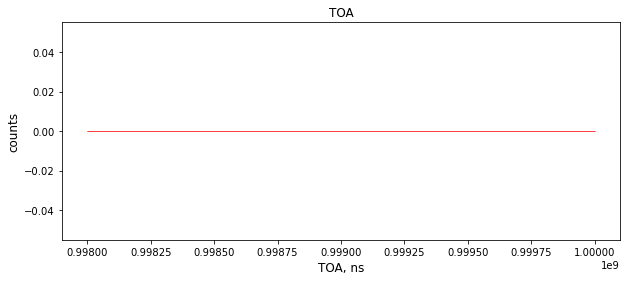

In [430]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R4_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R4_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [431]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt6_R4_ToA_1450_1600_df_3 = Pt6_R4_df.drop(Pt6_R4_df[(Pt6_R4_df['#ToA'] < ToAmin) | (Pt6_R4_df['#ToA'] > ToAmax)].index)

print(Pt6_R4_ToA_1450_1600_df_3.shape, type(Pt6_R4_ToA_1450_1600_df_3.iloc[0,0]), Pt6_R4_ToA_1450_1600_df_3.iloc[:1])

(98, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37313   168    96  192297407744        275             450         NaN


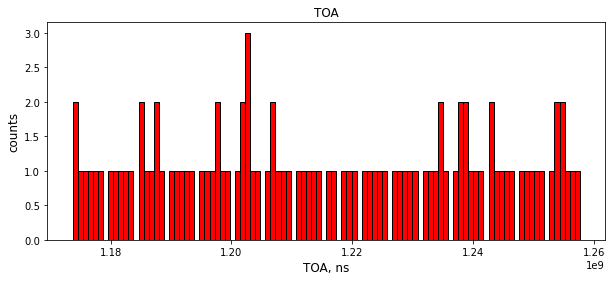

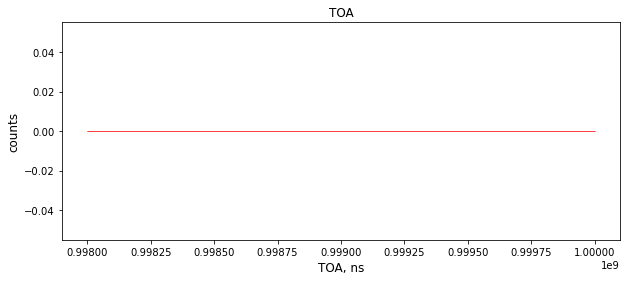

In [432]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R4_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R4_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [433]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt7_R4_ToA_1450_1600_df_3 = Pt7_R4_df.drop(Pt7_R4_df[(Pt7_R4_df['#ToA'] < ToAmin) | (Pt7_R4_df['#ToA'] > ToAmax)].index)

print(Pt7_R4_ToA_1450_1600_df_3.shape, type(Pt7_R4_ToA_1450_1600_df_3.iloc[0,0]), Pt7_R4_ToA_1450_1600_df_3.iloc[:1])

(242, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37272   168   101  192297406464        500             800         NaN


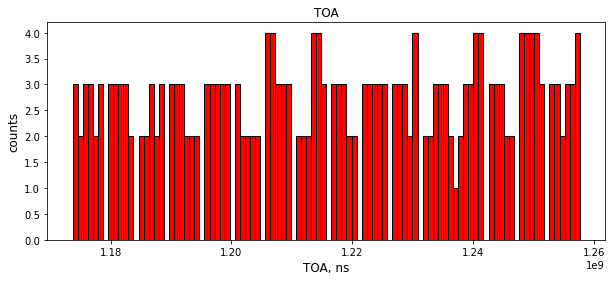

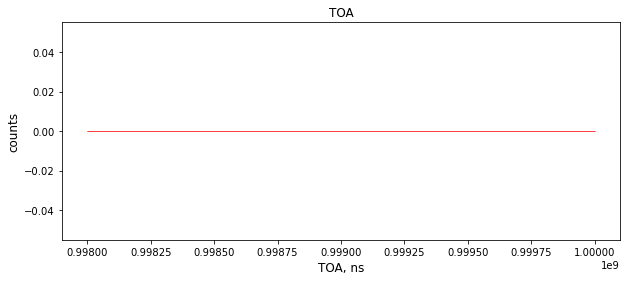

In [434]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R4_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R4_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [435]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt8_R4_ToA_1450_1600_df_3 = Pt8_R4_df.drop(Pt8_R4_df[(Pt8_R4_df['#ToA'] < ToAmin) | (Pt8_R4_df['#ToA'] > ToAmax)].index)

print(Pt8_R4_ToA_1450_1600_df_3.shape, type(Pt8_R4_ToA_1450_1600_df_3.iloc[0,0]), Pt8_R4_ToA_1450_1600_df_3.iloc[:1])

(254, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37283   169   107  192297406720        575            1025         NaN


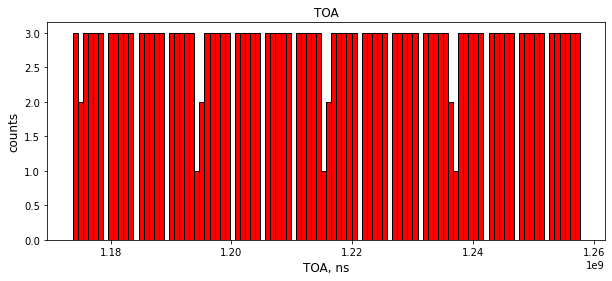

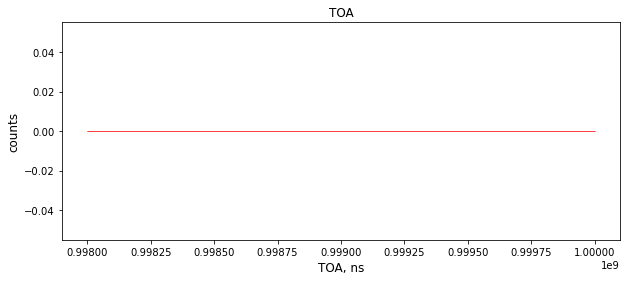

In [436]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R4_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R4_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [437]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt1_R5_ToA_1450_1600_df_3 = Pt1_R5_df.drop(Pt1_R5_df[(Pt1_R5_df['#ToA'] < ToAmin) | (Pt1_R5_df['#ToA'] > ToAmax)].index)

print(Pt1_R5_ToA_1450_1600_df_3.shape, type(Pt1_R5_ToA_1450_1600_df_3.iloc[0,0]), Pt1_R5_ToA_1450_1600_df_3.iloc[:1])

(152, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37312   173    68  192297407488        350             350         NaN


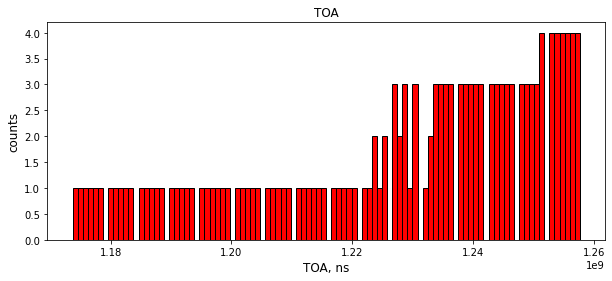

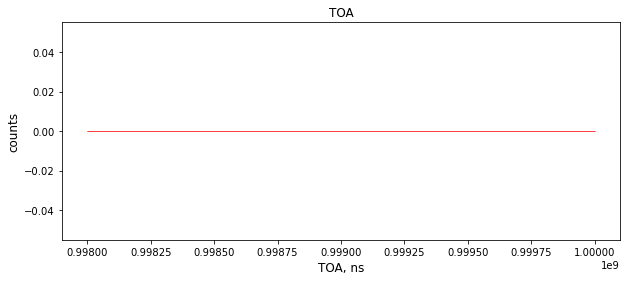

In [438]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R5_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R5_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [439]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt2_R5_ToA_1450_1600_df_3 = Pt2_R5_df.drop(Pt2_R5_df[(Pt2_R5_df['#ToA'] < ToAmin) | (Pt2_R5_df['#ToA'] > ToAmax)].index)

print(Pt2_R5_ToA_1450_1600_df_3.shape, type(Pt2_R5_ToA_1450_1600_df_3.iloc[0,0]), Pt2_R5_ToA_1450_1600_df_3.iloc[:1])

(92, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37323   173    74  192297409024        175             175         NaN


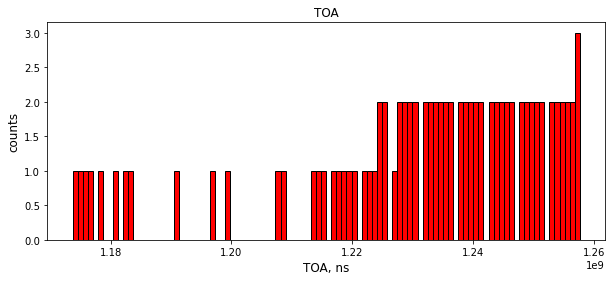

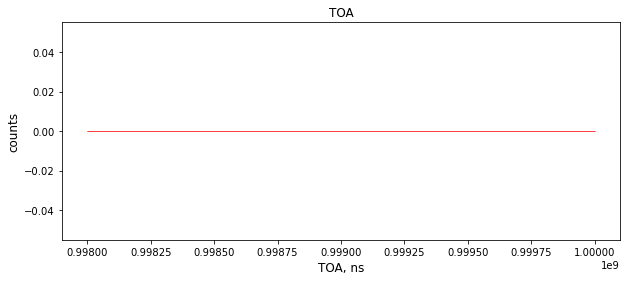

In [440]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R5_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R5_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [441]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt3_R5_ToA_1450_1600_df_3 = Pt3_R5_df.drop(Pt3_R5_df[(Pt3_R5_df['#ToA'] < ToAmin) | (Pt3_R5_df['#ToA'] > ToAmax)].index)

print(Pt3_R5_ToA_1450_1600_df_3.shape, type(Pt3_R5_ToA_1450_1600_df_3.iloc[0,0]), Pt3_R5_ToA_1450_1600_df_3.iloc[:1])

(86, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37332   173    79  192297414656        150             150         NaN


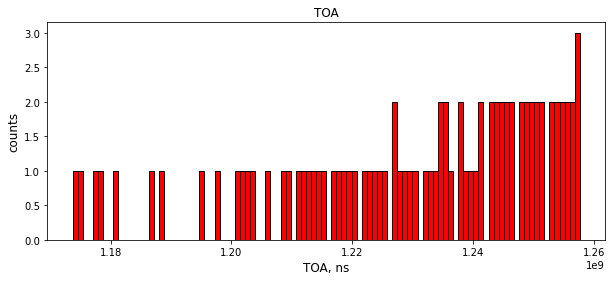

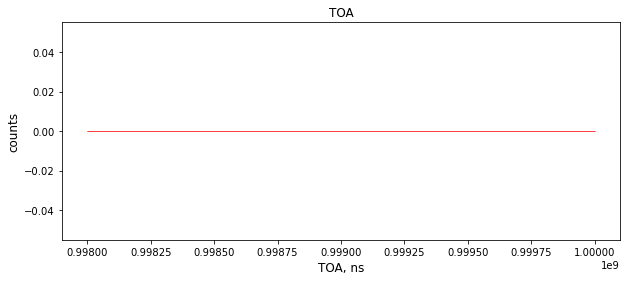

In [442]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R5_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R5_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [443]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt4_R5_ToA_1450_1600_df_3 = Pt4_R5_df.drop(Pt4_R5_df[(Pt4_R5_df['#ToA'] < ToAmin) | (Pt4_R5_df['#ToA'] > ToAmax)].index)

print(Pt4_R5_ToA_1450_1600_df_3.shape, type(Pt4_R5_ToA_1450_1600_df_3.iloc[0,0]), Pt4_R5_ToA_1450_1600_df_3.iloc[:1])

(197, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37279   173    85  192297406720        450             700         NaN


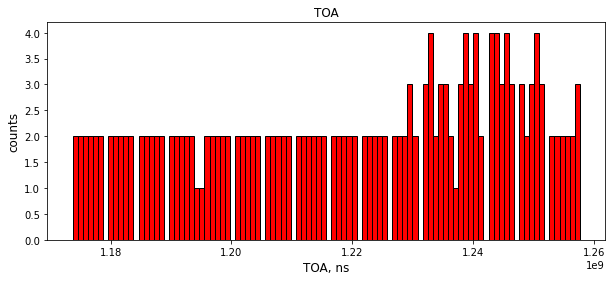

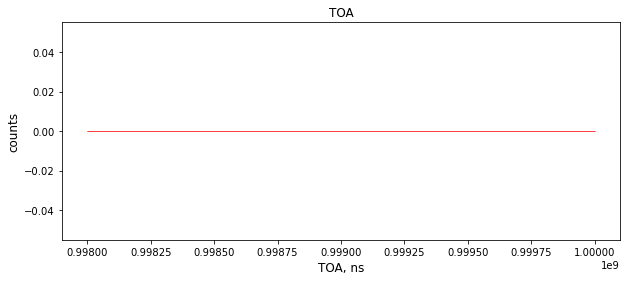

In [444]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R5_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R5_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [445]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt5_R5_ToA_1450_1600_df_3 = Pt5_R5_df.drop(Pt5_R5_df[(Pt5_R5_df['#ToA'] < ToAmin) | (Pt5_R5_df['#ToA'] > ToAmax)].index)

print(Pt5_R5_ToA_1450_1600_df_3.shape, type(Pt5_R5_ToA_1450_1600_df_3.iloc[0,0]), Pt5_R5_ToA_1450_1600_df_3.iloc[:1])

(147, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37322   173    90  192297409024        250             250         NaN


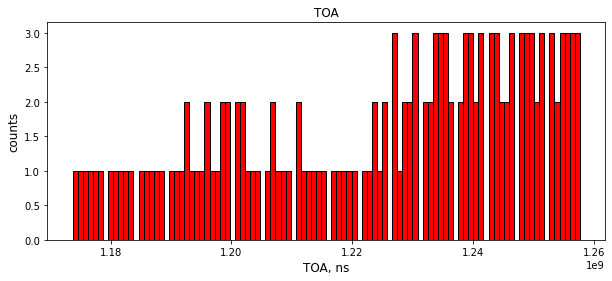

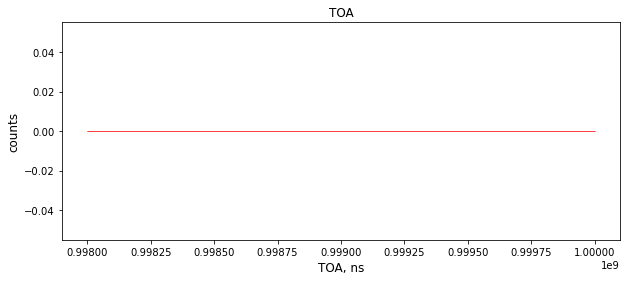

In [446]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R5_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R5_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [447]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt6_R5_ToA_1450_1600_df_3 = Pt6_R5_df.drop(Pt6_R5_df[(Pt6_R5_df['#ToA'] < ToAmin) | (Pt6_R5_df['#ToA'] > ToAmax)].index)

print(Pt6_R5_ToA_1450_1600_df_3.shape, type(Pt6_R5_ToA_1450_1600_df_3.iloc[0,0]), Pt6_R5_ToA_1450_1600_df_3.iloc[:1])

(103, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37321   173    96  192297408768        300             300         NaN


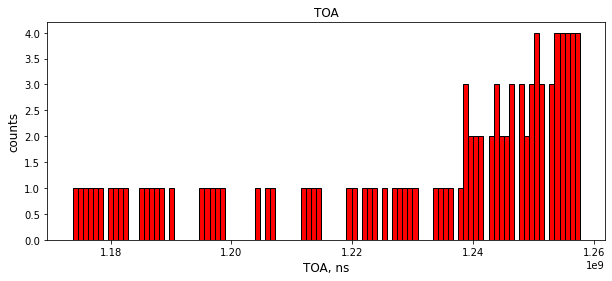

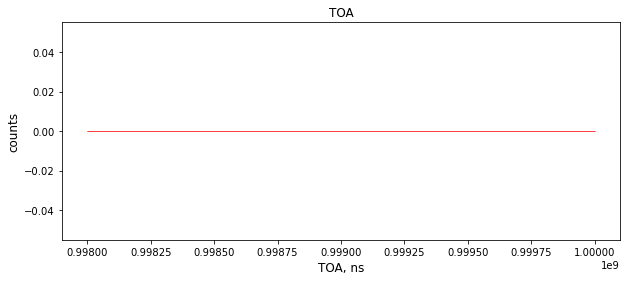

In [448]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R5_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R5_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [449]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt7_R5_ToA_1450_1600_df_3 = Pt7_R5_df.drop(Pt7_R5_df[(Pt7_R5_df['#ToA'] < ToAmin) | (Pt7_R5_df['#ToA'] > ToAmax)].index)

print(Pt7_R5_ToA_1450_1600_df_3.shape, type(Pt7_R5_ToA_1450_1600_df_3.iloc[0,0]), Pt7_R5_ToA_1450_1600_df_3.iloc[:1])

(215, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37286   173   101  192297406976        425             625         NaN


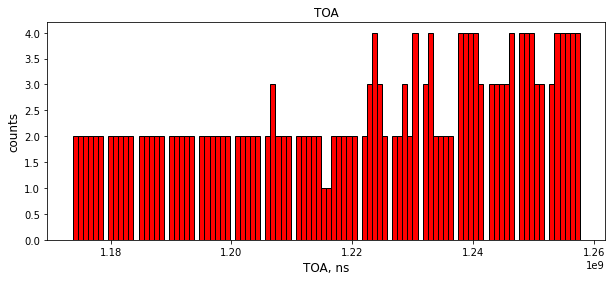

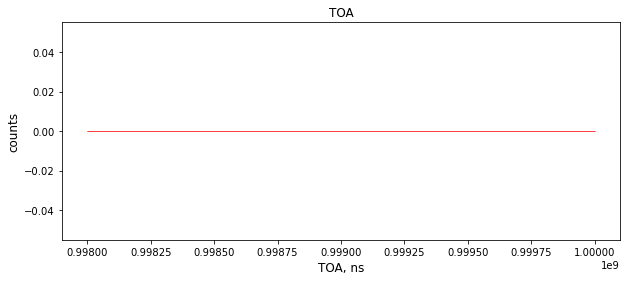

In [450]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R5_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R5_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [451]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt8_R5_ToA_1450_1600_df_3 = Pt8_R5_df.drop(Pt8_R5_df[(Pt8_R5_df['#ToA'] < ToAmin) | (Pt8_R5_df['#ToA'] > ToAmax)].index)

print(Pt8_R5_ToA_1450_1600_df_3.shape, type(Pt8_R5_ToA_1450_1600_df_3.iloc[0,0]), Pt8_R5_ToA_1450_1600_df_3.iloc[:1])

(205, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37262   174   107  192297406464        500             800         NaN


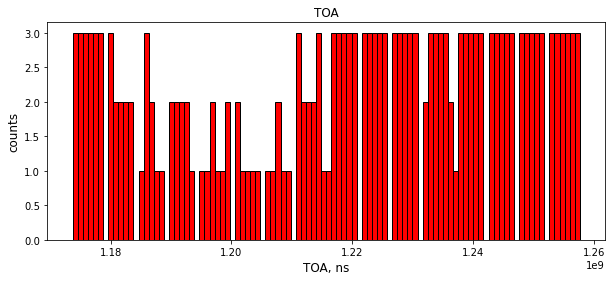

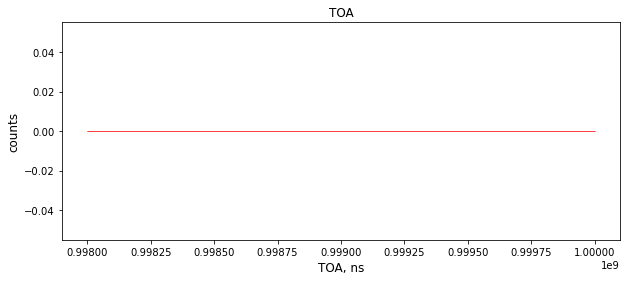

In [452]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R5_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R5_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [453]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt1_R6_ToA_1450_1600_df_3 = Pt1_R6_df.drop(Pt1_R6_df[(Pt1_R6_df['#ToA'] < ToAmin) | (Pt1_R6_df['#ToA'] > ToAmax)].index)

print(Pt1_R6_ToA_1450_1600_df_3.shape, type(Pt1_R6_ToA_1450_1600_df_3.iloc[0,0]), Pt1_R6_ToA_1450_1600_df_3.iloc[:1])

(178, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37275   178    68  192297406464        550             725         NaN


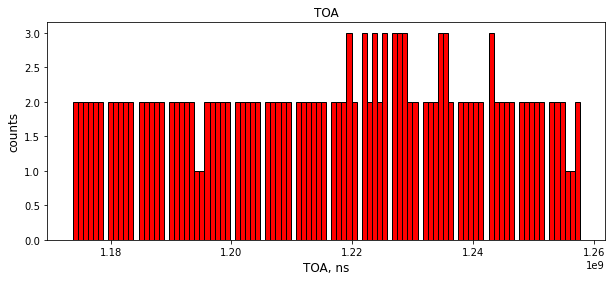

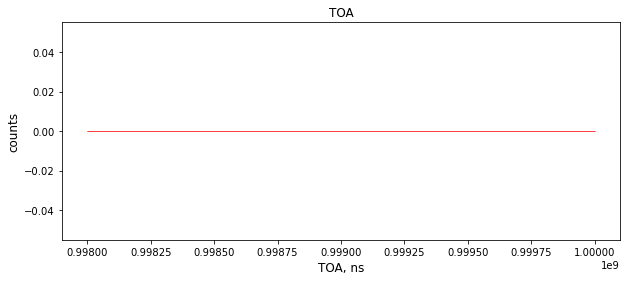

In [454]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R6_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R6_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot

In [455]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt2_R6_ToA_1450_1600_df_3 = Pt2_R6_df.drop(Pt2_R6_df[(Pt2_R6_df['#ToA'] < ToAmin) | (Pt2_R6_df['#ToA'] > ToAmax)].index)

print(Pt2_R6_ToA_1450_1600_df_3.shape)
# , type(Pt2_R6_ToA_1450_1600_df_3.iloc[0,0]), Pt2_R6_ToA_1450_1600_df_3.iloc[:1]

(141, 6)


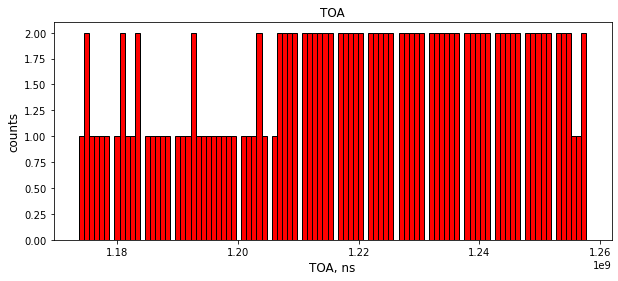

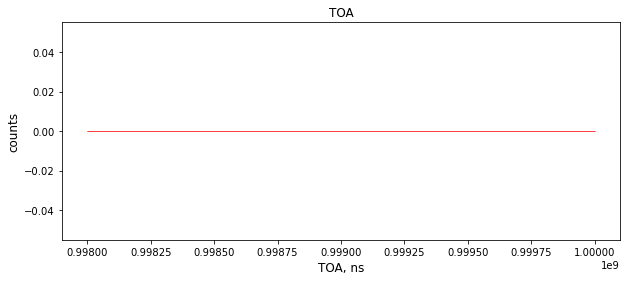

In [456]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R6_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R6_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [457]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt3_R6_ToA_1450_1600_df_3 = Pt3_R6_df.drop(Pt3_R6_df[(Pt3_R6_df['#ToA'] < ToAmin) | (Pt3_R6_df['#ToA'] > ToAmax)].index)

print(Pt3_R6_ToA_1450_1600_df_3.shape, type(Pt3_R6_ToA_1450_1600_df_3.iloc[0,0]), Pt3_R6_ToA_1450_1600_df_3.iloc[:1])

(96, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37318   178    79  192297408000        300             300         NaN


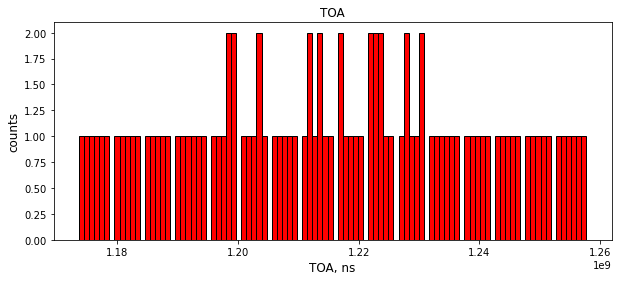

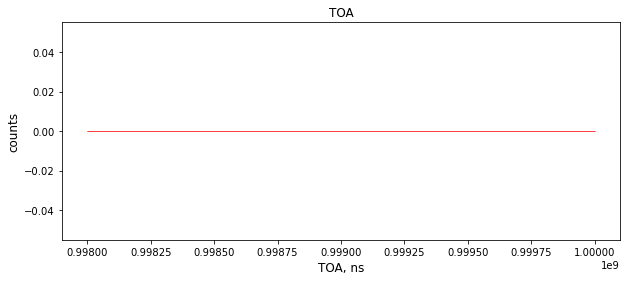

In [458]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R6_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R6_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot (second one)

In [459]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt4_R6_ToA_1450_1600_df_3 = Pt4_R6_df.drop(Pt4_R6_df[(Pt4_R6_df['#ToA'] < ToAmin) | (Pt4_R6_df['#ToA'] > ToAmax)].index)

print(Pt4_R6_ToA_1450_1600_df_3.shape)

(280, 6)


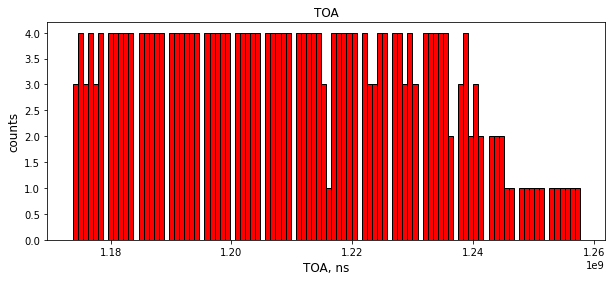

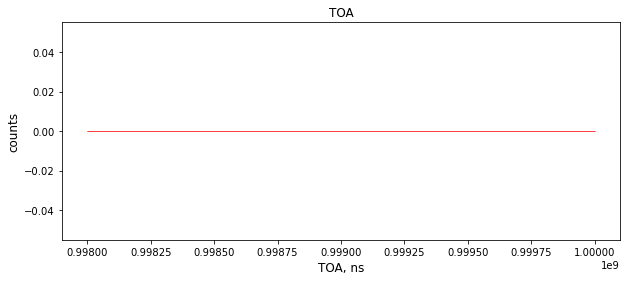

In [460]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R6_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R6_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot (third one)

In [461]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt5_R6_ToA_1450_1600_df_3 = Pt5_R6_df.drop(Pt5_R6_df[(Pt5_R6_df['#ToA'] < ToAmin) | (Pt5_R6_df['#ToA'] > ToAmax)].index)

print(Pt5_R6_ToA_1450_1600_df_3.shape)

(220, 6)


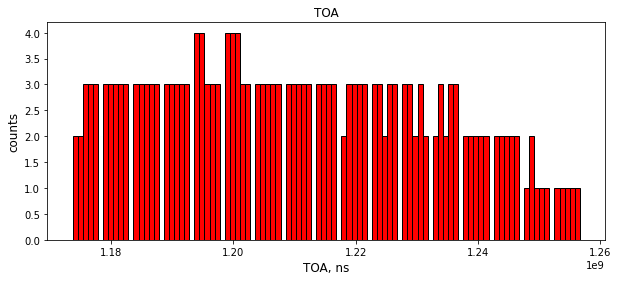

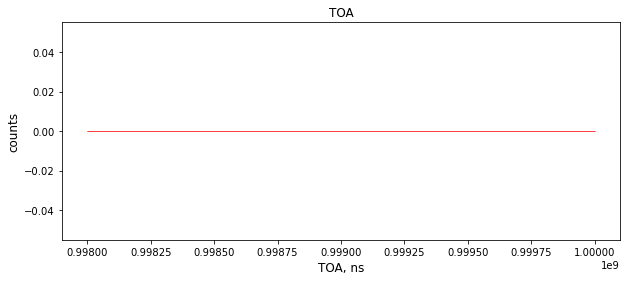

In [462]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R6_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R6_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot (fourth one)

In [463]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt6_R6_ToA_1450_1600_df_3 = Pt6_R6_df.drop(Pt6_R6_df[(Pt6_R6_df['#ToA'] < ToAmin) | (Pt6_R6_df['#ToA'] > ToAmax)].index)

print(Pt6_R6_ToA_1450_1600_df_3.shape)

(287, 6)


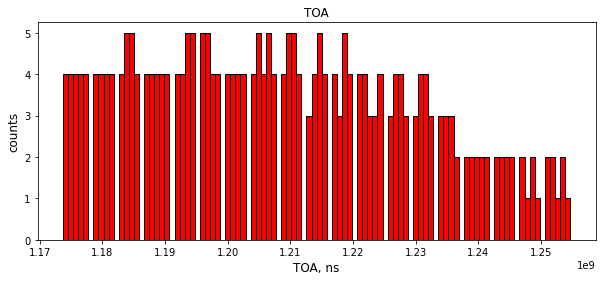

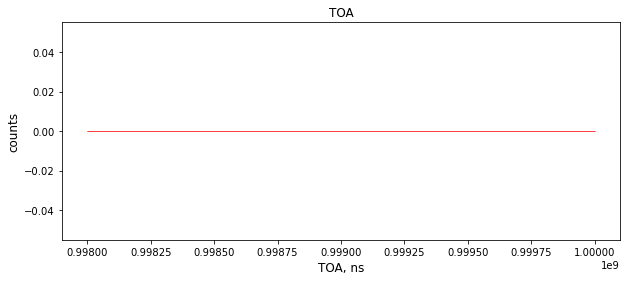

In [464]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R6_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R6_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot (fifth one)

In [465]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt7_R6_ToA_1450_1600_df_3 = Pt7_R6_df.drop(Pt7_R6_df[(Pt7_R6_df['#ToA'] < ToAmin) | (Pt7_R6_df['#ToA'] > ToAmax)].index)

print(Pt7_R6_ToA_1450_1600_df_3.shape)

(315, 6)


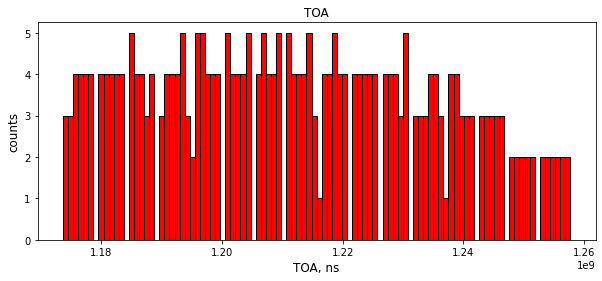

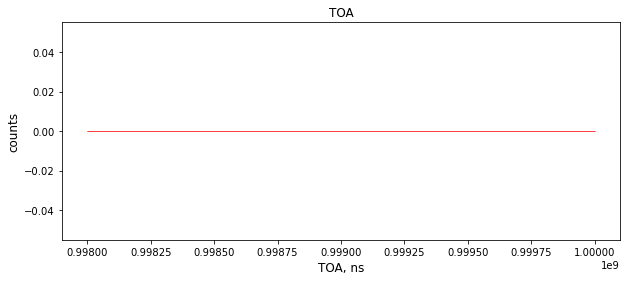

In [466]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R6_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R6_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [467]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt8_R6_ToA_1450_1600_df_3 = Pt8_R6_df.drop(Pt8_R6_df[(Pt8_R6_df['#ToA'] < ToAmin) | (Pt8_R6_df['#ToA'] > ToAmax)].index)

print(Pt8_R6_ToA_1450_1600_df_3.shape, type(Pt8_R6_ToA_1450_1600_df_3.iloc[0,0]), Pt8_R6_ToA_1450_1600_df_3.iloc[:1])

(253, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37207   179   107  192297405696       1000            1500         NaN


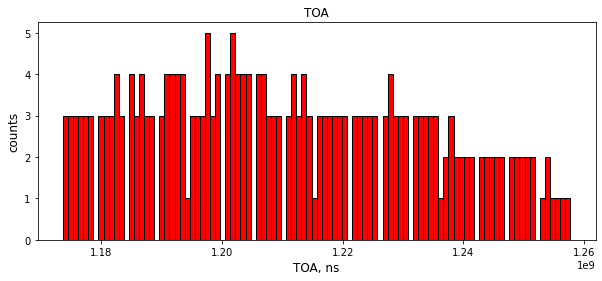

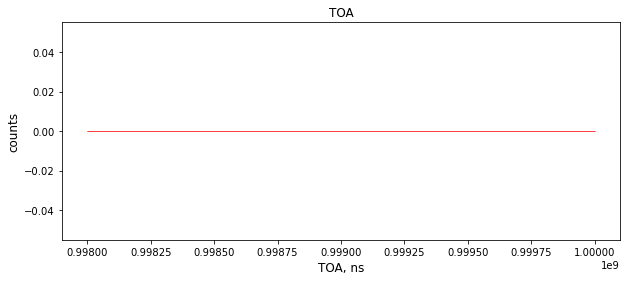

In [468]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R6_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R6_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [469]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt1_R7_ToA_1450_1600_df_3 = Pt1_R7_df.drop(Pt1_R7_df[(Pt1_R7_df['#ToA'] < ToAmin) | (Pt1_R7_df['#ToA'] > ToAmax)].index)

print(Pt1_R7_ToA_1450_1600_df_3.shape, type(Pt1_R7_ToA_1450_1600_df_3.iloc[0,0]), Pt1_R7_ToA_1450_1600_df_3.iloc[:1])

(131, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37227   183    68  192297405952        800            1000         NaN


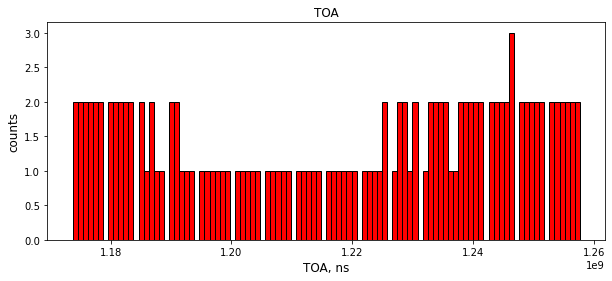

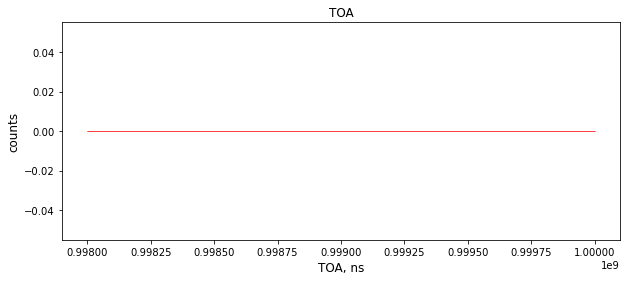

In [470]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R7_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R7_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [471]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt2_R7_ToA_1450_1600_df_3 = Pt2_R7_df.drop(Pt2_R7_df[(Pt2_R7_df['#ToA'] < ToAmin) | (Pt2_R7_df['#ToA'] > ToAmax)].index)

print(Pt2_R7_ToA_1450_1600_df_3.shape, type(Pt2_R7_ToA_1450_1600_df_3.iloc[0,0]), Pt2_R7_ToA_1450_1600_df_3.iloc[:1])

(122, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37307   183    74  192297407232        450             450         NaN


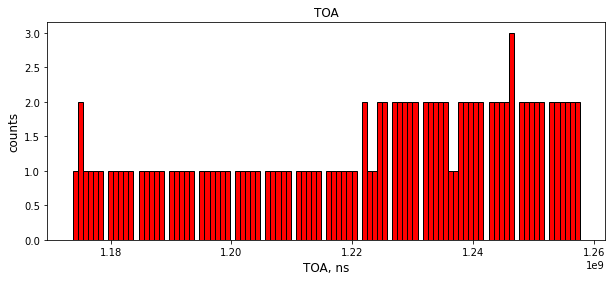

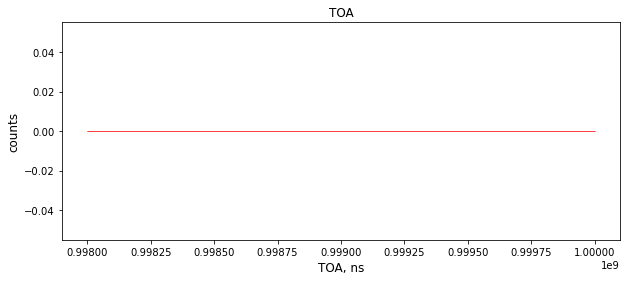

In [472]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R7_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R7_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [473]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt3_R7_ToA_1450_1600_df_3 = Pt3_R7_df.drop(Pt3_R7_df[(Pt3_R7_df['#ToA'] < ToAmin) | (Pt3_R7_df['#ToA'] > ToAmax)].index)

print(Pt3_R7_ToA_1450_1600_df_3.shape, type(Pt3_R7_ToA_1450_1600_df_3.iloc[0,0]), Pt3_R7_ToA_1450_1600_df_3.iloc[:1])

(92, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37317   183    79  192297408000        350             350         NaN


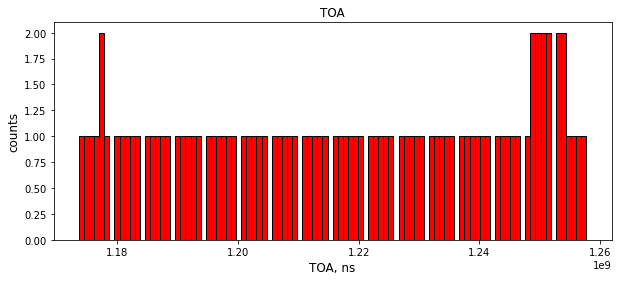

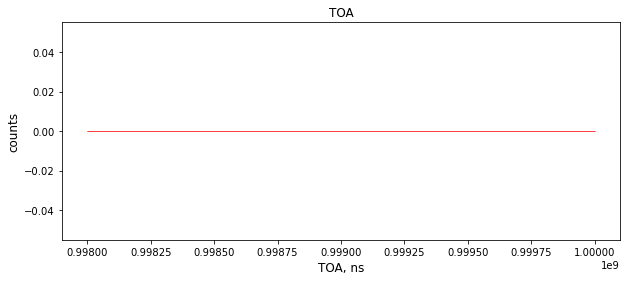

In [474]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R7_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R7_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [475]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt4_R7_ToA_1450_1600_df_3 = Pt4_R7_df.drop(Pt4_R7_df[(Pt4_R7_df['#ToA'] < ToAmin) | (Pt4_R7_df['#ToA'] > ToAmax)].index)

print(Pt4_R7_ToA_1450_1600_df_3.shape, type(Pt4_R7_ToA_1450_1600_df_3.iloc[0,0]), Pt4_R7_ToA_1450_1600_df_3.iloc[:1])

(293, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37219   183    85  192297405952        700            1800         NaN


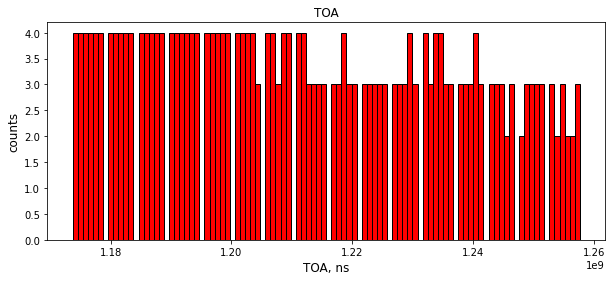

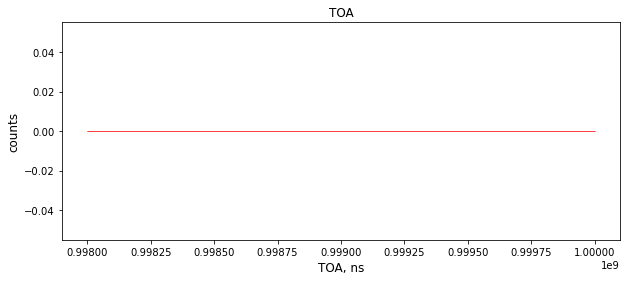

In [476]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R7_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R7_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [477]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt5_R7_ToA_1450_1600_df_3 = Pt5_R7_df.drop(Pt5_R7_df[(Pt5_R7_df['#ToA'] < ToAmin) | (Pt5_R7_df['#ToA'] > ToAmax)].index)

print(Pt5_R7_ToA_1450_1600_df_3.shape, type(Pt5_R7_ToA_1450_1600_df_3.iloc[0,0]), Pt5_R7_ToA_1450_1600_df_3.iloc[:1])

(193, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37303   183    90  192297407232        375             850         NaN


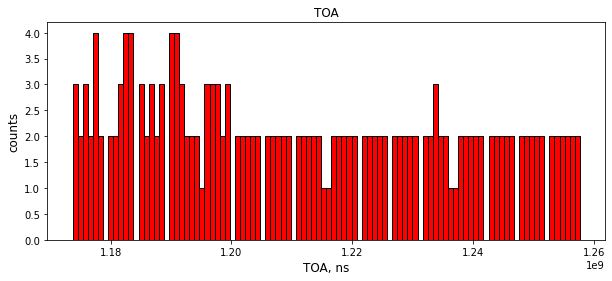

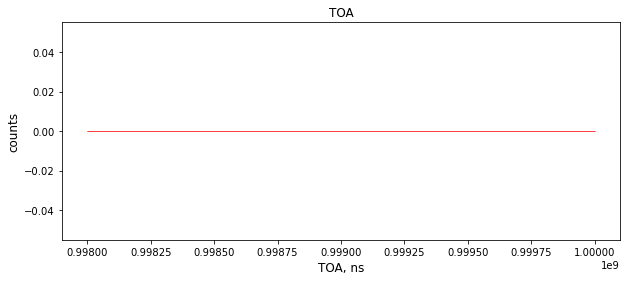

In [478]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R7_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R7_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [479]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt6_R7_ToA_1450_1600_df_3 = Pt6_R7_df.drop(Pt6_R7_df[(Pt6_R7_df['#ToA'] < ToAmin) | (Pt6_R7_df['#ToA'] > ToAmax)].index)

print(Pt6_R7_ToA_1450_1600_df_3.shape, type(Pt6_R7_ToA_1450_1600_df_3.iloc[0,0]), Pt6_R7_ToA_1450_1600_df_3.iloc[:1])

(213, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37258   184    96  192297406464        375            1300         NaN


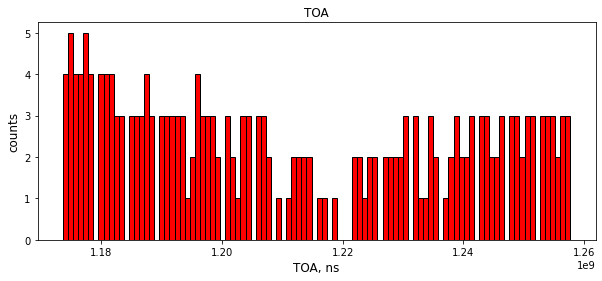

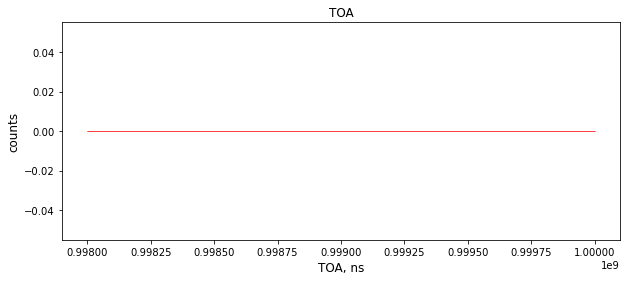

In [480]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R7_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R7_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [481]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt7_R7_ToA_1450_1600_df_3 = Pt7_R7_df.drop(Pt7_R7_df[(Pt7_R7_df['#ToA'] < ToAmin) | (Pt7_R7_df['#ToA'] > ToAmax)].index)

print(Pt7_R7_ToA_1450_1600_df_3.shape, type(Pt7_R7_ToA_1450_1600_df_3.iloc[0,0]), Pt7_R7_ToA_1450_1600_df_3.iloc[:1])

(264, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37223   184   101  192297405952        700            1575         NaN


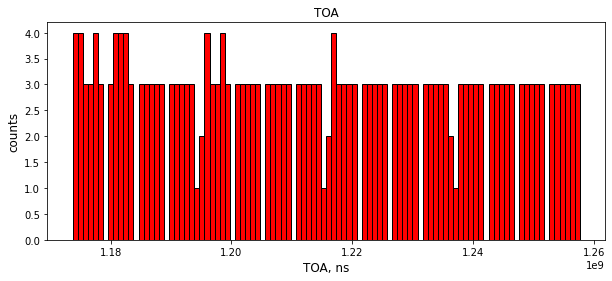

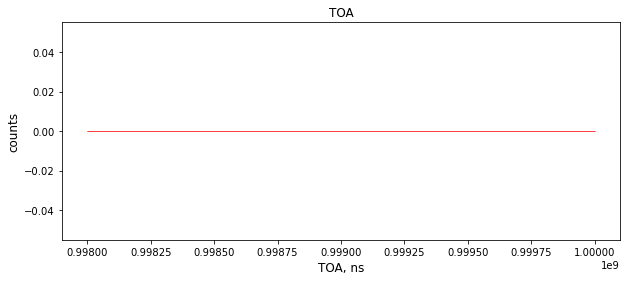

In [482]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R7_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R7_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [483]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt8_R7_ToA_1450_1600_df_3 = Pt8_R7_df.drop(Pt8_R7_df[(Pt8_R7_df['#ToA'] < ToAmin) | (Pt8_R7_df['#ToA'] > ToAmax)].index)

print(Pt8_R7_ToA_1450_1600_df_3.shape, type(Pt8_R7_ToA_1450_1600_df_3.iloc[0,0]), Pt8_R7_ToA_1450_1600_df_3.iloc[:1])

(208, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37166   184   107  192297405184       1450            2275         NaN


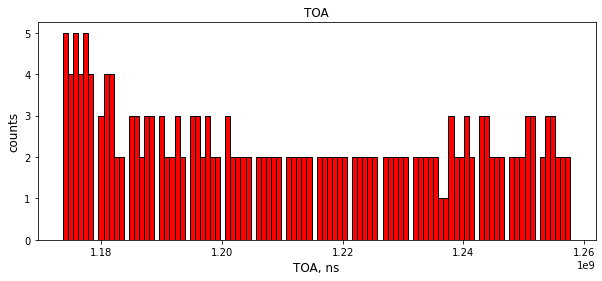

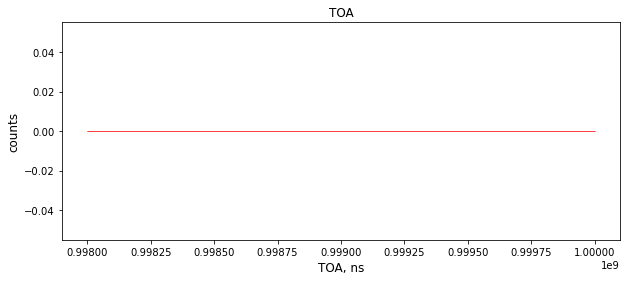

In [484]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R7_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R7_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [485]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt1_R8_ToA_1450_1600_df_3 = Pt1_R8_df.drop(Pt1_R8_df[(Pt1_R8_df['#ToA'] < ToAmin) | (Pt1_R8_df['#ToA'] > ToAmax)].index)

print(Pt1_R8_ToA_1450_1600_df_3.shape, type(Pt1_R8_ToA_1450_1600_df_3.iloc[0,0]), Pt1_R8_ToA_1450_1600_df_3.iloc[:1])

(117, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37268   188    68  192297406464        500             500         NaN


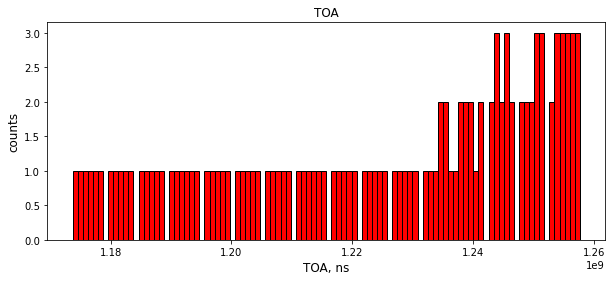

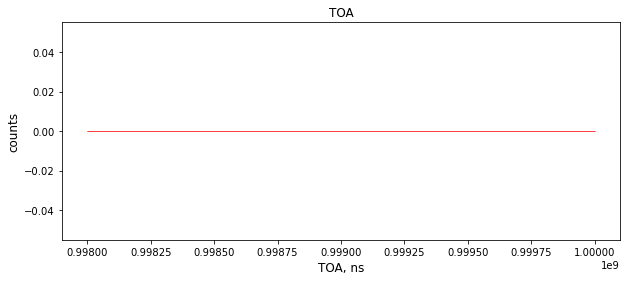

In [486]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R8_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R8_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [487]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt2_R8_ToA_1450_1600_df_3 = Pt2_R8_df.drop(Pt2_R8_df[(Pt2_R8_df['#ToA'] < ToAmin) | (Pt2_R8_df['#ToA'] > ToAmax)].index)

print(Pt2_R8_ToA_1450_1600_df_3.shape, type(Pt2_R8_ToA_1450_1600_df_3.iloc[0,0]), Pt2_R8_ToA_1450_1600_df_3.iloc[:1])

(129, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37327   188    74  192297409536        250             250         NaN


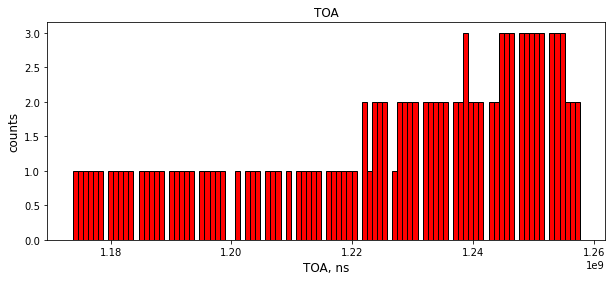

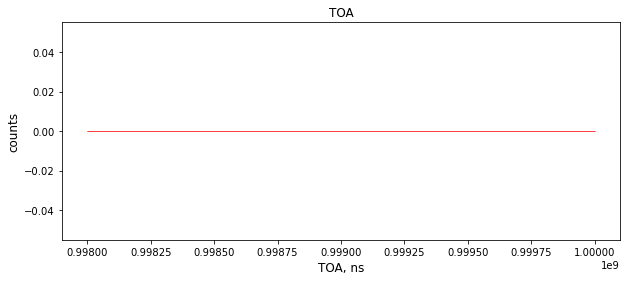

In [488]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R8_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R8_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [489]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt3_R8_ToA_1450_1600_df_3 = Pt3_R8_df.drop(Pt3_R8_df[(Pt3_R8_df['#ToA'] < ToAmin) | (Pt3_R8_df['#ToA'] > ToAmax)].index)

print(Pt3_R8_ToA_1450_1600_df_3.shape, type(Pt3_R8_ToA_1450_1600_df_3.iloc[0,0]), Pt3_R8_ToA_1450_1600_df_3.iloc[:1])

(108, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37330   188    79  192297412352        150             150         NaN


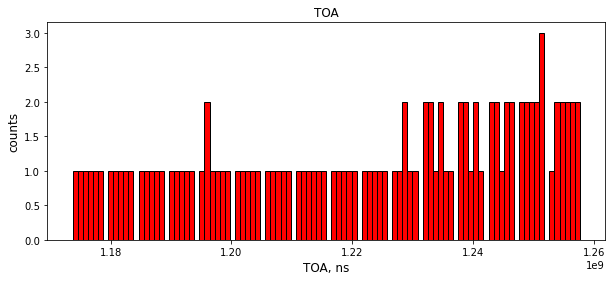

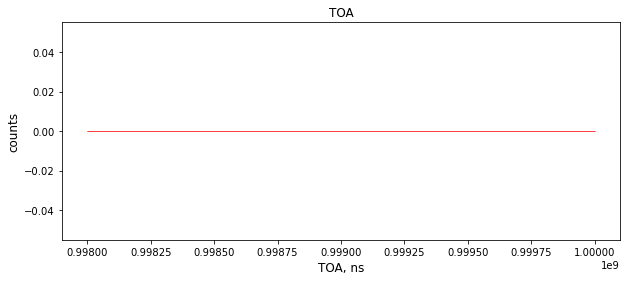

In [490]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R8_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R8_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [491]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt4_R8_ToA_1450_1600_df_3 = Pt4_R8_df.drop(Pt4_R8_df[(Pt4_R8_df['#ToA'] < ToAmin) | (Pt4_R8_df['#ToA'] > ToAmax)].index)

print(Pt4_R8_ToA_1450_1600_df_3.shape, type(Pt4_R8_ToA_1450_1600_df_3.iloc[0,0]), Pt4_R8_ToA_1450_1600_df_3.iloc[:1])

(276, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37297   188    85  192297406976        425             875         NaN


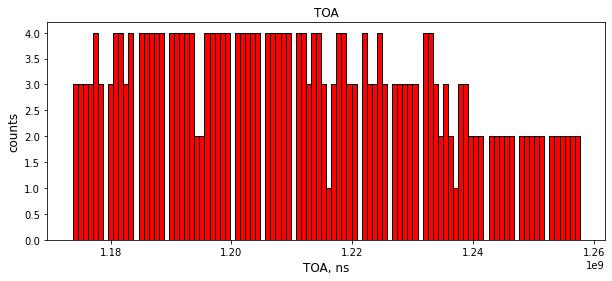

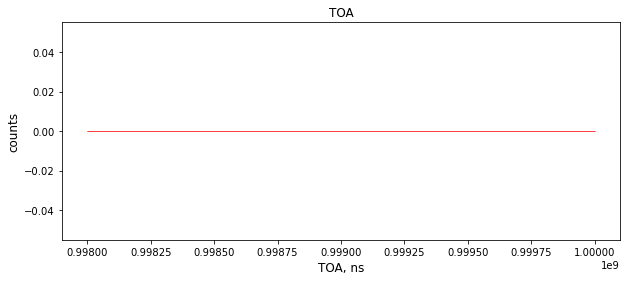

In [492]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R8_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R8_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [493]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt5_R8_ToA_1450_1600_df_3 = Pt5_R8_df.drop(Pt5_R8_df[(Pt5_R8_df['#ToA'] < ToAmin) | (Pt5_R8_df['#ToA'] > ToAmax)].index)

print(Pt5_R8_ToA_1450_1600_df_3.shape, type(Pt5_R8_ToA_1450_1600_df_3.iloc[0,0]), Pt5_R8_ToA_1450_1600_df_3.iloc[:1])

(170, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37328   189    90  192297411072        175             350         NaN


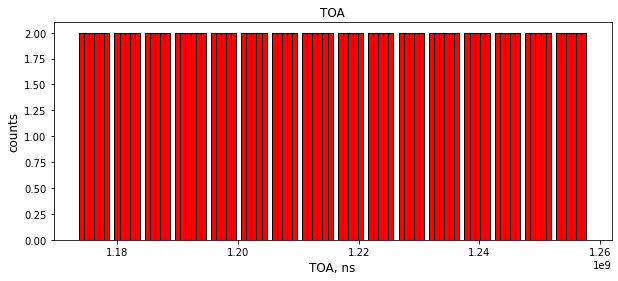

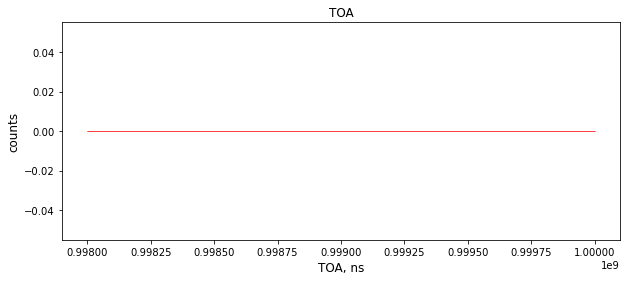

In [494]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R8_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R8_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [495]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt6_R8_ToA_1450_1600_df_3 = Pt6_R8_df.drop(Pt6_R8_df[(Pt6_R8_df['#ToA'] < ToAmin) | (Pt6_R8_df['#ToA'] > ToAmax)].index)

print(Pt6_R8_ToA_1450_1600_df_3.shape, type(Pt6_R8_ToA_1450_1600_df_3.iloc[0,0]), Pt6_R8_ToA_1450_1600_df_3.iloc[:1])

(169, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37315   189    96  192297408000        300             375         NaN


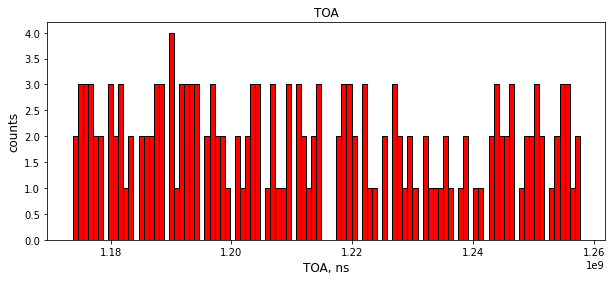

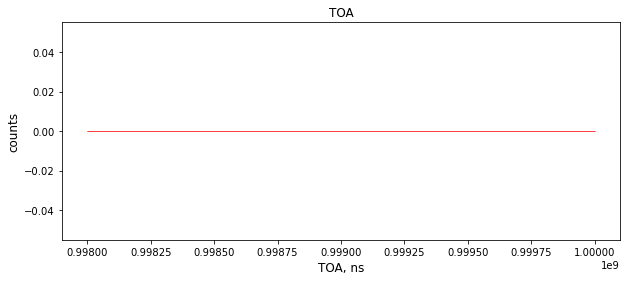

In [496]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R8_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R8_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [497]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt7_R8_ToA_1450_1600_df_3 = Pt7_R8_df.drop(Pt7_R8_df[(Pt7_R8_df['#ToA'] < ToAmin) | (Pt7_R8_df['#ToA'] > ToAmax)].index)

print(Pt7_R8_ToA_1450_1600_df_3.shape, type(Pt7_R8_ToA_1450_1600_df_3.iloc[0,0]), Pt7_R8_ToA_1450_1600_df_3.iloc[:1])

(249, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37270   189   101  192297406464        425             475         NaN


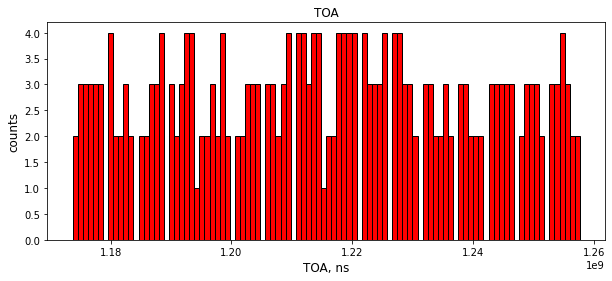

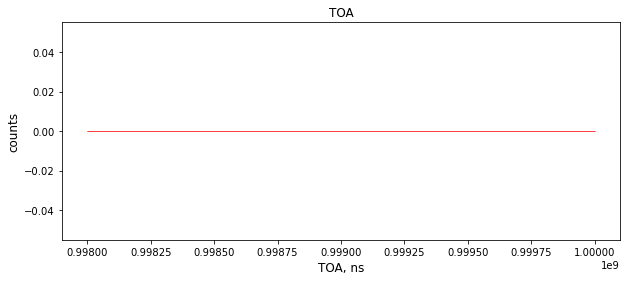

In [498]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R8_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R8_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [499]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
Pt8_R8_ToA_1450_1600_df_3 = Pt8_R8_df.drop(Pt8_R8_df[(Pt8_R8_df['#ToA'] < ToAmin) | (Pt8_R8_df['#ToA'] > ToAmax)].index)

print(Pt8_R8_ToA_1450_1600_df_3.shape, type(Pt8_R8_ToA_1450_1600_df_3.iloc[0,0]), Pt8_R8_ToA_1450_1600_df_3.iloc[:1])

(261, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
37204   189   107  192297405696        850            1300         NaN


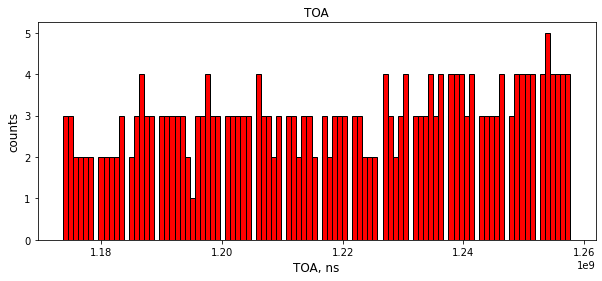

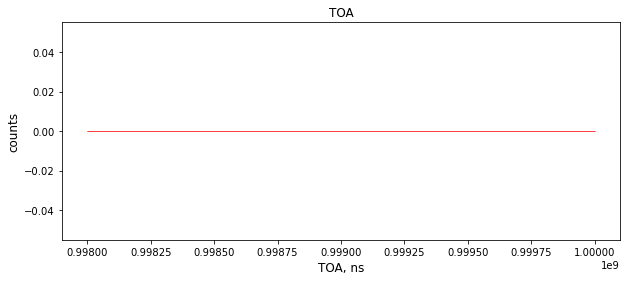

In [500]:
ToAmin = ((1.002691600e9+(1000000*5*17))+85000150.0)*4096./25.
ToAmax = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R8_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_3s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R8_ToA_1450_1600_df_3['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_30pks_Pt1-1_8212020_025044-1_cent.png')

In [501]:
ToA_all_array_100_3 = []
ToAtotal_all_array_100_3 = []
for j in range(1,9):
    for k in range(1,9):
        # Create TOT arrays
        globals()["Pt"+str(j)+"_R"+str(k)+"_TOA_array_100_3"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_ToA_1450_1600_df_3"]['#ToA'].to_numpy())
#         globals()["Pt"+str(j)+"_R"+str(k)+"_TOTtotal_array"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy())
        ToA_all_array_100_3.append((globals()["Pt"+str(j)+"_R"+str(k)+"_ToA_1450_1600_df_3"]['#ToA'].to_numpy()))
#         ToAtotal_all_array.append((globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy()))

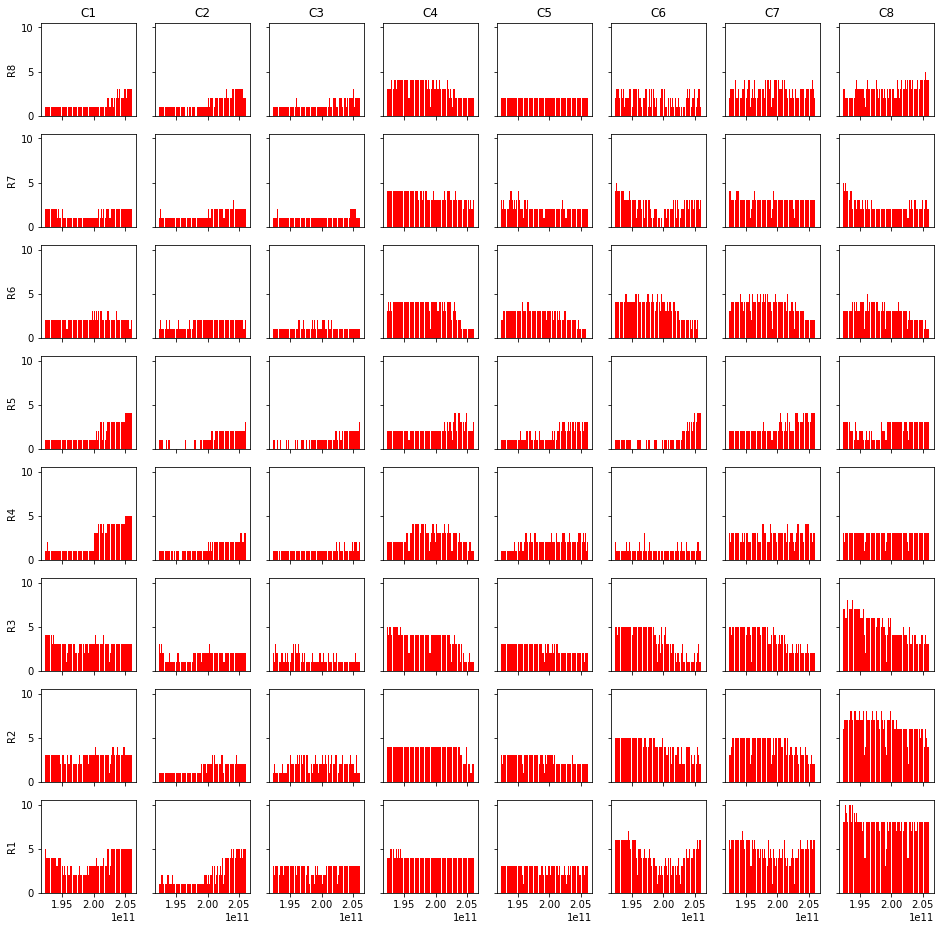

In [502]:
fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8), \
                  (ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16), \
                  (ax17, ax18, ax19, ax20, ax21, ax22, ax23, ax24), \
                  (ax25, ax26, ax27, ax28, ax29, ax30, ax31, ax32), \
                  (ax33, ax34, ax35, ax36, ax37, ax38, ax39, ax40), \
                  (ax41, ax42, ax43, ax44, ax45, ax46, ax47, ax48), \
                  (ax49, ax50, ax51, ax52, ax53, ax54, ax55, ax56), \
                  (ax57, ax58, ax59, ax60, ax61, ax62, ax63, ax64), \
                 )= plt.subplots(nrows = 8, ncols =8, figsize = (16, 16), sharex=True, sharey=True, facecolor='w')
for j in range(1,9):
    for k in range(1,9):
            globals()['ax'+str((64-(j*8))+k)].hist(globals()["Pt"+str(k)+"_R"+str(j)+"_TOA_array_100_3"], bins = 100, color='r')
#             print('R'+str(j),'C'+str(k),len(globals()["Pt"+str(k)+"_R"+str(j)+"_TOT_array"]))
            if j == 8: globals()['ax'+str((64-(j*8))+k)].set_title("C"+str(k)) 
            if k == 1: globals()['ax'+str((64-(j*8))+k)].set_ylabel("R"+str(j)) 
fig.savefig('100_3.png', bbox_inches='tight')

In [503]:
ToT_all_array_100_3 = []
ToTtotal_all_array_100_3 = []
for j in range(1,9):
    for k in range(1,9):
        # Create TOT arrays
        globals()["Pt"+str(j)+"_R"+str(k)+"_TOT_array_100_3"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_ToA_1450_1600_df_3"]['#ToT[arb]'].to_numpy())
#         globals()["Pt"+str(j)+"_R"+str(k)+"_TOTtotal_array"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy())
        ToA_all_array_100.append((globals()["Pt"+str(j)+"_R"+str(k)+"_ToA_1450_1600_df_3"]['#ToT[arb]'].to_numpy()))
#         ToAtotal_all_array.append((globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy()))

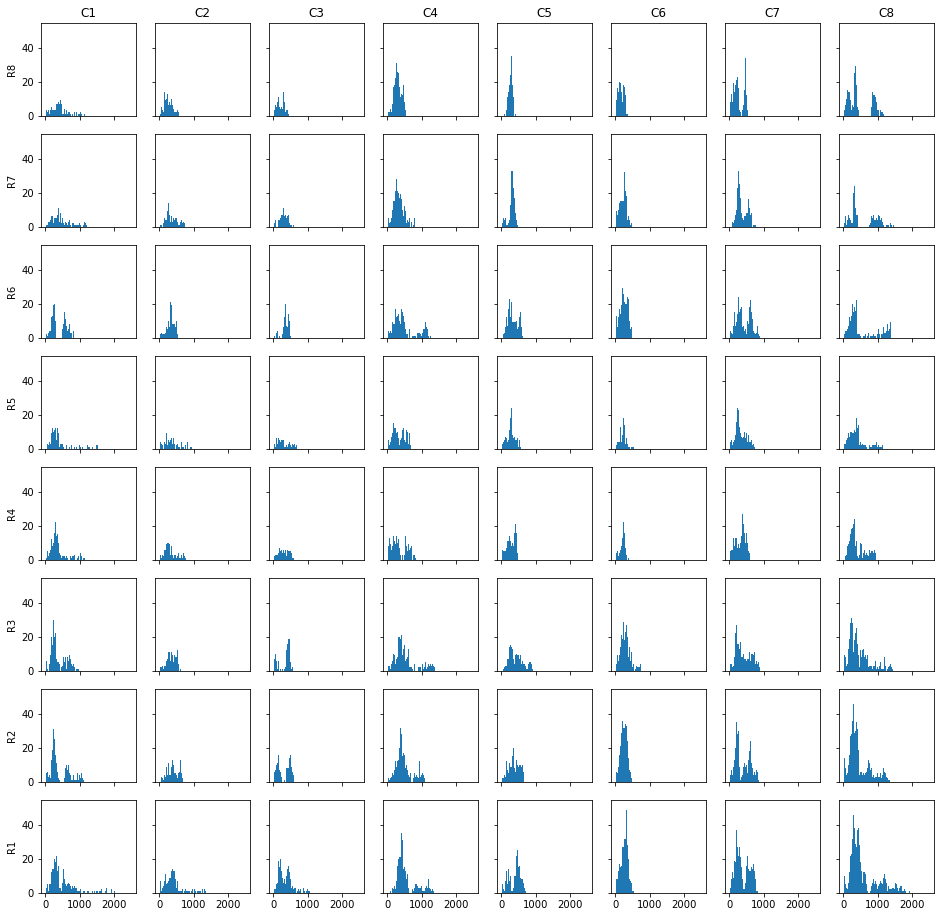

In [639]:
fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8), \
                  (ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16), \
                  (ax17, ax18, ax19, ax20, ax21, ax22, ax23, ax24), \
                  (ax25, ax26, ax27, ax28, ax29, ax30, ax31, ax32), \
                  (ax33, ax34, ax35, ax36, ax37, ax38, ax39, ax40), \
                  (ax41, ax42, ax43, ax44, ax45, ax46, ax47, ax48), \
                  (ax49, ax50, ax51, ax52, ax53, ax54, ax55, ax56), \
                  (ax57, ax58, ax59, ax60, ax61, ax62, ax63, ax64), \
                 )= plt.subplots(nrows = 8, ncols =8, figsize = (16, 16), sharex=True, sharey=True, facecolor='w')
for j in range(1,9):
    for k in range(1,9):
            globals()['ax'+str((64-(j*8))+k)].hist(globals()["Pt"+str(k)+"_R"+str(j)+"_TOT_array_100_3"], bins = 100, range=(0,2500))
#             print('R'+str(j),'C'+str(k),len(globals()["Pt"+str(k)+"_R"+str(j)+"_TOT_array"]))
            if j == 8: globals()['ax'+str((64-(j*8))+k)].set_title("C"+str(k)) 
            if k == 1: globals()['ax'+str((64-(j*8))+k)].set_ylabel("R"+str(j))
fig.savefig('ToT_100_3.png', bbox_inches='tight')

In [505]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt1_R1_ToA_1450_1600_df_4 = Pt1_R1_df.drop(Pt1_R1_df[(Pt1_R1_df['#ToA'] < ToAmin) | (Pt1_R1_df['#ToA'] > ToAmax)].index)

print(Pt1_R1_ToA_1450_1600_df_4.shape, type(Pt1_R1_ToA_1450_1600_df_4.iloc[0,0]), Pt1_R1_ToA_1450_1600_df_4.iloc[:1])

(357, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52118   153    68  206223703040       2125            4275         NaN


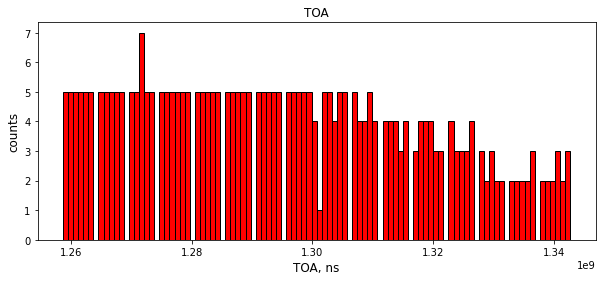

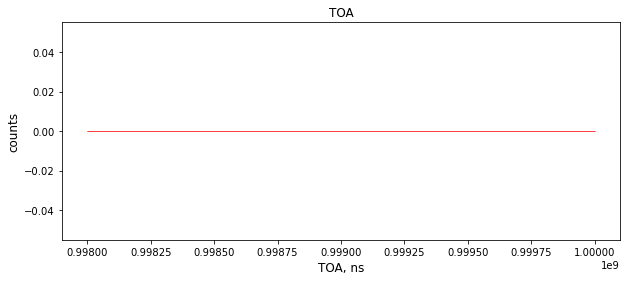

In [506]:
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R1_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R1_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()

In [507]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt2_R1_ToA_1450_1600_df_4 = Pt2_R1_df.drop(Pt2_R1_df[(Pt2_R1_df['#ToA'] < ToAmin) | (Pt2_R1_df['#ToA'] > ToAmax)].index)

print(Pt2_R1_ToA_1450_1600_df_4.shape, type(Pt2_R1_ToA_1450_1600_df_4.iloc[0,0]), Pt2_R1_ToA_1450_1600_df_4.iloc[:1])

(254, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52130   153    74  206223703552       1275            2700         NaN


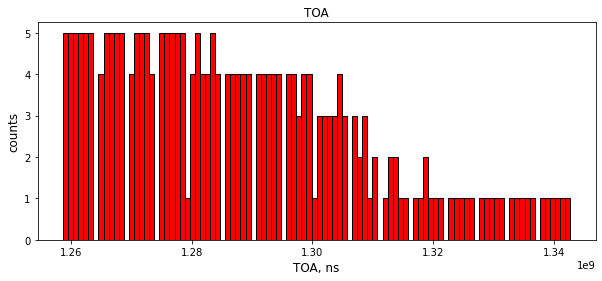

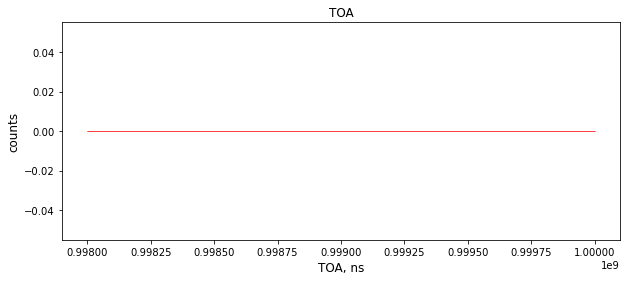

In [508]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R1_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R1_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [509]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt3_R1_ToA_1450_1600_df_4 = Pt3_R1_df.drop(Pt3_R1_df[(Pt3_R1_df['#ToA'] < ToAmin) | (Pt3_R1_df['#ToA'] > ToAmax)].index)

print(Pt3_R1_ToA_1450_1600_df_4.shape, type(Pt3_R1_ToA_1450_1600_df_4.iloc[0,0]), Pt3_R1_ToA_1450_1600_df_4.iloc[:1])

(239, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52145   153    79  206223703808       1025            1875         NaN


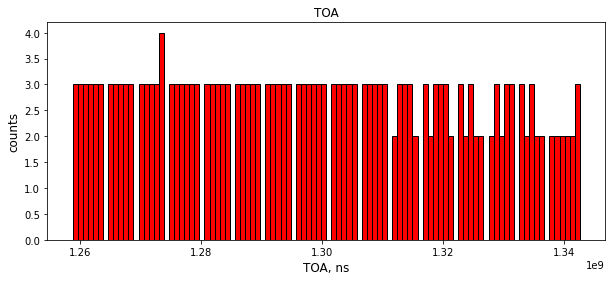

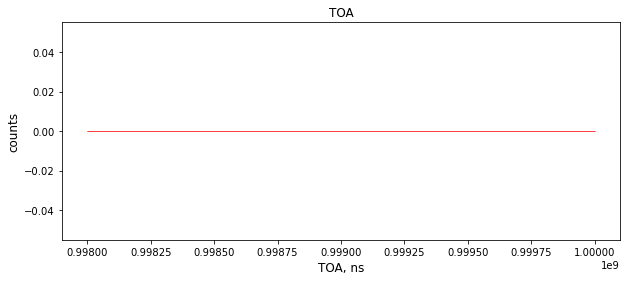

In [510]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R1_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R1_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [511]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt4_R1_ToA_1450_1600_df_4 = Pt4_R1_df.drop(Pt4_R1_df[(Pt4_R1_df['#ToA'] < ToAmin) | (Pt4_R1_df['#ToA'] > ToAmax)].index)

print(Pt4_R1_ToA_1450_1600_df_4.shape, type(Pt4_R1_ToA_1450_1600_df_4.iloc[0,0]), Pt4_R1_ToA_1450_1600_df_4.iloc[:1])

(335, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52191   153    85  206223704320        725            1750         NaN


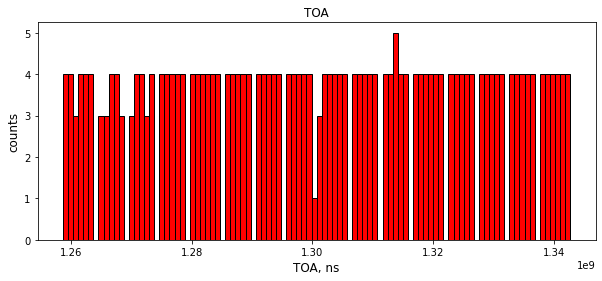

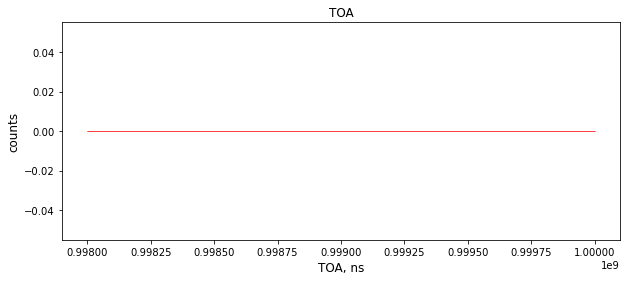

In [512]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R1_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R1_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [513]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt5_R1_ToA_1450_1600_df_4 = Pt5_R1_df.drop(Pt5_R1_df[(Pt5_R1_df['#ToA'] < ToAmin) | (Pt5_R1_df['#ToA'] > ToAmax)].index)

print(Pt5_R1_ToA_1450_1600_df_4.shape, type(Pt5_R1_ToA_1450_1600_df_4.iloc[0,0]), Pt5_R1_ToA_1450_1600_df_4.iloc[:1])

(211, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52176   153    90  206223704320        575            1050         NaN


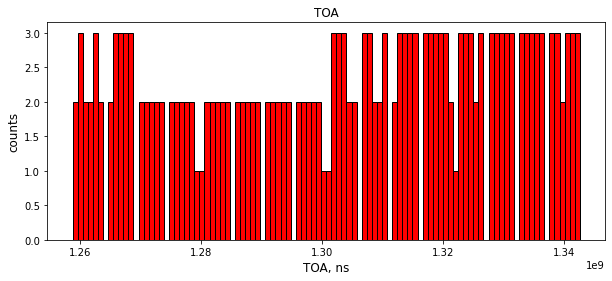

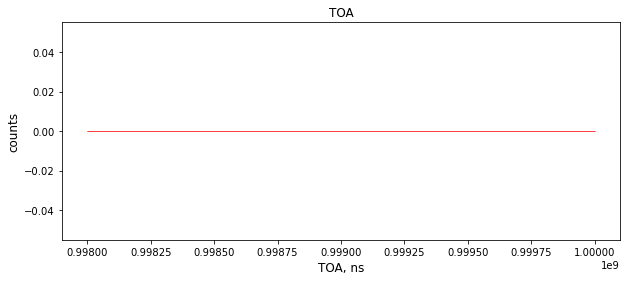

In [514]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R1_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R1_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [515]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt6_R1_ToA_1450_1600_df_4 = Pt6_R1_df.drop(Pt6_R1_df[(Pt6_R1_df['#ToA'] < ToAmin) | (Pt6_R1_df['#ToA'] > ToAmax)].index)

print(Pt6_R1_ToA_1450_1600_df_4.shape, type(Pt6_R1_ToA_1450_1600_df_4.iloc[0,0]), Pt6_R1_ToA_1450_1600_df_4.iloc[:1])

(487, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52137   154   100  206223704064        400            2500         NaN


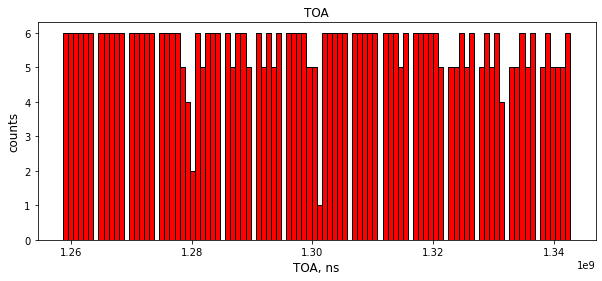

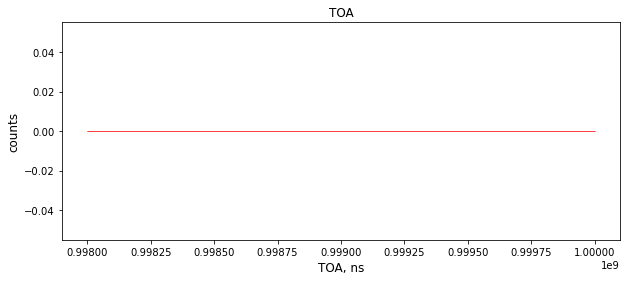

In [516]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R1_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R1_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [517]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt7_R1_ToA_1450_1600_df_4 = Pt7_R1_df.drop(Pt7_R1_df[(Pt7_R1_df['#ToA'] < ToAmin) | (Pt7_R1_df['#ToA'] > ToAmax)].index)

print(Pt7_R1_ToA_1450_1600_df_4.shape, type(Pt7_R1_ToA_1450_1600_df_4.iloc[0,0]), Pt7_R1_ToA_1450_1600_df_4.iloc[:1])

(494, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52135   154   101  206223703552        825            2500         NaN


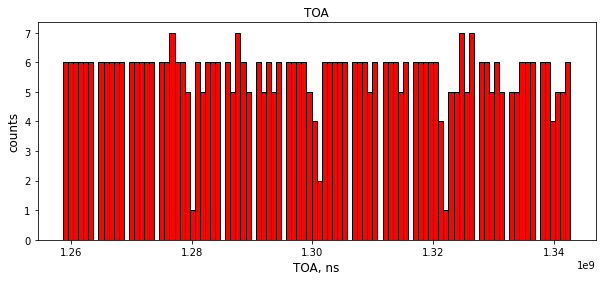

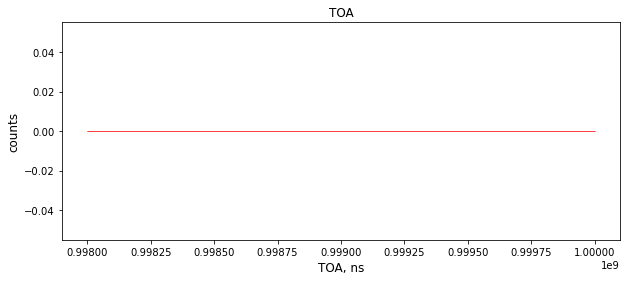

In [518]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R1_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R1_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [519]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt8_R1_ToA_1450_1600_df_4 = Pt8_R1_df.drop(Pt8_R1_df[(Pt8_R1_df['#ToA'] < ToAmin) | (Pt8_R1_df['#ToA'] > ToAmax)].index)

print(Pt8_R1_ToA_1450_1600_df_4.shape, type(Pt8_R1_ToA_1450_1600_df_4.iloc[0,0]), Pt8_R1_ToA_1450_1600_df_4.iloc[:1])

(714, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52109   154   106  206223702784       1325            6125         NaN


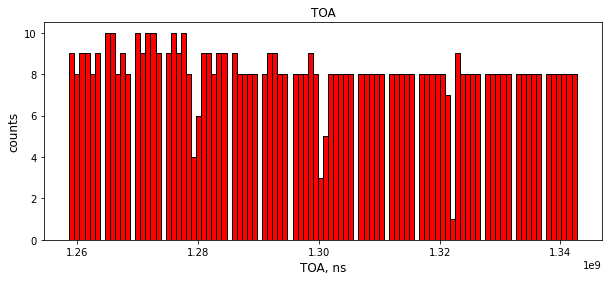

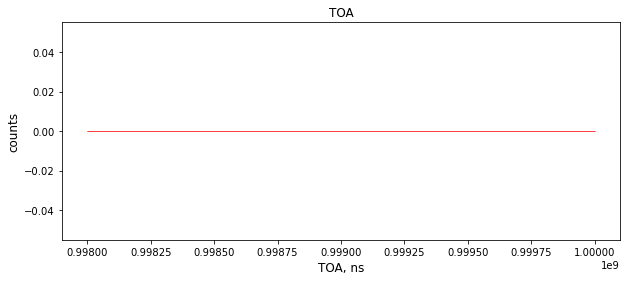

In [520]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R1_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R1_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [521]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt1_R2_ToA_1450_1600_df_4 = Pt1_R2_df.drop(Pt1_R2_df[(Pt1_R2_df['#ToA'] < ToAmin) | (Pt1_R2_df['#ToA'] > ToAmax)].index)

print(Pt1_R2_ToA_1450_1600_df_4.shape, type(Pt1_R2_ToA_1450_1600_df_4.iloc[0,0]), Pt1_R2_ToA_1450_1600_df_4.iloc[:1])

(251, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52156   158    68  206223703808       1100            1725         NaN


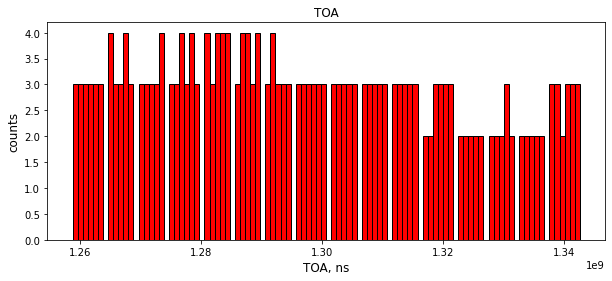

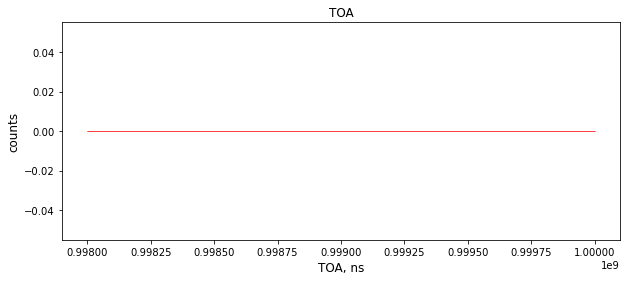

In [522]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R2_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R2_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [523]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt2_R2_ToA_1450_1600_df_4 = Pt2_R2_df.drop(Pt2_R2_df[(Pt2_R2_df['#ToA'] < ToAmin) | (Pt2_R2_df['#ToA'] > ToAmax)].index)

print(Pt2_R2_ToA_1450_1600_df_4.shape, type(Pt2_R2_ToA_1450_1600_df_4.iloc[0,0]), Pt2_R2_ToA_1450_1600_df_4.iloc[:1])

(127, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52195   158    74  206223704320        600             900         NaN


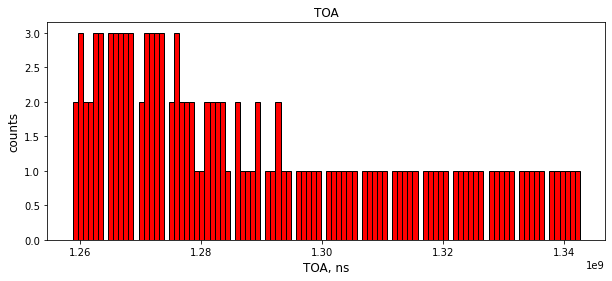

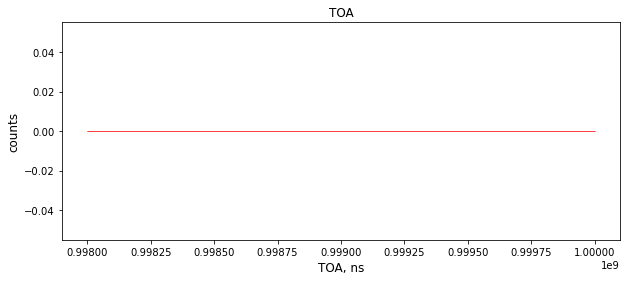

In [524]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R2_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R2_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [525]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt3_R2_ToA_1450_1600_df_4 = Pt3_R2_df.drop(Pt3_R2_df[(Pt3_R2_df['#ToA'] < ToAmin) | (Pt3_R2_df['#ToA'] > ToAmax)].index)

print(Pt3_R2_ToA_1450_1600_df_4.shape, type(Pt3_R2_ToA_1450_1600_df_4.iloc[0,0]), Pt3_R2_ToA_1450_1600_df_4.iloc[:1])

(112, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52221   158    79  206223704832        525             650         NaN


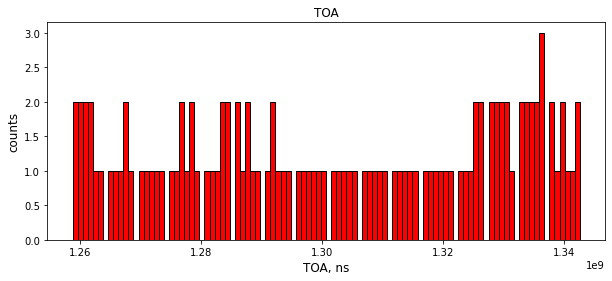

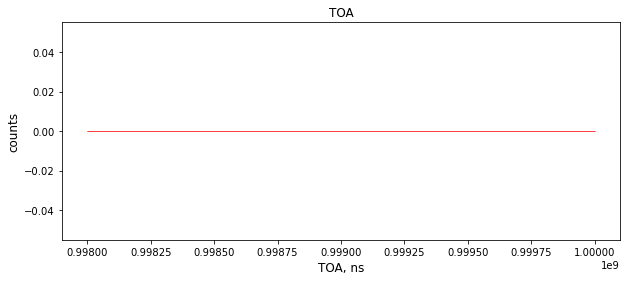

In [526]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R2_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R2_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [527]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt4_R2_ToA_1450_1600_df_4 = Pt4_R2_df.drop(Pt4_R2_df[(Pt4_R2_df['#ToA'] < ToAmin) | (Pt4_R2_df['#ToA'] > ToAmax)].index)

print(Pt4_R2_ToA_1450_1600_df_4.shape, type(Pt4_R2_ToA_1450_1600_df_4.iloc[0,0]), Pt4_R2_ToA_1450_1600_df_4.iloc[:1])

(237, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52240   158    85  206223705344        350             475         NaN


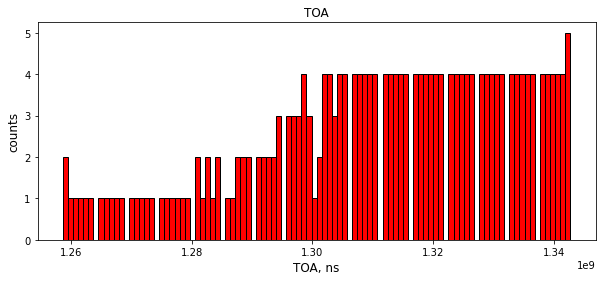

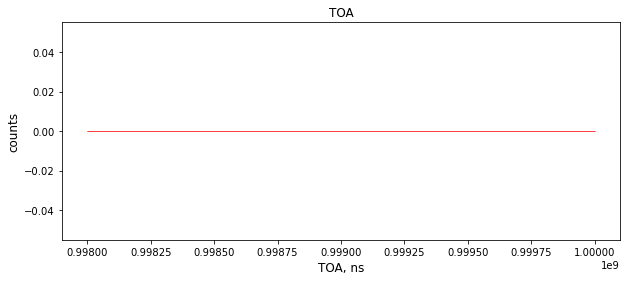

In [528]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R2_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R2_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [529]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt5_R2_ToA_1450_1600_df_4 = Pt5_R2_df.drop(Pt5_R2_df[(Pt5_R2_df['#ToA'] < ToAmin) | (Pt5_R2_df['#ToA'] > ToAmax)].index)

print(Pt5_R2_ToA_1450_1600_df_4.shape, type(Pt5_R2_ToA_1450_1600_df_4.iloc[0,0]), Pt5_R2_ToA_1450_1600_df_4.iloc[:1])

(161, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52246   158    90  206223705600        350             575         NaN


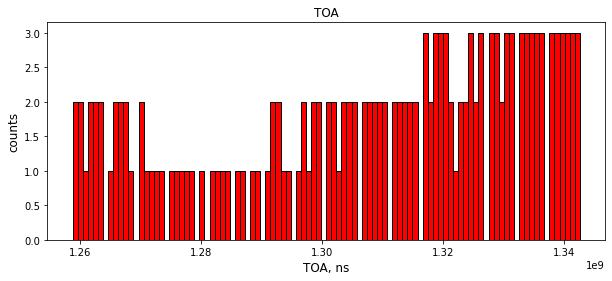

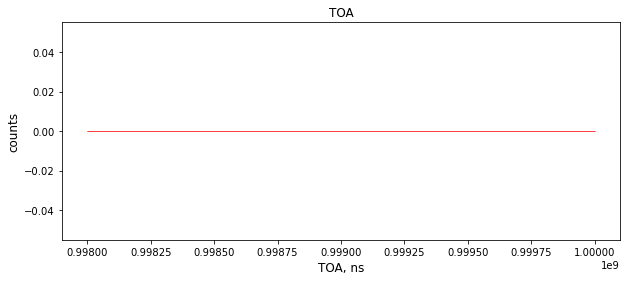

In [530]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R2_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R2_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [531]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt6_R2_ToA_1450_1600_df_4 = Pt6_R2_df.drop(Pt6_R2_df[(Pt6_R2_df['#ToA'] < ToAmin) | (Pt6_R2_df['#ToA'] > ToAmax)].index)

print(Pt6_R2_ToA_1450_1600_df_4.shape, type(Pt6_R2_ToA_1450_1600_df_4.iloc[0,0]), Pt6_R2_ToA_1450_1600_df_4.iloc[:1])

(317, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52266   158    96  206223706368        250             450         NaN


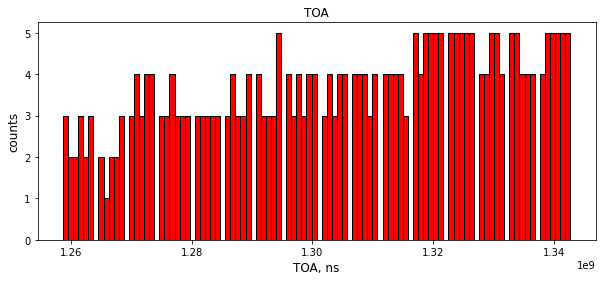

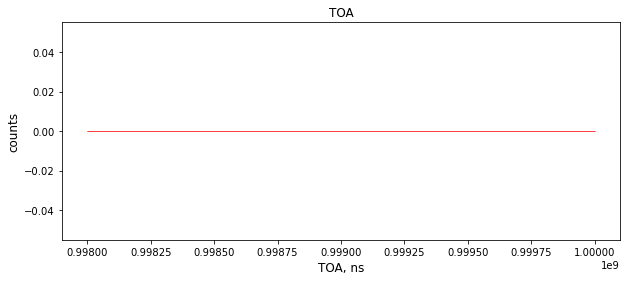

In [532]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R2_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R2_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [533]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt7_R2_ToA_1450_1600_df_4 = Pt7_R2_df.drop(Pt7_R2_df[(Pt7_R2_df['#ToA'] < ToAmin) | (Pt7_R2_df['#ToA'] > ToAmax)].index)

print(Pt7_R2_ToA_1450_1600_df_4.shape, type(Pt7_R2_ToA_1450_1600_df_4.iloc[0,0]), Pt7_R2_ToA_1450_1600_df_4.iloc[:1])

(261, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52226   159   101  206223705088        425             825         NaN


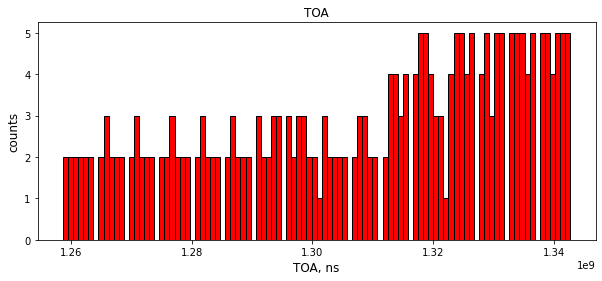

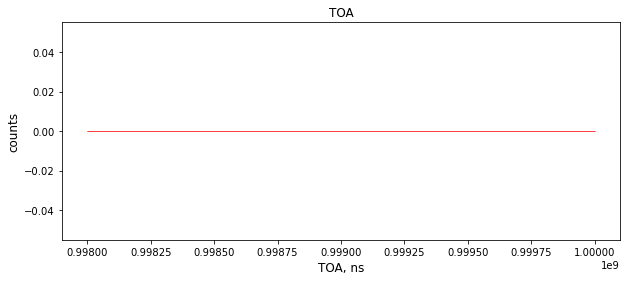

In [534]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R2_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R2_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [535]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt8_R2_ToA_1450_1600_df_4 = Pt8_R2_df.drop(Pt8_R2_df[(Pt8_R2_df['#ToA'] < ToAmin) | (Pt8_R2_df['#ToA'] > ToAmax)].index)

print(Pt8_R2_ToA_1450_1600_df_4.shape, type(Pt8_R2_ToA_1450_1600_df_4.iloc[0,0]), Pt8_R2_ToA_1450_1600_df_4.iloc[:1])

(495, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52201   159   106  206223704576        475            1825         NaN


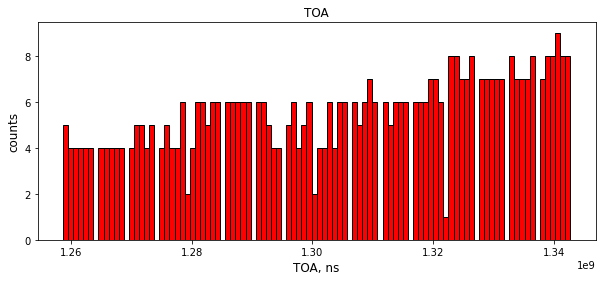

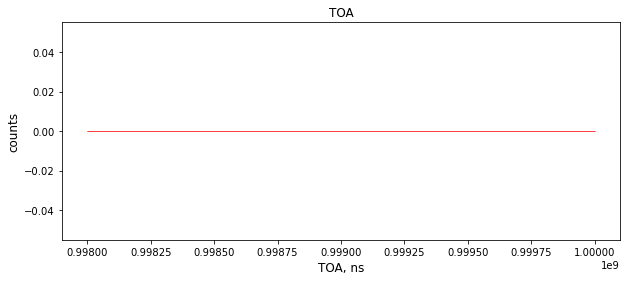

In [536]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R2_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R2_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [537]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt1_R3_ToA_1450_1600_df_4 = Pt1_R3_df.drop(Pt1_R3_df[(Pt1_R3_df['#ToA'] < ToAmin) | (Pt1_R3_df['#ToA'] > ToAmax)].index)

print(Pt1_R3_ToA_1450_1600_df_4.shape, type(Pt1_R3_ToA_1450_1600_df_4.iloc[0,0]), Pt1_R3_ToA_1450_1600_df_4.iloc[:1])

(323, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52150   163    68  206223703808        925            1575         NaN


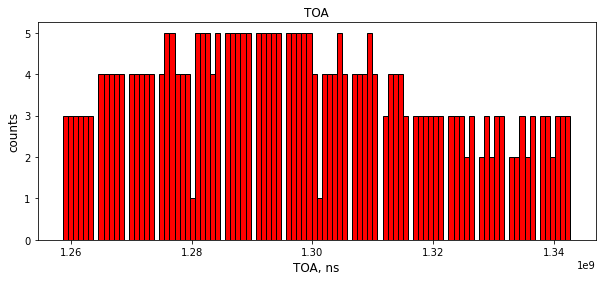

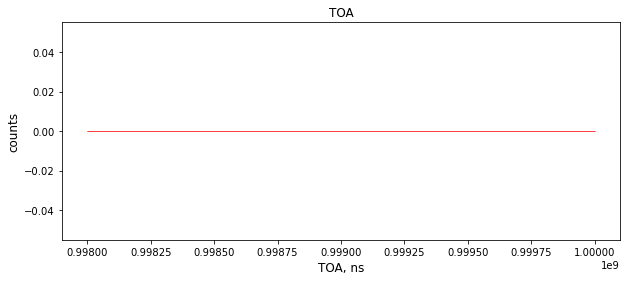

In [538]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R3_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R3_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [539]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt2_R3_ToA_1450_1600_df_4 = Pt2_R3_df.drop(Pt2_R3_df[(Pt2_R3_df['#ToA'] < ToAmin) | (Pt2_R3_df['#ToA'] > ToAmax)].index)

print(Pt2_R3_ToA_1450_1600_df_4.shape, type(Pt2_R3_ToA_1450_1600_df_4.iloc[0,0]), Pt2_R3_ToA_1450_1600_df_4.iloc[:1])

(207, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52219   163    74  206223704832        525             850         NaN


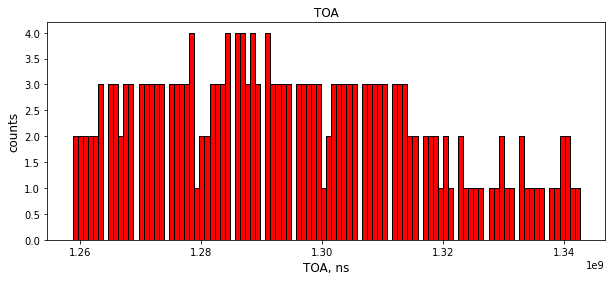

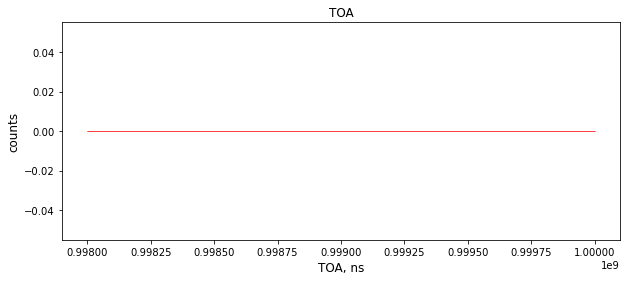

In [540]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R3_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R3_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [541]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt3_R3_ToA_1450_1600_df_4 = Pt3_R3_df.drop(Pt3_R3_df[(Pt3_R3_df['#ToA'] < ToAmin) | (Pt3_R3_df['#ToA'] > ToAmax)].index)

print(Pt3_R3_ToA_1450_1600_df_4.shape, type(Pt3_R3_ToA_1450_1600_df_4.iloc[0,0]), Pt3_R3_ToA_1450_1600_df_4.iloc[:1])

(185, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52239   163    79  206223705344        450             450         NaN


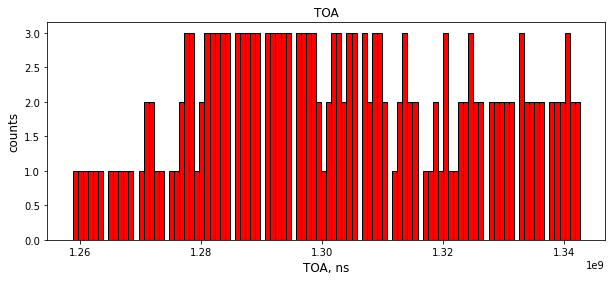

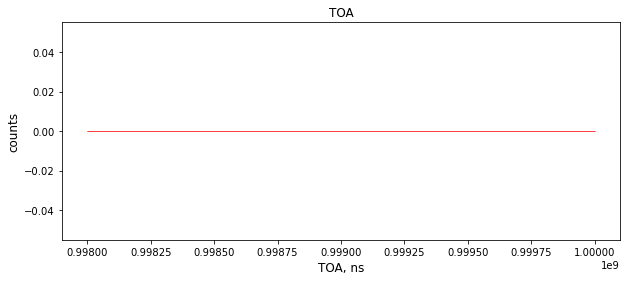

In [542]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R3_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R3_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [543]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt4_R3_ToA_1450_1600_df_4 = Pt4_R3_df.drop(Pt4_R3_df[(Pt4_R3_df['#ToA'] < ToAmin) | (Pt4_R3_df['#ToA'] > ToAmax)].index)

print(Pt4_R3_ToA_1450_1600_df_4.shape, type(Pt4_R3_ToA_1450_1600_df_4.iloc[0,0]), Pt4_R3_ToA_1450_1600_df_4.iloc[:1])

(278, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52262   163    85  206223706112        275             275         NaN


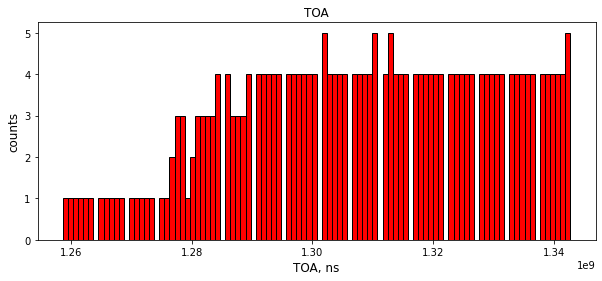

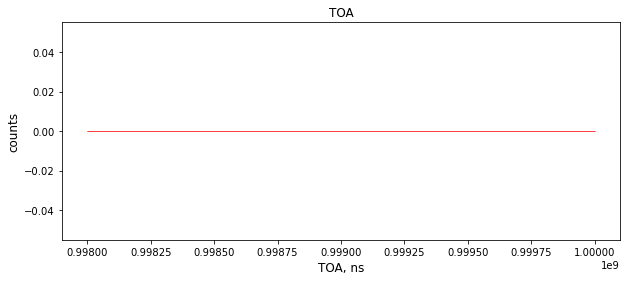

In [544]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R3_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R3_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [545]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt5_R3_ToA_1450_1600_df_4 = Pt5_R3_df.drop(Pt5_R3_df[(Pt5_R3_df['#ToA'] < ToAmin) | (Pt5_R3_df['#ToA'] > ToAmax)].index)

print(Pt5_R3_ToA_1450_1600_df_4.shape, type(Pt5_R3_ToA_1450_1600_df_4.iloc[0,0]), Pt5_R3_ToA_1450_1600_df_4.iloc[:1])

(207, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52271   163    90  206223706624        300             500         NaN


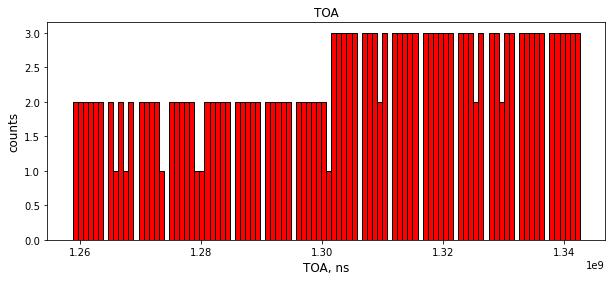

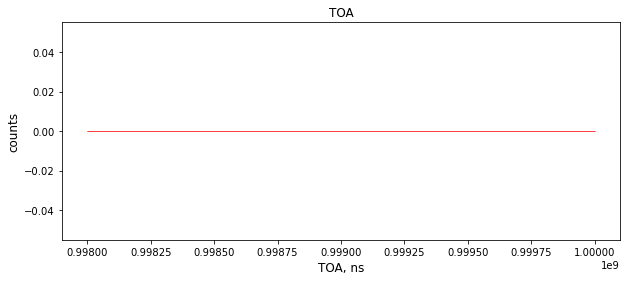

In [546]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R3_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R3_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [547]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt6_R3_ToA_1450_1600_df_4 = Pt6_R3_df.drop(Pt6_R3_df[(Pt6_R3_df['#ToA'] < ToAmin) | (Pt6_R3_df['#ToA'] > ToAmax)].index)

print(Pt6_R3_ToA_1450_1600_df_4.shape, type(Pt6_R3_ToA_1450_1600_df_4.iloc[0,0]), Pt6_R3_ToA_1450_1600_df_4.iloc[:1])

(380, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52253   163    96  206223706112        325             450         NaN


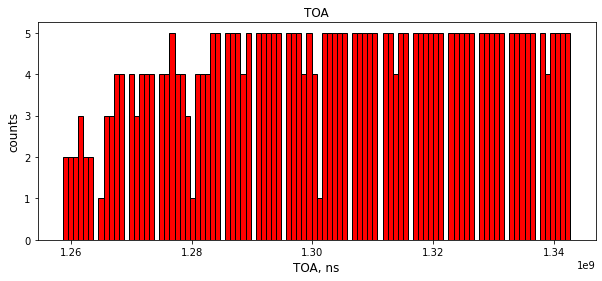

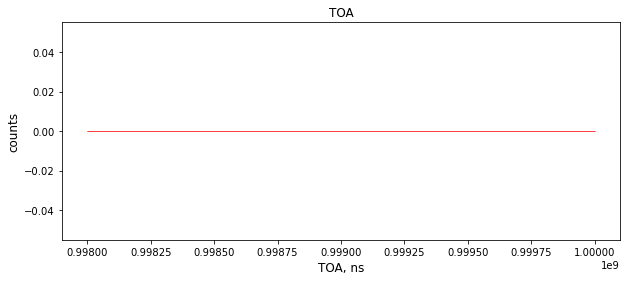

In [548]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R3_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R3_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [549]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt7_R3_ToA_1450_1600_df_4 = Pt7_R3_df.drop(Pt7_R3_df[(Pt7_R3_df['#ToA'] < ToAmin) | (Pt7_R3_df['#ToA'] > ToAmax)].index)

print(Pt7_R3_ToA_1450_1600_df_4.shape, type(Pt7_R3_ToA_1450_1600_df_4.iloc[0,0]), Pt7_R3_ToA_1450_1600_df_4.iloc[:1])

(356, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52173   163   101  206223705088        400             975         NaN


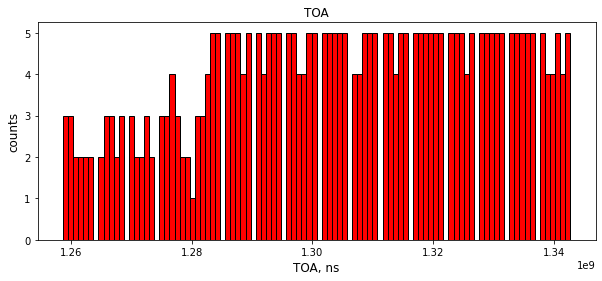

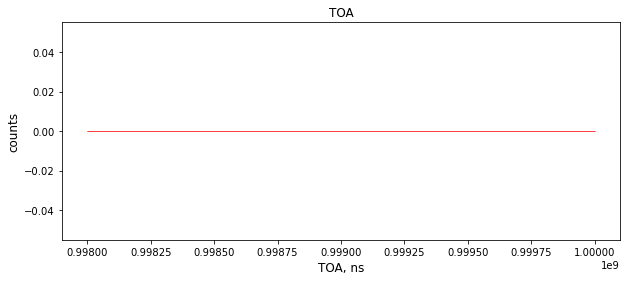

In [550]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R3_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R3_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [551]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt8_R3_ToA_1450_1600_df_4 = Pt8_R3_df.drop(Pt8_R3_df[(Pt8_R3_df['#ToA'] < ToAmin) | (Pt8_R3_df['#ToA'] > ToAmax)].index)

print(Pt8_R3_ToA_1450_1600_df_4.shape, type(Pt8_R3_ToA_1450_1600_df_4.iloc[0,0]), Pt8_R3_ToA_1450_1600_df_4.iloc[:1])

(516, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52184   164   106  206223704832        400            1475         NaN


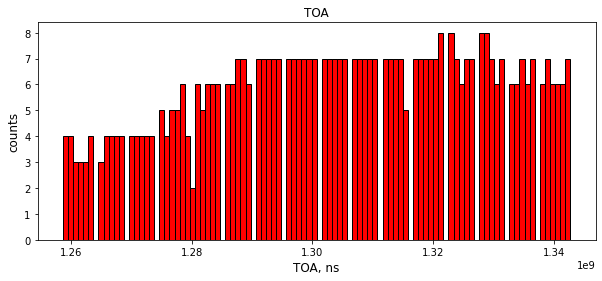

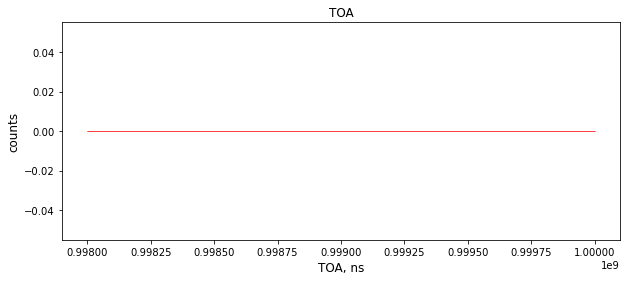

In [552]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R3_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R3_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [553]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt1_R4_ToA_1450_1600_df_4 = Pt1_R4_df.drop(Pt1_R4_df[(Pt1_R4_df['#ToA'] < ToAmin) | (Pt1_R4_df['#ToA'] > ToAmax)].index)

print(Pt1_R4_ToA_1450_1600_df_4.shape, type(Pt1_R4_ToA_1450_1600_df_4.iloc[0,0]), Pt1_R4_ToA_1450_1600_df_4.iloc[:1])

(260, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52142   172    68  206223704064        425            2575         NaN


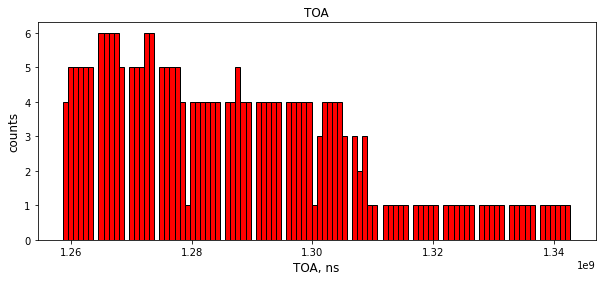

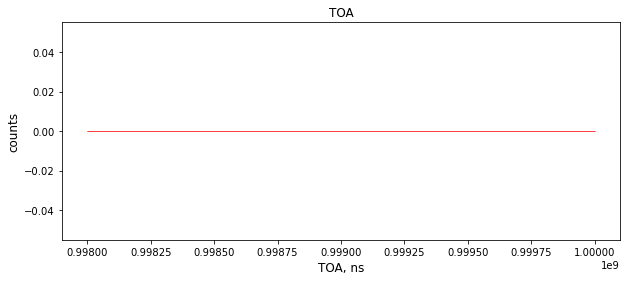

In [554]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R4_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R4_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [555]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt2_R4_ToA_1450_1600_df_4 = Pt2_R4_df.drop(Pt2_R4_df[(Pt2_R4_df['#ToA'] < ToAmin) | (Pt2_R4_df['#ToA'] > ToAmax)].index)

print(Pt2_R4_ToA_1450_1600_df_4.shape, type(Pt2_R4_ToA_1450_1600_df_4.iloc[0,0]))
print( Pt2_R4_ToA_1450_1600_df_4.iloc[:1])

(144, 6) <class 'numpy.int64'>
       #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52168   168    74  206223704064        750            1075         NaN


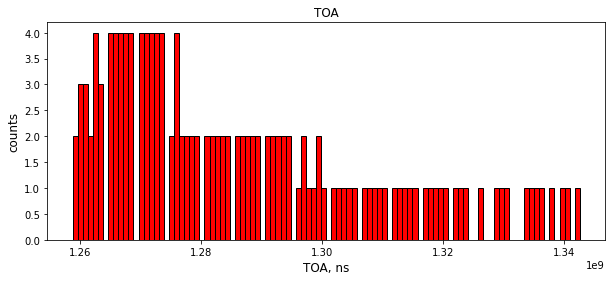

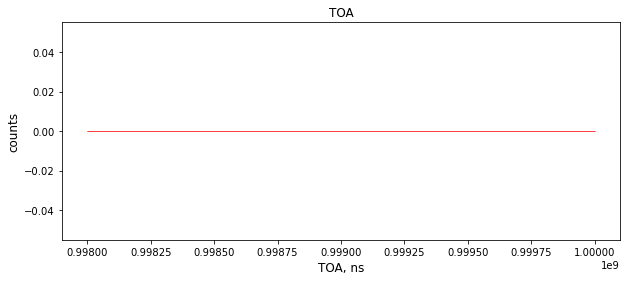

In [556]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R4_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R4_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [557]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt3_R4_ToA_1450_1600_df_4 = Pt3_R4_df.drop(Pt3_R4_df[(Pt3_R4_df['#ToA'] < ToAmin) | (Pt3_R4_df['#ToA'] > ToAmax)].index)

print(Pt3_R4_ToA_1450_1600_df_4.shape, type(Pt3_R4_ToA_1450_1600_df_4.iloc[0,0]), Pt3_R4_ToA_1450_1600_df_4.iloc[:1])

(99, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52208   168    79  206223704576        575             575         NaN


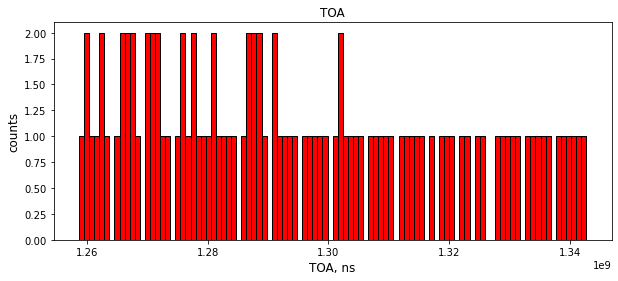

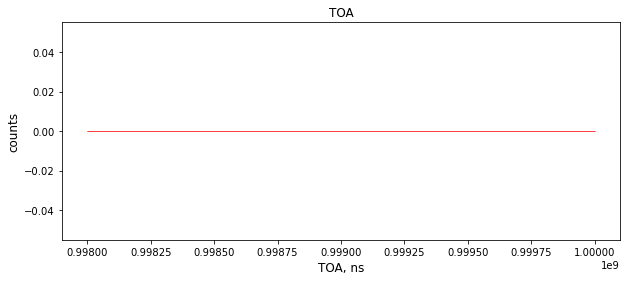

In [558]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R4_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R4_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [559]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt4_R4_ToA_1450_1600_df_4 = Pt4_R4_df.drop(Pt4_R4_df[(Pt4_R4_df['#ToA'] < ToAmin) | (Pt4_R4_df['#ToA'] > ToAmax)].index)

print(Pt4_R4_ToA_1450_1600_df_4.shape, type(Pt4_R4_ToA_1450_1600_df_4.iloc[0,0]), Pt4_R4_ToA_1450_1600_df_4.iloc[:1])

(142, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52234   168    85  206223705088        450             625         NaN


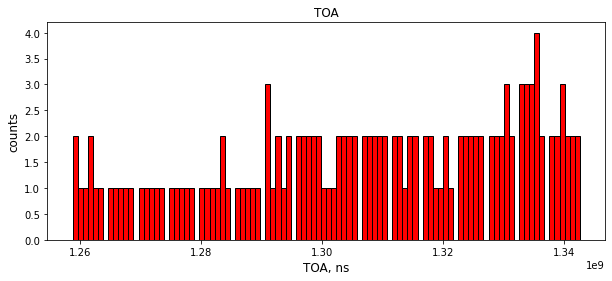

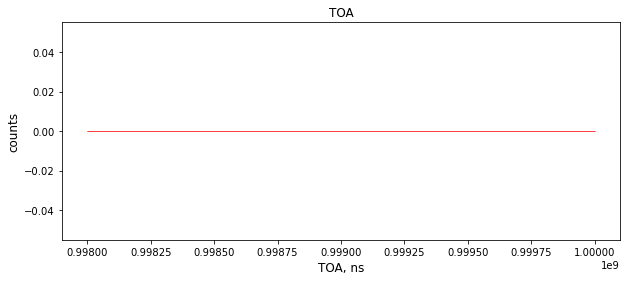

In [560]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R4_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R4_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [561]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt5_R4_ToA_1450_1600_df_4 = Pt5_R4_df.drop(Pt5_R4_df[(Pt5_R4_df['#ToA'] < ToAmin) | (Pt5_R4_df['#ToA'] > ToAmax)].index)

print(Pt5_R4_ToA_1450_1600_df_4.shape, type(Pt5_R4_ToA_1450_1600_df_4.iloc[0,0]), Pt5_R4_ToA_1450_1600_df_4.iloc[:1])

(115, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52232   168    90  206223705088        425             600         NaN


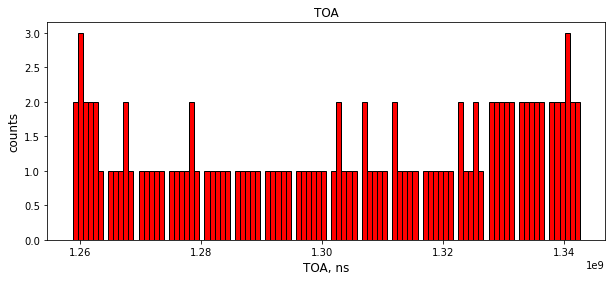

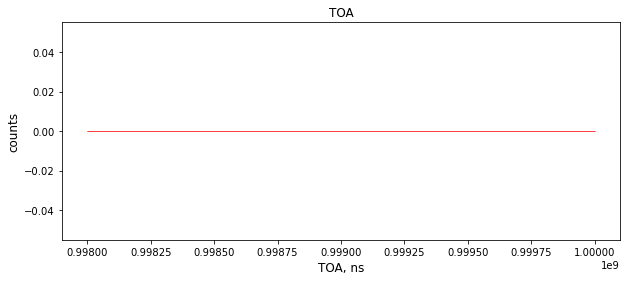

In [562]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R4_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R4_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [563]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt6_R4_ToA_1450_1600_df_4 = Pt6_R4_df.drop(Pt6_R4_df[(Pt6_R4_df['#ToA'] < ToAmin) | (Pt6_R4_df['#ToA'] > ToAmax)].index)

print(Pt6_R4_ToA_1450_1600_df_4.shape, type(Pt6_R4_ToA_1450_1600_df_4.iloc[0,0]), Pt6_R4_ToA_1450_1600_df_4.iloc[:1])

(167, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52236   168    96  206223705344        325             500         NaN


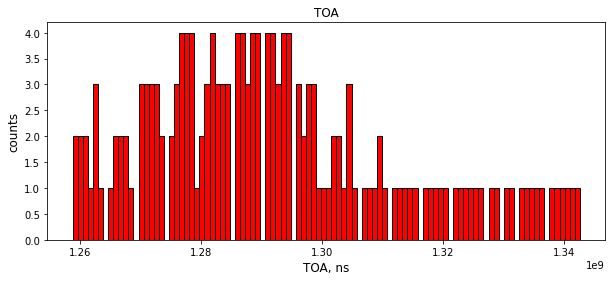

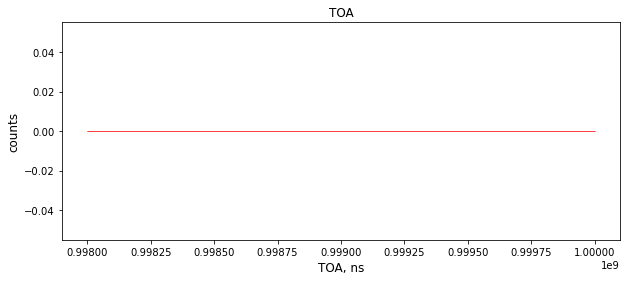

In [564]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R4_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R4_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [565]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt7_R4_ToA_1450_1600_df_4 = Pt7_R4_df.drop(Pt7_R4_df[(Pt7_R4_df['#ToA'] < ToAmin) | (Pt7_R4_df['#ToA'] > ToAmax)].index)

print(Pt7_R4_ToA_1450_1600_df_4.shape, type(Pt7_R4_ToA_1450_1600_df_4.iloc[0,0]), Pt7_R4_ToA_1450_1600_df_4.iloc[:1])

(226, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52209   168   101  206223704576        550            1175         NaN


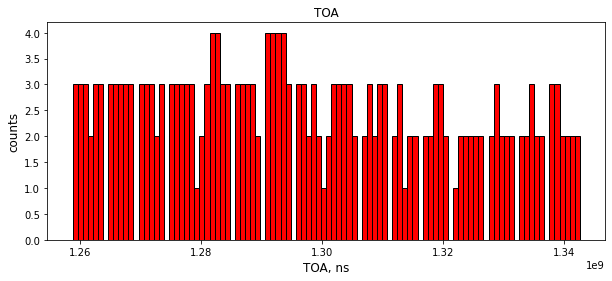

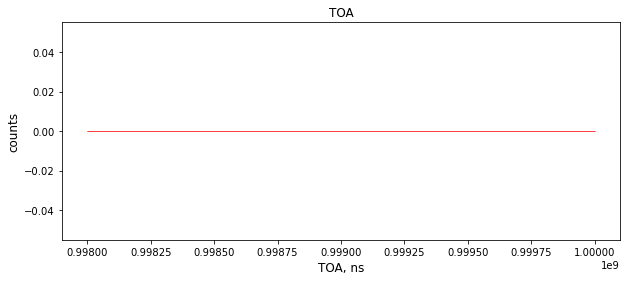

In [566]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R4_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R4_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [567]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt8_R4_ToA_1450_1600_df_4 = Pt8_R4_df.drop(Pt8_R4_df[(Pt8_R4_df['#ToA'] < ToAmin) | (Pt8_R4_df['#ToA'] > ToAmax)].index)

print(Pt8_R4_ToA_1450_1600_df_4.shape, type(Pt8_R4_ToA_1450_1600_df_4.iloc[0,0]), Pt8_R4_ToA_1450_1600_df_4.iloc[:1])

(249, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52170   169   107  206223704064        850            1550         NaN


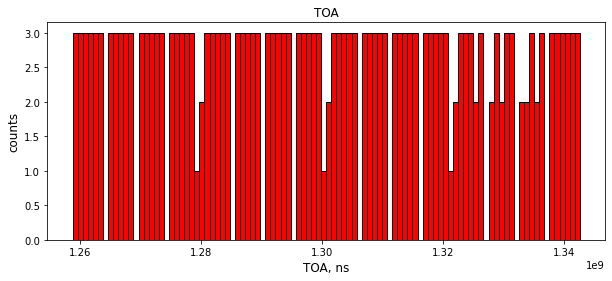

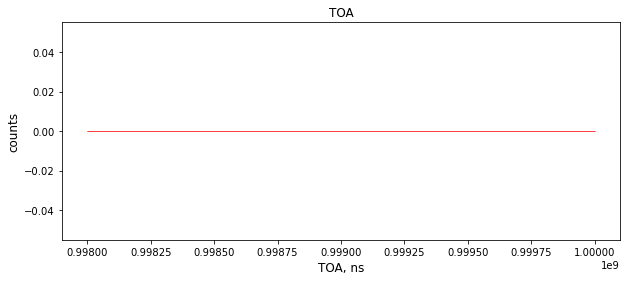

In [568]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R4_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R4_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [569]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt1_R5_ToA_1450_1600_df_4 = Pt1_R5_df.drop(Pt1_R5_df[(Pt1_R5_df['#ToA'] < ToAmin) | (Pt1_R5_df['#ToA'] > ToAmax)].index)

print(Pt1_R5_ToA_1450_1600_df_4.shape, type(Pt1_R5_ToA_1450_1600_df_4.iloc[0,0]), Pt1_R5_ToA_1450_1600_df_4.iloc[:1])

(211, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52141   173    68  206223703552       1625            2575         NaN


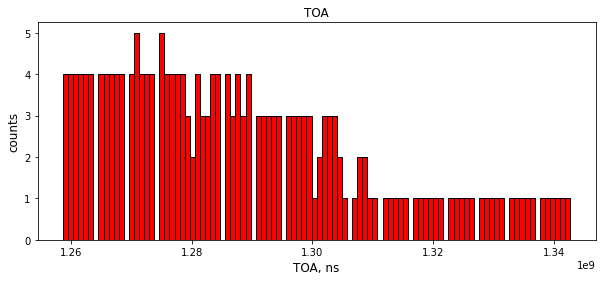

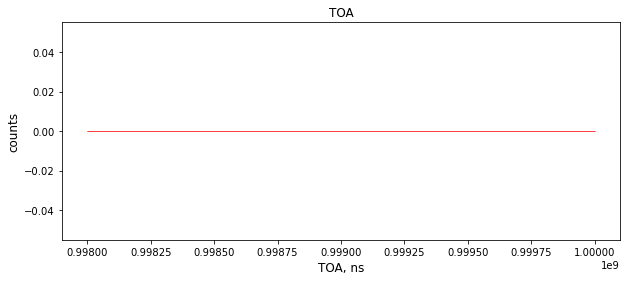

In [570]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R5_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R5_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [571]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt2_R5_ToA_1450_1600_df_4 = Pt2_R5_df.drop(Pt2_R5_df[(Pt2_R5_df['#ToA'] < ToAmin) | (Pt2_R5_df['#ToA'] > ToAmax)].index)

print(Pt2_R5_ToA_1450_1600_df_4.shape, type(Pt2_R5_ToA_1450_1600_df_4.iloc[0,0]), Pt2_R5_ToA_1450_1600_df_4.iloc[:1])

(125, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52128   173    74  206223703552        925            1400         NaN


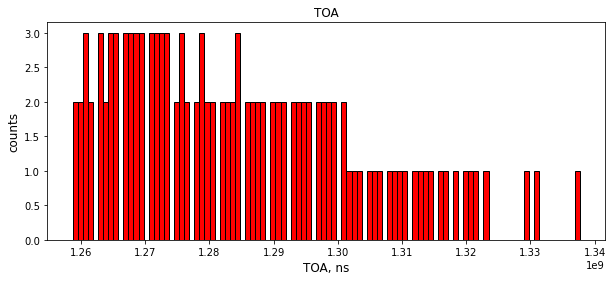

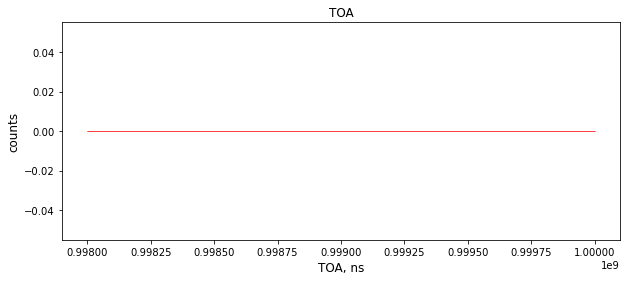

In [572]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R5_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R5_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [573]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt3_R5_ToA_1450_1600_df_4 = Pt3_R5_df.drop(Pt3_R5_df[(Pt3_R5_df['#ToA'] < ToAmin) | (Pt3_R5_df['#ToA'] > ToAmax)].index)

print(Pt3_R5_ToA_1450_1600_df_4.shape, type(Pt3_R5_ToA_1450_1600_df_4.iloc[0,0]), Pt3_R5_ToA_1450_1600_df_4.iloc[:1])

(100, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52178   173    79  206223704320        700            1075         NaN


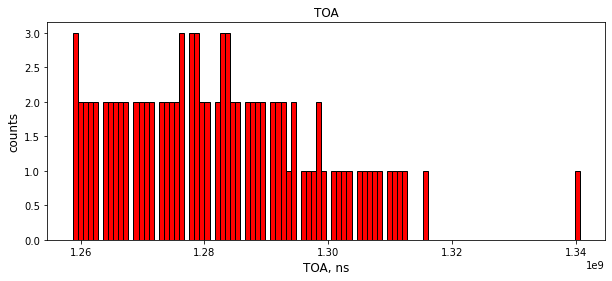

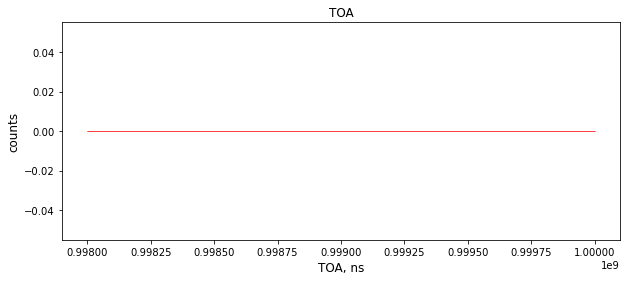

In [574]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R5_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R5_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [575]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt4_R5_ToA_1450_1600_df_4 = Pt4_R5_df.drop(Pt4_R5_df[(Pt4_R5_df['#ToA'] < ToAmin) | (Pt4_R5_df['#ToA'] > ToAmax)].index)

print(Pt4_R5_ToA_1450_1600_df_4.shape, type(Pt4_R5_ToA_1450_1600_df_4.iloc[0,0]), Pt4_R5_ToA_1450_1600_df_4.iloc[:1])

(187, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52188   173    85  206223704320        625             975         NaN


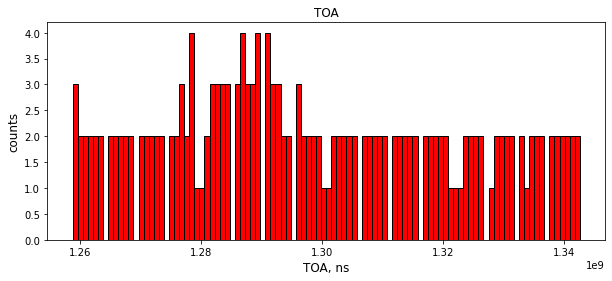

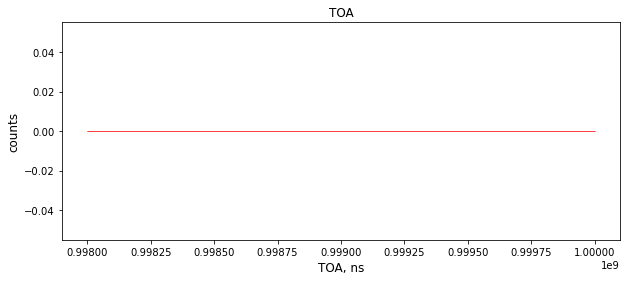

In [576]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R5_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R5_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [577]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt5_R5_ToA_1450_1600_df_4 = Pt5_R5_df.drop(Pt5_R5_df[(Pt5_R5_df['#ToA'] < ToAmin) | (Pt5_R5_df['#ToA'] > ToAmax)].index)

print(Pt5_R5_ToA_1450_1600_df_4.shape, type(Pt5_R5_ToA_1450_1600_df_4.iloc[0,0]), Pt5_R5_ToA_1450_1600_df_4.iloc[:1])

(136, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52206   173    90  206223704576        575             850         NaN


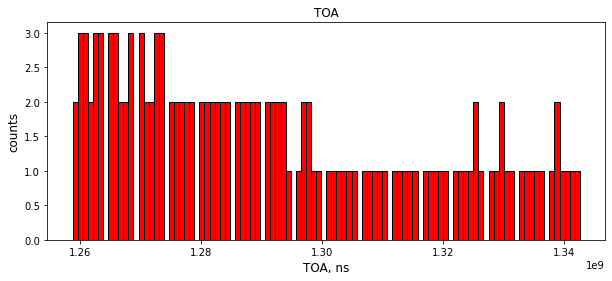

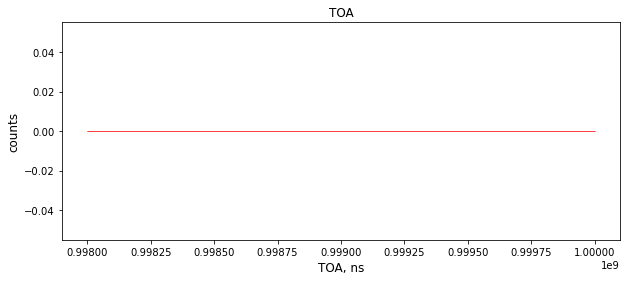

In [578]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R5_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R5_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [579]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt6_R5_ToA_1450_1600_df_4 = Pt6_R5_df.drop(Pt6_R5_df[(Pt6_R5_df['#ToA'] < ToAmin) | (Pt6_R5_df['#ToA'] > ToAmax)].index)

print(Pt6_R5_ToA_1450_1600_df_4.shape, type(Pt6_R5_ToA_1450_1600_df_4.iloc[0,0]), Pt6_R5_ToA_1450_1600_df_4.iloc[:1])

(219, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52212   173    96  206223704832        425            1300         NaN


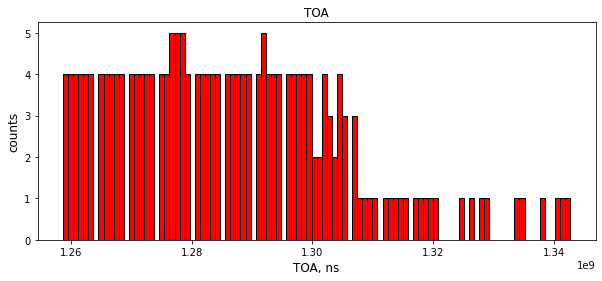

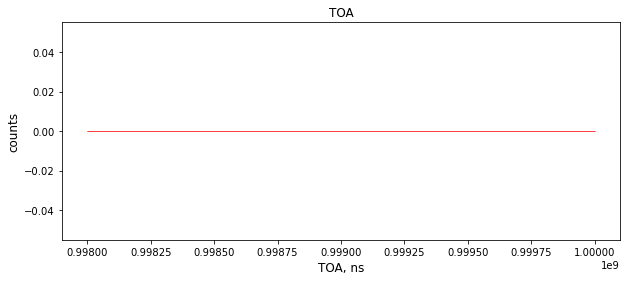

In [580]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R5_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R5_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [581]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt7_R5_ToA_1450_1600_df_4 = Pt7_R5_df.drop(Pt7_R5_df[(Pt7_R5_df['#ToA'] < ToAmin) | (Pt7_R5_df['#ToA'] > ToAmax)].index)

print(Pt7_R5_ToA_1450_1600_df_4.shape, type(Pt7_R5_ToA_1450_1600_df_4.iloc[0,0]), Pt7_R5_ToA_1450_1600_df_4.iloc[:1])

(252, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52162   174   101  206223704064        675            1525         NaN


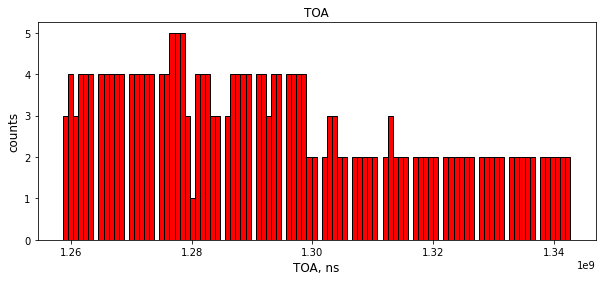

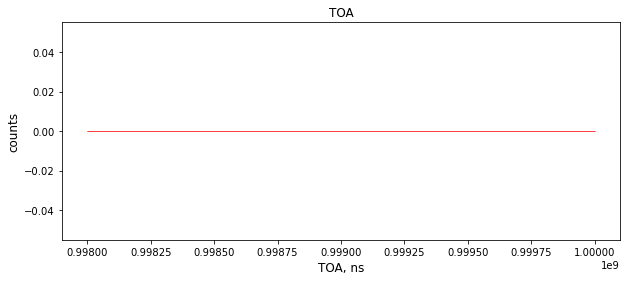

In [582]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R5_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R5_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [583]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt8_R5_ToA_1450_1600_df_4 = Pt8_R5_df.drop(Pt8_R5_df[(Pt8_R5_df['#ToA'] < ToAmin) | (Pt8_R5_df['#ToA'] > ToAmax)].index)

print(Pt8_R5_ToA_1450_1600_df_4.shape, type(Pt8_R5_ToA_1450_1600_df_4.iloc[0,0]), Pt8_R5_ToA_1450_1600_df_4.iloc[:1])

(212, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52123   174   107  206223703552       1125            1925         NaN


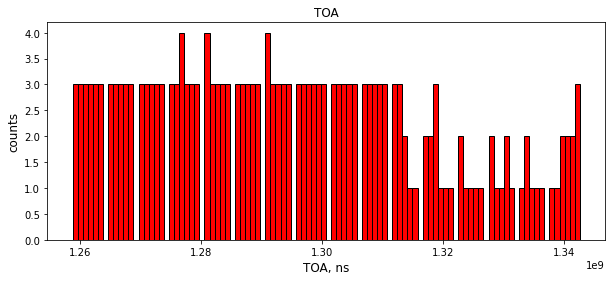

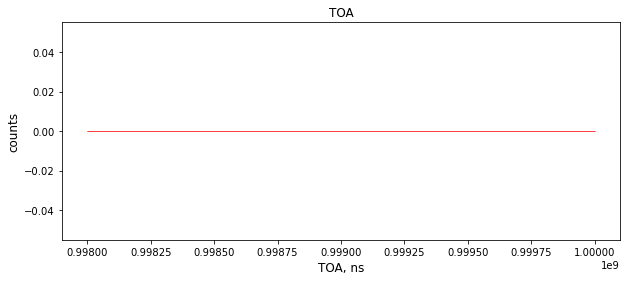

In [584]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R5_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R5_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [585]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt1_R6_ToA_1450_1600_df_4 = Pt1_R6_df.drop(Pt1_R6_df[(Pt1_R6_df['#ToA'] < ToAmin) | (Pt1_R6_df['#ToA'] > ToAmax)].index)

print(Pt1_R6_ToA_1450_1600_df_4.shape, type(Pt1_R6_ToA_1450_1600_df_4.iloc[0,0]), Pt1_R6_ToA_1450_1600_df_4.iloc[:1])

(126, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52216   178    68  206223704832        525             525         NaN


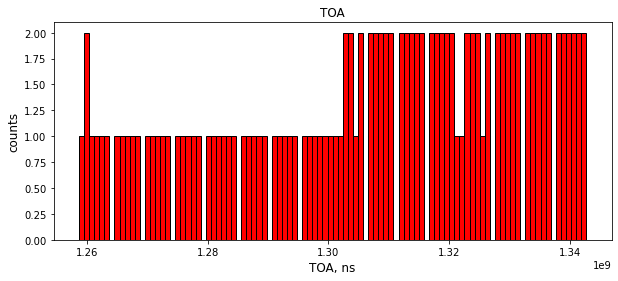

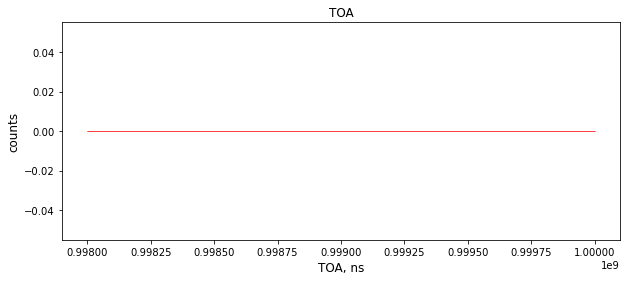

In [586]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R6_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R6_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot

In [587]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt2_R6_ToA_1450_1600_df_4 = Pt2_R6_df.drop(Pt2_R6_df[(Pt2_R6_df['#ToA'] < ToAmin) | (Pt2_R6_df['#ToA'] > ToAmax)].index)

print(Pt2_R6_ToA_1450_1600_df_4.shape)
# , type(Pt2_R6_ToA_1450_1600_df_4.iloc[0,0]), Pt2_R6_ToA_1450_1600_df_4.iloc[:1]

(71, 6)


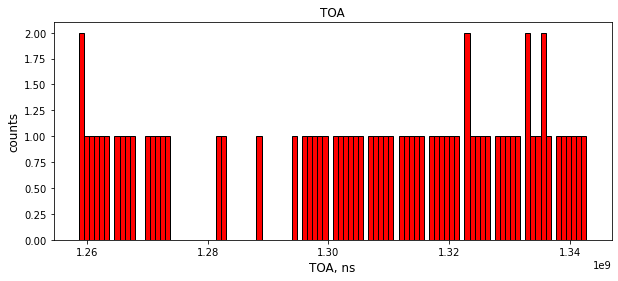

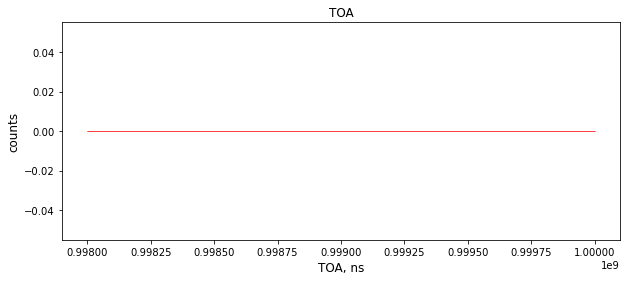

In [588]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R6_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R6_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [589]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt3_R6_ToA_1450_1600_df_4 = Pt3_R6_df.drop(Pt3_R6_df[(Pt3_R6_df['#ToA'] < ToAmin) | (Pt3_R6_df['#ToA'] > ToAmax)].index)

print(Pt3_R6_ToA_1450_1600_df_4.shape, type(Pt3_R6_ToA_1450_1600_df_4.iloc[0,0]), Pt3_R6_ToA_1450_1600_df_4.iloc[:1])

(57, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52277   178    79  206223708416        225             225         NaN


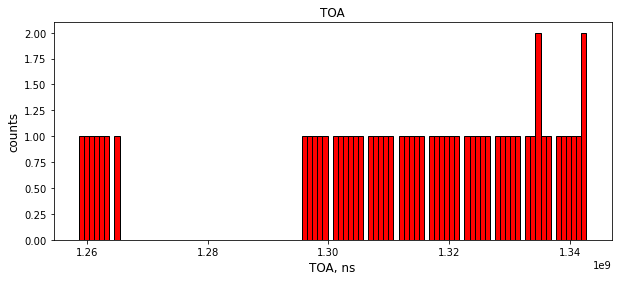

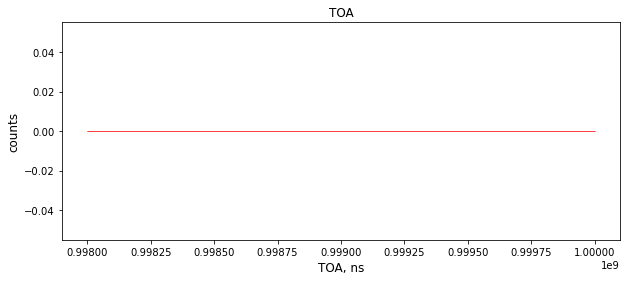

In [590]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R6_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R6_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot (second one)

In [591]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt4_R6_ToA_1450_1600_df_4 = Pt4_R6_df.drop(Pt4_R6_df[(Pt4_R6_df['#ToA'] < ToAmin) | (Pt4_R6_df['#ToA'] > ToAmax)].index)

print(Pt4_R6_ToA_1450_1600_df_4.shape)

(151, 6)


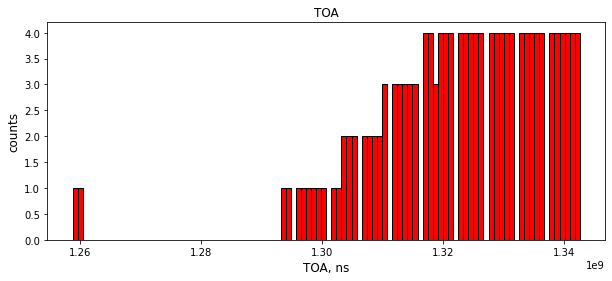

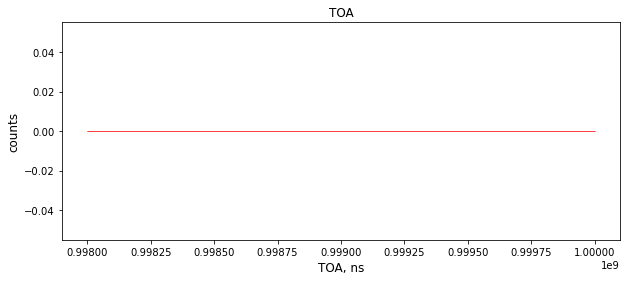

In [592]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R6_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R6_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot (third one)

In [593]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt5_R6_ToA_1450_1600_df_4 = Pt5_R6_df.drop(Pt5_R6_df[(Pt5_R6_df['#ToA'] < ToAmin) | (Pt5_R6_df['#ToA'] > ToAmax)].index)

print(Pt5_R6_ToA_1450_1600_df_4.shape)

(97, 6)


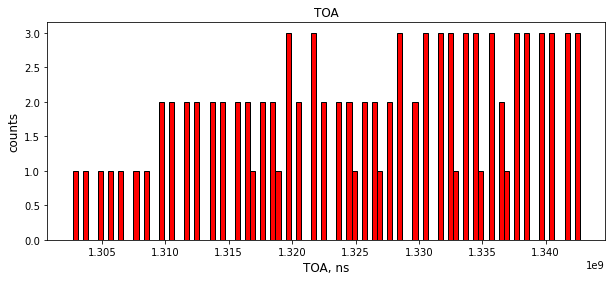

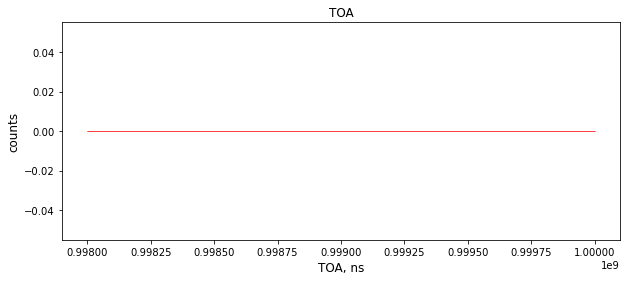

In [594]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R6_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R6_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot (fourth one)

In [595]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt6_R6_ToA_1450_1600_df_4 = Pt6_R6_df.drop(Pt6_R6_df[(Pt6_R6_df['#ToA'] < ToAmin) | (Pt6_R6_df['#ToA'] > ToAmax)].index)

print(Pt6_R6_ToA_1450_1600_df_4.shape)

(177, 6)


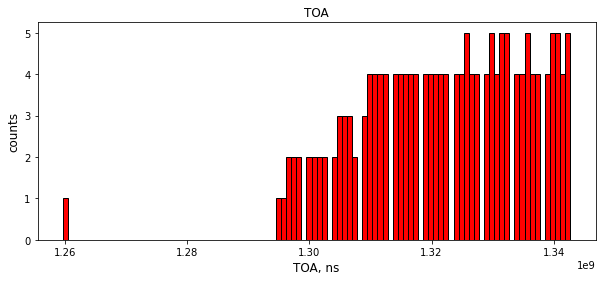

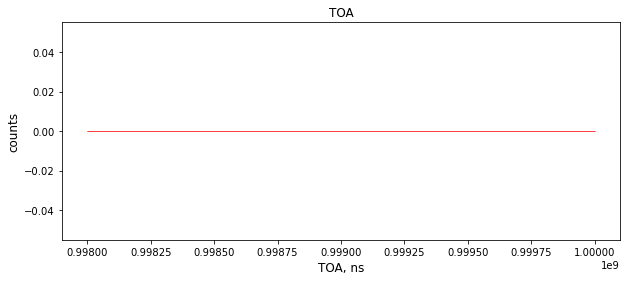

In [596]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R6_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R6_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

# Nothing for this spot (fifth one)

In [597]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt7_R6_ToA_1450_1600_df_4 = Pt7_R6_df.drop(Pt7_R6_df[(Pt7_R6_df['#ToA'] < ToAmin) | (Pt7_R6_df['#ToA'] > ToAmax)].index)

print(Pt7_R6_ToA_1450_1600_df_4.shape)

(170, 6)


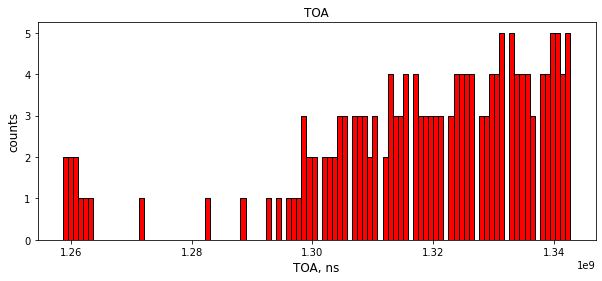

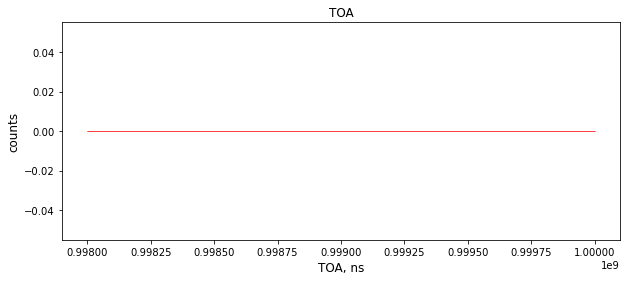

In [598]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R6_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R6_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [599]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt8_R6_ToA_1450_1600_df_4 = Pt8_R6_df.drop(Pt8_R6_df[(Pt8_R6_df['#ToA'] < ToAmin) | (Pt8_R6_df['#ToA'] > ToAmax)].index)

print(Pt8_R6_ToA_1450_1600_df_4.shape, type(Pt8_R6_ToA_1450_1600_df_4.iloc[0,0]), Pt8_R6_ToA_1450_1600_df_4.iloc[:1])

(179, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52242   179   107  206223705600        400             400         NaN


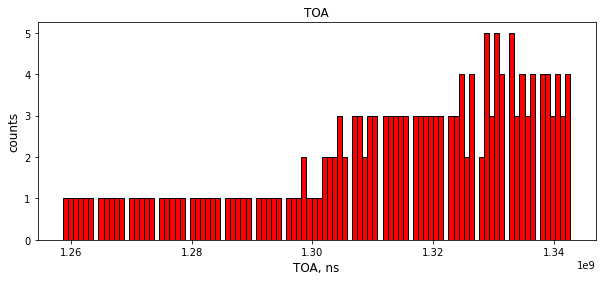

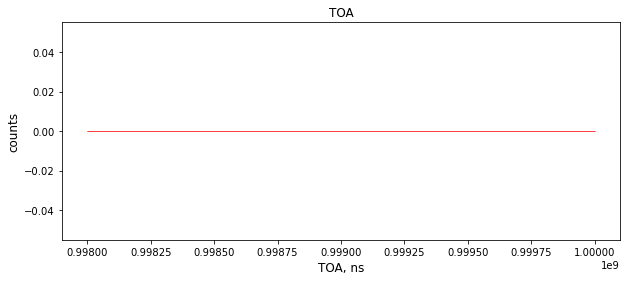

In [600]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R6_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R6_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [601]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt1_R7_ToA_1450_1600_df_4 = Pt1_R7_df.drop(Pt1_R7_df[(Pt1_R7_df['#ToA'] < ToAmin) | (Pt1_R7_df['#ToA'] > ToAmax)].index)

print(Pt1_R7_ToA_1450_1600_df_4.shape, type(Pt1_R7_ToA_1450_1600_df_4.iloc[0,0]), Pt1_R7_ToA_1450_1600_df_4.iloc[:1])

(170, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52126   183    68  206223703552       1225            1500         NaN


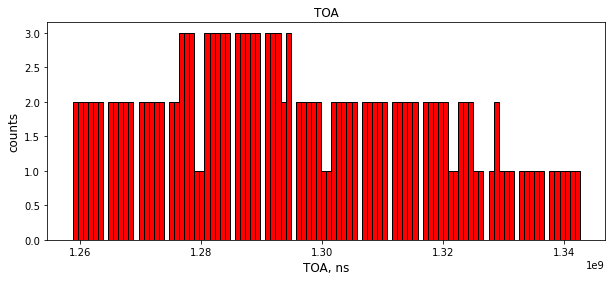

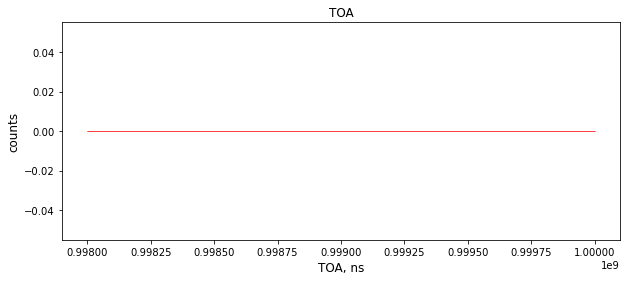

In [602]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R7_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R7_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [603]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt2_R7_ToA_1450_1600_df_4 = Pt2_R7_df.drop(Pt2_R7_df[(Pt2_R7_df['#ToA'] < ToAmin) | (Pt2_R7_df['#ToA'] > ToAmax)].index)

print(Pt2_R7_ToA_1450_1600_df_4.shape, type(Pt2_R7_ToA_1450_1600_df_4.iloc[0,0]), Pt2_R7_ToA_1450_1600_df_4.iloc[:1])

(144, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52217   183    74  206223704832        700            1050         NaN


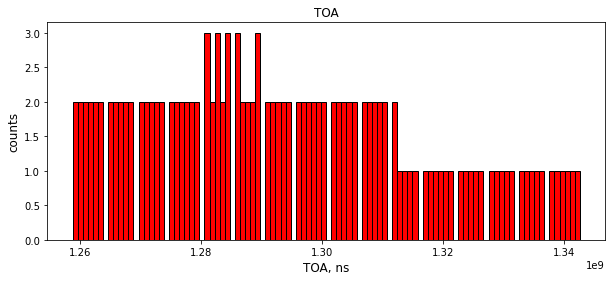

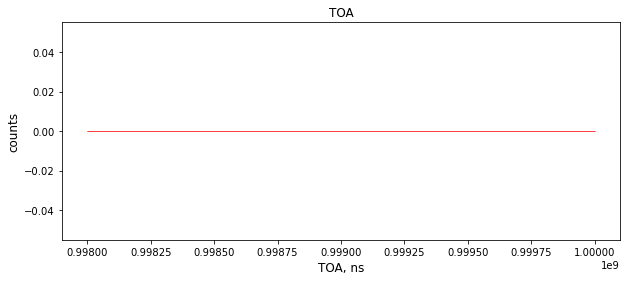

In [604]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R7_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R7_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [605]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt3_R7_ToA_1450_1600_df_4 = Pt3_R7_df.drop(Pt3_R7_df[(Pt3_R7_df['#ToA'] < ToAmin) | (Pt3_R7_df['#ToA'] > ToAmax)].index)

print(Pt3_R7_ToA_1450_1600_df_4.shape, type(Pt3_R7_ToA_1450_1600_df_4.iloc[0,0]), Pt3_R7_ToA_1450_1600_df_4.iloc[:1])

(113, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52238   183    79  206223705344        525             525         NaN


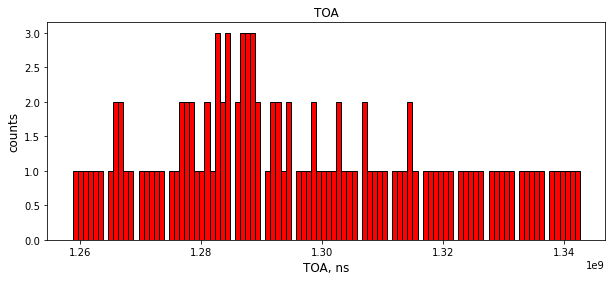

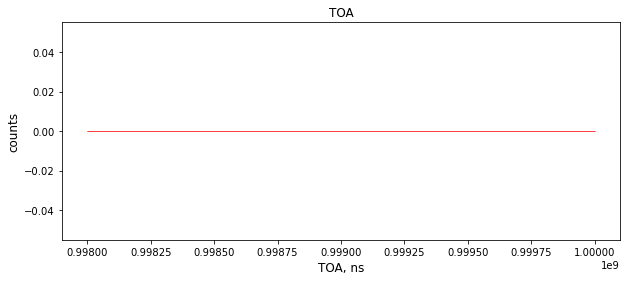

In [606]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R7_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R7_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [607]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt4_R7_ToA_1450_1600_df_4 = Pt4_R7_df.drop(Pt4_R7_df[(Pt4_R7_df['#ToA'] < ToAmin) | (Pt4_R7_df['#ToA'] > ToAmax)].index)

print(Pt4_R7_ToA_1450_1600_df_4.shape, type(Pt4_R7_ToA_1450_1600_df_4.iloc[0,0]), Pt4_R7_ToA_1450_1600_df_4.iloc[:1])

(269, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52250   183    85  206223705856        325             600         NaN


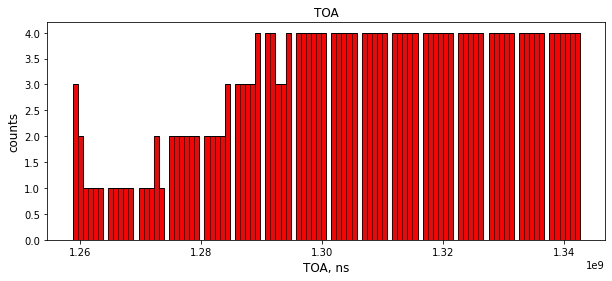

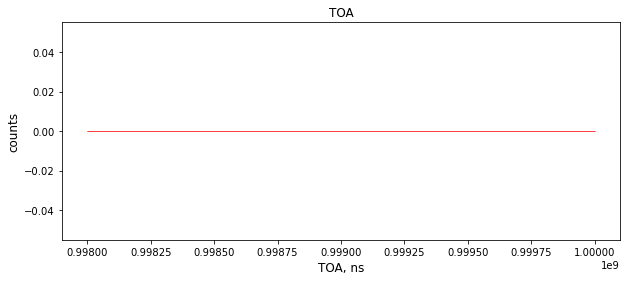

In [608]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R7_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R7_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [609]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt5_R7_ToA_1450_1600_df_4 = Pt5_R7_df.drop(Pt5_R7_df[(Pt5_R7_df['#ToA'] < ToAmin) | (Pt5_R7_df['#ToA'] > ToAmax)].index)

print(Pt5_R7_ToA_1450_1600_df_4.shape, type(Pt5_R7_ToA_1450_1600_df_4.iloc[0,0]), Pt5_R7_ToA_1450_1600_df_4.iloc[:1])

(179, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52260   184    90  206223706112        275             500         NaN


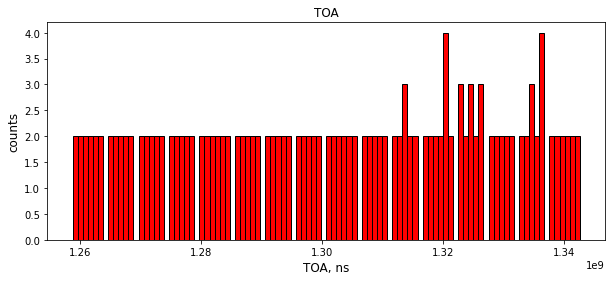

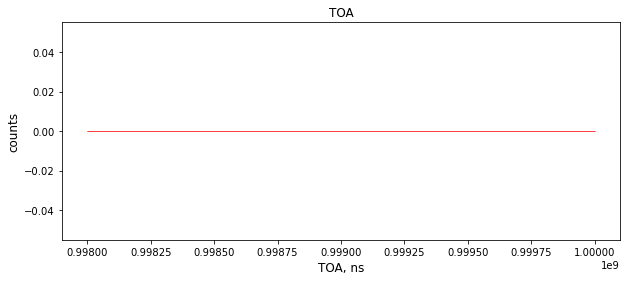

In [610]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R7_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R7_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [611]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt6_R7_ToA_1450_1600_df_4 = Pt6_R7_df.drop(Pt6_R7_df[(Pt6_R7_df['#ToA'] < ToAmin) | (Pt6_R7_df['#ToA'] > ToAmax)].index)

print(Pt6_R7_ToA_1450_1600_df_4.shape, type(Pt6_R7_ToA_1450_1600_df_4.iloc[0,0]), Pt6_R7_ToA_1450_1600_df_4.iloc[:1])

(288, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52255   184    96  206223706112        350             800         NaN


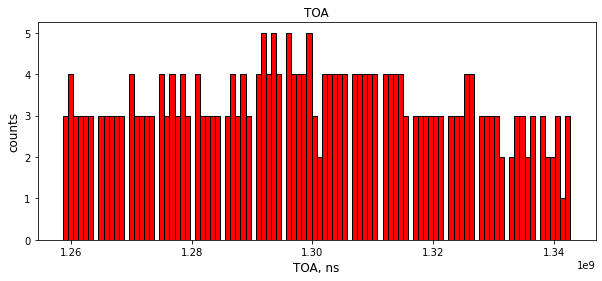

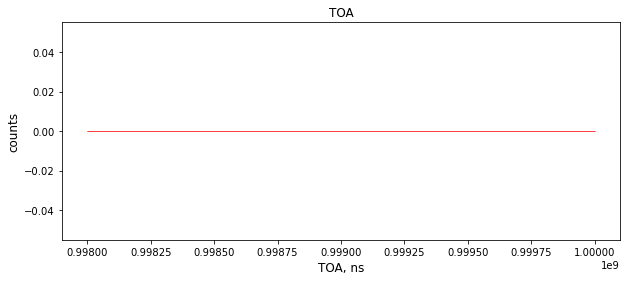

In [612]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R7_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R7_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [613]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt7_R7_ToA_1450_1600_df_4 = Pt7_R7_df.drop(Pt7_R7_df[(Pt7_R7_df['#ToA'] < ToAmin) | (Pt7_R7_df['#ToA'] > ToAmax)].index)

print(Pt7_R7_ToA_1450_1600_df_4.shape, type(Pt7_R7_ToA_1450_1600_df_4.iloc[0,0]), Pt7_R7_ToA_1450_1600_df_4.iloc[:1])

(266, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52181   184   101  206223704320        600            1075         NaN


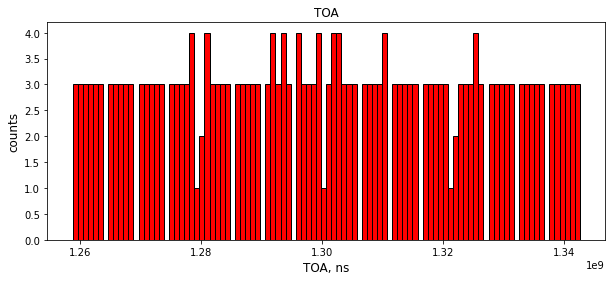

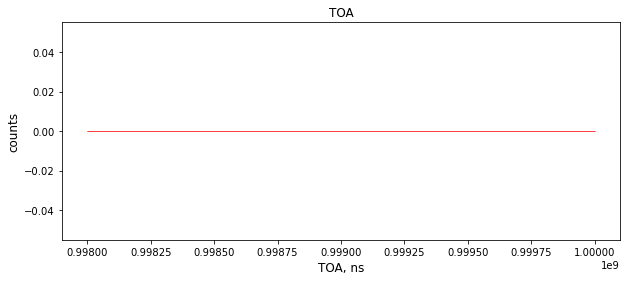

In [614]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R7_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R7_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [615]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt8_R7_ToA_1450_1600_df_4 = Pt8_R7_df.drop(Pt8_R7_df[(Pt8_R7_df['#ToA'] < ToAmin) | (Pt8_R7_df['#ToA'] > ToAmax)].index)

print(Pt8_R7_ToA_1450_1600_df_4.shape, type(Pt8_R7_ToA_1450_1600_df_4.iloc[0,0]), Pt8_R7_ToA_1450_1600_df_4.iloc[:1])

(280, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52148   184   107  206223703808       1025            1400         NaN


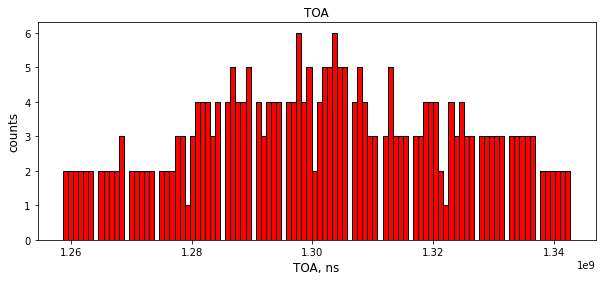

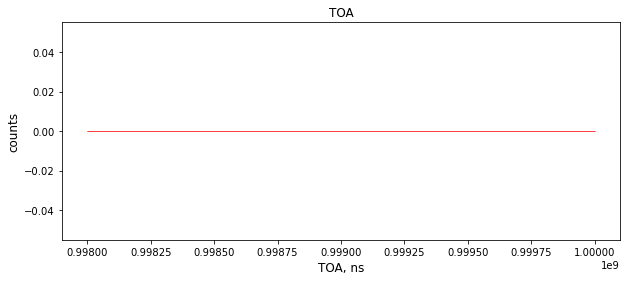

In [616]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R7_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R7_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [617]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt1_R8_ToA_1450_1600_df_4 = Pt1_R8_df.drop(Pt1_R8_df[(Pt1_R8_df['#ToA'] < ToAmin) | (Pt1_R8_df['#ToA'] > ToAmax)].index)

print(Pt1_R8_ToA_1450_1600_df_4.shape, type(Pt1_R8_ToA_1450_1600_df_4.iloc[0,0]), Pt1_R8_ToA_1450_1600_df_4.iloc[:1])

(152, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52159   188    68  206223703808       1100            1650         NaN


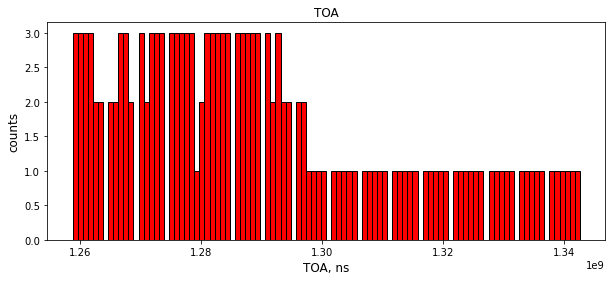

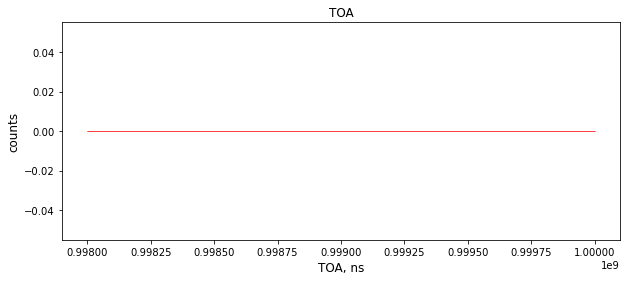

In [618]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R8_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt1_R8_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [619]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt2_R8_ToA_1450_1600_df_4 = Pt2_R8_df.drop(Pt2_R8_df[(Pt2_R8_df['#ToA'] < ToAmin) | (Pt2_R8_df['#ToA'] > ToAmax)].index)

print(Pt2_R8_ToA_1450_1600_df_4.shape, type(Pt2_R8_ToA_1450_1600_df_4.iloc[0,0]), Pt2_R8_ToA_1450_1600_df_4.iloc[:1])

(143, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52223   188    74  206223704832        500            1050         NaN


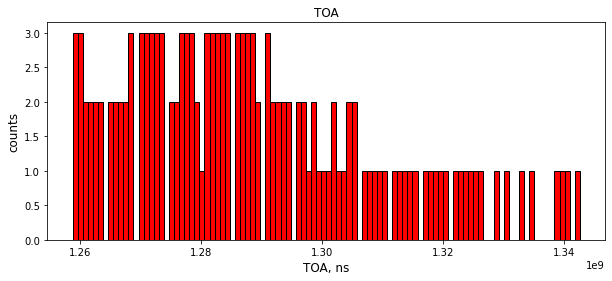

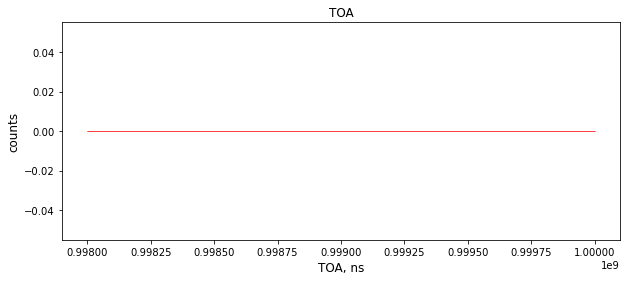

In [620]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R8_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt2_R8_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [621]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt3_R8_ToA_1450_1600_df_4 = Pt3_R8_df.drop(Pt3_R8_df[(Pt3_R8_df['#ToA'] < ToAmin) | (Pt3_R8_df['#ToA'] > ToAmax)].index)

print(Pt3_R8_ToA_1450_1600_df_4.shape, type(Pt3_R8_ToA_1450_1600_df_4.iloc[0,0]), Pt3_R8_ToA_1450_1600_df_4.iloc[:1])

(111, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52248   188    79  206223705600        400             575         NaN


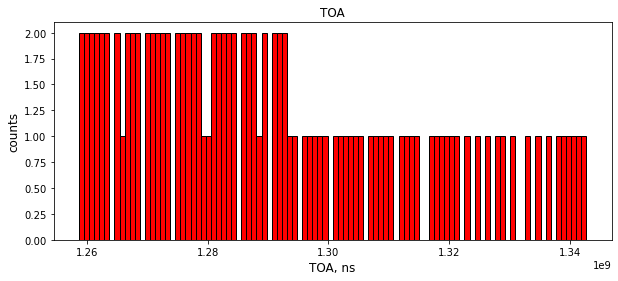

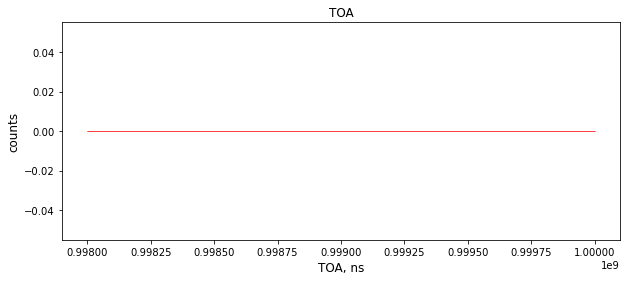

In [622]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R8_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt3_R8_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [623]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt4_R8_ToA_1450_1600_df_4 = Pt4_R8_df.drop(Pt4_R8_df[(Pt4_R8_df['#ToA'] < ToAmin) | (Pt4_R8_df['#ToA'] > ToAmax)].index)

print(Pt4_R8_ToA_1450_1600_df_4.shape, type(Pt4_R8_ToA_1450_1600_df_4.iloc[0,0]), Pt4_R8_ToA_1450_1600_df_4.iloc[:1])

(235, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52263   188    85  206223706112        275             500         NaN


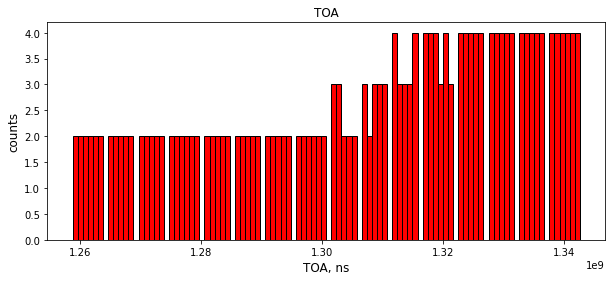

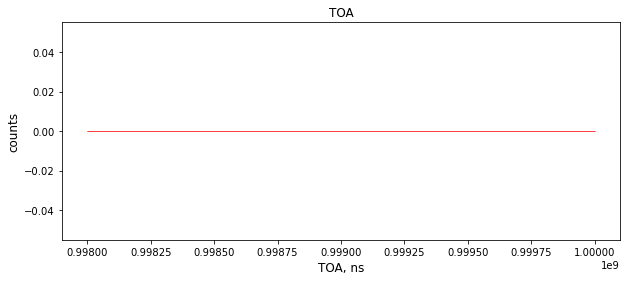

In [624]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R8_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt4_R8_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [625]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt5_R8_ToA_1450_1600_df_4 = Pt5_R8_df.drop(Pt5_R8_df[(Pt5_R8_df['#ToA'] < ToAmin) | (Pt5_R8_df['#ToA'] > ToAmax)].index)

print(Pt5_R8_ToA_1450_1600_df_4.shape, type(Pt5_R8_ToA_1450_1600_df_4.iloc[0,0]), Pt5_R8_ToA_1450_1600_df_4.iloc[:1])

(126, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52269   189    90  206223706368        300             475         NaN


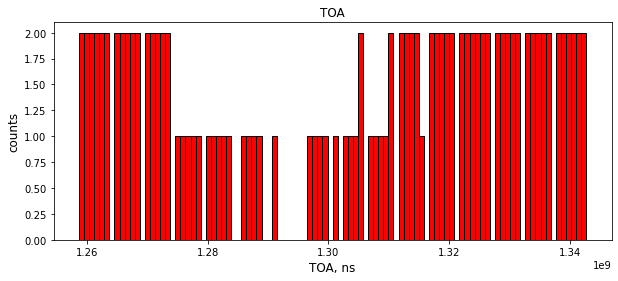

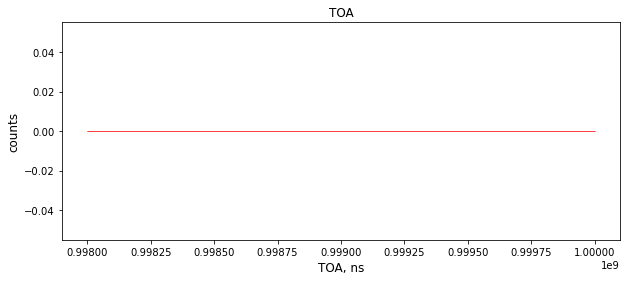

In [626]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R8_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt5_R8_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [627]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt6_R8_ToA_1450_1600_df_4 = Pt6_R8_df.drop(Pt6_R8_df[(Pt6_R8_df['#ToA'] < ToAmin) | (Pt6_R8_df['#ToA'] > ToAmax)].index)

print(Pt6_R8_ToA_1450_1600_df_4.shape, type(Pt6_R8_ToA_1450_1600_df_4.iloc[0,0]), Pt6_R8_ToA_1450_1600_df_4.iloc[:1])

(197, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52200   189   100  206223712000        200            1050         NaN


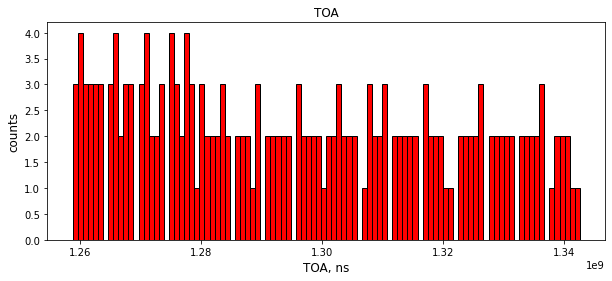

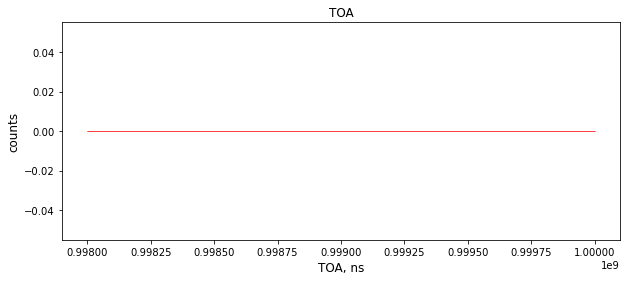

In [628]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R8_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt6_R8_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [629]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt7_R8_ToA_1450_1600_df_4 = Pt7_R8_df.drop(Pt7_R8_df[(Pt7_R8_df['#ToA'] < ToAmin) | (Pt7_R8_df['#ToA'] > ToAmax)].index)

print(Pt7_R8_ToA_1450_1600_df_4.shape, type(Pt7_R8_ToA_1450_1600_df_4.iloc[0,0]), Pt7_R8_ToA_1450_1600_df_4.iloc[:1])

(211, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52197   189   101  206223704320        525            1050         NaN


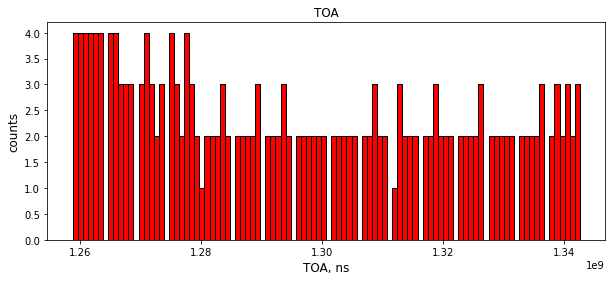

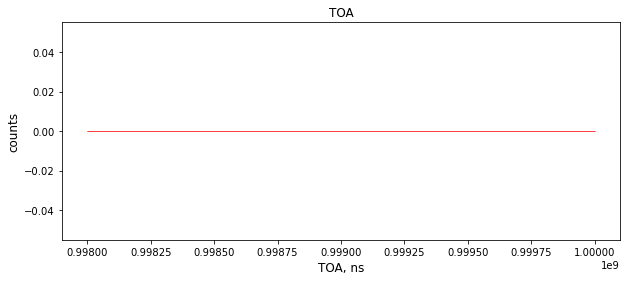

In [630]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R8_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt7_R8_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [631]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
Pt8_R8_ToA_1450_1600_df_4 = Pt8_R8_df.drop(Pt8_R8_df[(Pt8_R8_df['#ToA'] < ToAmin) | (Pt8_R8_df['#ToA'] > ToAmax)].index)

print(Pt8_R8_ToA_1450_1600_df_4.shape, type(Pt8_R8_ToA_1450_1600_df_4.iloc[0,0]), Pt8_R8_ToA_1450_1600_df_4.iloc[:1])

(264, 6) <class 'numpy.int64'>        #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  Unnamed: 5
52165   189   107  206223704064       1150            1800         NaN


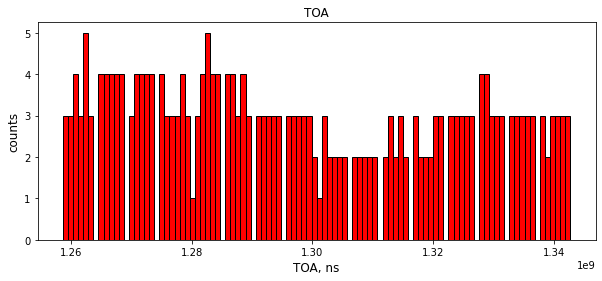

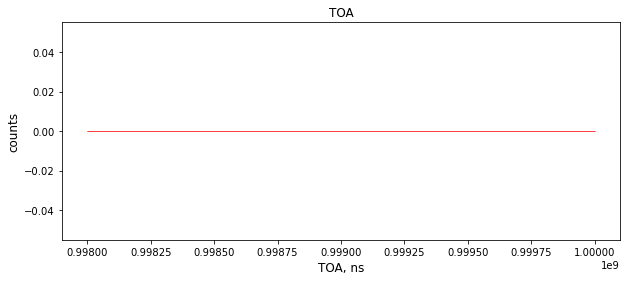

In [632]:
ToAmin = (((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)*4096./25.
ToAmax = ((((1.002691600e9+(1000000*5*17))+85000150.0)+85000150.0)+85000150.0)*4096./25.
fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R8_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 100, color = 'r', ec = 'k')
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_4s_Pt1-1_8212020_025044-1_cent.png')

fig, ax0 = plt.subplots(ncols=1, figsize=(10, 4))
plt.hist(Pt8_R8_ToA_1450_1600_df_4['#ToA']/4096.*25., bins = 1000, color = 'r', ec = 'r', range = (.998e9, 1e9))
plt.title("TOA", fontsize = 12) # change the title
plt.xlabel('TOA, ns',fontsize = 12)
plt.ylabel('counts',fontsize = 12)
plt.show()
# fig.savefig('TOA_40pks_Pt1-1_8212020_025044-1_cent.png')

In [633]:
ToA_all_array_100_4 = []
ToAtotal_all_array_100_4 = []
for j in range(1,9):
    for k in range(1,9):
        # Create TOT arrays
        globals()["Pt"+str(j)+"_R"+str(k)+"_TOA_array_100_4"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_ToA_1450_1600_df_4"]['#ToA'].to_numpy())
#         globals()["Pt"+str(j)+"_R"+str(k)+"_TOTtotal_array"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy())
        ToA_all_array_100_4.append((globals()["Pt"+str(j)+"_R"+str(k)+"_ToA_1450_1600_df_4"]['#ToA'].to_numpy()))
#         ToAtotal_all_array.append((globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy()))

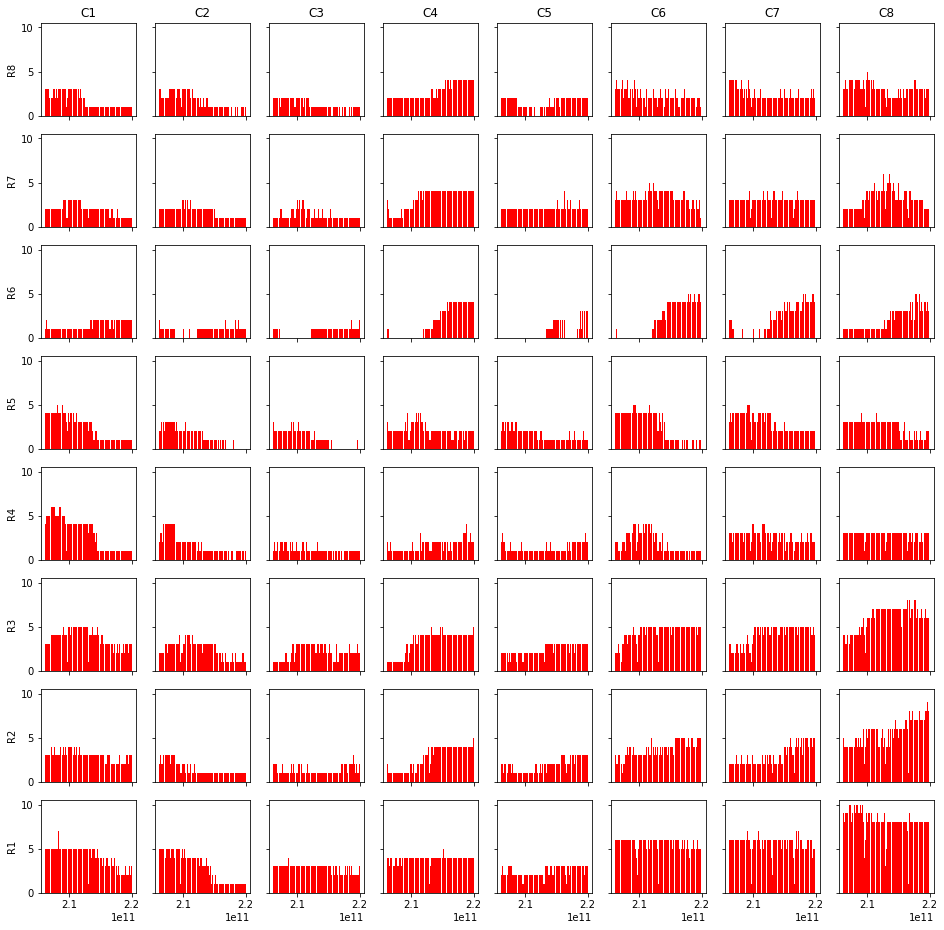

In [634]:
fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8), \
                  (ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16), \
                  (ax17, ax18, ax19, ax20, ax21, ax22, ax23, ax24), \
                  (ax25, ax26, ax27, ax28, ax29, ax30, ax31, ax32), \
                  (ax33, ax34, ax35, ax36, ax37, ax38, ax39, ax40), \
                  (ax41, ax42, ax43, ax44, ax45, ax46, ax47, ax48), \
                  (ax49, ax50, ax51, ax52, ax53, ax54, ax55, ax56), \
                  (ax57, ax58, ax59, ax60, ax61, ax62, ax63, ax64), \
                 )= plt.subplots(nrows = 8, ncols =8, figsize = (16, 16), sharex=True, sharey=True, facecolor='w')
for j in range(1,9):
    for k in range(1,9):
            globals()['ax'+str((64-(j*8))+k)].hist(globals()["Pt"+str(k)+"_R"+str(j)+"_TOA_array_100_4"], bins = 100, color='r')
#             print('R'+str(j),'C'+str(k),len(globals()["Pt"+str(k)+"_R"+str(j)+"_TOT_array"]))
            if j == 8: globals()['ax'+str((64-(j*8))+k)].set_title("C"+str(k)) 
            if k == 1: globals()['ax'+str((64-(j*8))+k)].set_ylabel("R"+str(j)) 
fig.savefig('100_4.png', bbox_inches='tight')

In [635]:
ToT_all_array_100_4 = []
ToTtotal_all_array_100_4 = []
for j in range(1,9):
    for k in range(1,9):
        # Create TOT arrays
        globals()["Pt"+str(j)+"_R"+str(k)+"_TOT_array_100_4"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_ToA_1450_1600_df_4"]['#ToT[arb]'].to_numpy())
#         globals()["Pt"+str(j)+"_R"+str(k)+"_TOTtotal_array"] = (globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy())
        ToA_all_array_100.append((globals()["Pt"+str(j)+"_R"+str(k)+"_ToA_1450_1600_df_4"]['#ToT[arb]'].to_numpy()))
#         ToAtotal_all_array.append((globals()["Pt"+str(j)+"_R"+str(k)+"_df"]['#ToTtotal[arb]'].to_numpy()))

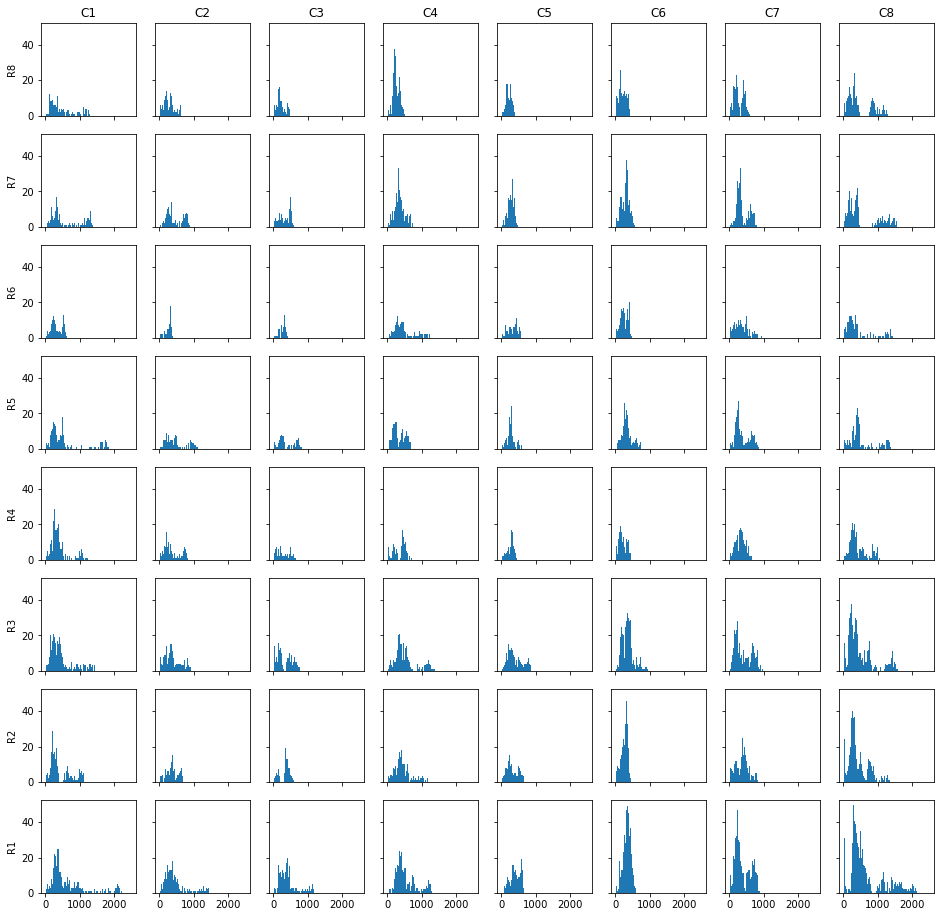

In [638]:
fig, ((ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8), \
                  (ax9, ax10, ax11, ax12, ax13, ax14, ax15, ax16), \
                  (ax17, ax18, ax19, ax20, ax21, ax22, ax23, ax24), \
                  (ax25, ax26, ax27, ax28, ax29, ax30, ax31, ax32), \
                  (ax33, ax34, ax35, ax36, ax37, ax38, ax39, ax40), \
                  (ax41, ax42, ax43, ax44, ax45, ax46, ax47, ax48), \
                  (ax49, ax50, ax51, ax52, ax53, ax54, ax55, ax56), \
                  (ax57, ax58, ax59, ax60, ax61, ax62, ax63, ax64), \
                 )= plt.subplots(nrows = 8, ncols =8, figsize = (16, 16), sharex=True, sharey=True, facecolor='w')
for j in range(1,9):
    for k in range(1,9):
            globals()['ax'+str((64-(j*8))+k)].hist(globals()["Pt"+str(k)+"_R"+str(j)+"_TOT_array_100_4"], bins = 100, range=(0,2500))
#             print('R'+str(j),'C'+str(k),len(globals()["Pt"+str(k)+"_R"+str(j)+"_TOT_array"]))
            if j == 8: globals()['ax'+str((64-(j*8))+k)].set_title("C"+str(k)) 
            if k == 1: globals()['ax'+str((64-(j*8))+k)].set_ylabel("R"+str(j))
fig.savefig('ToT_100_4.png', bbox_inches='tight')

## Time Structure heatmap

In [637]:
len(ToA_Spot_Avgs)

NameError: name 'ToA_Spot_Avgs' is not defined

In [ ]:
ToA_Spot_Avgs

In [ ]:
x_range = [*range(1,9)]
y_range = [*range(1,9)]

In [ ]:
max(ToA_Spot_Avgs)

In [ ]:
ToA_Spot_Avgs_frac = [x*1.0190349350323175e-10 for x in ToA_Spot_Avgs]

In [ ]:
100/981320625644.9747

In [ ]:
(3*1)+8%3

In [ ]:
reshapedarr = np.array(ToA_Spot_Avgs).reshape(8,8)
print(reshapedarr)

In [ ]:
B= np.flipud(reshapedarr)
print(B)

In [ ]:
ToA_Spot_Avgs = [globals()["Pt"+str(j)+"_R"+str(i)+"_df"]['#ToT[arb]'].mean() for i in range(1,9) for j in range(1,9)]

In [ ]:
Pt1_R8_df['#ToT[arb]'].mean()

In [ ]:
Pt8_R1_df['#ToT[arb]'].mean()

In [ ]:
# reshape and plot data
plt.imshow(np.array(ToA_Spot_Avgs).reshape(8,8), origin='lower')

plt.colorbar().set_label('Average ToT of spot (ns)', fontsize=14)
# plt.xlabel('x', fontsize=14)
# plt.ylabel('y', fontsize=14)
plt.title('ToT Averages 8x8', fontsize=17)
plt.savefig('TOTAvgs8x8_10s_1012020_114131-1_cent.png',  bbox_inches='tight')

In [ ]:
Cluster_size_avgs = [globals()["Pt"+str(j)+"_R"+str(i)+"_df"]['#Centroid'].mean() for i in range(1,9) for j in range(1,9)]
print(len(Cluster_size_avgs))

In [ ]:
# reshape and plot data
# plt.figure(figsize = (8,8))
plt.imshow(np.array(Cluster_size_avgs).reshape(8,8), origin='lower')

plt.colorbar().set_label('Average Cluster Size of Spot (ns)', fontsize=14)
plt.title('Cluster Size Averages 8x8', fontsize=17)
# plt.savefig('ClusterSizeAvgs8x8_10s_1012020_114131-1_cent.png',  bbox_inches='tight')